In [18]:
import gym
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

import random
from gym import Env
from gym.spaces import Box, Discrete
import random
import numpy as np
from sklearn.preprocessing import Normalizer
#Import libraries



#Data visualization

import matplotlib.pyplot as plt

#Data Manipulation
import pandas as pd
import numpy as np

import gym
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from numpy import loadtxt
from tensorflow.keras.models import load_model
# load model
model = load_model('model.h5')
# summarize model.
model.summary() 
import gym
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

import random
from gym import Env
from gym.spaces import Box, Discrete
import random
import numpy as np
from sklearn.preprocessing import Normalizer
#Import libraries

# load model
model = load_model('model.h5')
# summarize model.
model.summary() 

#ENVIRONMET
#################################################################################################################################
class CiruitTrain(Env):
    def __init__(self):
        
        self.state_space = Box(low=-1, high=1, shape=(8,))
        
         
        self.action_space = Box(low=-1, high=1, shape=(8,))
        
        # current state 
        self.state =np.array([[0.202547 ,  1.035784  ,  0.69495 ,  0.041419 ,  0.150493  , -0.39333   , -0.426001,  0.708016]])  
  
        self.fom=[]
        #self.reward=0
        self.gain=[]
        self.bw=[]
        self.action=[]
        self.param=[]
        self.rr= []
        
    def step(self, action):
        done = False
        info={}
        obs = self.state + action
        
        gain,bw = model.predict(obs)
        
        performance= gain*bw
        
        self.gain.append(gain)
        self.bw.append(bw)
        self.fom.append(performance)
        self.action.append(action)
        self.param.append(obs)
        #self.gain[-1] < 0.45 and self.gain[-1] > 0.035:
        reward= performance-self.fom[-2]
        if  self.bw[-1] > 0.1:
            reward= reward+100
        else :
            reward=reward-25
        self.rr.append(reward)
        return obs, reward ,done, info
    
    def reset(self):
        self.state =np.array([[0.202547 ,  1.035784  ,  0.69495 ,  0.041419 ,  0.150493  , -0.39333   , -0.426001,  0.708016]])     
        return self.state  
    
def maximum(a, b):
     
    if a >= b:
        return a
    else:
        return b



env =  env=CiruitTrain() 

num_states = env.state_space.shape[0]
#print("Size of State Space ->  {}".format(num_states))
num_states = env.state_space.shape[0]
#print("Size of State Space ->  {}".format(num_states))
num_actions = env.action_space.shape[0]
#print("Size of Action Space ->  {}".format(num_actions))

upper_bound = env.action_space.high[0]
lower_bound = env.action_space.low[0]

#print("Max Value of Action ->  {}".format(upper_bound))
#print("Min Value of Action ->  {}".format(lower_bound))

#ENVIRONMET BİTİŞİ
###################################################################################################################################

class OUActionNoise:
    def __init__(self, mean, std_deviation, theta=0.4, dt=1e-2, x_initial=None):
        self.theta = theta
        self.mean = mean
        self.std_dev = std_deviation
        self.dt = dt
        self.x_initial = x_initial
        self.reset()

    def __call__(self):
        # Formula taken from https://www.wikipedia.org/wiki/Ornstein-Uhlenbeck_process.
        x = (
            self.x_prev
            + self.theta * (self.mean - self.x_prev) * self.dt
            + self.std_dev * np.sqrt(self.dt) * np.random.normal(size=self.mean.shape)
        )
        # Store x into x_prev
        # Makes next noise dependent on current one
        self.x_prev = x
        return x

    def reset(self):
        if self.x_initial is not None:
            self.x_prev = self.x_initial
        else:
            self.x_prev = np.zeros_like(self.mean)

            

class Buffer:
    def __init__(self, buffer_capacity=100000, batch_size=64):
        # Number of "experiences" to store at max
        self.buffer_capacity = buffer_capacity
        # Num of tuples to train on.
        self.batch_size = batch_size

        # Its tells us num of times record() was called.
        self.buffer_counter = 0

        # Instead of list of tuples as the exp.replay concept go
        # We use different np.arrays for each tuple element
        self.state  = np.zeros((self.buffer_capacity, num_states))
        self.action  = np.zeros((self.buffer_capacity, num_actions))
        self.reward  = np.zeros((self.buffer_capacity, 1))
        self.next_state  = np.zeros((self.buffer_capacity, num_states))

    # Takes (s,a,r,s') obervation tuple as input
    def record(self, state, action, reward, next_state):
        # Set index to zero if buffer_capacity is exceeded,
        # replacing old records
        index = self.buffer_counter % self.buffer_capacity

        self.state [index] =  state
        self.action [index] =  action
        self.reward [index] =  reward
        self.next [index] = next_state
        

        self.buffer_counter += 1

    # Eager execution is turned on by default in TensorFlow 2. Decorating with tf.function allows
    # TensorFlow to build a static graph out of the logic and computations in our function.
    # This provides a large speed up for blocks of code that contain many small TensorFlow operations such as this one.
    @tf.function
    def update(
        self, state_batch, action_batch, reward_batch, next_state_batch,
    ):
        # Training and updating Actor & Critic networks.
        # See Pseudo Code.
        with tf.GradientTape() as tape:
            target_actions = target_actor(next_state_batch, training=True)
            y = reward_batch + gamma * target_critic(
                [next_state_batch, target_actions], training=True
            )
            critic_value = critic_model([state_batch, action_batch], training=True)
            critic_loss = tf.math.reduce_mean(tf.math.square(y - critic_value))

        critic_grad = tape.gradient(critic_loss, critic_model.trainable_variables)
        critic_optimizer.apply_gradients(
            zip(critic_grad, critic_model.trainable_variables)
        )

        with tf.GradientTape() as tape:
            actions = actor_model(state_batch, training=True)
            critic_value = critic_model([state_batch, actions], training=True)
            # Used `-value` as we want to maximize the value given
            # by the critic for our actions
            actor_loss = -tf.math.reduce_mean(critic_value)

        actor_grad = tape.gradient(actor_loss, actor_model.trainable_variables)
        actor_optimizer.apply_gradients(
            zip(actor_grad, actor_model.trainable_variables)
        )

    # We compute the loss and update parameters
    def learn(self):
        # Get sampling range
        record_range = min(self.buffer_counter, self.buffer_capacity)
        # Randomly sample indices
        batch_indices = np.random.choice(record_range, self.batch_size)

        # Convert to tensors
        state_batch = tf.convert_to_tensor(self.state_buffer[batch_indices])
        action_batch = tf.convert_to_tensor(self.action_buffer[batch_indices])
        reward_batch = tf.convert_to_tensor(self.reward_buffer[batch_indices])
        reward_batch = tf.cast(reward_batch, dtype=tf.float32)
        next_state_batch = tf.convert_to_tensor(self.next_state_buffer[batch_indices])

        self.update(state_batch, action_batch, reward_batch, next_state_batch)


# This update target parameters slowly
# Based on rate `tau`, which is much less than one.
@tf.function
def update_target(target_weights, weights, tau):
    for (a, b) in zip(target_weights, weights):
        a.assign(b * tau + a * (1 - tau))

        

def get_actor():
    # Initialize weights between -3e-3 and 3-e3
    last_init = tf.random_uniform_initializer(minval=-0.05, maxval=0.05)

    inputs = layers.Input(shape=(num_states,))
    out = layers.Dense(64, activation="relu")(inputs)
    out = layers.Dense(64, activation="relu")(out)
     
    outputs = layers.Dense(num_actions, activation="tanh", kernel_initializer=last_init)(out)

     
    #outputs = outputs * upper_bound
    model = tf.keras.Model(inputs, outputs)
    return model


def get_critic():
    # State as input
    state_input = layers.Input(shape=(num_states))
    state_out = layers.Dense(128, activation="relu")(state_input)
    state_out = layers.Dense(128, activation="relu")(state_out)
    

    # Action as input
    action_input = layers.Input(shape=(num_actions))
    action_out = layers.Dense(128, activation="relu")(action_input)

    # Both are passed through seperate layer before concatenating
    concat = layers.Concatenate()([state_out, action_out])

    out = layers.Dense(128, activation="relu")(concat)
    out = layers.Dense(128, activation="relu")(out)
    outputs = layers.Dense(1)(out)

    # Outputs single value for give state-action
    model = tf.keras.Model([state_input, action_input], outputs)

    return model



def policy(state, noise_object):
    sampled_actions = tf.squeeze(actor_model(state))
    noise = noise_object()
    # Adding noise to action
    sampled_actions = sampled_actions.numpy() + noise

    # We make sure action is within bounds
    legal_action = np.clip(sampled_actions, lower_bound, upper_bound)

    return [np.squeeze(legal_action)]


std_dev = 0.5
ou_noise = OUActionNoise(mean=np.zeros(1), std_deviation=float(std_dev) * np.ones(1))

actor_model = get_actor()
critic_model = get_critic()

target_actor = get_actor()
target_critic = get_critic()

# Making the weights equal initially
target_actor.set_weights(actor_model.get_weights())
target_critic.set_weights(critic_model.get_weights())

# Learning rate for actor-critic models
critic_lr = 0.0001
actor_lr = 0.0001

critic_optimizer = tf.keras.optimizers.Adam(critic_lr)
actor_optimizer = tf.keras.optimizers.Adam(actor_lr)

 
# Discount factor for future rewards
gamma = 0.99
# Used to update target networks
tau = 0.01

buffer = Buffer(100000, 64)



Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_25 (Dense)               (None, 128)          1152        ['input_5[0][0]']                
                                                                                                  
 dense_26 (Dense)               (None, 256)          33024       ['dense_25[0][0]']               
                                                                                                  
 dense_27 (Dense)               (None, 512)          131584      ['dense_26[0][0]']               
                                                                                            

In [19]:
# To store reward history of each episode
ep_reward_list = []
# To store average reward history of last few episodes
avg_reward_list = []
env.fom.append(0)
# Takes about 4 min to train
i=0
total_episodes=20


 
episodic_reward = 0
prev_state = env.state
episodic_reward = 0
env.bw.append(0)
env.gain.append(0)
     
while True:
        # Uncomment this to see the Actor in action
        # But not in a python notebook.
        # env.render()

        #tf_prev_state = tf.expand_dims(tf.convert_to_tensor(prev_state), 0)  
        action = policy(prev_state, ou_noise)
        # Recieve state and reward from environment.
         
        prev_state, reward, done, info = env.step(action)
        #buffer.record((  action, reward, prev_state    ))
        
        
        #print(state)
        episodic_reward += reward
        ep_reward_list.append(reward)
        print('Episode * ', i ,'* Avg Reward is ==> ',episodic_reward)
        #buffer.learn()
        update_target(target_actor.variables, actor_model.variables, tau)
        update_target(target_critic.variables, critic_model.variables, tau)
        
        
        print('BW',env.bw[i])
        print('gain',env.gain[i])
        #print(action)
        i=i+1
        # End this episode when `done` is True
        if i==30000:
            break
            


    

#Mean of last 40 episodes
#avg_reward = np.mean(ep_reward_list[-40:])
#print("Episode * {} * Avg Reward is ==> {}".format(ep, avg_reward))
   #avg_reward_list.append(avg_reward)
    
# Plotting graph
# Episodes versus Avg. Rewards
 
 

1/1 [==============================] - 0s 79ms/step
Episode *  0 * Avg Reward is ==>  [[-24.948503]]
BW 0
gain 0
1/1 [==============================] - 0s 14ms/step
Episode *  1 * Avg Reward is ==>  [[-49.949505]]
BW [[0.08043841]]
gain [[0.64020956]]
1/1 [==============================] - 0s 24ms/step
Episode *  2 * Avg Reward is ==>  [[-74.9498]]
BW [[0.07798333]]
gain [[0.64751196]]
1/1 [==============================] - 0s 25ms/step
Episode *  3 * Avg Reward is ==>  [[-99.94991]]
BW [[0.07688449]]
gain [[0.65292096]]
1/1 [==============================] - 0s 25ms/step
Episode *  4 * Avg Reward is ==>  [[-124.949814]]
BW [[0.07613014]]
gain [[0.65790105]]
1/1 [==============================] - 0s 25ms/step
Episode *  5 * Avg Reward is ==>  [[-149.94951]]
BW [[0.07630356]]
gain [[0.6576767]]
1/1 [==============================] - 0s 27ms/step
Episode *  6 * Avg Reward is ==>  [[-174.9494]]
BW [[0.07752956]]
gain [[0.6511278]]
1/1 [==============================] - 0s 24ms/step
Episod

1/1 [==============================] - 0s 25ms/step
Episode *  59 * Avg Reward is ==>  [[-1499.9556]]
BW [[0.06260681]]
gain [[0.7015276]]
1/1 [==============================] - 0s 25ms/step
Episode *  60 * Avg Reward is ==>  [[-1524.9567]]
BW [[0.06376481]]
gain [[0.69884336]]
1/1 [==============================] - 0s 25ms/step
Episode *  61 * Avg Reward is ==>  [[-1549.9565]]
BW [[0.06178665]]
gain [[0.7028469]]
1/1 [==============================] - 0s 24ms/step
Episode *  62 * Avg Reward is ==>  [[-1574.956]]
BW [[0.06188628]]
gain [[0.70307875]]
1/1 [==============================] - 0s 25ms/step
Episode *  63 * Avg Reward is ==>  [[-1599.9531]]
BW [[0.06265996]]
gain [[0.7014924]]
1/1 [==============================] - 0s 41ms/step
Episode *  64 * Avg Reward is ==>  [[-1624.9545]]
BW [[0.06796236]]
gain [[0.69060826]]
1/1 [==============================] - 0s 41ms/step
Episode *  65 * Avg Reward is ==>  [[-1649.9551]]
BW [[0.06564748]]
gain [[0.6938944]]
1/1 [====================

1/1 [==============================] - 0s 39ms/step
Episode *  118 * Avg Reward is ==>  [[-2974.9536]]
BW [[0.06338837]]
gain [[0.69901276]]
1/1 [==============================] - 0s 40ms/step
Episode *  119 * Avg Reward is ==>  [[-2999.9536]]
BW [[0.06728836]]
gain [[0.6920115]]
1/1 [==============================] - 0s 39ms/step
Episode *  120 * Avg Reward is ==>  [[-3024.9526]]
BW [[0.06720689]]
gain [[0.6913023]]
1/1 [==============================] - 0s 25ms/step
Episode *  121 * Avg Reward is ==>  [[-3049.9548]]
BW [[0.06903449]]
gain [[0.6868254]]
1/1 [==============================] - 0s 24ms/step
Episode *  122 * Avg Reward is ==>  [[-3074.9531]]
BW [[0.06515388]]
gain [[0.69436765]]
1/1 [==============================] - 0s 24ms/step
Episode *  123 * Avg Reward is ==>  [[-3099.9524]]
BW [[0.06814558]]
gain [[0.6893145]]
1/1 [==============================] - 0s 25ms/step
Episode *  124 * Avg Reward is ==>  [[-3124.9526]]
BW [[0.06941145]]
gain [[0.6857965]]
1/1 [=============

1/1 [==============================] - 0s 26ms/step
Episode *  177 * Avg Reward is ==>  [[-4449.9487]]
BW [[0.0752074]]
gain [[0.6641371]]
1/1 [==============================] - 0s 26ms/step
Episode *  178 * Avg Reward is ==>  [[-4474.9507]]
BW [[0.07522018]]
gain [[0.664111]]
1/1 [==============================] - 0s 25ms/step
Episode *  179 * Avg Reward is ==>  [[-4499.949]]
BW [[0.0711416]]
gain [[0.6777085]]
1/1 [==============================] - 0s 27ms/step
Episode *  180 * Avg Reward is ==>  [[-4524.9487]]
BW [[0.07428223]]
gain [[0.6692982]]
1/1 [==============================] - 0s 24ms/step
Episode *  181 * Avg Reward is ==>  [[-4549.95]]
BW [[0.07588784]]
gain [[0.66175604]]
1/1 [==============================] - 0s 24ms/step
Episode *  182 * Avg Reward is ==>  [[-4574.95]]
BW [[0.07196877]]
gain [[0.6749054]]
1/1 [==============================] - 0s 24ms/step
Episode *  183 * Avg Reward is ==>  [[-4599.95]]
BW [[0.0714261]]
gain [[0.67803633]]
1/1 [========================

1/1 [==============================] - 0s 33ms/step
Episode *  236 * Avg Reward is ==>  [[-5924.953]]
BW [[0.0628532]]
gain [[0.7005259]]
1/1 [==============================] - 0s 36ms/step
Episode *  237 * Avg Reward is ==>  [[-5949.953]]
BW [[0.06365755]]
gain [[0.69899106]]
1/1 [==============================] - 0s 40ms/step
Episode *  238 * Avg Reward is ==>  [[-5974.9546]]
BW [[0.0632939]]
gain [[0.6996341]]
1/1 [==============================] - 0s 26ms/step
Episode *  239 * Avg Reward is ==>  [[-5999.954]]
BW [[0.06113432]]
gain [[0.7043103]]
1/1 [==============================] - 0s 26ms/step
Episode *  240 * Avg Reward is ==>  [[-6024.955]]
BW [[0.06214865]]
gain [[0.7026721]]
1/1 [==============================] - 0s 25ms/step
Episode *  241 * Avg Reward is ==>  [[-6049.9536]]
BW [[0.06021065]]
gain [[0.70683396]]
1/1 [==============================] - 0s 27ms/step
Episode *  242 * Avg Reward is ==>  [[-6074.955]]
BW [[0.06261142]]
gain [[0.7019229]]
1/1 [====================

1/1 [==============================] - 0s 25ms/step
Episode *  295 * Avg Reward is ==>  [[-7399.9463]]
BW [[0.0763037]]
gain [[0.6586505]]
1/1 [==============================] - 0s 26ms/step
Episode *  296 * Avg Reward is ==>  [[-7424.9463]]
BW [[0.07880022]]
gain [[0.6463312]]
1/1 [==============================] - 0s 26ms/step
Episode *  297 * Avg Reward is ==>  [[-7449.945]]
BW [[0.0787798]]
gain [[0.6452811]]
1/1 [==============================] - 0s 24ms/step
Episode *  298 * Avg Reward is ==>  [[-7474.945]]
BW [[0.08212564]]
gain [[0.63718724]]
1/1 [==============================] - 0s 38ms/step
Episode *  299 * Avg Reward is ==>  [[-7499.9463]]
BW [[0.08221573]]
gain [[0.636652]]
1/1 [==============================] - 0s 38ms/step
Episode *  300 * Avg Reward is ==>  [[-7524.947]]
BW [[0.07893511]]
gain [[0.6437588]]
1/1 [==============================] - 0s 39ms/step
Episode *  301 * Avg Reward is ==>  [[-7549.9463]]
BW [[0.07731646]]
gain [[0.6507267]]
1/1 [====================

1/1 [==============================] - 0s 29ms/step
Episode *  354 * Avg Reward is ==>  [[-8874.946]]
BW [[0.0740262]]
gain [[0.66915464]]
1/1 [==============================] - 0s 28ms/step
Episode *  355 * Avg Reward is ==>  [[-8899.946]]
BW [[0.07642495]]
gain [[0.6589587]]
1/1 [==============================] - 0s 28ms/step
Episode *  356 * Avg Reward is ==>  [[-8924.947]]
BW [[0.07596231]]
gain [[0.6597291]]
1/1 [==============================] - 0s 28ms/step
Episode *  357 * Avg Reward is ==>  [[-8949.947]]
BW [[0.07416213]]
gain [[0.66751385]]
1/1 [==============================] - 0s 30ms/step
Episode *  358 * Avg Reward is ==>  [[-8974.947]]
BW [[0.07480583]]
gain [[0.6662282]]
1/1 [==============================] - 0s 30ms/step
Episode *  359 * Avg Reward is ==>  [[-8999.947]]
BW [[0.07601462]]
gain [[0.6607324]]
1/1 [==============================] - 0s 28ms/step
Episode *  360 * Avg Reward is ==>  [[-9024.947]]
BW [[0.07645047]]
gain [[0.6571393]]
1/1 [=====================

1/1 [==============================] - 0s 29ms/step
Episode *  413 * Avg Reward is ==>  [[-10349.944]]
BW [[0.0826395]]
gain [[0.63518476]]
1/1 [==============================] - 0s 28ms/step
Episode *  414 * Avg Reward is ==>  [[-10374.945]]
BW [[0.08626094]]
gain [[0.625008]]
1/1 [==============================] - 0s 28ms/step
Episode *  415 * Avg Reward is ==>  [[-10399.945]]
BW [[0.08320003]]
gain [[0.63369215]]
1/1 [==============================] - 0s 28ms/step
Episode *  416 * Avg Reward is ==>  [[-10424.945]]
BW [[0.08281118]]
gain [[0.6348499]]
1/1 [==============================] - 0s 28ms/step
Episode *  417 * Avg Reward is ==>  [[-10449.946]]
BW [[0.08208749]]
gain [[0.6369139]]
1/1 [==============================] - 0s 28ms/step
Episode *  418 * Avg Reward is ==>  [[-10474.946]]
BW [[0.0803877]]
gain [[0.64045405]]
1/1 [==============================] - 0s 28ms/step
Episode *  419 * Avg Reward is ==>  [[-10499.946]]
BW [[0.07991514]]
gain [[0.64140415]]
1/1 [==============

1/1 [==============================] - 0s 28ms/step
Episode *  472 * Avg Reward is ==>  [[-11824.942]]
BW [[0.09077772]]
gain [[0.61358]]
1/1 [==============================] - 0s 28ms/step
Episode *  473 * Avg Reward is ==>  [[-11849.942]]
BW [[0.09012267]]
gain [[0.6155369]]
1/1 [==============================] - 0s 28ms/step
Episode *  474 * Avg Reward is ==>  [[-11874.942]]
BW [[0.09025394]]
gain [[0.6151153]]
1/1 [==============================] - 0s 28ms/step
Episode *  475 * Avg Reward is ==>  [[-11899.941]]
BW [[0.09087284]]
gain [[0.6134217]]
1/1 [==============================] - 0s 29ms/step
Episode *  476 * Avg Reward is ==>  [[-11924.943]]
BW [[0.09277163]]
gain [[0.6077467]]
1/1 [==============================] - 0s 28ms/step
Episode *  477 * Avg Reward is ==>  [[-11949.943]]
BW [[0.08635441]]
gain [[0.62490654]]
1/1 [==============================] - 0s 28ms/step
Episode *  478 * Avg Reward is ==>  [[-11974.943]]
BW [[0.08735878]]
gain [[0.62193656]]
1/1 [===============

1/1 [==============================] - 0s 28ms/step
Episode *  531 * Avg Reward is ==>  [[-13299.95]]
BW [[0.07113557]]
gain [[0.68008745]]
1/1 [==============================] - 0s 28ms/step
Episode *  532 * Avg Reward is ==>  [[-13324.95]]
BW [[0.07014515]]
gain [[0.6824213]]
1/1 [==============================] - 0s 28ms/step
Episode *  533 * Avg Reward is ==>  [[-13349.951]]
BW [[0.06972268]]
gain [[0.68410254]]
1/1 [==============================] - 0s 28ms/step
Episode *  534 * Avg Reward is ==>  [[-13374.948]]
BW [[0.06822201]]
gain [[0.6880795]]
1/1 [==============================] - 0s 29ms/step
Episode *  535 * Avg Reward is ==>  [[-13399.949]]
BW [[0.07376675]]
gain [[0.67282856]]
1/1 [==============================] - 0s 32ms/step
Episode *  536 * Avg Reward is ==>  [[-13424.949]]
BW [[0.07218809]]
gain [[0.6753833]]
1/1 [==============================] - 0s 28ms/step
Episode *  537 * Avg Reward is ==>  [[-13449.949]]
BW [[0.07120223]]
gain [[0.67871916]]
1/1 [=============

1/1 [==============================] - 0s 30ms/step
Episode *  590 * Avg Reward is ==>  [[-14774.95]]
BW [[0.07342976]]
gain [[0.6711737]]
1/1 [==============================] - 0s 30ms/step
Episode *  591 * Avg Reward is ==>  [[-14799.95]]
BW [[0.07081828]]
gain [[0.6794504]]
1/1 [==============================] - 0s 28ms/step
Episode *  592 * Avg Reward is ==>  [[-14824.951]]
BW [[0.06971256]]
gain [[0.6837996]]
1/1 [==============================] - 0s 30ms/step
Episode *  593 * Avg Reward is ==>  [[-14849.951]]
BW [[0.06741691]]
gain [[0.6900078]]
1/1 [==============================] - 0s 29ms/step
Episode *  594 * Avg Reward is ==>  [[-14874.952]]
BW [[0.06720921]]
gain [[0.6911166]]
1/1 [==============================] - 0s 29ms/step
Episode *  595 * Avg Reward is ==>  [[-14899.955]]
BW [[0.06628454]]
gain [[0.69290984]]
1/1 [==============================] - 0s 36ms/step
Episode *  596 * Avg Reward is ==>  [[-14924.955]]
BW [[0.06178255]]
gain [[0.702181]]
1/1 [=================

1/1 [==============================] - 0s 31ms/step
Episode *  649 * Avg Reward is ==>  [[-16249.949]]
BW [[0.07967843]]
gain [[0.6425427]]
1/1 [==============================] - 0s 30ms/step
Episode *  650 * Avg Reward is ==>  [[-16274.947]]
BW [[0.07810216]]
gain [[0.6472999]]
1/1 [==============================] - 0s 29ms/step
Episode *  651 * Avg Reward is ==>  [[-16299.948]]
BW [[0.08223724]]
gain [[0.63692105]]
1/1 [==============================] - 0s 30ms/step
Episode *  652 * Avg Reward is ==>  [[-16324.947]]
BW [[0.08037845]]
gain [[0.64050555]]
1/1 [==============================] - 0s 29ms/step
Episode *  653 * Avg Reward is ==>  [[-16349.946]]
BW [[0.08196076]]
gain [[0.63750327]]
1/1 [==============================] - 0s 30ms/step
Episode *  654 * Avg Reward is ==>  [[-16374.944]]
BW [[0.08555498]]
gain [[0.62768555]]
1/1 [==============================] - 0s 29ms/step
Episode *  655 * Avg Reward is ==>  [[-16399.943]]
BW [[0.08995648]]
gain [[0.61556304]]
1/1 [==========

1/1 [==============================] - 0s 28ms/step
Episode *  708 * Avg Reward is ==>  [[-16474.94]]
BW [[0.09868845]]
gain [[0.5732956]]
1/1 [==============================] - 0s 50ms/step
Episode *  709 * Avg Reward is ==>  [[-16499.94]]
BW [[0.09742093]]
gain [[0.5835686]]
1/1 [==============================] - 0s 40ms/step
Episode *  710 * Avg Reward is ==>  [[-16524.941]]
BW [[0.09808339]]
gain [[0.57709706]]
1/1 [==============================] - 0s 37ms/step
Episode *  711 * Avg Reward is ==>  [[-16549.94]]
BW [[0.09903475]]
gain [[0.5516993]]
1/1 [==============================] - 0s 28ms/step
Episode *  712 * Avg Reward is ==>  [[-16574.94]]
BW [[0.0996008]]
gain [[0.5706006]]
1/1 [==============================] - 0s 30ms/step
Episode *  713 * Avg Reward is ==>  [[-16599.941]]
BW [[0.09894554]]
gain [[0.5725392]]
1/1 [==============================] - 0s 29ms/step
Episode *  714 * Avg Reward is ==>  [[-16624.94]]
BW [[0.09905845]]
gain [[0.5529845]]
1/1 [====================

1/1 [==============================] - 0s 35ms/step
Episode *  767 * Avg Reward is ==>  [[-12699.938]]
BW [[0.09610435]]
gain [[0.598225]]
1/1 [==============================] - 0s 29ms/step
Episode *  768 * Avg Reward is ==>  [[-12724.938]]
BW [[0.09629112]]
gain [[0.59597576]]
1/1 [==============================] - 0s 29ms/step
Episode *  769 * Avg Reward is ==>  [[-12749.939]]
BW [[0.09628434]]
gain [[0.59616375]]
1/1 [==============================] - 0s 28ms/step
Episode *  770 * Avg Reward is ==>  [[-12774.938]]
BW [[0.09718131]]
gain [[0.58375394]]
1/1 [==============================] - 0s 28ms/step
Episode *  771 * Avg Reward is ==>  [[-12799.938]]
BW [[0.09698112]]
gain [[0.5914897]]
1/1 [==============================] - 0s 28ms/step
Episode *  772 * Avg Reward is ==>  [[-12824.939]]
BW [[0.0958149]]
gain [[0.59919965]]
1/1 [==============================] - 0s 28ms/step
Episode *  773 * Avg Reward is ==>  [[-12849.939]]
BW [[0.09875163]]
gain [[0.5709361]]
1/1 [=============

1/1 [==============================] - 0s 29ms/step
Episode *  826 * Avg Reward is ==>  [[-14174.942]]
BW [[0.08032981]]
gain [[0.64074636]]
1/1 [==============================] - 0s 28ms/step
Episode *  827 * Avg Reward is ==>  [[-14199.942]]
BW [[0.08201686]]
gain [[0.6373408]]
1/1 [==============================] - 0s 28ms/step
Episode *  828 * Avg Reward is ==>  [[-14224.941]]
BW [[0.08262153]]
gain [[0.6355169]]
1/1 [==============================] - 0s 28ms/step
Episode *  829 * Avg Reward is ==>  [[-14249.94]]
BW [[0.08575019]]
gain [[0.62695396]]
1/1 [==============================] - 0s 29ms/step
Episode *  830 * Avg Reward is ==>  [[-14274.939]]
BW [[0.08920527]]
gain [[0.61760354]]
1/1 [==============================] - 0s 29ms/step
Episode *  831 * Avg Reward is ==>  [[-14299.939]]
BW [[0.09219727]]
gain [[0.6090853]]
1/1 [==============================] - 0s 29ms/step
Episode *  832 * Avg Reward is ==>  [[-14324.94]]
BW [[0.09257514]]
gain [[0.60841584]]
1/1 [=============

1/1 [==============================] - 0s 28ms/step
Episode *  885 * Avg Reward is ==>  [[-15649.941]]
BW [[0.09946455]]
gain [[0.54931736]]
1/1 [==============================] - 0s 30ms/step
Episode *  886 * Avg Reward is ==>  [[-15674.941]]
BW [[0.0996553]]
gain [[0.55764985]]
1/1 [==============================] - 0s 30ms/step
Episode *  887 * Avg Reward is ==>  [[-15699.942]]
BW [[0.09934088]]
gain [[0.556692]]
1/1 [==============================] - 0s 28ms/step
Episode *  888 * Avg Reward is ==>  [[-15724.939]]
BW [[0.09979858]]
gain [[0.54440665]]
1/1 [==============================] - 0s 28ms/step
Episode *  889 * Avg Reward is ==>  [[-15749.941]]
BW [[0.09992694]]
gain [[0.5698209]]
1/1 [==============================] - 0s 29ms/step
Episode *  890 * Avg Reward is ==>  [[-15774.94]]
BW [[0.09906545]]
gain [[0.5555519]]
1/1 [==============================] - 0s 28ms/step
Episode *  891 * Avg Reward is ==>  [[-15799.941]]
BW [[0.09981921]]
gain [[0.56426466]]
1/1 [==============

1/1 [==============================] - 0s 40ms/step
Episode *  944 * Avg Reward is ==>  [[-15249.94]]
BW [[0.10513805]]
gain [[0.50478995]]
1/1 [==============================] - 0s 44ms/step
Episode *  945 * Avg Reward is ==>  [[-15149.942]]
BW [[0.10245217]]
gain [[0.53101826]]
1/1 [==============================] - 0s 30ms/step
Episode *  946 * Avg Reward is ==>  [[-15049.942]]
BW [[0.10327229]]
gain [[0.5109231]]
1/1 [==============================] - 0s 29ms/step
Episode *  947 * Avg Reward is ==>  [[-14949.943]]
BW [[0.10513368]]
gain [[0.5022714]]
1/1 [==============================] - 0s 30ms/step
Episode *  948 * Avg Reward is ==>  [[-14849.942]]
BW [[0.10739113]]
gain [[0.48464826]]
1/1 [==============================] - 0s 29ms/step
Episode *  949 * Avg Reward is ==>  [[-14749.942]]
BW [[0.10557549]]
gain [[0.506456]]
1/1 [==============================] - 0s 29ms/step
Episode *  950 * Avg Reward is ==>  [[-14649.943]]
BW [[0.10390643]]
gain [[0.5131196]]
1/1 [==============

Episode *  1002 * Avg Reward is ==>  [[-13824.941]]
BW [[0.08590306]]
gain [[0.6263387]]
1/1 [==============================] - 0s 28ms/step
Episode *  1003 * Avg Reward is ==>  [[-13849.94]]
BW [[0.08624427]]
gain [[0.62497556]]
1/1 [==============================] - 0s 28ms/step
Episode *  1004 * Avg Reward is ==>  [[-13874.941]]
BW [[0.08916247]]
gain [[0.61777246]]
1/1 [==============================] - 0s 28ms/step
Episode *  1005 * Avg Reward is ==>  [[-13899.941]]
BW [[0.08740409]]
gain [[0.62187374]]
1/1 [==============================] - 0s 27ms/step
Episode *  1006 * Avg Reward is ==>  [[-13924.941]]
BW [[0.08625755]]
gain [[0.6250322]]
1/1 [==============================] - 0s 28ms/step
Episode *  1007 * Avg Reward is ==>  [[-13949.941]]
BW [[0.08594286]]
gain [[0.62625384]]
1/1 [==============================] - 0s 28ms/step
Episode *  1008 * Avg Reward is ==>  [[-13974.942]]
BW [[0.08586086]]
gain [[0.62651575]]
1/1 [==============================] - 0s 30ms/step
Episode *

Episode *  1060 * Avg Reward is ==>  [[-15274.951]]
BW [[0.06143511]]
gain [[0.70339954]]
1/1 [==============================] - 0s 30ms/step
Episode *  1061 * Avg Reward is ==>  [[-15299.952]]
BW [[0.06422731]]
gain [[0.6980332]]
1/1 [==============================] - 0s 29ms/step
Episode *  1062 * Avg Reward is ==>  [[-15324.949]]
BW [[0.0630696]]
gain [[0.70003784]]
1/1 [==============================] - 0s 28ms/step
Episode *  1063 * Avg Reward is ==>  [[-15349.949]]
BW [[0.06854806]]
gain [[0.68902254]]
1/1 [==============================] - 0s 28ms/step
Episode *  1064 * Avg Reward is ==>  [[-15374.95]]
BW [[0.06915734]]
gain [[0.68632257]]
1/1 [==============================] - 0s 28ms/step
Episode *  1065 * Avg Reward is ==>  [[-15399.948]]
BW [[0.06706244]]
gain [[0.6910815]]
1/1 [==============================] - 0s 28ms/step
Episode *  1066 * Avg Reward is ==>  [[-15424.949]]
BW [[0.07044614]]
gain [[0.6829909]]
1/1 [==============================] - 0s 28ms/step
Episode *  

1/1 [==============================] - 0s 29ms/step
Episode *  1119 * Avg Reward is ==>  [[-16749.95]]
BW [[0.06259261]]
gain [[0.70166373]]
1/1 [==============================] - 0s 37ms/step
Episode *  1120 * Avg Reward is ==>  [[-16774.951]]
BW [[0.06482341]]
gain [[0.69661]]
1/1 [==============================] - 0s 30ms/step
Episode *  1121 * Avg Reward is ==>  [[-16799.95]]
BW [[0.06247234]]
gain [[0.7011808]]
1/1 [==============================] - 0s 29ms/step
Episode *  1122 * Avg Reward is ==>  [[-16824.95]]
BW [[0.06510668]]
gain [[0.6960393]]
1/1 [==============================] - 0s 30ms/step
Episode *  1123 * Avg Reward is ==>  [[-16849.95]]
BW [[0.06599076]]
gain [[0.69393504]]
1/1 [==============================] - 0s 29ms/step
Episode *  1124 * Avg Reward is ==>  [[-16874.947]]
BW [[0.06546449]]
gain [[0.69457424]]
1/1 [==============================] - 0s 28ms/step
Episode *  1125 * Avg Reward is ==>  [[-16899.947]]
BW [[0.06812655]]
gain [[0.68935883]]
1/1 [==========

1/1 [==============================] - 0s 29ms/step
Episode *  1177 * Avg Reward is ==>  [[-18199.95]]
BW [[0.0756452]]
gain [[0.6628287]]
1/1 [==============================] - 0s 29ms/step
Episode *  1178 * Avg Reward is ==>  [[-18224.95]]
BW [[0.07481997]]
gain [[0.66551673]]
1/1 [==============================] - 0s 29ms/step
Episode *  1179 * Avg Reward is ==>  [[-18249.95]]
BW [[0.07451503]]
gain [[0.66698945]]
1/1 [==============================] - 0s 28ms/step
Episode *  1180 * Avg Reward is ==>  [[-18274.95]]
BW [[0.07222935]]
gain [[0.67471445]]
1/1 [==============================] - 0s 29ms/step
Episode *  1181 * Avg Reward is ==>  [[-18299.95]]
BW [[0.07188664]]
gain [[0.6766021]]
1/1 [==============================] - 0s 28ms/step
Episode *  1182 * Avg Reward is ==>  [[-18324.95]]
BW [[0.0723545]]
gain [[0.67531526]]
1/1 [==============================] - 0s 28ms/step
Episode *  1183 * Avg Reward is ==>  [[-18349.951]]
BW [[0.07297358]]
gain [[0.67350507]]
1/1 [===========

1/1 [==============================] - 0s 28ms/step
Episode *  1235 * Avg Reward is ==>  [[-19649.947]]
BW [[0.07631869]]
gain [[0.65767]]
1/1 [==============================] - 0s 27ms/step
Episode *  1236 * Avg Reward is ==>  [[-19674.947]]
BW [[0.07636203]]
gain [[0.6572217]]
1/1 [==============================] - 0s 28ms/step
Episode *  1237 * Avg Reward is ==>  [[-19699.947]]
BW [[0.07610637]]
gain [[0.6586906]]
1/1 [==============================] - 0s 28ms/step
Episode *  1238 * Avg Reward is ==>  [[-19724.947]]
BW [[0.07531895]]
gain [[0.662765]]
1/1 [==============================] - 0s 28ms/step
Episode *  1239 * Avg Reward is ==>  [[-19749.947]]
BW [[0.07511874]]
gain [[0.6644386]]
1/1 [==============================] - 0s 28ms/step
Episode *  1240 * Avg Reward is ==>  [[-19774.947]]
BW [[0.07666348]]
gain [[0.6565435]]
1/1 [==============================] - 0s 28ms/step
Episode *  1241 * Avg Reward is ==>  [[-19799.947]]
BW [[0.07633124]]
gain [[0.6571615]]
1/1 [===========

1/1 [==============================] - 0s 28ms/step
Episode *  1293 * Avg Reward is ==>  [[-21099.963]]
BW [[0.0604504]]
gain [[0.70688844]]
1/1 [==============================] - 0s 28ms/step
Episode *  1294 * Avg Reward is ==>  [[-21124.96]]
BW [[0.06008656]]
gain [[0.70742166]]
1/1 [==============================] - 0s 28ms/step
Episode *  1295 * Avg Reward is ==>  [[-21149.96]]
BW [[0.06340422]]
gain [[0.7002348]]
1/1 [==============================] - 0s 28ms/step
Episode *  1296 * Avg Reward is ==>  [[-21174.959]]
BW [[0.06479406]]
gain [[0.6965239]]
1/1 [==============================] - 0s 28ms/step
Episode *  1297 * Avg Reward is ==>  [[-21199.959]]
BW [[0.06714987]]
gain [[0.6919941]]
1/1 [==============================] - 0s 27ms/step
Episode *  1298 * Avg Reward is ==>  [[-21224.959]]
BW [[0.06632161]]
gain [[0.6929264]]
1/1 [==============================] - 0s 28ms/step
Episode *  1299 * Avg Reward is ==>  [[-21249.96]]
BW [[0.067593]]
gain [[0.6904917]]
1/1 [============

1/1 [==============================] - 0s 28ms/step
Episode *  1351 * Avg Reward is ==>  [[-22549.957]]
BW [[0.09740108]]
gain [[0.5829747]]
1/1 [==============================] - 0s 27ms/step
Episode *  1352 * Avg Reward is ==>  [[-22574.957]]
BW [[0.09445652]]
gain [[0.60396147]]
1/1 [==============================] - 0s 29ms/step
Episode *  1353 * Avg Reward is ==>  [[-22599.96]]
BW [[0.09573155]]
gain [[0.5985645]]
1/1 [==============================] - 0s 29ms/step
Episode *  1354 * Avg Reward is ==>  [[-22624.96]]
BW [[0.08626123]]
gain [[0.6256056]]
1/1 [==============================] - 0s 28ms/step
Episode *  1355 * Avg Reward is ==>  [[-22649.96]]
BW [[0.0871689]]
gain [[0.62235725]]
1/1 [==============================] - 0s 28ms/step
Episode *  1356 * Avg Reward is ==>  [[-22674.96]]
BW [[0.08557986]]
gain [[0.6275346]]
1/1 [==============================] - 0s 29ms/step
Episode *  1357 * Avg Reward is ==>  [[-22699.96]]
BW [[0.08528385]]
gain [[0.62857914]]
1/1 [===========

1/1 [==============================] - 0s 27ms/step
Episode *  1409 * Avg Reward is ==>  [[-23999.967]]
BW [[0.07391285]]
gain [[0.6691389]]
1/1 [==============================] - 0s 29ms/step
Episode *  1410 * Avg Reward is ==>  [[-24024.965]]
BW [[0.0699999]]
gain [[0.6817039]]
1/1 [==============================] - 0s 28ms/step
Episode *  1411 * Avg Reward is ==>  [[-24049.965]]
BW [[0.07211898]]
gain [[0.67667866]]
1/1 [==============================] - 0s 28ms/step
Episode *  1412 * Avg Reward is ==>  [[-24074.965]]
BW [[0.07164139]]
gain [[0.6774943]]
1/1 [==============================] - 0s 28ms/step
Episode *  1413 * Avg Reward is ==>  [[-24099.965]]
BW [[0.07209021]]
gain [[0.67623436]]
1/1 [==============================] - 0s 28ms/step
Episode *  1414 * Avg Reward is ==>  [[-24124.965]]
BW [[0.07357665]]
gain [[0.6718308]]
1/1 [==============================] - 0s 29ms/step
Episode *  1415 * Avg Reward is ==>  [[-24149.965]]
BW [[0.07474092]]
gain [[0.66690135]]
1/1 [======

1/1 [==============================] - 0s 41ms/step
Episode *  1467 * Avg Reward is ==>  [[-25449.963]]
BW [[0.08239264]]
gain [[0.635772]]
1/1 [==============================] - 0s 30ms/step
Episode *  1468 * Avg Reward is ==>  [[-25474.963]]
BW [[0.08145355]]
gain [[0.63858867]]
1/1 [==============================] - 0s 29ms/step
Episode *  1469 * Avg Reward is ==>  [[-25499.963]]
BW [[0.08299555]]
gain [[0.634496]]
1/1 [==============================] - 0s 29ms/step
Episode *  1470 * Avg Reward is ==>  [[-25524.963]]
BW [[0.08323784]]
gain [[0.63380504]]
1/1 [==============================] - 0s 34ms/step
Episode *  1471 * Avg Reward is ==>  [[-25549.963]]
BW [[0.08259655]]
gain [[0.6354511]]
1/1 [==============================] - 0s 29ms/step
Episode *  1472 * Avg Reward is ==>  [[-25574.963]]
BW [[0.08289074]]
gain [[0.6346885]]
1/1 [==============================] - 0s 30ms/step
Episode *  1473 * Avg Reward is ==>  [[-25599.963]]
BW [[0.08086327]]
gain [[0.6395916]]
1/1 [========

1/1 [==============================] - 0s 29ms/step
Episode *  1525 * Avg Reward is ==>  [[-26899.96]]
BW [[0.0790344]]
gain [[0.64421463]]
1/1 [==============================] - 0s 29ms/step
Episode *  1526 * Avg Reward is ==>  [[-26924.963]]
BW [[0.08294027]]
gain [[0.6348158]]
1/1 [==============================] - 0s 28ms/step
Episode *  1527 * Avg Reward is ==>  [[-26949.963]]
BW [[0.0802739]]
gain [[0.64061403]]
1/1 [==============================] - 0s 28ms/step
Episode *  1528 * Avg Reward is ==>  [[-26974.963]]
BW [[0.07955296]]
gain [[0.642166]]
1/1 [==============================] - 0s 28ms/step
Episode *  1529 * Avg Reward is ==>  [[-26999.963]]
BW [[0.07984364]]
gain [[0.64165294]]
1/1 [==============================] - 0s 28ms/step
Episode *  1530 * Avg Reward is ==>  [[-27024.963]]
BW [[0.07772201]]
gain [[0.64856374]]
1/1 [==============================] - 0s 28ms/step
Episode *  1531 * Avg Reward is ==>  [[-27049.96]]
BW [[0.07834789]]
gain [[0.64701414]]
1/1 [========

1/1 [==============================] - 0s 38ms/step
Episode *  1583 * Avg Reward is ==>  [[-28349.957]]
BW [[0.09610286]]
gain [[0.59759223]]
1/1 [==============================] - 0s 33ms/step
Episode *  1584 * Avg Reward is ==>  [[-28374.957]]
BW [[0.09576527]]
gain [[0.5988965]]
1/1 [==============================] - 0s 41ms/step
Episode *  1585 * Avg Reward is ==>  [[-28399.957]]
BW [[0.09668677]]
gain [[0.5921645]]
1/1 [==============================] - 0s 30ms/step
Episode *  1586 * Avg Reward is ==>  [[-28424.957]]
BW [[0.09710619]]
gain [[0.5864668]]
1/1 [==============================] - 0s 29ms/step
Episode *  1587 * Avg Reward is ==>  [[-28449.957]]
BW [[0.09690536]]
gain [[0.5921346]]
1/1 [==============================] - 0s 30ms/step
Episode *  1588 * Avg Reward is ==>  [[-28474.957]]
BW [[0.09709497]]
gain [[0.5877565]]
1/1 [==============================] - 0s 30ms/step
Episode *  1589 * Avg Reward is ==>  [[-28499.957]]
BW [[0.09910834]]
gain [[0.56957066]]
1/1 [======

1/1 [==============================] - 0s 30ms/step
Episode *  1641 * Avg Reward is ==>  [[-25049.969]]
BW [[0.1162601]]
gain [[0.43527266]]
1/1 [==============================] - 0s 30ms/step
Episode *  1642 * Avg Reward is ==>  [[-24949.969]]
BW [[0.11710563]]
gain [[0.42900547]]
1/1 [==============================] - 0s 31ms/step
Episode *  1643 * Avg Reward is ==>  [[-24849.969]]
BW [[0.11993426]]
gain [[0.42008114]]
1/1 [==============================] - 0s 30ms/step
Episode *  1644 * Avg Reward is ==>  [[-24749.969]]
BW [[0.12277167]]
gain [[0.41204086]]
1/1 [==============================] - 0s 32ms/step
Episode *  1645 * Avg Reward is ==>  [[-24649.969]]
BW [[0.12464959]]
gain [[0.4039523]]
1/1 [==============================] - 0s 30ms/step
Episode *  1646 * Avg Reward is ==>  [[-24549.967]]
BW [[0.1257015]]
gain [[0.40090713]]
1/1 [==============================] - 0s 16ms/step
Episode *  1647 * Avg Reward is ==>  [[-24449.967]]
BW [[0.12287009]]
gain [[0.41968188]]
1/1 [====

1/1 [==============================] - 0s 30ms/step
Episode *  1699 * Avg Reward is ==>  [[-19249.973]]
BW [[0.10821097]]
gain [[0.48040313]]
1/1 [==============================] - 0s 28ms/step
Episode *  1700 * Avg Reward is ==>  [[-19149.973]]
BW [[0.11311004]]
gain [[0.45066118]]
1/1 [==============================] - 0s 28ms/step
Episode *  1701 * Avg Reward is ==>  [[-19049.97]]
BW [[0.11280738]]
gain [[0.4574073]]
1/1 [==============================] - 0s 28ms/step
Episode *  1702 * Avg Reward is ==>  [[-18949.97]]
BW [[0.10821224]]
gain [[0.48690203]]
1/1 [==============================] - 0s 27ms/step
Episode *  1703 * Avg Reward is ==>  [[-18849.973]]
BW [[0.10665835]]
gain [[0.49470446]]
1/1 [==============================] - 0s 30ms/step
Episode *  1704 * Avg Reward is ==>  [[-18749.973]]
BW [[0.10955083]]
gain [[0.47178924]]
1/1 [==============================] - 0s 32ms/step
Episode *  1705 * Avg Reward is ==>  [[-18649.975]]
BW [[0.11304369]]
gain [[0.45261976]]
1/1 [====

1/1 [==============================] - 0s 29ms/step
Episode *  1757 * Avg Reward is ==>  [[-17824.975]]
BW [[0.08182115]]
gain [[0.637409]]
1/1 [==============================] - 0s 29ms/step
Episode *  1758 * Avg Reward is ==>  [[-17849.975]]
BW [[0.07950523]]
gain [[0.6421056]]
1/1 [==============================] - 0s 29ms/step
Episode *  1759 * Avg Reward is ==>  [[-17874.975]]
BW [[0.07881848]]
gain [[0.6447848]]
1/1 [==============================] - 0s 29ms/step
Episode *  1760 * Avg Reward is ==>  [[-17899.975]]
BW [[0.07850911]]
gain [[0.64614487]]
1/1 [==============================] - 0s 28ms/step
Episode *  1761 * Avg Reward is ==>  [[-17924.975]]
BW [[0.07849301]]
gain [[0.64630497]]
1/1 [==============================] - 0s 29ms/step
Episode *  1762 * Avg Reward is ==>  [[-17949.975]]
BW [[0.07875937]]
gain [[0.6453792]]
1/1 [==============================] - 0s 28ms/step
Episode *  1763 * Avg Reward is ==>  [[-17974.975]]
BW [[0.07892375]]
gain [[0.6446904]]
1/1 [=======

1/1 [==============================] - 0s 29ms/step
Episode *  1815 * Avg Reward is ==>  [[-19274.977]]
BW [[0.07645157]]
gain [[0.655491]]
1/1 [==============================] - 0s 29ms/step
Episode *  1816 * Avg Reward is ==>  [[-19299.975]]
BW [[0.0784177]]
gain [[0.6472335]]
1/1 [==============================] - 0s 29ms/step
Episode *  1817 * Avg Reward is ==>  [[-19324.977]]
BW [[0.08249349]]
gain [[0.63614047]]
1/1 [==============================] - 0s 29ms/step
Episode *  1818 * Avg Reward is ==>  [[-19349.977]]
BW [[0.08018149]]
gain [[0.6408087]]
1/1 [==============================] - 0s 28ms/step
Episode *  1819 * Avg Reward is ==>  [[-19374.977]]
BW [[0.08185652]]
gain [[0.6378511]]
1/1 [==============================] - 0s 27ms/step
Episode *  1820 * Avg Reward is ==>  [[-19399.977]]
BW [[0.08288465]]
gain [[0.6347972]]
1/1 [==============================] - 0s 28ms/step
Episode *  1821 * Avg Reward is ==>  [[-19424.977]]
BW [[0.08266018]]
gain [[0.63531697]]
1/1 [========

1/1 [==============================] - 0s 28ms/step
Episode *  1873 * Avg Reward is ==>  [[-20724.986]]
BW [[0.06809586]]
gain [[0.68888104]]
1/1 [==============================] - 0s 28ms/step
Episode *  1874 * Avg Reward is ==>  [[-20749.986]]
BW [[0.06722551]]
gain [[0.6909553]]
1/1 [==============================] - 0s 28ms/step
Episode *  1875 * Avg Reward is ==>  [[-20774.984]]
BW [[0.06774464]]
gain [[0.6898773]]
1/1 [==============================] - 0s 28ms/step
Episode *  1876 * Avg Reward is ==>  [[-20799.984]]
BW [[0.07134552]]
gain [[0.68001175]]
1/1 [==============================] - 0s 29ms/step
Episode *  1877 * Avg Reward is ==>  [[-20824.982]]
BW [[0.07200916]]
gain [[0.6767299]]
1/1 [==============================] - 0s 28ms/step
Episode *  1878 * Avg Reward is ==>  [[-20849.982]]
BW [[0.0747469]]
gain [[0.6674583]]
1/1 [==============================] - 0s 27ms/step
Episode *  1879 * Avg Reward is ==>  [[-20874.982]]
BW [[0.07492982]]
gain [[0.66567504]]
1/1 [======

1/1 [==============================] - 0s 28ms/step
Episode *  1931 * Avg Reward is ==>  [[-22174.973]]
BW [[0.08692485]]
gain [[0.62319016]]
1/1 [==============================] - 0s 29ms/step
Episode *  1932 * Avg Reward is ==>  [[-22199.973]]
BW [[0.09096741]]
gain [[0.61295724]]
1/1 [==============================] - 0s 28ms/step
Episode *  1933 * Avg Reward is ==>  [[-22224.975]]
BW [[0.09275445]]
gain [[0.6078012]]
1/1 [==============================] - 0s 28ms/step
Episode *  1934 * Avg Reward is ==>  [[-22249.973]]
BW [[0.08541042]]
gain [[0.62830853]]
1/1 [==============================] - 0s 28ms/step
Episode *  1935 * Avg Reward is ==>  [[-22274.975]]
BW [[0.09090748]]
gain [[0.61295545]]
1/1 [==============================] - 0s 28ms/step
Episode *  1936 * Avg Reward is ==>  [[-22299.975]]
BW [[0.08653799]]
gain [[0.62408566]]
1/1 [==============================] - 0s 28ms/step
Episode *  1937 * Avg Reward is ==>  [[-22324.975]]
BW [[0.08632144]]
gain [[0.62472737]]
1/1 [==

1/1 [==============================] - 0s 28ms/step
Episode *  1989 * Avg Reward is ==>  [[-23624.975]]
BW [[0.06754481]]
gain [[0.69015515]]
1/1 [==============================] - 0s 29ms/step
Episode *  1990 * Avg Reward is ==>  [[-23649.973]]
BW [[0.0678155]]
gain [[0.6896188]]
1/1 [==============================] - 0s 28ms/step
Episode *  1991 * Avg Reward is ==>  [[-23674.973]]
BW [[0.06991202]]
gain [[0.6844721]]
1/1 [==============================] - 0s 28ms/step
Episode *  1992 * Avg Reward is ==>  [[-23699.973]]
BW [[0.0700631]]
gain [[0.68322575]]
1/1 [==============================] - 0s 29ms/step
Episode *  1993 * Avg Reward is ==>  [[-23724.973]]
BW [[0.06850653]]
gain [[0.6872909]]
1/1 [==============================] - 0s 28ms/step
Episode *  1994 * Avg Reward is ==>  [[-23749.973]]
BW [[0.07017028]]
gain [[0.6833259]]
1/1 [==============================] - 0s 28ms/step
Episode *  1995 * Avg Reward is ==>  [[-23774.973]]
BW [[0.07081752]]
gain [[0.68071187]]
1/1 [=======

1/1 [==============================] - 0s 28ms/step
Episode *  2047 * Avg Reward is ==>  [[-25074.977]]
BW [[0.07228236]]
gain [[0.6744578]]
1/1 [==============================] - 0s 28ms/step
Episode *  2048 * Avg Reward is ==>  [[-25099.975]]
BW [[0.06920575]]
gain [[0.68490744]]
1/1 [==============================] - 0s 28ms/step
Episode *  2049 * Avg Reward is ==>  [[-25124.975]]
BW [[0.07154165]]
gain [[0.678797]]
1/1 [==============================] - 0s 28ms/step
Episode *  2050 * Avg Reward is ==>  [[-25149.975]]
BW [[0.07175244]]
gain [[0.6773883]]
1/1 [==============================] - 0s 29ms/step
Episode *  2051 * Avg Reward is ==>  [[-25174.975]]
BW [[0.07108137]]
gain [[0.67926574]]
1/1 [==============================] - 0s 28ms/step
Episode *  2052 * Avg Reward is ==>  [[-25199.975]]
BW [[0.0715523]]
gain [[0.67807066]]
1/1 [==============================] - 0s 29ms/step
Episode *  2053 * Avg Reward is ==>  [[-25224.975]]
BW [[0.07065707]]
gain [[0.6806059]]
1/1 [=======

1/1 [==============================] - 0s 28ms/step
Episode *  2105 * Avg Reward is ==>  [[-26524.973]]
BW [[0.09745008]]
gain [[0.58239746]]
1/1 [==============================] - 0s 28ms/step
Episode *  2106 * Avg Reward is ==>  [[-26549.973]]
BW [[0.0964355]]
gain [[0.5964161]]
1/1 [==============================] - 0s 28ms/step
Episode *  2107 * Avg Reward is ==>  [[-26574.973]]
BW [[0.09723261]]
gain [[0.5829246]]
1/1 [==============================] - 0s 28ms/step
Episode *  2108 * Avg Reward is ==>  [[-26599.973]]
BW [[0.09735175]]
gain [[0.5839803]]
1/1 [==============================] - 0s 28ms/step
Episode *  2109 * Avg Reward is ==>  [[-26624.973]]
BW [[0.09695924]]
gain [[0.5920334]]
1/1 [==============================] - 0s 29ms/step
Episode *  2110 * Avg Reward is ==>  [[-26649.973]]
BW [[0.09785915]]
gain [[0.57783437]]
1/1 [==============================] - 0s 28ms/step
Episode *  2111 * Avg Reward is ==>  [[-26674.975]]
BW [[0.09561773]]
gain [[0.6004628]]
1/1 [=======

1/1 [==============================] - 0s 27ms/step
Episode *  2163 * Avg Reward is ==>  [[-27974.975]]
BW [[0.09122473]]
gain [[0.6118952]]
1/1 [==============================] - 0s 27ms/step
Episode *  2164 * Avg Reward is ==>  [[-27999.975]]
BW [[0.09669468]]
gain [[0.5870992]]
1/1 [==============================] - 0s 27ms/step
Episode *  2165 * Avg Reward is ==>  [[-28024.975]]
BW [[0.09746687]]
gain [[0.58153665]]
1/1 [==============================] - 0s 27ms/step
Episode *  2166 * Avg Reward is ==>  [[-28049.975]]
BW [[0.09727794]]
gain [[0.5856792]]
1/1 [==============================] - 0s 28ms/step
Episode *  2167 * Avg Reward is ==>  [[-28074.977]]
BW [[0.09556179]]
gain [[0.6005546]]
1/1 [==============================] - 0s 28ms/step
Episode *  2168 * Avg Reward is ==>  [[-28099.977]]
BW [[0.09229938]]
gain [[0.6096245]]
1/1 [==============================] - 0s 29ms/step
Episode *  2169 * Avg Reward is ==>  [[-28124.977]]
BW [[0.08990885]]
gain [[0.6162733]]
1/1 [=======

1/1 [==============================] - 0s 29ms/step
Episode *  2221 * Avg Reward is ==>  [[-29424.984]]
BW [[0.08070152]]
gain [[0.6403078]]
1/1 [==============================] - 0s 28ms/step
Episode *  2222 * Avg Reward is ==>  [[-29449.984]]
BW [[0.08033452]]
gain [[0.6406729]]
1/1 [==============================] - 0s 28ms/step
Episode *  2223 * Avg Reward is ==>  [[-29474.982]]
BW [[0.08116574]]
gain [[0.63927436]]
1/1 [==============================] - 0s 28ms/step
Episode *  2224 * Avg Reward is ==>  [[-29499.98]]
BW [[0.08594217]]
gain [[0.6263429]]
1/1 [==============================] - 0s 28ms/step
Episode *  2225 * Avg Reward is ==>  [[-29524.984]]
BW [[0.09374687]]
gain [[0.60414994]]
1/1 [==============================] - 0s 28ms/step
Episode *  2226 * Avg Reward is ==>  [[-29549.984]]
BW [[0.08504554]]
gain [[0.6296686]]
1/1 [==============================] - 0s 28ms/step
Episode *  2227 * Avg Reward is ==>  [[-29574.984]]
BW [[0.08619531]]
gain [[0.62522984]]
1/1 [======

1/1 [==============================] - 0s 26ms/step
Episode *  2279 * Avg Reward is ==>  [[-29499.975]]
BW [[0.09912054]]
gain [[0.54909766]]
1/1 [==============================] - 0s 28ms/step
Episode *  2280 * Avg Reward is ==>  [[-29524.973]]
BW [[0.09955763]]
gain [[0.55031765]]
1/1 [==============================] - 0s 28ms/step
Episode *  2281 * Avg Reward is ==>  [[-29549.97]]
BW [[0.09986182]]
gain [[0.5598054]]
1/1 [==============================] - 0s 28ms/step
Episode *  2282 * Avg Reward is ==>  [[-29574.97]]
BW [[0.09785093]]
gain [[0.5823885]]
1/1 [==============================] - 0s 28ms/step
Episode *  2283 * Avg Reward is ==>  [[-29599.97]]
BW [[0.09835576]]
gain [[0.5754106]]
1/1 [==============================] - 0s 28ms/step
Episode *  2284 * Avg Reward is ==>  [[-29624.973]]
BW [[0.09936384]]
gain [[0.56223965]]
1/1 [==============================] - 0s 27ms/step
Episode *  2285 * Avg Reward is ==>  [[-29649.973]]
BW [[0.09986813]]
gain [[0.5414758]]
1/1 [========

1/1 [==============================] - 0s 28ms/step
Episode *  2337 * Avg Reward is ==>  [[-25199.975]]
BW [[0.11167017]]
gain [[0.4644782]]
1/1 [==============================] - 0s 28ms/step
Episode *  2338 * Avg Reward is ==>  [[-25099.977]]
BW [[0.10746702]]
gain [[0.49269664]]
1/1 [==============================] - 0s 28ms/step
Episode *  2339 * Avg Reward is ==>  [[-24999.975]]
BW [[0.11099596]]
gain [[0.4614286]]
1/1 [==============================] - 0s 27ms/step
Episode *  2340 * Avg Reward is ==>  [[-24899.975]]
BW [[0.10815773]]
gain [[0.48655805]]
1/1 [==============================] - 0s 28ms/step
Episode *  2341 * Avg Reward is ==>  [[-24799.977]]
BW [[0.10697113]]
gain [[0.49178237]]
1/1 [==============================] - 0s 29ms/step
Episode *  2342 * Avg Reward is ==>  [[-24699.977]]
BW [[0.11064985]]
gain [[0.46384755]]
1/1 [==============================] - 0s 28ms/step
Episode *  2343 * Avg Reward is ==>  [[-24599.977]]
BW [[0.11183954]]
gain [[0.4613892]]
1/1 [====

1/1 [==============================] - 0s 28ms/step
Episode *  2395 * Avg Reward is ==>  [[-23274.977]]
BW [[0.11949275]]
gain [[0.42650697]]
1/1 [==============================] - 0s 28ms/step
Episode *  2396 * Avg Reward is ==>  [[-23174.977]]
BW [[0.11626536]]
gain [[0.4396322]]
1/1 [==============================] - 0s 28ms/step
Episode *  2397 * Avg Reward is ==>  [[-23074.977]]
BW [[0.11481278]]
gain [[0.4451338]]
1/1 [==============================] - 0s 28ms/step
Episode *  2398 * Avg Reward is ==>  [[-22974.975]]
BW [[0.11510914]]
gain [[0.43914422]]
1/1 [==============================] - 0s 29ms/step
Episode *  2399 * Avg Reward is ==>  [[-22874.977]]
BW [[0.11186256]]
gain [[0.4647927]]
1/1 [==============================] - 0s 28ms/step
Episode *  2400 * Avg Reward is ==>  [[-22774.977]]
BW [[0.1141158]]
gain [[0.4447337]]
1/1 [==============================] - 0s 29ms/step
Episode *  2401 * Avg Reward is ==>  [[-22674.977]]
BW [[0.11721289]]
gain [[0.42570296]]
1/1 [======

1/1 [==============================] - 0s 28ms/step
Episode *  2453 * Avg Reward is ==>  [[-17474.979]]
BW [[0.12233094]]
gain [[0.41426957]]
1/1 [==============================] - 0s 27ms/step
Episode *  2454 * Avg Reward is ==>  [[-17374.98]]
BW [[0.12187352]]
gain [[0.41939393]]
1/1 [==============================] - 0s 28ms/step
Episode *  2455 * Avg Reward is ==>  [[-17274.979]]
BW [[0.12403215]]
gain [[0.391832]]
1/1 [==============================] - 0s 28ms/step
Episode *  2456 * Avg Reward is ==>  [[-17174.98]]
BW [[0.12662148]]
gain [[0.39857942]]
1/1 [==============================] - 0s 28ms/step
Episode *  2457 * Avg Reward is ==>  [[-17074.98]]
BW [[0.12612484]]
gain [[0.390288]]
1/1 [==============================] - 0s 28ms/step
Episode *  2458 * Avg Reward is ==>  [[-16974.98]]
BW [[0.12686357]]
gain [[0.3907884]]
1/1 [==============================] - 0s 28ms/step
Episode *  2459 * Avg Reward is ==>  [[-16874.984]]
BW [[0.12694357]]
gain [[0.3969335]]
1/1 [===========

1/1 [==============================] - 0s 30ms/step
Episode *  2511 * Avg Reward is ==>  [[-11674.984]]
BW [[0.11609618]]
gain [[0.44095716]]
1/1 [==============================] - 0s 28ms/step
Episode *  2512 * Avg Reward is ==>  [[-11574.984]]
BW [[0.1156033]]
gain [[0.43664312]]
1/1 [==============================] - 0s 29ms/step
Episode *  2513 * Avg Reward is ==>  [[-11474.985]]
BW [[0.11765578]]
gain [[0.42532983]]
1/1 [==============================] - 0s 28ms/step
Episode *  2514 * Avg Reward is ==>  [[-11374.983]]
BW [[0.12297277]]
gain [[0.3961053]]
1/1 [==============================] - 0s 29ms/step
Episode *  2515 * Avg Reward is ==>  [[-11274.983]]
BW [[0.12627485]]
gain [[0.39766994]]
1/1 [==============================] - 0s 28ms/step
Episode *  2516 * Avg Reward is ==>  [[-11174.982]]
BW [[0.12639305]]
gain [[0.39762312]]
1/1 [==============================] - 0s 29ms/step
Episode *  2517 * Avg Reward is ==>  [[-11074.982]]
BW [[0.12281217]]
gain [[0.42082503]]
1/1 [===

1/1 [==============================] - 0s 28ms/step
Episode *  2569 * Avg Reward is ==>  [[-9499.976]]
BW [[0.09558078]]
gain [[0.6004729]]
1/1 [==============================] - 0s 28ms/step
Episode *  2570 * Avg Reward is ==>  [[-9524.976]]
BW [[0.09436803]]
gain [[0.6034868]]
1/1 [==============================] - 0s 28ms/step
Episode *  2571 * Avg Reward is ==>  [[-9549.976]]
BW [[0.09690784]]
gain [[0.58649313]]
1/1 [==============================] - 0s 28ms/step
Episode *  2572 * Avg Reward is ==>  [[-9574.976]]
BW [[0.09701943]]
gain [[0.5903362]]
1/1 [==============================] - 0s 28ms/step
Episode *  2573 * Avg Reward is ==>  [[-9599.976]]
BW [[0.09420551]]
gain [[0.6044148]]
1/1 [==============================] - 0s 28ms/step
Episode *  2574 * Avg Reward is ==>  [[-9624.977]]
BW [[0.09628558]]
gain [[0.59519494]]
1/1 [==============================] - 0s 28ms/step
Episode *  2575 * Avg Reward is ==>  [[-9649.976]]
BW [[0.09714741]]
gain [[0.584774]]
1/1 [==============

Episode *  2627 * Avg Reward is ==>  [[-6574.981]]
BW [[0.10885508]]
gain [[0.47920966]]
1/1 [==============================] - 0s 29ms/step
Episode *  2628 * Avg Reward is ==>  [[-6474.979]]
BW [[0.11462834]]
gain [[0.43464786]]
1/1 [==============================] - 0s 28ms/step
Episode *  2629 * Avg Reward is ==>  [[-6374.9775]]
BW [[0.11257733]]
gain [[0.46148574]]
1/1 [==============================] - 0s 28ms/step
Episode *  2630 * Avg Reward is ==>  [[-6274.9785]]
BW [[0.10687011]]
gain [[0.50000584]]
1/1 [==============================] - 0s 28ms/step
Episode *  2631 * Avg Reward is ==>  [[-6174.978]]
BW [[0.1060285]]
gain [[0.4967721]]
1/1 [==============================] - 0s 28ms/step
Episode *  2632 * Avg Reward is ==>  [[-6074.976]]
BW [[0.10497861]]
gain [[0.5076765]]
1/1 [==============================] - 0s 28ms/step
Episode *  2633 * Avg Reward is ==>  [[-5974.975]]
BW [[0.10169093]]
gain [[0.5411643]]
1/1 [==============================] - 0s 28ms/step
Episode *  2634

1/1 [==============================] - 0s 27ms/step
Episode *  2686 * Avg Reward is ==>  [[-4174.9775]]
BW [[0.10753831]]
gain [[0.48710623]]
1/1 [==============================] - 0s 28ms/step
Episode *  2687 * Avg Reward is ==>  [[-4074.9783]]
BW [[0.10583834]]
gain [[0.50350434]]
1/1 [==============================] - 0s 27ms/step
Episode *  2688 * Avg Reward is ==>  [[-3974.9778]]
BW [[0.10613845]]
gain [[0.49471667]]
1/1 [==============================] - 0s 28ms/step
Episode *  2689 * Avg Reward is ==>  [[-3874.977]]
BW [[0.10595837]]
gain [[0.49946553]]
1/1 [==============================] - 0s 28ms/step
Episode *  2690 * Avg Reward is ==>  [[-3774.9785]]
BW [[0.10329345]]
gain [[0.51990855]]
1/1 [==============================] - 0s 28ms/step
Episode *  2691 * Avg Reward is ==>  [[-3674.9788]]
BW [[0.1053763]]
gain [[0.49620682]]
1/1 [==============================] - 0s 28ms/step
Episode *  2692 * Avg Reward is ==>  [[-3574.9797]]
BW [[0.10758203]]
gain [[0.4844866]]
1/1 [====

1/1 [==============================] - 0s 29ms/step
Episode *  2744 * Avg Reward is ==>  [[-249.97374]]
BW [[0.08685729]]
gain [[0.6233474]]
1/1 [==============================] - 0s 28ms/step
Episode *  2745 * Avg Reward is ==>  [[-274.976]]
BW [[0.0942873]]
gain [[0.6027]]
1/1 [==============================] - 0s 29ms/step
Episode *  2746 * Avg Reward is ==>  [[-299.97397]]
BW [[0.08781143]]
gain [[0.6212115]]
1/1 [==============================] - 0s 28ms/step
Episode *  2747 * Avg Reward is ==>  [[-324.9733]]
BW [[0.0935083]]
gain [[0.6052071]]
1/1 [==============================] - 0s 29ms/step
Episode *  2748 * Avg Reward is ==>  [[-349.97382]]
BW [[0.0963297]]
gain [[0.5945928]]
1/1 [==============================] - 0s 28ms/step
Episode *  2749 * Avg Reward is ==>  [[-374.97534]]
BW [[0.09372722]]
gain [[0.60565567]]
1/1 [==============================] - 0s 29ms/step
Episode *  2750 * Avg Reward is ==>  [[-399.9734]]
BW [[0.08942897]]
gain [[0.61760163]]
1/1 [================

1/1 [==============================] - 0s 28ms/step
Episode *  2802 * Avg Reward is ==>  [[-1699.9799]]
BW [[0.07793242]]
gain [[0.6483947]]
1/1 [==============================] - 0s 29ms/step
Episode *  2803 * Avg Reward is ==>  [[-1724.9792]]
BW [[0.07818025]]
gain [[0.64748085]]
1/1 [==============================] - 0s 29ms/step
Episode *  2804 * Avg Reward is ==>  [[-1749.9785]]
BW [[0.07969517]]
gain [[0.6422845]]
1/1 [==============================] - 0s 28ms/step
Episode *  2805 * Avg Reward is ==>  [[-1774.9783]]
BW [[0.081334]]
gain [[0.639066]]
1/1 [==============================] - 0s 28ms/step
Episode *  2806 * Avg Reward is ==>  [[-1799.9797]]
BW [[0.08197928]]
gain [[0.6374005]]
1/1 [==============================] - 0s 29ms/step
Episode *  2807 * Avg Reward is ==>  [[-1824.9799]]
BW [[0.07884892]]
gain [[0.6442145]]
1/1 [==============================] - 0s 29ms/step
Episode *  2808 * Avg Reward is ==>  [[-1849.98]]
BW [[0.07844012]]
gain [[0.6463393]]
1/1 [============

1/1 [==============================] - 0s 28ms/step
Episode *  2860 * Avg Reward is ==>  [[600.0211]]
BW [[0.11443233]]
gain [[0.44846305]]
1/1 [==============================] - 0s 28ms/step
Episode *  2861 * Avg Reward is ==>  [[700.02014]]
BW [[0.1144227]]
gain [[0.44637528]]
1/1 [==============================] - 0s 28ms/step
Episode *  2862 * Avg Reward is ==>  [[800.02094]]
BW [[0.11642601]]
gain [[0.43006486]]
1/1 [==============================] - 0s 28ms/step
Episode *  2863 * Avg Reward is ==>  [[900.02094]]
BW [[0.11579595]]
gain [[0.43928424]]
1/1 [==============================] - 0s 28ms/step
Episode *  2864 * Avg Reward is ==>  [[1000.0215]]
BW [[0.11510839]]
gain [[0.44180554]]
1/1 [==============================] - 0s 28ms/step
Episode *  2865 * Avg Reward is ==>  [[1100.0203]]
BW [[0.1140485]]
gain [[0.4509332]]
1/1 [==============================] - 0s 28ms/step
Episode *  2866 * Avg Reward is ==>  [[1200.0237]]
BW [[0.11579885]]
gain [[0.43346816]]
1/1 [============

1/1 [==============================] - 0s 28ms/step
Episode *  2919 * Avg Reward is ==>  [[2500.0269]]
BW [[0.09708031]]
gain [[0.5902035]]
1/1 [==============================] - 0s 28ms/step
Episode *  2920 * Avg Reward is ==>  [[2475.0273]]
BW [[0.09368589]]
gain [[0.6059687]]
1/1 [==============================] - 0s 28ms/step
Episode *  2921 * Avg Reward is ==>  [[2450.0266]]
BW [[0.09633005]]
gain [[0.59463763]]
1/1 [==============================] - 0s 28ms/step
Episode *  2922 * Avg Reward is ==>  [[2425.027]]
BW [[0.09724982]]
gain [[0.58272195]]
1/1 [==============================] - 0s 28ms/step
Episode *  2923 * Avg Reward is ==>  [[2400.0266]]
BW [[0.09721023]]
gain [[0.5867555]]
1/1 [==============================] - 0s 28ms/step
Episode *  2924 * Avg Reward is ==>  [[2375.0269]]
BW [[0.09897725]]
gain [[0.57075346]]
1/1 [==============================] - 0s 27ms/step
Episode *  2925 * Avg Reward is ==>  [[2350.0266]]
BW [[0.09749943]]
gain [[0.5826528]]
1/1 [=============

1/1 [==============================] - 0s 27ms/step
Episode *  2978 * Avg Reward is ==>  [[6025.0195]]
BW [[0.11574849]]
gain [[0.42736194]]
1/1 [==============================] - 0s 28ms/step
Episode *  2979 * Avg Reward is ==>  [[6125.0195]]
BW [[0.11867211]]
gain [[0.42453352]]
1/1 [==============================] - 0s 28ms/step
Episode *  2980 * Avg Reward is ==>  [[6225.02]]
BW [[0.12175379]]
gain [[0.41542047]]
1/1 [==============================] - 0s 28ms/step
Episode *  2981 * Avg Reward is ==>  [[6325.02]]
BW [[0.12207347]]
gain [[0.41824755]]
1/1 [==============================] - 0s 28ms/step
Episode *  2982 * Avg Reward is ==>  [[6425.0195]]
BW [[0.12091254]]
gain [[0.42189413]]
1/1 [==============================] - 0s 28ms/step
Episode *  2983 * Avg Reward is ==>  [[6525.02]]
BW [[0.12290019]]
gain [[0.41062406]]
1/1 [==============================] - 0s 28ms/step
Episode *  2984 * Avg Reward is ==>  [[6625.019]]
BW [[0.12335192]]
gain [[0.41483152]]
1/1 [===============

1/1 [==============================] - 0s 28ms/step
Episode *  3037 * Avg Reward is ==>  [[11675.001]]
BW [[0.09929844]]
gain [[0.31146485]]
1/1 [==============================] - 0s 28ms/step
Episode *  3038 * Avg Reward is ==>  [[11649.999]]
BW [[0.10249981]]
gain [[0.3171373]]
1/1 [==============================] - 0s 28ms/step
Episode *  3039 * Avg Reward is ==>  [[11624.999]]
BW [[0.09762094]]
gain [[0.30841088]]
1/1 [==============================] - 0s 28ms/step
Episode *  3040 * Avg Reward is ==>  [[11599.999]]
BW [[0.09762094]]
gain [[0.30841088]]
1/1 [==============================] - 0s 28ms/step
Episode *  3041 * Avg Reward is ==>  [[11700.001]]
BW [[0.09762094]]
gain [[0.30841088]]
1/1 [==============================] - 0s 28ms/step
Episode *  3042 * Avg Reward is ==>  [[11800.007]]
BW [[0.10124494]]
gain [[0.31492692]]
1/1 [==============================] - 0s 27ms/step
Episode *  3043 * Avg Reward is ==>  [[11900.008]]
BW [[0.11212337]]
gain [[0.33609456]]
1/1 [=========

1/1 [==============================] - 0s 28ms/step
Episode *  3095 * Avg Reward is ==>  [[16975.025]]
BW [[0.10030946]]
gain [[0.5533627]]
1/1 [==============================] - 0s 28ms/step
Episode *  3096 * Avg Reward is ==>  [[17075.023]]
BW [[0.09948894]]
gain [[0.5516896]]
1/1 [==============================] - 0s 27ms/step
Episode *  3097 * Avg Reward is ==>  [[17175.023]]
BW [[0.10131419]]
gain [[0.5221604]]
1/1 [==============================] - 0s 28ms/step
Episode *  3098 * Avg Reward is ==>  [[17275.023]]
BW [[0.10318607]]
gain [[0.5138648]]
1/1 [==============================] - 0s 28ms/step
Episode *  3099 * Avg Reward is ==>  [[17375.023]]
BW [[0.10442163]]
gain [[0.5069376]]
1/1 [==============================] - 0s 28ms/step
Episode *  3100 * Avg Reward is ==>  [[17475.021]]
BW [[0.10308251]]
gain [[0.5188446]]
1/1 [==============================] - 0s 28ms/step
Episode *  3101 * Avg Reward is ==>  [[17575.023]]
BW [[0.10580836]]
gain [[0.49278018]]
1/1 [==============

1/1 [==============================] - 0s 29ms/step
Episode *  3154 * Avg Reward is ==>  [[20125.025]]
BW [[0.09844921]]
gain [[0.57631755]]
1/1 [==============================] - 0s 28ms/step
Episode *  3155 * Avg Reward is ==>  [[20225.025]]
BW [[0.09925126]]
gain [[0.5473716]]
1/1 [==============================] - 0s 29ms/step
Episode *  3156 * Avg Reward is ==>  [[20325.027]]
BW [[0.10080634]]
gain [[0.5321566]]
1/1 [==============================] - 0s 34ms/step
Episode *  3157 * Avg Reward is ==>  [[20300.025]]
BW [[0.10001159]]
gain [[0.55638015]]
1/1 [==============================] - 0s 35ms/step
Episode *  3158 * Avg Reward is ==>  [[20400.025]]
BW [[0.09953851]]
gain [[0.548059]]
1/1 [==============================] - 0s 34ms/step
Episode *  3159 * Avg Reward is ==>  [[20500.027]]
BW [[0.10079853]]
gain [[0.53227615]]
1/1 [==============================] - 0s 33ms/step
Episode *  3160 * Avg Reward is ==>  [[20600.027]]
BW [[0.10010627]]
gain [[0.5489031]]
1/1 [=============

1/1 [==============================] - 0s 30ms/step
Episode *  3213 * Avg Reward is ==>  [[24775.023]]
BW [[0.1110361]]
gain [[0.46588632]]
1/1 [==============================] - 0s 29ms/step
Episode *  3214 * Avg Reward is ==>  [[24875.023]]
BW [[0.11188853]]
gain [[0.46072966]]
1/1 [==============================] - 0s 28ms/step
Episode *  3215 * Avg Reward is ==>  [[24975.023]]
BW [[0.10870532]]
gain [[0.48211968]]
1/1 [==============================] - 0s 29ms/step
Episode *  3216 * Avg Reward is ==>  [[25075.023]]
BW [[0.10954747]]
gain [[0.47400534]]
1/1 [==============================] - 0s 28ms/step
Episode *  3217 * Avg Reward is ==>  [[25175.023]]
BW [[0.10994943]]
gain [[0.47219557]]
1/1 [==============================] - 0s 29ms/step
Episode *  3218 * Avg Reward is ==>  [[25275.023]]
BW [[0.11242454]]
gain [[0.4562702]]
1/1 [==============================] - 0s 28ms/step
Episode *  3219 * Avg Reward is ==>  [[25375.021]]
BW [[0.11376288]]
gain [[0.450442]]
1/1 [============

1/1 [==============================] - 0s 28ms/step
Episode *  3272 * Avg Reward is ==>  [[30675.023]]
BW [[0.11202183]]
gain [[0.46204266]]
1/1 [==============================] - 0s 28ms/step
Episode *  3273 * Avg Reward is ==>  [[30775.025]]
BW [[0.10859777]]
gain [[0.48292685]]
1/1 [==============================] - 0s 28ms/step
Episode *  3274 * Avg Reward is ==>  [[30875.025]]
BW [[0.1056862]]
gain [[0.505754]]
1/1 [==============================] - 0s 28ms/step
Episode *  3275 * Avg Reward is ==>  [[30975.025]]
BW [[0.1043684]]
gain [[0.5100631]]
1/1 [==============================] - 0s 28ms/step
Episode *  3276 * Avg Reward is ==>  [[31075.027]]
BW [[0.10304426]]
gain [[0.5176145]]
1/1 [==============================] - 0s 28ms/step
Episode *  3277 * Avg Reward is ==>  [[31175.025]]
BW [[0.10140989]]
gain [[0.5391079]]
1/1 [==============================] - 0s 29ms/step
Episode *  3278 * Avg Reward is ==>  [[31275.025]]
BW [[0.10196066]]
gain [[0.5188836]]
1/1 [================

1/1 [==============================] - 0s 29ms/step
Episode *  3331 * Avg Reward is ==>  [[35450.03]]
BW [[0.10122052]]
gain [[0.5394099]]
1/1 [==============================] - 0s 29ms/step
Episode *  3332 * Avg Reward is ==>  [[35550.03]]
BW [[0.09992351]]
gain [[0.5490916]]
1/1 [==============================] - 0s 28ms/step
Episode *  3333 * Avg Reward is ==>  [[35650.03]]
BW [[0.10039624]]
gain [[0.5385817]]
1/1 [==============================] - 0s 29ms/step
Episode *  3334 * Avg Reward is ==>  [[35750.03]]
BW [[0.10068499]]
gain [[0.5390444]]
1/1 [==============================] - 0s 29ms/step
Episode *  3335 * Avg Reward is ==>  [[35850.03]]
BW [[0.10262945]]
gain [[0.51388264]]
1/1 [==============================] - 0s 30ms/step
Episode *  3336 * Avg Reward is ==>  [[35950.03]]
BW [[0.10312747]]
gain [[0.5160358]]
1/1 [==============================] - 0s 31ms/step
Episode *  3337 * Avg Reward is ==>  [[36050.03]]
BW [[0.10420491]]
gain [[0.5076914]]
1/1 [=====================

1/1 [==============================] - 0s 29ms/step
Episode *  3390 * Avg Reward is ==>  [[41225.027]]
BW [[0.12618563]]
gain [[0.3956191]]
1/1 [==============================] - 0s 28ms/step
Episode *  3391 * Avg Reward is ==>  [[41325.027]]
BW [[0.12463217]]
gain [[0.37613016]]
1/1 [==============================] - 0s 29ms/step
Episode *  3392 * Avg Reward is ==>  [[41425.03]]
BW [[0.12689519]]
gain [[0.38082257]]
1/1 [==============================] - 0s 28ms/step
Episode *  3393 * Avg Reward is ==>  [[41525.03]]
BW [[0.12713176]]
gain [[0.4060864]]
1/1 [==============================] - 0s 28ms/step
Episode *  3394 * Avg Reward is ==>  [[41625.03]]
BW [[0.12572642]]
gain [[0.40052158]]
1/1 [==============================] - 0s 29ms/step
Episode *  3395 * Avg Reward is ==>  [[41725.03]]
BW [[0.12617218]]
gain [[0.3988858]]
1/1 [==============================] - 0s 28ms/step
Episode *  3396 * Avg Reward is ==>  [[41825.027]]
BW [[0.12624364]]
gain [[0.40016317]]
1/1 [===============

1/1 [==============================] - 0s 29ms/step
Episode *  3449 * Avg Reward is ==>  [[47125.03]]
BW [[0.12130895]]
gain [[0.41724017]]
1/1 [==============================] - 0s 31ms/step
Episode *  3450 * Avg Reward is ==>  [[47225.027]]
BW [[0.12450112]]
gain [[0.3966949]]
1/1 [==============================] - 0s 32ms/step
Episode *  3451 * Avg Reward is ==>  [[47325.023]]
BW [[0.12355126]]
gain [[0.36885175]]
1/1 [==============================] - 0s 30ms/step
Episode *  3452 * Avg Reward is ==>  [[47425.027]]
BW [[0.11940359]]
gain [[0.35384202]]
1/1 [==============================] - 0s 31ms/step
Episode *  3453 * Avg Reward is ==>  [[47525.027]]
BW [[0.12566036]]
gain [[0.36909604]]
1/1 [==============================] - 0s 28ms/step
Episode *  3454 * Avg Reward is ==>  [[47625.027]]
BW [[0.12776582]]
gain [[0.37556764]]
1/1 [==============================] - 0s 30ms/step
Episode *  3455 * Avg Reward is ==>  [[47725.027]]
BW [[0.12782116]]
gain [[0.3884399]]
1/1 [===========

1/1 [==============================] - 0s 28ms/step
Episode *  3508 * Avg Reward is ==>  [[51650.04]]
BW [[0.0960395]]
gain [[0.59681904]]
1/1 [==============================] - 0s 32ms/step
Episode *  3509 * Avg Reward is ==>  [[51625.04]]
BW [[0.0960338]]
gain [[0.5975487]]
1/1 [==============================] - 0s 35ms/step
Episode *  3510 * Avg Reward is ==>  [[51600.04]]
BW [[0.09716626]]
gain [[0.58343935]]
1/1 [==============================] - 0s 36ms/step
Episode *  3511 * Avg Reward is ==>  [[51575.04]]
BW [[0.0991983]]
gain [[0.56896365]]
1/1 [==============================] - 0s 35ms/step
Episode *  3512 * Avg Reward is ==>  [[51550.04]]
BW [[0.09916559]]
gain [[0.5708959]]
1/1 [==============================] - 0s 33ms/step
Episode *  3513 * Avg Reward is ==>  [[51525.04]]
BW [[0.09729292]]
gain [[0.5873401]]
1/1 [==============================] - 0s 30ms/step
Episode *  3514 * Avg Reward is ==>  [[51500.04]]
BW [[0.0985968]]
gain [[0.57349694]]
1/1 [======================

1/1 [==============================] - 0s 28ms/step
Episode *  3567 * Avg Reward is ==>  [[52675.04]]
BW [[0.09864874]]
gain [[0.5736215]]
1/1 [==============================] - 0s 27ms/step
Episode *  3568 * Avg Reward is ==>  [[52650.04]]
BW [[0.09678706]]
gain [[0.5943924]]
1/1 [==============================] - 0s 27ms/step
Episode *  3569 * Avg Reward is ==>  [[52625.04]]
BW [[0.09748284]]
gain [[0.58078444]]
1/1 [==============================] - 0s 28ms/step
Episode *  3570 * Avg Reward is ==>  [[52600.04]]
BW [[0.09729397]]
gain [[0.5852958]]
1/1 [==============================] - 0s 28ms/step
Episode *  3571 * Avg Reward is ==>  [[52575.04]]
BW [[0.0971063]]
gain [[0.5896822]]
1/1 [==============================] - 0s 28ms/step
Episode *  3572 * Avg Reward is ==>  [[52550.04]]
BW [[0.09846094]]
gain [[0.57400703]]
1/1 [==============================] - 0s 27ms/step
Episode *  3573 * Avg Reward is ==>  [[52525.04]]
BW [[0.09883974]]
gain [[0.57254124]]
1/1 [====================

1/1 [==============================] - 0s 28ms/step
Episode *  3626 * Avg Reward is ==>  [[57450.016]]
BW [[0.12783372]]
gain [[0.375829]]
1/1 [==============================] - 0s 28ms/step
Episode *  3627 * Avg Reward is ==>  [[57550.016]]
BW [[0.11766571]]
gain [[0.3488956]]
1/1 [==============================] - 0s 28ms/step
Episode *  3628 * Avg Reward is ==>  [[57650.016]]
BW [[0.11509032]]
gain [[0.34245303]]
1/1 [==============================] - 0s 28ms/step
Episode *  3629 * Avg Reward is ==>  [[57750.016]]
BW [[0.1168802]]
gain [[0.34565178]]
1/1 [==============================] - 0s 28ms/step
Episode *  3630 * Avg Reward is ==>  [[57850.02]]
BW [[0.11476257]]
gain [[0.3417377]]
1/1 [==============================] - 0s 32ms/step
Episode *  3631 * Avg Reward is ==>  [[57950.023]]
BW [[0.12107199]]
gain [[0.35734195]]
1/1 [==============================] - 0s 33ms/step
Episode *  3632 * Avg Reward is ==>  [[58050.023]]
BW [[0.12827261]]
gain [[0.37728655]]
1/1 [==============

1/1 [==============================] - 0s 28ms/step
Episode *  3685 * Avg Reward is ==>  [[63350.03]]
BW [[0.10086843]]
gain [[0.5432677]]
1/1 [==============================] - 0s 29ms/step
Episode *  3686 * Avg Reward is ==>  [[63450.03]]
BW [[0.10153603]]
gain [[0.52312124]]
1/1 [==============================] - 0s 29ms/step
Episode *  3687 * Avg Reward is ==>  [[63550.03]]
BW [[0.10242888]]
gain [[0.51938975]]
1/1 [==============================] - 0s 28ms/step
Episode *  3688 * Avg Reward is ==>  [[63650.03]]
BW [[0.10155392]]
gain [[0.53633654]]
1/1 [==============================] - 0s 28ms/step
Episode *  3689 * Avg Reward is ==>  [[63750.03]]
BW [[0.10269675]]
gain [[0.51399934]]
1/1 [==============================] - 0s 29ms/step
Episode *  3690 * Avg Reward is ==>  [[63850.03]]
BW [[0.10633873]]
gain [[0.48987755]]
1/1 [==============================] - 0s 28ms/step
Episode *  3691 * Avg Reward is ==>  [[63950.03]]
BW [[0.10787285]]
gain [[0.48368797]]
1/1 [================

1/1 [==============================] - 0s 31ms/step
Episode *  3744 * Avg Reward is ==>  [[65625.03]]
BW [[0.07230332]]
gain [[0.6753378]]
1/1 [==============================] - 0s 31ms/step
Episode *  3745 * Avg Reward is ==>  [[65600.03]]
BW [[0.07161526]]
gain [[0.67745626]]
1/1 [==============================] - 0s 37ms/step
Episode *  3746 * Avg Reward is ==>  [[65575.03]]
BW [[0.07502147]]
gain [[0.66658485]]
1/1 [==============================] - 0s 33ms/step
Episode *  3747 * Avg Reward is ==>  [[65550.03]]
BW [[0.07351412]]
gain [[0.6708001]]
1/1 [==============================] - 0s 79ms/step
Episode *  3748 * Avg Reward is ==>  [[65525.03]]
BW [[0.07210287]]
gain [[0.67553353]]
1/1 [==============================] - 0s 32ms/step
Episode *  3749 * Avg Reward is ==>  [[65500.03]]
BW [[0.07291897]]
gain [[0.67367816]]
1/1 [==============================] - 0s 34ms/step
Episode *  3750 * Avg Reward is ==>  [[65475.03]]
BW [[0.07552411]]
gain [[0.6641114]]
1/1 [==================

1/1 [==============================] - 0s 32ms/step
Episode *  3803 * Avg Reward is ==>  [[64150.035]]
BW [[0.0708997]]
gain [[0.68072414]]
1/1 [==============================] - 0s 30ms/step
Episode *  3804 * Avg Reward is ==>  [[64125.035]]
BW [[0.07206199]]
gain [[0.67666566]]
1/1 [==============================] - 0s 29ms/step
Episode *  3805 * Avg Reward is ==>  [[64100.04]]
BW [[0.06959304]]
gain [[0.68379617]]
1/1 [==============================] - 0s 28ms/step
Episode *  3806 * Avg Reward is ==>  [[64075.04]]
BW [[0.07386681]]
gain [[0.67174757]]
1/1 [==============================] - 0s 28ms/step
Episode *  3807 * Avg Reward is ==>  [[64050.04]]
BW [[0.07201567]]
gain [[0.67583394]]
1/1 [==============================] - 0s 28ms/step
Episode *  3808 * Avg Reward is ==>  [[64025.04]]
BW [[0.07249051]]
gain [[0.67485476]]
1/1 [==============================] - 0s 28ms/step
Episode *  3809 * Avg Reward is ==>  [[64000.04]]
BW [[0.0720479]]
gain [[0.6760956]]
1/1 [================

1/1 [==============================] - 0s 48ms/step
Episode *  3862 * Avg Reward is ==>  [[62675.043]]
BW [[0.07297508]]
gain [[0.67336905]]
1/1 [==============================] - 0s 40ms/step
Episode *  3863 * Avg Reward is ==>  [[62650.043]]
BW [[0.07254894]]
gain [[0.6744176]]
1/1 [==============================] - 0s 50ms/step
Episode *  3864 * Avg Reward is ==>  [[62625.043]]
BW [[0.07365104]]
gain [[0.6713301]]
1/1 [==============================] - 0s 48ms/step
Episode *  3865 * Avg Reward is ==>  [[62600.043]]
BW [[0.07465257]]
gain [[0.6671661]]
1/1 [==============================] - 0s 43ms/step
Episode *  3866 * Avg Reward is ==>  [[62575.043]]
BW [[0.07439546]]
gain [[0.66757464]]
1/1 [==============================] - 0s 44ms/step
Episode *  3867 * Avg Reward is ==>  [[62550.043]]
BW [[0.07605391]]
gain [[0.6607747]]
1/1 [==============================] - 0s 40ms/step
Episode *  3868 * Avg Reward is ==>  [[62525.043]]
BW [[0.07619721]]
gain [[0.65870595]]
1/1 [============

1/1 [==============================] - 0s 30ms/step
Episode *  3921 * Avg Reward is ==>  [[61200.05]]
BW [[0.07599491]]
gain [[0.6601231]]
1/1 [==============================] - 0s 31ms/step
Episode *  3922 * Avg Reward is ==>  [[61175.05]]
BW [[0.07222982]]
gain [[0.6739507]]
1/1 [==============================] - 0s 30ms/step
Episode *  3923 * Avg Reward is ==>  [[61150.05]]
BW [[0.07045969]]
gain [[0.68084633]]
1/1 [==============================] - 0s 30ms/step
Episode *  3924 * Avg Reward is ==>  [[61125.05]]
BW [[0.07070582]]
gain [[0.68080807]]
1/1 [==============================] - 0s 35ms/step
Episode *  3925 * Avg Reward is ==>  [[61100.05]]
BW [[0.07171401]]
gain [[0.6777537]]
1/1 [==============================] - 0s 37ms/step
Episode *  3926 * Avg Reward is ==>  [[61075.05]]
BW [[0.07340746]]
gain [[0.6726209]]
1/1 [==============================] - 0s 35ms/step
Episode *  3927 * Avg Reward is ==>  [[61050.05]]
BW [[0.07608618]]
gain [[0.66133404]]
1/1 [===================

1/1 [==============================] - 0s 30ms/step
Episode *  3980 * Avg Reward is ==>  [[59725.043]]
BW [[0.07670259]]
gain [[0.65378046]]
1/1 [==============================] - 0s 31ms/step
Episode *  3981 * Avg Reward is ==>  [[59700.043]]
BW [[0.07674541]]
gain [[0.6544267]]
1/1 [==============================] - 0s 30ms/step
Episode *  3982 * Avg Reward is ==>  [[59675.043]]
BW [[0.07944488]]
gain [[0.6434822]]
1/1 [==============================] - 0s 31ms/step
Episode *  3983 * Avg Reward is ==>  [[59650.043]]
BW [[0.07918373]]
gain [[0.6434097]]
1/1 [==============================] - 0s 30ms/step
Episode *  3984 * Avg Reward is ==>  [[59625.043]]
BW [[0.07810118]]
gain [[0.64742136]]
1/1 [==============================] - 0s 31ms/step
Episode *  3985 * Avg Reward is ==>  [[59600.043]]
BW [[0.07949892]]
gain [[0.6428076]]
1/1 [==============================] - 0s 29ms/step
Episode *  3986 * Avg Reward is ==>  [[59575.043]]
BW [[0.07965837]]
gain [[0.6420728]]
1/1 [=============

1/1 [==============================] - 0s 32ms/step
Episode *  4039 * Avg Reward is ==>  [[58250.035]]
BW [[0.05303146]]
gain [[0.7238127]]
1/1 [==============================] - 0s 36ms/step
Episode *  4040 * Avg Reward is ==>  [[58225.035]]
BW [[0.0525761]]
gain [[0.72421515]]
1/1 [==============================] - 0s 29ms/step
Episode *  4041 * Avg Reward is ==>  [[58200.035]]
BW [[0.05362842]]
gain [[0.72291064]]
1/1 [==============================] - 0s 31ms/step
Episode *  4042 * Avg Reward is ==>  [[58175.035]]
BW [[0.05380788]]
gain [[0.72252214]]
1/1 [==============================] - 0s 23ms/step
Episode *  4043 * Avg Reward is ==>  [[58150.035]]
BW [[0.05501796]]
gain [[0.71935]]
1/1 [==============================] - 0s 29ms/step
Episode *  4044 * Avg Reward is ==>  [[58125.035]]
BW [[0.05270189]]
gain [[0.72448266]]
1/1 [==============================] - 0s 30ms/step
Episode *  4045 * Avg Reward is ==>  [[58100.035]]
BW [[0.05450059]]
gain [[0.7208954]]
1/1 [==============

1/1 [==============================] - 0s 31ms/step
Episode *  4098 * Avg Reward is ==>  [[56775.043]]
BW [[0.07221803]]
gain [[0.6754533]]
1/1 [==============================] - 0s 32ms/step
Episode *  4099 * Avg Reward is ==>  [[56750.043]]
BW [[0.07190663]]
gain [[0.6765915]]
1/1 [==============================] - 0s 29ms/step
Episode *  4100 * Avg Reward is ==>  [[56725.043]]
BW [[0.07141178]]
gain [[0.6781995]]
1/1 [==============================] - 0s 29ms/step
Episode *  4101 * Avg Reward is ==>  [[56700.043]]
BW [[0.07317324]]
gain [[0.6732768]]
1/1 [==============================] - 0s 29ms/step
Episode *  4102 * Avg Reward is ==>  [[56675.043]]
BW [[0.07418382]]
gain [[0.6690352]]
1/1 [==============================] - 0s 29ms/step
Episode *  4103 * Avg Reward is ==>  [[56650.043]]
BW [[0.07337041]]
gain [[0.6717341]]
1/1 [==============================] - 0s 31ms/step
Episode *  4104 * Avg Reward is ==>  [[56625.043]]
BW [[0.06920101]]
gain [[0.6846049]]
1/1 [===============

1/1 [==============================] - 0s 28ms/step
Episode *  4157 * Avg Reward is ==>  [[55300.04]]
BW [[0.08629522]]
gain [[0.624753]]
1/1 [==============================] - 0s 28ms/step
Episode *  4158 * Avg Reward is ==>  [[55275.04]]
BW [[0.08287406]]
gain [[0.63446796]]
1/1 [==============================] - 0s 27ms/step
Episode *  4159 * Avg Reward is ==>  [[55250.04]]
BW [[0.08120592]]
gain [[0.6389754]]
1/1 [==============================] - 0s 28ms/step
Episode *  4160 * Avg Reward is ==>  [[55225.04]]
BW [[0.07825041]]
gain [[0.64643586]]
1/1 [==============================] - 0s 28ms/step
Episode *  4161 * Avg Reward is ==>  [[55200.04]]
BW [[0.07778405]]
gain [[0.648834]]
1/1 [==============================] - 0s 28ms/step
Episode *  4162 * Avg Reward is ==>  [[55175.04]]
BW [[0.07773413]]
gain [[0.64930797]]
1/1 [==============================] - 0s 30ms/step
Episode *  4163 * Avg Reward is ==>  [[55150.04]]
BW [[0.07969905]]
gain [[0.64241266]]
1/1 [====================

1/1 [==============================] - 0s 28ms/step
Episode *  4216 * Avg Reward is ==>  [[53825.047]]
BW [[0.0852626]]
gain [[0.6286671]]
1/1 [==============================] - 0s 28ms/step
Episode *  4217 * Avg Reward is ==>  [[53800.047]]
BW [[0.08125599]]
gain [[0.6387092]]
1/1 [==============================] - 0s 29ms/step
Episode *  4218 * Avg Reward is ==>  [[53775.047]]
BW [[0.0791951]]
gain [[0.642969]]
1/1 [==============================] - 0s 28ms/step
Episode *  4219 * Avg Reward is ==>  [[53750.047]]
BW [[0.07894734]]
gain [[0.64441645]]
1/1 [==============================] - 0s 29ms/step
Episode *  4220 * Avg Reward is ==>  [[53725.047]]
BW [[0.07740432]]
gain [[0.6503962]]
1/1 [==============================] - 0s 28ms/step
Episode *  4221 * Avg Reward is ==>  [[53700.047]]
BW [[0.07642921]]
gain [[0.65576005]]
1/1 [==============================] - 0s 28ms/step
Episode *  4222 * Avg Reward is ==>  [[53675.047]]
BW [[0.07662965]]
gain [[0.6553805]]
1/1 [================

1/1 [==============================] - 0s 28ms/step
Episode *  4275 * Avg Reward is ==>  [[52350.047]]
BW [[0.07456825]]
gain [[0.6679281]]
1/1 [==============================] - 0s 28ms/step
Episode *  4276 * Avg Reward is ==>  [[52325.047]]
BW [[0.07121885]]
gain [[0.6778562]]
1/1 [==============================] - 0s 28ms/step
Episode *  4277 * Avg Reward is ==>  [[52300.047]]
BW [[0.07248805]]
gain [[0.67509997]]
1/1 [==============================] - 0s 28ms/step
Episode *  4278 * Avg Reward is ==>  [[52275.047]]
BW [[0.07133749]]
gain [[0.678262]]
1/1 [==============================] - 0s 29ms/step
Episode *  4279 * Avg Reward is ==>  [[52250.047]]
BW [[0.07403371]]
gain [[0.6702827]]
1/1 [==============================] - 0s 31ms/step
Episode *  4280 * Avg Reward is ==>  [[52225.047]]
BW [[0.07432268]]
gain [[0.66818535]]
1/1 [==============================] - 0s 29ms/step
Episode *  4281 * Avg Reward is ==>  [[52200.047]]
BW [[0.07638807]]
gain [[0.65898335]]
1/1 [=============

1/1 [==============================] - 0s 29ms/step
Episode *  4334 * Avg Reward is ==>  [[50875.047]]
BW [[0.08815618]]
gain [[0.6201123]]
1/1 [==============================] - 0s 28ms/step
Episode *  4335 * Avg Reward is ==>  [[50850.047]]
BW [[0.09260678]]
gain [[0.6079459]]
1/1 [==============================] - 0s 28ms/step
Episode *  4336 * Avg Reward is ==>  [[50825.047]]
BW [[0.09600018]]
gain [[0.5965222]]
1/1 [==============================] - 0s 28ms/step
Episode *  4337 * Avg Reward is ==>  [[50800.047]]
BW [[0.09638745]]
gain [[0.5953665]]
1/1 [==============================] - 0s 28ms/step
Episode *  4338 * Avg Reward is ==>  [[50775.047]]
BW [[0.09453855]]
gain [[0.60327065]]
1/1 [==============================] - 0s 29ms/step
Episode *  4339 * Avg Reward is ==>  [[50750.047]]
BW [[0.09498583]]
gain [[0.6014099]]
1/1 [==============================] - 0s 29ms/step
Episode *  4340 * Avg Reward is ==>  [[50725.047]]
BW [[0.09544298]]
gain [[0.5999409]]
1/1 [==============

1/1 [==============================] - 0s 28ms/step
Episode *  4393 * Avg Reward is ==>  [[49400.043]]
BW [[0.08639415]]
gain [[0.62445533]]
1/1 [==============================] - 0s 31ms/step
Episode *  4394 * Avg Reward is ==>  [[49375.043]]
BW [[0.08519252]]
gain [[0.62892807]]
1/1 [==============================] - 0s 29ms/step
Episode *  4395 * Avg Reward is ==>  [[49350.043]]
BW [[0.08490715]]
gain [[0.6299546]]
1/1 [==============================] - 0s 29ms/step
Episode *  4396 * Avg Reward is ==>  [[49325.043]]
BW [[0.08274979]]
gain [[0.6348895]]
1/1 [==============================] - 0s 31ms/step
Episode *  4397 * Avg Reward is ==>  [[49300.043]]
BW [[0.08504081]]
gain [[0.62957466]]
1/1 [==============================] - 0s 30ms/step
Episode *  4398 * Avg Reward is ==>  [[49275.043]]
BW [[0.08439395]]
gain [[0.6313379]]
1/1 [==============================] - 0s 28ms/step
Episode *  4399 * Avg Reward is ==>  [[49250.043]]
BW [[0.08107341]]
gain [[0.63909495]]
1/1 [===========

1/1 [==============================] - 0s 31ms/step
Episode *  4451 * Avg Reward is ==>  [[47950.043]]
BW [[0.09468773]]
gain [[0.60159624]]
1/1 [==============================] - 0s 30ms/step
Episode *  4452 * Avg Reward is ==>  [[47925.043]]
BW [[0.08784376]]
gain [[0.62116694]]
1/1 [==============================] - 0s 29ms/step
Episode *  4453 * Avg Reward is ==>  [[47900.043]]
BW [[0.09233793]]
gain [[0.6086904]]
1/1 [==============================] - 0s 30ms/step
Episode *  4454 * Avg Reward is ==>  [[47875.043]]
BW [[0.09108332]]
gain [[0.613042]]
1/1 [==============================] - 0s 30ms/step
Episode *  4455 * Avg Reward is ==>  [[47850.043]]
BW [[0.0959046]]
gain [[0.5967636]]
1/1 [==============================] - 0s 37ms/step
Episode *  4456 * Avg Reward is ==>  [[47825.043]]
BW [[0.09680659]]
gain [[0.5908904]]
1/1 [==============================] - 0s 34ms/step
Episode *  4457 * Avg Reward is ==>  [[47800.043]]
BW [[0.09909147]]
gain [[0.56935465]]
1/1 [==============

1/1 [==============================] - 0s 29ms/step
Episode *  4510 * Avg Reward is ==>  [[49100.035]]
BW [[0.10668675]]
gain [[0.49458694]]
1/1 [==============================] - 0s 28ms/step
Episode *  4511 * Avg Reward is ==>  [[49200.035]]
BW [[0.10778212]]
gain [[0.48317394]]
1/1 [==============================] - 0s 28ms/step
Episode *  4512 * Avg Reward is ==>  [[49300.035]]
BW [[0.10436032]]
gain [[0.51524854]]
1/1 [==============================] - 0s 29ms/step
Episode *  4513 * Avg Reward is ==>  [[49400.035]]
BW [[0.10246838]]
gain [[0.5228282]]
1/1 [==============================] - 0s 29ms/step
Episode *  4514 * Avg Reward is ==>  [[49500.035]]
BW [[0.10251452]]
gain [[0.51818407]]
1/1 [==============================] - 0s 28ms/step
Episode *  4515 * Avg Reward is ==>  [[49600.035]]
BW [[0.10860177]]
gain [[0.4727746]]
1/1 [==============================] - 0s 28ms/step
Episode *  4516 * Avg Reward is ==>  [[49700.035]]
BW [[0.10905965]]
gain [[0.4781658]]
1/1 [===========

1/1 [==============================] - 0s 28ms/step
Episode *  4569 * Avg Reward is ==>  [[55000.04]]
BW [[0.10455518]]
gain [[0.5093914]]
1/1 [==============================] - 0s 28ms/step
Episode *  4570 * Avg Reward is ==>  [[54975.04]]
BW [[0.10077994]]
gain [[0.5561781]]
1/1 [==============================] - 0s 29ms/step
Episode *  4571 * Avg Reward is ==>  [[54950.04]]
BW [[0.09836711]]
gain [[0.5790281]]
1/1 [==============================] - 0s 30ms/step
Episode *  4572 * Avg Reward is ==>  [[54925.04]]
BW [[0.09745429]]
gain [[0.58331466]]
1/1 [==============================] - 0s 28ms/step
Episode *  4573 * Avg Reward is ==>  [[54900.04]]
BW [[0.09707934]]
gain [[0.5904062]]
1/1 [==============================] - 0s 30ms/step
Episode *  4574 * Avg Reward is ==>  [[54875.04]]
BW [[0.0982629]]
gain [[0.5751697]]
1/1 [==============================] - 0s 29ms/step
Episode *  4575 * Avg Reward is ==>  [[54850.04]]
BW [[0.09804847]]
gain [[0.57760394]]
1/1 [=====================

1/1 [==============================] - 0s 28ms/step
Episode *  4628 * Avg Reward is ==>  [[54275.04]]
BW [[0.10061725]]
gain [[0.53182995]]
1/1 [==============================] - 0s 28ms/step
Episode *  4629 * Avg Reward is ==>  [[54375.04]]
BW [[0.10148363]]
gain [[0.52868164]]
1/1 [==============================] - 0s 29ms/step
Episode *  4630 * Avg Reward is ==>  [[54350.04]]
BW [[0.10004327]]
gain [[0.5508752]]
1/1 [==============================] - 0s 28ms/step
Episode *  4631 * Avg Reward is ==>  [[54325.04]]
BW [[0.09936707]]
gain [[0.5728731]]
1/1 [==============================] - 0s 28ms/step
Episode *  4632 * Avg Reward is ==>  [[54300.04]]
BW [[0.09844445]]
gain [[0.57530975]]
1/1 [==============================] - 0s 28ms/step
Episode *  4633 * Avg Reward is ==>  [[54275.04]]
BW [[0.09923331]]
gain [[0.56956136]]
1/1 [==============================] - 0s 28ms/step
Episode *  4634 * Avg Reward is ==>  [[54250.04]]
BW [[0.09763695]]
gain [[0.5817685]]
1/1 [==================

1/1 [==============================] - 0s 29ms/step
Episode *  4687 * Avg Reward is ==>  [[53800.043]]
BW [[0.09168559]]
gain [[0.61116254]]
1/1 [==============================] - 0s 28ms/step
Episode *  4688 * Avg Reward is ==>  [[53775.043]]
BW [[0.09237462]]
gain [[0.6089046]]
1/1 [==============================] - 0s 29ms/step
Episode *  4689 * Avg Reward is ==>  [[53750.043]]
BW [[0.09333588]]
gain [[0.6061791]]
1/1 [==============================] - 0s 29ms/step
Episode *  4690 * Avg Reward is ==>  [[53725.043]]
BW [[0.09247486]]
gain [[0.6087841]]
1/1 [==============================] - 0s 30ms/step
Episode *  4691 * Avg Reward is ==>  [[53700.043]]
BW [[0.09685829]]
gain [[0.5854547]]
1/1 [==============================] - 0s 29ms/step
Episode *  4692 * Avg Reward is ==>  [[53675.043]]
BW [[0.09733385]]
gain [[0.58364415]]
1/1 [==============================] - 0s 28ms/step
Episode *  4693 * Avg Reward is ==>  [[53650.043]]
BW [[0.09864122]]
gain [[0.5733825]]
1/1 [=============

1/1 [==============================] - 0s 30ms/step
Episode *  4746 * Avg Reward is ==>  [[52325.03]]
BW [[0.08217041]]
gain [[0.6366054]]
1/1 [==============================] - 0s 29ms/step
Episode *  4747 * Avg Reward is ==>  [[52300.03]]
BW [[0.07759892]]
gain [[0.6486696]]
1/1 [==============================] - 0s 29ms/step
Episode *  4748 * Avg Reward is ==>  [[52275.03]]
BW [[0.07938672]]
gain [[0.6432055]]
1/1 [==============================] - 0s 32ms/step
Episode *  4749 * Avg Reward is ==>  [[52250.03]]
BW [[0.07885697]]
gain [[0.64474463]]
1/1 [==============================] - 0s 30ms/step
Episode *  4750 * Avg Reward is ==>  [[52225.03]]
BW [[0.07837952]]
gain [[0.64657784]]
1/1 [==============================] - 0s 31ms/step
Episode *  4751 * Avg Reward is ==>  [[52200.03]]
BW [[0.07743534]]
gain [[0.6504607]]
1/1 [==============================] - 0s 30ms/step
Episode *  4752 * Avg Reward is ==>  [[52175.03]]
BW [[0.07777482]]
gain [[0.6492822]]
1/1 [====================

1/1 [==============================] - 0s 32ms/step
Episode *  4805 * Avg Reward is ==>  [[50850.027]]
BW [[0.07230373]]
gain [[0.6761271]]
1/1 [==============================] - 0s 31ms/step
Episode *  4806 * Avg Reward is ==>  [[50825.027]]
BW [[0.07313664]]
gain [[0.6731497]]
1/1 [==============================] - 0s 31ms/step
Episode *  4807 * Avg Reward is ==>  [[50800.027]]
BW [[0.07601152]]
gain [[0.6618004]]
1/1 [==============================] - 0s 31ms/step
Episode *  4808 * Avg Reward is ==>  [[50775.027]]
BW [[0.07657536]]
gain [[0.65647995]]
1/1 [==============================] - 0s 31ms/step
Episode *  4809 * Avg Reward is ==>  [[50750.027]]
BW [[0.0744978]]
gain [[0.6659386]]
1/1 [==============================] - 0s 31ms/step
Episode *  4810 * Avg Reward is ==>  [[50725.027]]
BW [[0.07622165]]
gain [[0.6596861]]
1/1 [==============================] - 0s 32ms/step
Episode *  4811 * Avg Reward is ==>  [[50700.027]]
BW [[0.07628155]]
gain [[0.6580095]]
1/1 [===============

1/1 [==============================] - 0s 29ms/step
Episode *  4864 * Avg Reward is ==>  [[49375.027]]
BW [[0.09696832]]
gain [[0.5865419]]
1/1 [==============================] - 0s 28ms/step
Episode *  4865 * Avg Reward is ==>  [[49350.027]]
BW [[0.09516089]]
gain [[0.60174155]]
1/1 [==============================] - 0s 28ms/step
Episode *  4866 * Avg Reward is ==>  [[49325.027]]
BW [[0.09420297]]
gain [[0.6039077]]
1/1 [==============================] - 0s 29ms/step
Episode *  4867 * Avg Reward is ==>  [[49300.027]]
BW [[0.08981816]]
gain [[0.6167078]]
1/1 [==============================] - 0s 28ms/step
Episode *  4868 * Avg Reward is ==>  [[49275.023]]
BW [[0.0849971]]
gain [[0.62967694]]
1/1 [==============================] - 0s 29ms/step
Episode *  4869 * Avg Reward is ==>  [[49250.023]]
BW [[0.07950356]]
gain [[0.6418021]]
1/1 [==============================] - 0s 29ms/step
Episode *  4870 * Avg Reward is ==>  [[49225.023]]
BW [[0.07925592]]
gain [[0.6430466]]
1/1 [==============

1/1 [==============================] - 0s 28ms/step
Episode *  4923 * Avg Reward is ==>  [[47900.02]]
BW [[0.06901459]]
gain [[0.68636596]]
1/1 [==============================] - 0s 29ms/step
Episode *  4924 * Avg Reward is ==>  [[47875.02]]
BW [[0.06650884]]
gain [[0.6920886]]
1/1 [==============================] - 0s 28ms/step
Episode *  4925 * Avg Reward is ==>  [[47850.02]]
BW [[0.06550806]]
gain [[0.6943054]]
1/1 [==============================] - 0s 29ms/step
Episode *  4926 * Avg Reward is ==>  [[47825.02]]
BW [[0.0634325]]
gain [[0.69877493]]
1/1 [==============================] - 0s 29ms/step
Episode *  4927 * Avg Reward is ==>  [[47800.02]]
BW [[0.06145934]]
gain [[0.70355725]]
1/1 [==============================] - 0s 29ms/step
Episode *  4928 * Avg Reward is ==>  [[47775.02]]
BW [[0.06017694]]
gain [[0.70700717]]
1/1 [==============================] - 0s 29ms/step
Episode *  4929 * Avg Reward is ==>  [[47750.02]]
BW [[0.06266052]]
gain [[0.70184135]]
1/1 [==================

1/1 [==============================] - 0s 29ms/step
Episode *  4982 * Avg Reward is ==>  [[46425.023]]
BW [[0.06674732]]
gain [[0.6920514]]
1/1 [==============================] - 0s 29ms/step
Episode *  4983 * Avg Reward is ==>  [[46400.023]]
BW [[0.06386442]]
gain [[0.6975173]]
1/1 [==============================] - 0s 29ms/step
Episode *  4984 * Avg Reward is ==>  [[46375.023]]
BW [[0.06291805]]
gain [[0.7003627]]
1/1 [==============================] - 0s 28ms/step
Episode *  4985 * Avg Reward is ==>  [[46350.023]]
BW [[0.06280013]]
gain [[0.7009295]]
1/1 [==============================] - 0s 29ms/step
Episode *  4986 * Avg Reward is ==>  [[46325.023]]
BW [[0.06287558]]
gain [[0.7008091]]
1/1 [==============================] - 0s 29ms/step
Episode *  4987 * Avg Reward is ==>  [[46300.023]]
BW [[0.06172191]]
gain [[0.7032093]]
1/1 [==============================] - 0s 29ms/step
Episode *  4988 * Avg Reward is ==>  [[46275.023]]
BW [[0.05981169]]
gain [[0.7076901]]
1/1 [===============

1/1 [==============================] - 0s 28ms/step
Episode *  5041 * Avg Reward is ==>  [[44950.023]]
BW [[0.07715043]]
gain [[0.65219665]]
1/1 [==============================] - 0s 30ms/step
Episode *  5042 * Avg Reward is ==>  [[44925.023]]
BW [[0.07585691]]
gain [[0.6593504]]
1/1 [==============================] - 0s 28ms/step
Episode *  5043 * Avg Reward is ==>  [[44900.023]]
BW [[0.07508209]]
gain [[0.6640943]]
1/1 [==============================] - 0s 28ms/step
Episode *  5044 * Avg Reward is ==>  [[44875.023]]
BW [[0.07469139]]
gain [[0.66619456]]
1/1 [==============================] - 0s 28ms/step
Episode *  5045 * Avg Reward is ==>  [[44850.023]]
BW [[0.07435377]]
gain [[0.6676383]]
1/1 [==============================] - 0s 28ms/step
Episode *  5046 * Avg Reward is ==>  [[44825.023]]
BW [[0.07398745]]
gain [[0.6691332]]
1/1 [==============================] - 0s 29ms/step
Episode *  5047 * Avg Reward is ==>  [[44800.023]]
BW [[0.07411064]]
gain [[0.6688484]]
1/1 [=============

1/1 [==============================] - 0s 27ms/step
Episode *  5100 * Avg Reward is ==>  [[43475.01]]
BW [[0.05412127]]
gain [[0.7213491]]
1/1 [==============================] - 0s 29ms/step
Episode *  5101 * Avg Reward is ==>  [[43450.01]]
BW [[0.05522947]]
gain [[0.71873283]]
1/1 [==============================] - 0s 29ms/step
Episode *  5102 * Avg Reward is ==>  [[43425.01]]
BW [[0.05459478]]
gain [[0.7201524]]
1/1 [==============================] - 0s 28ms/step
Episode *  5103 * Avg Reward is ==>  [[43400.01]]
BW [[0.05304983]]
gain [[0.7242043]]
1/1 [==============================] - 0s 29ms/step
Episode *  5104 * Avg Reward is ==>  [[43375.01]]
BW [[0.05357895]]
gain [[0.7230475]]
1/1 [==============================] - 0s 29ms/step
Episode *  5105 * Avg Reward is ==>  [[43350.01]]
BW [[0.05341471]]
gain [[0.7234367]]
1/1 [==============================] - 0s 28ms/step
Episode *  5106 * Avg Reward is ==>  [[43325.01]]
BW [[0.05241002]]
gain [[0.72428703]]
1/1 [====================

1/1 [==============================] - 0s 30ms/step
Episode *  5159 * Avg Reward is ==>  [[42000.01]]
BW [[0.05586193]]
gain [[0.7170218]]
1/1 [==============================] - 0s 29ms/step
Episode *  5160 * Avg Reward is ==>  [[41975.01]]
BW [[0.0552173]]
gain [[0.7184466]]
1/1 [==============================] - 0s 29ms/step
Episode *  5161 * Avg Reward is ==>  [[41950.01]]
BW [[0.05380058]]
gain [[0.72233725]]
1/1 [==============================] - 0s 28ms/step
Episode *  5162 * Avg Reward is ==>  [[41925.01]]
BW [[0.05283668]]
gain [[0.72434294]]
1/1 [==============================] - 0s 29ms/step
Episode *  5163 * Avg Reward is ==>  [[41900.01]]
BW [[0.05452268]]
gain [[0.7208282]]
1/1 [==============================] - 0s 33ms/step
Episode *  5164 * Avg Reward is ==>  [[41875.01]]
BW [[0.05720915]]
gain [[0.7147981]]
1/1 [==============================] - 0s 28ms/step
Episode *  5165 * Avg Reward is ==>  [[41850.01]]
BW [[0.05667858]]
gain [[0.7153853]]
1/1 [=====================

1/1 [==============================] - 0s 28ms/step
Episode *  5218 * Avg Reward is ==>  [[40525.01]]
BW [[0.0649021]]
gain [[0.69656944]]
1/1 [==============================] - 0s 28ms/step
Episode *  5219 * Avg Reward is ==>  [[40500.01]]
BW [[0.06714976]]
gain [[0.6919956]]
1/1 [==============================] - 0s 28ms/step
Episode *  5220 * Avg Reward is ==>  [[40475.01]]
BW [[0.06711073]]
gain [[0.69153583]]
1/1 [==============================] - 0s 28ms/step
Episode *  5221 * Avg Reward is ==>  [[40450.016]]
BW [[0.0670951]]
gain [[0.6915357]]
1/1 [==============================] - 0s 28ms/step
Episode *  5222 * Avg Reward is ==>  [[40425.016]]
BW [[0.07178132]]
gain [[0.67893016]]
1/1 [==============================] - 0s 28ms/step
Episode *  5223 * Avg Reward is ==>  [[40400.016]]
BW [[0.07109649]]
gain [[0.67935586]]
1/1 [==============================] - 0s 29ms/step
Episode *  5224 * Avg Reward is ==>  [[40375.016]]
BW [[0.06730396]]
gain [[0.68990135]]
1/1 [===============

1/1 [==============================] - 0s 28ms/step
Episode *  5277 * Avg Reward is ==>  [[39050.004]]
BW [[0.06066722]]
gain [[0.7065687]]
1/1 [==============================] - 0s 28ms/step
Episode *  5278 * Avg Reward is ==>  [[39025.004]]
BW [[0.0616894]]
gain [[0.70382404]]
1/1 [==============================] - 0s 28ms/step
Episode *  5279 * Avg Reward is ==>  [[39000.004]]
BW [[0.06295653]]
gain [[0.7009076]]
1/1 [==============================] - 0s 28ms/step
Episode *  5280 * Avg Reward is ==>  [[38975.004]]
BW [[0.06329107]]
gain [[0.6998501]]
1/1 [==============================] - 0s 27ms/step
Episode *  5281 * Avg Reward is ==>  [[38950.004]]
BW [[0.06528931]]
gain [[0.69557846]]
1/1 [==============================] - 0s 28ms/step
Episode *  5282 * Avg Reward is ==>  [[38925.004]]
BW [[0.06318444]]
gain [[0.6994754]]
1/1 [==============================] - 0s 28ms/step
Episode *  5283 * Avg Reward is ==>  [[38900.004]]
BW [[0.06346453]]
gain [[0.69931185]]
1/1 [=============

1/1 [==============================] - 0s 28ms/step
Episode *  5336 * Avg Reward is ==>  [[37575.01]]
BW [[0.08503766]]
gain [[0.6297451]]
1/1 [==============================] - 0s 29ms/step
Episode *  5337 * Avg Reward is ==>  [[37550.01]]
BW [[0.08330841]]
gain [[0.6335232]]
1/1 [==============================] - 0s 29ms/step
Episode *  5338 * Avg Reward is ==>  [[37525.01]]
BW [[0.08429941]]
gain [[0.63157225]]
1/1 [==============================] - 0s 29ms/step
Episode *  5339 * Avg Reward is ==>  [[37500.016]]
BW [[0.08331347]]
gain [[0.63353777]]
1/1 [==============================] - 0s 28ms/step
Episode *  5340 * Avg Reward is ==>  [[37475.016]]
BW [[0.0884568]]
gain [[0.6193088]]
1/1 [==============================] - 0s 29ms/step
Episode *  5341 * Avg Reward is ==>  [[37450.016]]
BW [[0.08867035]]
gain [[0.6189693]]
1/1 [==============================] - 0s 28ms/step
Episode *  5342 * Avg Reward is ==>  [[37425.016]]
BW [[0.08808634]]
gain [[0.62042415]]
1/1 [================

1/1 [==============================] - 0s 28ms/step
Episode *  5395 * Avg Reward is ==>  [[36100.016]]
BW [[0.07698473]]
gain [[0.65399826]]
1/1 [==============================] - 0s 27ms/step
Episode *  5396 * Avg Reward is ==>  [[36075.016]]
BW [[0.07606135]]
gain [[0.65837955]]
1/1 [==============================] - 0s 29ms/step
Episode *  5397 * Avg Reward is ==>  [[36050.016]]
BW [[0.07709821]]
gain [[0.6531626]]
1/1 [==============================] - 0s 29ms/step
Episode *  5398 * Avg Reward is ==>  [[36025.016]]
BW [[0.07625014]]
gain [[0.6571548]]
1/1 [==============================] - 0s 28ms/step
Episode *  5399 * Avg Reward is ==>  [[36000.016]]
BW [[0.07789087]]
gain [[0.64944386]]
1/1 [==============================] - 0s 29ms/step
Episode *  5400 * Avg Reward is ==>  [[35975.016]]
BW [[0.07940112]]
gain [[0.64319885]]
1/1 [==============================] - 0s 28ms/step
Episode *  5401 * Avg Reward is ==>  [[35950.016]]
BW [[0.08012094]]
gain [[0.64119613]]
1/1 [==========

1/1 [==============================] - 0s 32ms/step
Episode *  5454 * Avg Reward is ==>  [[34625.01]]
BW [[0.08155225]]
gain [[0.6383418]]
1/1 [==============================] - 0s 38ms/step
Episode *  5455 * Avg Reward is ==>  [[34600.01]]
BW [[0.08129462]]
gain [[0.63894856]]
1/1 [==============================] - 0s 37ms/step
Episode *  5456 * Avg Reward is ==>  [[34575.01]]
BW [[0.08149486]]
gain [[0.6386323]]
1/1 [==============================] - 0s 32ms/step
Episode *  5457 * Avg Reward is ==>  [[34550.01]]
BW [[0.08009975]]
gain [[0.64099336]]
1/1 [==============================] - 0s 31ms/step
Episode *  5458 * Avg Reward is ==>  [[34525.01]]
BW [[0.08120912]]
gain [[0.6392107]]
1/1 [==============================] - 0s 30ms/step
Episode *  5459 * Avg Reward is ==>  [[34500.01]]
BW [[0.08167762]]
gain [[0.6383333]]
1/1 [==============================] - 0s 30ms/step
Episode *  5460 * Avg Reward is ==>  [[34475.01]]
BW [[0.0817481]]
gain [[0.6381111]]
1/1 [=====================

1/1 [==============================] - 0s 29ms/step
Episode *  5513 * Avg Reward is ==>  [[33900.016]]
BW [[0.07760315]]
gain [[0.6488625]]
1/1 [==============================] - 0s 37ms/step
Episode *  5514 * Avg Reward is ==>  [[33875.016]]
BW [[0.08116993]]
gain [[0.6396421]]
1/1 [==============================] - 0s 36ms/step
Episode *  5515 * Avg Reward is ==>  [[33850.016]]
BW [[0.0831956]]
gain [[0.6340172]]
1/1 [==============================] - 0s 30ms/step
Episode *  5516 * Avg Reward is ==>  [[33825.016]]
BW [[0.0833236]]
gain [[0.6335944]]
1/1 [==============================] - 0s 80ms/step
Episode *  5517 * Avg Reward is ==>  [[33800.016]]
BW [[0.08434752]]
gain [[0.6314895]]
1/1 [==============================] - 0s 30ms/step
Episode *  5518 * Avg Reward is ==>  [[33775.016]]
BW [[0.08336642]]
gain [[0.63341284]]
1/1 [==============================] - 0s 31ms/step
Episode *  5519 * Avg Reward is ==>  [[33750.016]]
BW [[0.08424753]]
gain [[0.63166726]]
1/1 [===============

1/1 [==============================] - 0s 29ms/step
Episode *  5572 * Avg Reward is ==>  [[33800.016]]
BW [[0.10021693]]
gain [[0.5319382]]
1/1 [==============================] - 0s 29ms/step
Episode *  5573 * Avg Reward is ==>  [[33900.016]]
BW [[0.10043165]]
gain [[0.54553473]]
1/1 [==============================] - 0s 30ms/step
Episode *  5574 * Avg Reward is ==>  [[34000.016]]
BW [[0.10110269]]
gain [[0.5287205]]
1/1 [==============================] - 0s 29ms/step
Episode *  5575 * Avg Reward is ==>  [[34100.016]]
BW [[0.10174454]]
gain [[0.52630115]]
1/1 [==============================] - 0s 29ms/step
Episode *  5576 * Avg Reward is ==>  [[34200.02]]
BW [[0.10222611]]
gain [[0.52062345]]
1/1 [==============================] - 0s 28ms/step
Episode *  5577 * Avg Reward is ==>  [[34175.02]]
BW [[0.10049666]]
gain [[0.5491736]]
1/1 [==============================] - 0s 28ms/step
Episode *  5578 * Avg Reward is ==>  [[34150.02]]
BW [[0.09957922]]
gain [[0.5564363]]
1/1 [===============

1/1 [==============================] - 0s 32ms/step
Episode *  5631 * Avg Reward is ==>  [[32825.016]]
BW [[0.08245923]]
gain [[0.6357864]]
1/1 [==============================] - 0s 39ms/step
Episode *  5632 * Avg Reward is ==>  [[32800.016]]
BW [[0.08338781]]
gain [[0.6334808]]
1/1 [==============================] - 0s 41ms/step
Episode *  5633 * Avg Reward is ==>  [[32775.016]]
BW [[0.08162879]]
gain [[0.6382396]]
1/1 [==============================] - 0s 41ms/step
Episode *  5634 * Avg Reward is ==>  [[32750.016]]
BW [[0.08063695]]
gain [[0.64008117]]
1/1 [==============================] - 0s 38ms/step
Episode *  5635 * Avg Reward is ==>  [[32725.018]]
BW [[0.08218323]]
gain [[0.6368004]]
1/1 [==============================] - 0s 29ms/step
Episode *  5636 * Avg Reward is ==>  [[32700.018]]
BW [[0.08686028]]
gain [[0.623057]]
1/1 [==============================] - 0s 42ms/step
Episode *  5637 * Avg Reward is ==>  [[32675.02]]
BW [[0.0881657]]
gain [[0.62013173]]
1/1 [================

BW [[0.07775493]]
gain [[0.64926505]]
1/1 [==============================] - 0s 44ms/step
Episode *  5690 * Avg Reward is ==>  [[31350.01]]
BW [[0.07875735]]
gain [[0.6456808]]
1/1 [==============================] - 0s 30ms/step
Episode *  5691 * Avg Reward is ==>  [[31325.008]]
BW [[0.08034927]]
gain [[0.6409184]]
1/1 [==============================] - 0s 33ms/step
Episode *  5692 * Avg Reward is ==>  [[31300.008]]
BW [[0.07748547]]
gain [[0.6495707]]
1/1 [==============================] - 0s 30ms/step
Episode *  5693 * Avg Reward is ==>  [[31275.008]]
BW [[0.07943113]]
gain [[0.6431562]]
1/1 [==============================] - 0s 30ms/step
Episode *  5694 * Avg Reward is ==>  [[31250.008]]
BW [[0.07738327]]
gain [[0.6503446]]
1/1 [==============================] - 0s 30ms/step
Episode *  5695 * Avg Reward is ==>  [[31225.008]]
BW [[0.0778621]]
gain [[0.64887226]]
1/1 [==============================] - 0s 31ms/step
Episode *  5696 * Avg Reward is ==>  [[31200.008]]
BW [[0.0777258]]
gai

1/1 [==============================] - 0s 29ms/step
Episode *  5748 * Avg Reward is ==>  [[29900.014]]
BW [[0.08762923]]
gain [[0.6212727]]
1/1 [==============================] - 0s 30ms/step
Episode *  5749 * Avg Reward is ==>  [[29875.016]]
BW [[0.08951955]]
gain [[0.6169121]]
1/1 [==============================] - 0s 29ms/step
Episode *  5750 * Avg Reward is ==>  [[29850.016]]
BW [[0.095583]]
gain [[0.5982474]]
1/1 [==============================] - 0s 29ms/step
Episode *  5751 * Avg Reward is ==>  [[29825.016]]
BW [[0.09661375]]
gain [[0.5929949]]
1/1 [==============================] - 0s 28ms/step
Episode *  5752 * Avg Reward is ==>  [[29800.016]]
BW [[0.09554014]]
gain [[0.60021496]]
1/1 [==============================] - 0s 30ms/step
Episode *  5753 * Avg Reward is ==>  [[29775.016]]
BW [[0.09393582]]
gain [[0.6047931]]
1/1 [==============================] - 0s 28ms/step
Episode *  5754 * Avg Reward is ==>  [[29750.014]]
BW [[0.0960522]]
gain [[0.5966259]]
1/1 [=================

1/1 [==============================] - 0s 28ms/step
Episode *  5807 * Avg Reward is ==>  [[28425.006]]
BW [[0.05745029]]
gain [[0.71338546]]
1/1 [==============================] - 0s 28ms/step
Episode *  5808 * Avg Reward is ==>  [[28400.006]]
BW [[0.05681584]]
gain [[0.7150034]]
1/1 [==============================] - 0s 28ms/step
Episode *  5809 * Avg Reward is ==>  [[28375.006]]
BW [[0.05769727]]
gain [[0.71319044]]
1/1 [==============================] - 0s 29ms/step
Episode *  5810 * Avg Reward is ==>  [[28350.004]]
BW [[0.05781936]]
gain [[0.71276426]]
1/1 [==============================] - 0s 29ms/step
Episode *  5811 * Avg Reward is ==>  [[28325.004]]
BW [[0.05600224]]
gain [[0.7164837]]
1/1 [==============================] - 0s 29ms/step
Episode *  5812 * Avg Reward is ==>  [[28300.004]]
BW [[0.0563623]]
gain [[0.716082]]
1/1 [==============================] - 0s 29ms/step
Episode *  5813 * Avg Reward is ==>  [[28275.004]]
BW [[0.05765206]]
gain [[0.7133925]]
1/1 [==============

1/1 [==============================] - 0s 29ms/step
Episode *  5866 * Avg Reward is ==>  [[26950.002]]
BW [[0.0503151]]
gain [[0.7248218]]
1/1 [==============================] - 0s 29ms/step
Episode *  5867 * Avg Reward is ==>  [[26925.002]]
BW [[0.05030169]]
gain [[0.72483456]]
1/1 [==============================] - 0s 28ms/step
Episode *  5868 * Avg Reward is ==>  [[26900.002]]
BW [[0.05010872]]
gain [[0.7250191]]
1/1 [==============================] - 0s 27ms/step
Episode *  5869 * Avg Reward is ==>  [[26875.002]]
BW [[0.05010872]]
gain [[0.7250191]]
1/1 [==============================] - 0s 28ms/step
Episode *  5870 * Avg Reward is ==>  [[26850.002]]
BW [[0.05010872]]
gain [[0.7250191]]
1/1 [==============================] - 0s 28ms/step
Episode *  5871 * Avg Reward is ==>  [[26825.002]]
BW [[0.05010872]]
gain [[0.7250191]]
1/1 [==============================] - 0s 30ms/step
Episode *  5872 * Avg Reward is ==>  [[26800.002]]
BW [[0.05010872]]
gain [[0.7250191]]
1/1 [===============

1/1 [==============================] - 0s 56ms/step
Episode *  5925 * Avg Reward is ==>  [[25475.002]]
BW [[0.05044287]]
gain [[0.724702]]
1/1 [==============================] - 0s 43ms/step
Episode *  5926 * Avg Reward is ==>  [[25450.002]]
BW [[0.05135229]]
gain [[0.72374296]]
1/1 [==============================] - 0s 54ms/step
Episode *  5927 * Avg Reward is ==>  [[25425.002]]
BW [[0.05057584]]
gain [[0.7245778]]
1/1 [==============================] - 0s 41ms/step
Episode *  5928 * Avg Reward is ==>  [[25400.002]]
BW [[0.05078097]]
gain [[0.72438633]]
1/1 [==============================] - 0s 41ms/step
Episode *  5929 * Avg Reward is ==>  [[25375.002]]
BW [[0.05016345]]
gain [[0.72496676]]
1/1 [==============================] - 0s 47ms/step
Episode *  5930 * Avg Reward is ==>  [[25350.002]]
BW [[0.05010872]]
gain [[0.7250191]]
1/1 [==============================] - 0s 51ms/step
Episode *  5931 * Avg Reward is ==>  [[25325.002]]
BW [[0.05010872]]
gain [[0.7250191]]
1/1 [=============

1/1 [==============================] - 0s 30ms/step
Episode *  5984 * Avg Reward is ==>  [[24000.004]]
BW [[0.05318623]]
gain [[0.72382796]]
1/1 [==============================] - 0s 28ms/step
Episode *  5985 * Avg Reward is ==>  [[23975.004]]
BW [[0.05302837]]
gain [[0.724234]]
1/1 [==============================] - 0s 27ms/step
Episode *  5986 * Avg Reward is ==>  [[23950.004]]
BW [[0.0523027]]
gain [[0.72418356]]
1/1 [==============================] - 0s 28ms/step
Episode *  5987 * Avg Reward is ==>  [[23925.004]]
BW [[0.05263424]]
gain [[0.7240832]]
1/1 [==============================] - 0s 28ms/step
Episode *  5988 * Avg Reward is ==>  [[23900.004]]
BW [[0.05181286]]
gain [[0.72378933]]
1/1 [==============================] - 0s 28ms/step
Episode *  5989 * Avg Reward is ==>  [[23875.004]]
BW [[0.05095842]]
gain [[0.7242234]]
1/1 [==============================] - 0s 28ms/step
Episode *  5990 * Avg Reward is ==>  [[23850.004]]
BW [[0.0509911]]
gain [[0.72419345]]
1/1 [==============

1/1 [==============================] - 0s 27ms/step
Episode *  6043 * Avg Reward is ==>  [[22525.014]]
BW [[0.06473427]]
gain [[0.695909]]
1/1 [==============================] - 0s 28ms/step
Episode *  6044 * Avg Reward is ==>  [[22500.012]]
BW [[0.06849333]]
gain [[0.68866086]]
1/1 [==============================] - 0s 29ms/step
Episode *  6045 * Avg Reward is ==>  [[22475.012]]
BW [[0.06590993]]
gain [[0.6932659]]
1/1 [==============================] - 0s 31ms/step
Episode *  6046 * Avg Reward is ==>  [[22450.014]]
BW [[0.06638242]]
gain [[0.6930045]]
1/1 [==============================] - 0s 28ms/step
Episode *  6047 * Avg Reward is ==>  [[22425.012]]
BW [[0.06900506]]
gain [[0.6870884]]
1/1 [==============================] - 0s 28ms/step
Episode *  6048 * Avg Reward is ==>  [[22400.014]]
BW [[0.06511734]]
gain [[0.69445]]
1/1 [==============================] - 0s 28ms/step
Episode *  6049 * Avg Reward is ==>  [[22375.012]]
BW [[0.06975938]]
gain [[0.68566144]]
1/1 [================

1/1 [==============================] - 0s 29ms/step
Episode *  6102 * Avg Reward is ==>  [[21050.016]]
BW [[0.09222836]]
gain [[0.609058]]
1/1 [==============================] - 0s 29ms/step
Episode *  6103 * Avg Reward is ==>  [[21025.018]]
BW [[0.08542322]]
gain [[0.6282557]]
1/1 [==============================] - 0s 30ms/step
Episode *  6104 * Avg Reward is ==>  [[21000.018]]
BW [[0.09159196]]
gain [[0.6107235]]
1/1 [==============================] - 0s 36ms/step
Episode *  6105 * Avg Reward is ==>  [[20975.014]]
BW [[0.09057918]]
gain [[0.6144128]]
1/1 [==============================] - 0s 34ms/step
Episode *  6106 * Avg Reward is ==>  [[20950.016]]
BW [[0.08315392]]
gain [[0.6337328]]
1/1 [==============================] - 0s 29ms/step
Episode *  6107 * Avg Reward is ==>  [[20925.018]]
BW [[0.08765034]]
gain [[0.6212493]]
1/1 [==============================] - 0s 29ms/step
Episode *  6108 * Avg Reward is ==>  [[20900.016]]
BW [[0.09026543]]
gain [[0.614897]]
1/1 [=================

BW [[0.0861988]]
gain [[0.62539494]]
1/1 [==============================] - 0s 28ms/step
Episode *  6161 * Avg Reward is ==>  [[20325.014]]
BW [[0.0825889]]
gain [[0.6352465]]
1/1 [==============================] - 0s 29ms/step
Episode *  6162 * Avg Reward is ==>  [[20300.012]]
BW [[0.07978633]]
gain [[0.6414397]]
1/1 [==============================] - 0s 30ms/step
Episode *  6163 * Avg Reward is ==>  [[20275.012]]
BW [[0.07702512]]
gain [[0.65166056]]
1/1 [==============================] - 0s 31ms/step
Episode *  6164 * Avg Reward is ==>  [[20250.012]]
BW [[0.0759711]]
gain [[0.65866137]]
1/1 [==============================] - 0s 29ms/step
Episode *  6165 * Avg Reward is ==>  [[20225.012]]
BW [[0.07768702]]
gain [[0.6505927]]
1/1 [==============================] - 0s 29ms/step
Episode *  6166 * Avg Reward is ==>  [[20200.012]]
BW [[0.07770662]]
gain [[0.64958084]]
1/1 [==============================] - 0s 28ms/step
Episode *  6167 * Avg Reward is ==>  [[20175.012]]
BW [[0.07619401]]
g

Episode *  6219 * Avg Reward is ==>  [[18875.018]]
BW [[0.09875467]]
gain [[0.5742307]]
1/1 [==============================] - 0s 28ms/step
Episode *  6220 * Avg Reward is ==>  [[18850.016]]
BW [[0.09913529]]
gain [[0.570421]]
1/1 [==============================] - 0s 29ms/step
Episode *  6221 * Avg Reward is ==>  [[18950.014]]
BW [[0.09907518]]
gain [[0.5534091]]
1/1 [==============================] - 0s 44ms/step
Episode *  6222 * Avg Reward is ==>  [[19050.014]]
BW [[0.10055906]]
gain [[0.533404]]
1/1 [==============================] - 0s 47ms/step
Episode *  6223 * Avg Reward is ==>  [[19150.014]]
BW [[0.10131097]]
gain [[0.5312879]]
1/1 [==============================] - 0s 39ms/step
Episode *  6224 * Avg Reward is ==>  [[19250.014]]
BW [[0.10207918]]
gain [[0.52041125]]
1/1 [==============================] - 0s 29ms/step
Episode *  6225 * Avg Reward is ==>  [[19350.016]]
BW [[0.1030121]]
gain [[0.51519495]]
1/1 [==============================] - 0s 28ms/step
Episode *  6226 * Avg

1/1 [==============================] - 0s 29ms/step
Episode *  6278 * Avg Reward is ==>  [[23900.02]]
BW [[0.09895042]]
gain [[0.57256675]]
1/1 [==============================] - 0s 29ms/step
Episode *  6279 * Avg Reward is ==>  [[23875.021]]
BW [[0.09919207]]
gain [[0.5482359]]
1/1 [==============================] - 0s 28ms/step
Episode *  6280 * Avg Reward is ==>  [[23850.021]]
BW [[0.09874753]]
gain [[0.5773659]]
1/1 [==============================] - 0s 29ms/step
Episode *  6281 * Avg Reward is ==>  [[23825.021]]
BW [[0.09720516]]
gain [[0.5893184]]
1/1 [==============================] - 0s 29ms/step
Episode *  6282 * Avg Reward is ==>  [[23800.021]]
BW [[0.09768641]]
gain [[0.5794947]]
1/1 [==============================] - 0s 28ms/step
Episode *  6283 * Avg Reward is ==>  [[23775.021]]
BW [[0.09918538]]
gain [[0.5696032]]
1/1 [==============================] - 0s 28ms/step
Episode *  6284 * Avg Reward is ==>  [[23875.02]]
BW [[0.09946307]]
gain [[0.56220436]]
1/1 [===============

1/1 [==============================] - 0s 29ms/step
Episode *  6337 * Avg Reward is ==>  [[25550.014]]
BW [[0.08359017]]
gain [[0.6331135]]
1/1 [==============================] - 0s 32ms/step
Episode *  6338 * Avg Reward is ==>  [[25525.014]]
BW [[0.08192861]]
gain [[0.63731587]]
1/1 [==============================] - 0s 31ms/step
Episode *  6339 * Avg Reward is ==>  [[25500.016]]
BW [[0.08226299]]
gain [[0.6365093]]
1/1 [==============================] - 0s 32ms/step
Episode *  6340 * Avg Reward is ==>  [[25475.016]]
BW [[0.08457614]]
gain [[0.6310804]]
1/1 [==============================] - 0s 38ms/step
Episode *  6341 * Avg Reward is ==>  [[25450.016]]
BW [[0.08274615]]
gain [[0.6349367]]
1/1 [==============================] - 0s 53ms/step
Episode *  6342 * Avg Reward is ==>  [[25425.016]]
BW [[0.08369771]]
gain [[0.6327294]]
1/1 [==============================] - 0s 54ms/step
Episode *  6343 * Avg Reward is ==>  [[25400.016]]
BW [[0.08546666]]
gain [[0.627897]]
1/1 [===============

1/1 [==============================] - 0s 32ms/step
Episode *  6396 * Avg Reward is ==>  [[24075.021]]
BW [[0.07725747]]
gain [[0.6510061]]
1/1 [==============================] - 0s 33ms/step
Episode *  6397 * Avg Reward is ==>  [[24050.021]]
BW [[0.07726597]]
gain [[0.65167093]]
1/1 [==============================] - 0s 30ms/step
Episode *  6398 * Avg Reward is ==>  [[24025.021]]
BW [[0.07623202]]
gain [[0.65707505]]
1/1 [==============================] - 0s 32ms/step
Episode *  6399 * Avg Reward is ==>  [[24000.021]]
BW [[0.07721981]]
gain [[0.6524739]]
1/1 [==============================] - 0s 32ms/step
Episode *  6400 * Avg Reward is ==>  [[23975.021]]
BW [[0.07747721]]
gain [[0.65083027]]
1/1 [==============================] - 0s 30ms/step
Episode *  6401 * Avg Reward is ==>  [[23950.021]]
BW [[0.07712857]]
gain [[0.6521884]]
1/1 [==============================] - 0s 33ms/step
Episode *  6402 * Avg Reward is ==>  [[23925.021]]
BW [[0.07742485]]
gain [[0.6510471]]
1/1 [============

1/1 [==============================] - 0s 30ms/step
Episode *  6455 * Avg Reward is ==>  [[22600.033]]
BW [[0.09581875]]
gain [[0.597296]]
1/1 [==============================] - 0s 60ms/step
Episode *  6456 * Avg Reward is ==>  [[22575.033]]
BW [[0.09344058]]
gain [[0.6063937]]
1/1 [==============================] - 0s 45ms/step
Episode *  6457 * Avg Reward is ==>  [[22550.033]]
BW [[0.09519636]]
gain [[0.6004505]]
1/1 [==============================] - 0s 41ms/step
Episode *  6458 * Avg Reward is ==>  [[22525.033]]
BW [[0.09369932]]
gain [[0.6054642]]
1/1 [==============================] - 0s 46ms/step
Episode *  6459 * Avg Reward is ==>  [[22500.033]]
BW [[0.09582812]]
gain [[0.59783256]]
1/1 [==============================] - 0s 31ms/step
Episode *  6460 * Avg Reward is ==>  [[22475.033]]
BW [[0.09633604]]
gain [[0.5955558]]
1/1 [==============================] - 0s 29ms/step
Episode *  6461 * Avg Reward is ==>  [[22450.033]]
BW [[0.09527901]]
gain [[0.60094345]]
1/1 [==============

1/1 [==============================] - 0s 29ms/step
Episode *  6514 * Avg Reward is ==>  [[21125.04]]
BW [[0.09927933]]
gain [[0.55547285]]
1/1 [==============================] - 0s 28ms/step
Episode *  6515 * Avg Reward is ==>  [[21100.04]]
BW [[0.09944918]]
gain [[0.57127404]]
1/1 [==============================] - 0s 29ms/step
Episode *  6516 * Avg Reward is ==>  [[21075.037]]
BW [[0.09475709]]
gain [[0.6033995]]
1/1 [==============================] - 0s 40ms/step
Episode *  6517 * Avg Reward is ==>  [[21050.037]]
BW [[0.08853078]]
gain [[0.61973596]]
1/1 [==============================] - 0s 41ms/step
Episode *  6518 * Avg Reward is ==>  [[21025.04]]
BW [[0.08617525]]
gain [[0.62541604]]
1/1 [==============================] - 0s 41ms/step
Episode *  6519 * Avg Reward is ==>  [[21000.041]]
BW [[0.09082858]]
gain [[0.6132662]]
1/1 [==============================] - 0s 39ms/step
Episode *  6520 * Avg Reward is ==>  [[20975.041]]
BW [[0.0945943]]
gain [[0.6020063]]
1/1 [===============

1/1 [==============================] - 0s 32ms/step
Episode *  6573 * Avg Reward is ==>  [[19650.03]]
BW [[0.08466104]]
gain [[0.6307541]]
1/1 [==============================] - 0s 34ms/step
Episode *  6574 * Avg Reward is ==>  [[19625.03]]
BW [[0.08572107]]
gain [[0.6269829]]
1/1 [==============================] - 0s 44ms/step
Episode *  6575 * Avg Reward is ==>  [[19600.03]]
BW [[0.0856436]]
gain [[0.6272534]]
1/1 [==============================] - 0s 54ms/step
Episode *  6576 * Avg Reward is ==>  [[19575.03]]
BW [[0.08412209]]
gain [[0.6317936]]
1/1 [==============================] - 0s 41ms/step
Episode *  6577 * Avg Reward is ==>  [[19550.027]]
BW [[0.08616659]]
gain [[0.6253388]]
1/1 [==============================] - 0s 36ms/step
Episode *  6578 * Avg Reward is ==>  [[19525.025]]
BW [[0.0835156]]
gain [[0.6329428]]
1/1 [==============================] - 0s 39ms/step
Episode *  6579 * Avg Reward is ==>  [[19500.025]]
BW [[0.08043081]]
gain [[0.6402445]]
1/1 [=====================

1/1 [==============================] - 0s 42ms/step
Episode *  6632 * Avg Reward is ==>  [[20300.033]]
BW [[0.0964535]]
gain [[0.5952275]]
1/1 [==============================] - 0s 31ms/step
Episode *  6633 * Avg Reward is ==>  [[20275.033]]
BW [[0.09624738]]
gain [[0.5964954]]
1/1 [==============================] - 0s 32ms/step
Episode *  6634 * Avg Reward is ==>  [[20250.033]]
BW [[0.09745335]]
gain [[0.58055425]]
1/1 [==============================] - 0s 38ms/step
Episode *  6635 * Avg Reward is ==>  [[20225.033]]
BW [[0.09310313]]
gain [[0.60791385]]
1/1 [==============================] - 0s 46ms/step
Episode *  6636 * Avg Reward is ==>  [[20200.033]]
BW [[0.0925388]]
gain [[0.6085986]]
1/1 [==============================] - 0s 41ms/step
Episode *  6637 * Avg Reward is ==>  [[20175.033]]
BW [[0.09400183]]
gain [[0.6041316]]
1/1 [==============================] - 0s 38ms/step
Episode *  6638 * Avg Reward is ==>  [[20150.033]]
BW [[0.09365386]]
gain [[0.6054286]]
1/1 [===============

1/1 [==============================] - 0s 28ms/step
Episode *  6691 * Avg Reward is ==>  [[20450.027]]
BW [[0.08364628]]
gain [[0.6325965]]
1/1 [==============================] - 0s 34ms/step
Episode *  6692 * Avg Reward is ==>  [[20425.027]]
BW [[0.07978452]]
gain [[0.6413425]]
1/1 [==============================] - 0s 30ms/step
Episode *  6693 * Avg Reward is ==>  [[20400.027]]
BW [[0.07739801]]
gain [[0.6500647]]
1/1 [==============================] - 0s 29ms/step
Episode *  6694 * Avg Reward is ==>  [[20375.027]]
BW [[0.0748073]]
gain [[0.6641302]]
1/1 [==============================] - 0s 31ms/step
Episode *  6695 * Avg Reward is ==>  [[20350.027]]
BW [[0.07602128]]
gain [[0.6604965]]
1/1 [==============================] - 0s 30ms/step
Episode *  6696 * Avg Reward is ==>  [[20325.027]]
BW [[0.07449684]]
gain [[0.6664007]]
1/1 [==============================] - 0s 30ms/step
Episode *  6697 * Avg Reward is ==>  [[20300.027]]
BW [[0.07685501]]
gain [[0.65582466]]
1/1 [===============

1/1 [==============================] - 0s 28ms/step
Episode *  6750 * Avg Reward is ==>  [[19100.037]]
BW [[0.09836695]]
gain [[0.5763447]]
1/1 [==============================] - 0s 29ms/step
Episode *  6751 * Avg Reward is ==>  [[19075.037]]
BW [[0.09803599]]
gain [[0.5777967]]
1/1 [==============================] - 0s 40ms/step
Episode *  6752 * Avg Reward is ==>  [[19050.037]]
BW [[0.09768354]]
gain [[0.58037496]]
1/1 [==============================] - 0s 48ms/step
Episode *  6753 * Avg Reward is ==>  [[19025.033]]
BW [[0.09723444]]
gain [[0.5873951]]
1/1 [==============================] - 0s 49ms/step
Episode *  6754 * Avg Reward is ==>  [[19000.033]]
BW [[0.08656735]]
gain [[0.6247301]]
1/1 [==============================] - 0s 29ms/step
Episode *  6755 * Avg Reward is ==>  [[18975.031]]
BW [[0.08813057]]
gain [[0.62027085]]
1/1 [==============================] - 0s 28ms/step
Episode *  6756 * Avg Reward is ==>  [[18950.033]]
BW [[0.08541863]]
gain [[0.6281078]]
1/1 [=============

1/1 [==============================] - 0s 28ms/step
Episode *  6809 * Avg Reward is ==>  [[17750.035]]
BW [[0.09891931]]
gain [[0.57187927]]
1/1 [==============================] - 0s 28ms/step
Episode *  6810 * Avg Reward is ==>  [[17725.033]]
BW [[0.09931938]]
gain [[0.5690191]]
1/1 [==============================] - 0s 28ms/step
Episode *  6811 * Avg Reward is ==>  [[17825.033]]
BW [[0.09942876]]
gain [[0.5462152]]
1/1 [==============================] - 0s 28ms/step
Episode *  6812 * Avg Reward is ==>  [[17925.031]]
BW [[0.10028449]]
gain [[0.54145515]]
1/1 [==============================] - 0s 28ms/step
Episode *  6813 * Avg Reward is ==>  [[18025.031]]
BW [[0.10144401]]
gain [[0.525547]]
1/1 [==============================] - 0s 28ms/step
Episode *  6814 * Avg Reward is ==>  [[18125.03]]
BW [[0.10277224]]
gain [[0.5154071]]
1/1 [==============================] - 0s 30ms/step
Episode *  6815 * Avg Reward is ==>  [[18225.031]]
BW [[0.10955875]]
gain [[0.46524748]]
1/1 [==============

1/1 [==============================] - 0s 31ms/step
Episode *  6868 * Avg Reward is ==>  [[23400.027]]
BW [[0.11057134]]
gain [[0.46844888]]
1/1 [==============================] - 0s 30ms/step
Episode *  6869 * Avg Reward is ==>  [[23500.025]]
BW [[0.11200978]]
gain [[0.45950758]]
1/1 [==============================] - 0s 30ms/step
Episode *  6870 * Avg Reward is ==>  [[23600.025]]
BW [[0.11521722]]
gain [[0.43515757]]
1/1 [==============================] - 0s 32ms/step
Episode *  6871 * Avg Reward is ==>  [[23700.027]]
BW [[0.11524092]]
gain [[0.442097]]
1/1 [==============================] - 0s 31ms/step
Episode *  6872 * Avg Reward is ==>  [[23800.027]]
BW [[0.11199397]]
gain [[0.46372738]]
1/1 [==============================] - 0s 28ms/step
Episode *  6873 * Avg Reward is ==>  [[23900.025]]
BW [[0.10871615]]
gain [[0.4816627]]
1/1 [==============================] - 0s 30ms/step
Episode *  6874 * Avg Reward is ==>  [[24000.027]]
BW [[0.11307344]]
gain [[0.45057267]]
1/1 [===========

Episode *  6926 * Avg Reward is ==>  [[29200.023]]
BW [[0.11483075]]
gain [[0.44269502]]
1/1 [==============================] - 0s 37ms/step
Episode *  6927 * Avg Reward is ==>  [[29300.023]]
BW [[0.11406101]]
gain [[0.45064557]]
1/1 [==============================] - 0s 34ms/step
Episode *  6928 * Avg Reward is ==>  [[29400.025]]
BW [[0.11480981]]
gain [[0.44117728]]
1/1 [==============================] - 0s 35ms/step
Episode *  6929 * Avg Reward is ==>  [[29500.023]]
BW [[0.10818833]]
gain [[0.4903102]]
1/1 [==============================] - 0s 36ms/step
Episode *  6930 * Avg Reward is ==>  [[29600.025]]
BW [[0.10854833]]
gain [[0.4789394]]
1/1 [==============================] - 0s 29ms/step
Episode *  6931 * Avg Reward is ==>  [[29700.025]]
BW [[0.10611244]]
gain [[0.5031402]]
1/1 [==============================] - 0s 29ms/step
Episode *  6932 * Avg Reward is ==>  [[29800.027]]
BW [[0.10524739]]
gain [[0.50381726]]
1/1 [==============================] - 0s 28ms/step
Episode *  6933 

1/1 [==============================] - 0s 30ms/step
Episode *  6985 * Avg Reward is ==>  [[34475.023]]
BW [[0.1085623]]
gain [[0.481484]]
1/1 [==============================] - 0s 34ms/step
Episode *  6986 * Avg Reward is ==>  [[34575.023]]
BW [[0.10785835]]
gain [[0.4855571]]
1/1 [==============================] - 0s 35ms/step
Episode *  6987 * Avg Reward is ==>  [[34675.023]]
BW [[0.10540348]]
gain [[0.5076348]]
1/1 [==============================] - 0s 34ms/step
Episode *  6988 * Avg Reward is ==>  [[34775.023]]
BW [[0.1043468]]
gain [[0.5095053]]
1/1 [==============================] - 0s 55ms/step
Episode *  6989 * Avg Reward is ==>  [[34875.023]]
BW [[0.10313007]]
gain [[0.5170431]]
1/1 [==============================] - 0s 41ms/step
Episode *  6990 * Avg Reward is ==>  [[34975.023]]
BW [[0.10261595]]
gain [[0.5199218]]
1/1 [==============================] - 0s 45ms/step
Episode *  6991 * Avg Reward is ==>  [[35075.023]]
BW [[0.10209735]]
gain [[0.5259801]]
1/1 [==================

1/1 [==============================] - 0s 38ms/step
Episode *  7044 * Avg Reward is ==>  [[39375.01]]
BW [[0.10210177]]
gain [[0.52491176]]
1/1 [==============================] - 0s 45ms/step
Episode *  7045 * Avg Reward is ==>  [[39475.01]]
BW [[0.10139998]]
gain [[0.5353396]]
1/1 [==============================] - 0s 39ms/step
Episode *  7046 * Avg Reward is ==>  [[39575.01]]
BW [[0.10051082]]
gain [[0.5435641]]
1/1 [==============================] - 0s 39ms/step
Episode *  7047 * Avg Reward is ==>  [[39675.01]]
BW [[0.10041767]]
gain [[0.5410061]]
1/1 [==============================] - 0s 41ms/step
Episode *  7048 * Avg Reward is ==>  [[39775.01]]
BW [[0.10046064]]
gain [[0.541476]]
1/1 [==============================] - 0s 39ms/step
Episode *  7049 * Avg Reward is ==>  [[39875.01]]
BW [[0.10100889]]
gain [[0.53249836]]
1/1 [==============================] - 0s 47ms/step
Episode *  7050 * Avg Reward is ==>  [[39975.016]]
BW [[0.10290162]]
gain [[0.5133604]]
1/1 [====================

1/1 [==============================] - 0s 42ms/step
Episode *  7103 * Avg Reward is ==>  [[41525.01]]
BW [[0.09975055]]
gain [[0.5686798]]
1/1 [==============================] - 0s 37ms/step
Episode *  7104 * Avg Reward is ==>  [[41625.01]]
BW [[0.09909744]]
gain [[0.55609035]]
1/1 [==============================] - 0s 39ms/step
Episode *  7105 * Avg Reward is ==>  [[41725.01]]
BW [[0.10023865]]
gain [[0.5374768]]
1/1 [==============================] - 0s 45ms/step
Episode *  7106 * Avg Reward is ==>  [[41825.01]]
BW [[0.10156421]]
gain [[0.52531445]]
1/1 [==============================] - 0s 39ms/step
Episode *  7107 * Avg Reward is ==>  [[41925.01]]
BW [[0.10169535]]
gain [[0.5292001]]
1/1 [==============================] - 0s 41ms/step
Episode *  7108 * Avg Reward is ==>  [[42025.01]]
BW [[0.10098425]]
gain [[0.53878546]]
1/1 [==============================] - 0s 38ms/step
Episode *  7109 * Avg Reward is ==>  [[42125.01]]
BW [[0.1008864]]
gain [[0.53636634]]
1/1 [===================

1/1 [==============================] - 0s 39ms/step
Episode *  7162 * Avg Reward is ==>  [[40925.01]]
BW [[0.09161308]]
gain [[0.6106558]]
1/1 [==============================] - 0s 34ms/step
Episode *  7163 * Avg Reward is ==>  [[40900.01]]
BW [[0.0922991]]
gain [[0.60909593]]
1/1 [==============================] - 0s 37ms/step
Episode *  7164 * Avg Reward is ==>  [[40875.01]]
BW [[0.09300499]]
gain [[0.6072005]]
1/1 [==============================] - 0s 36ms/step
Episode *  7165 * Avg Reward is ==>  [[40850.01]]
BW [[0.08780143]]
gain [[0.62113965]]
1/1 [==============================] - 0s 36ms/step
Episode *  7166 * Avg Reward is ==>  [[40825.016]]
BW [[0.08798905]]
gain [[0.62061775]]
1/1 [==============================] - 0s 35ms/step
Episode *  7167 * Avg Reward is ==>  [[40800.016]]
BW [[0.09615605]]
gain [[0.5941913]]
1/1 [==============================] - 0s 36ms/step
Episode *  7168 * Avg Reward is ==>  [[40775.01]]
BW [[0.09672318]]
gain [[0.592643]]
1/1 [===================

1/1 [==============================] - 0s 35ms/step
Episode *  7221 * Avg Reward is ==>  [[39450.01]]
BW [[0.09674173]]
gain [[0.5868341]]
1/1 [==============================] - 0s 35ms/step
Episode *  7222 * Avg Reward is ==>  [[39425.01]]
BW [[0.09909754]]
gain [[0.56966007]]
1/1 [==============================] - 0s 35ms/step
Episode *  7223 * Avg Reward is ==>  [[39400.01]]
BW [[0.0992335]]
gain [[0.57029796]]
1/1 [==============================] - 0s 36ms/step
Episode *  7224 * Avg Reward is ==>  [[39375.01]]
BW [[0.09892519]]
gain [[0.5725702]]
1/1 [==============================] - 0s 36ms/step
Episode *  7225 * Avg Reward is ==>  [[39350.01]]
BW [[0.09819272]]
gain [[0.576988]]
1/1 [==============================] - 0s 35ms/step
Episode *  7226 * Avg Reward is ==>  [[39325.01]]
BW [[0.09752943]]
gain [[0.5819011]]
1/1 [==============================] - 0s 35ms/step
Episode *  7227 * Avg Reward is ==>  [[39300.01]]
BW [[0.09902547]]
gain [[0.5707824]]
1/1 [======================

1/1 [==============================] - 0s 42ms/step
Episode *  7280 * Avg Reward is ==>  [[39600.01]]
BW [[0.07860351]]
gain [[0.64632714]]
1/1 [==============================] - 0s 40ms/step
Episode *  7281 * Avg Reward is ==>  [[39575.01]]
BW [[0.07795576]]
gain [[0.64806306]]
1/1 [==============================] - 0s 37ms/step
Episode *  7282 * Avg Reward is ==>  [[39550.01]]
BW [[0.08024257]]
gain [[0.64122355]]
1/1 [==============================] - 0s 39ms/step
Episode *  7283 * Avg Reward is ==>  [[39525.01]]
BW [[0.07921961]]
gain [[0.6430795]]
1/1 [==============================] - 0s 38ms/step
Episode *  7284 * Avg Reward is ==>  [[39500.01]]
BW [[0.08199041]]
gain [[0.6375272]]
1/1 [==============================] - 0s 38ms/step
Episode *  7285 * Avg Reward is ==>  [[39475.01]]
BW [[0.08345524]]
gain [[0.63338244]]
1/1 [==============================] - 0s 36ms/step
Episode *  7286 * Avg Reward is ==>  [[39450.01]]
BW [[0.0834566]]
gain [[0.63326395]]
1/1 [==================

1/1 [==============================] - 0s 38ms/step
Episode *  7339 * Avg Reward is ==>  [[38125.016]]
BW [[0.07556495]]
gain [[0.6622622]]
1/1 [==============================] - 0s 41ms/step
Episode *  7340 * Avg Reward is ==>  [[38100.016]]
BW [[0.07332797]]
gain [[0.67106247]]
1/1 [==============================] - 0s 41ms/step
Episode *  7341 * Avg Reward is ==>  [[38075.016]]
BW [[0.07361473]]
gain [[0.6710931]]
1/1 [==============================] - 0s 42ms/step
Episode *  7342 * Avg Reward is ==>  [[38050.016]]
BW [[0.07475451]]
gain [[0.66678965]]
1/1 [==============================] - 0s 40ms/step
Episode *  7343 * Avg Reward is ==>  [[38025.016]]
BW [[0.07531603]]
gain [[0.66402173]]
1/1 [==============================] - 0s 39ms/step
Episode *  7344 * Avg Reward is ==>  [[38000.016]]
BW [[0.07604702]]
gain [[0.66021883]]
1/1 [==============================] - 0s 42ms/step
Episode *  7345 * Avg Reward is ==>  [[37975.016]]
BW [[0.07481784]]
gain [[0.66522205]]
1/1 [==========

1/1 [==============================] - 0s 43ms/step
Episode *  7398 * Avg Reward is ==>  [[36650.016]]
BW [[0.07644403]]
gain [[0.65790963]]
1/1 [==============================] - 0s 40ms/step
Episode *  7399 * Avg Reward is ==>  [[36625.016]]
BW [[0.07721177]]
gain [[0.65252686]]
1/1 [==============================] - 0s 40ms/step
Episode *  7400 * Avg Reward is ==>  [[36600.016]]
BW [[0.07660726]]
gain [[0.65499043]]
1/1 [==============================] - 0s 38ms/step
Episode *  7401 * Avg Reward is ==>  [[36575.016]]
BW [[0.07694099]]
gain [[0.6534767]]
1/1 [==============================] - 0s 39ms/step
Episode *  7402 * Avg Reward is ==>  [[36550.016]]
BW [[0.07414369]]
gain [[0.6668763]]
1/1 [==============================] - 0s 39ms/step
Episode *  7403 * Avg Reward is ==>  [[36525.016]]
BW [[0.07404136]]
gain [[0.6689018]]
1/1 [==============================] - 0s 42ms/step
Episode *  7404 * Avg Reward is ==>  [[36500.016]]
BW [[0.07556596]]
gain [[0.66320217]]
1/1 [===========

1/1 [==============================] - 0s 36ms/step
Episode *  7457 * Avg Reward is ==>  [[35175.01]]
BW [[0.05689556]]
gain [[0.7153292]]
1/1 [==============================] - 0s 42ms/step
Episode *  7458 * Avg Reward is ==>  [[35150.01]]
BW [[0.05567054]]
gain [[0.7174057]]
1/1 [==============================] - 0s 37ms/step
Episode *  7459 * Avg Reward is ==>  [[35125.01]]
BW [[0.05646088]]
gain [[0.71597314]]
1/1 [==============================] - 0s 38ms/step
Episode *  7460 * Avg Reward is ==>  [[35100.01]]
BW [[0.05716329]]
gain [[0.71449244]]
1/1 [==============================] - 0s 38ms/step
Episode *  7461 * Avg Reward is ==>  [[35075.01]]
BW [[0.05777374]]
gain [[0.7129793]]
1/1 [==============================] - 0s 38ms/step
Episode *  7462 * Avg Reward is ==>  [[35050.01]]
BW [[0.05663011]]
gain [[0.71532834]]
1/1 [==============================] - 0s 37ms/step
Episode *  7463 * Avg Reward is ==>  [[35025.01]]
BW [[0.05788203]]
gain [[0.7128037]]
1/1 [===================

1/1 [==============================] - 0s 42ms/step
Episode *  7516 * Avg Reward is ==>  [[33700.016]]
BW [[0.066361]]
gain [[0.69252706]]
1/1 [==============================] - 0s 39ms/step
Episode *  7517 * Avg Reward is ==>  [[33675.016]]
BW [[0.06604616]]
gain [[0.6934576]]
1/1 [==============================] - 0s 35ms/step
Episode *  7518 * Avg Reward is ==>  [[33650.016]]
BW [[0.06496562]]
gain [[0.695379]]
1/1 [==============================] - 0s 36ms/step
Episode *  7519 * Avg Reward is ==>  [[33625.016]]
BW [[0.0633681]]
gain [[0.69904935]]
1/1 [==============================] - 0s 39ms/step
Episode *  7520 * Avg Reward is ==>  [[33600.016]]
BW [[0.06083637]]
gain [[0.7048824]]
1/1 [==============================] - 0s 37ms/step
Episode *  7521 * Avg Reward is ==>  [[33575.016]]
BW [[0.06147037]]
gain [[0.7041521]]
1/1 [==============================] - 0s 38ms/step
Episode *  7522 * Avg Reward is ==>  [[33550.016]]
BW [[0.06340726]]
gain [[0.6999128]]
1/1 [=================

1/1 [==============================] - 0s 37ms/step
Episode *  7575 * Avg Reward is ==>  [[32225.014]]
BW [[0.06124784]]
gain [[0.7050059]]
1/1 [==============================] - 0s 42ms/step
Episode *  7576 * Avg Reward is ==>  [[32200.014]]
BW [[0.06249056]]
gain [[0.70199776]]
1/1 [==============================] - 0s 39ms/step
Episode *  7577 * Avg Reward is ==>  [[32175.014]]
BW [[0.06288396]]
gain [[0.7008871]]
1/1 [==============================] - 0s 43ms/step
Episode *  7578 * Avg Reward is ==>  [[32150.012]]
BW [[0.06277949]]
gain [[0.7010119]]
1/1 [==============================] - 0s 39ms/step
Episode *  7579 * Avg Reward is ==>  [[32125.012]]
BW [[0.06096122]]
gain [[0.7048087]]
1/1 [==============================] - 0s 43ms/step
Episode *  7580 * Avg Reward is ==>  [[32100.012]]
BW [[0.06261417]]
gain [[0.7017504]]
1/1 [==============================] - 0s 38ms/step
Episode *  7581 * Avg Reward is ==>  [[32075.014]]
BW [[0.06225865]]
gain [[0.70216286]]
1/1 [=============

1/1 [==============================] - 0s 38ms/step
Episode *  7634 * Avg Reward is ==>  [[30750.012]]
BW [[0.07014094]]
gain [[0.68337]]
1/1 [==============================] - 0s 42ms/step
Episode *  7635 * Avg Reward is ==>  [[30725.01]]
BW [[0.0702489]]
gain [[0.68250334]]
1/1 [==============================] - 0s 39ms/step
Episode *  7636 * Avg Reward is ==>  [[30700.01]]
BW [[0.06775109]]
gain [[0.68906176]]
1/1 [==============================] - 0s 37ms/step
Episode *  7637 * Avg Reward is ==>  [[30675.01]]
BW [[0.06849913]]
gain [[0.68788743]]
1/1 [==============================] - 0s 37ms/step
Episode *  7638 * Avg Reward is ==>  [[30650.012]]
BW [[0.06975129]]
gain [[0.684728]]
1/1 [==============================] - 0s 37ms/step
Episode *  7639 * Avg Reward is ==>  [[30625.012]]
BW [[0.07218266]]
gain [[0.67675674]]
1/1 [==============================] - 0s 37ms/step
Episode *  7640 * Avg Reward is ==>  [[30600.012]]
BW [[0.0704011]]
gain [[0.68122745]]
1/1 [==================

1/1 [==============================] - 0s 38ms/step
Episode *  7693 * Avg Reward is ==>  [[29275.008]]
BW [[0.07899634]]
gain [[0.64363015]]
1/1 [==============================] - 0s 39ms/step
Episode *  7694 * Avg Reward is ==>  [[29250.008]]
BW [[0.07857788]]
gain [[0.64580667]]
1/1 [==============================] - 0s 41ms/step
Episode *  7695 * Avg Reward is ==>  [[29225.008]]
BW [[0.07809866]]
gain [[0.64756906]]
1/1 [==============================] - 0s 42ms/step
Episode *  7696 * Avg Reward is ==>  [[29200.006]]
BW [[0.07938017]]
gain [[0.64312994]]
1/1 [==============================] - 0s 38ms/step
Episode *  7697 * Avg Reward is ==>  [[29175.006]]
BW [[0.0758068]]
gain [[0.6581073]]
1/1 [==============================] - 0s 40ms/step
Episode *  7698 * Avg Reward is ==>  [[29150.006]]
BW [[0.07634791]]
gain [[0.6575589]]
1/1 [==============================] - 0s 40ms/step
Episode *  7699 * Avg Reward is ==>  [[29125.004]]
BW [[0.07942312]]
gain [[0.643837]]
1/1 [=============

1/1 [==============================] - 0s 41ms/step
Episode *  7752 * Avg Reward is ==>  [[27800.004]]
BW [[0.08542899]]
gain [[0.6280794]]
1/1 [==============================] - 0s 42ms/step
Episode *  7753 * Avg Reward is ==>  [[27775.004]]
BW [[0.08061671]]
gain [[0.63980484]]
1/1 [==============================] - 0s 43ms/step
Episode *  7754 * Avg Reward is ==>  [[27750.004]]
BW [[0.08081565]]
gain [[0.63983214]]
1/1 [==============================] - 0s 37ms/step
Episode *  7755 * Avg Reward is ==>  [[27725.004]]
BW [[0.0795956]]
gain [[0.6420163]]
1/1 [==============================] - 0s 40ms/step
Episode *  7756 * Avg Reward is ==>  [[27700.004]]
BW [[0.08021822]]
gain [[0.64095426]]
1/1 [==============================] - 0s 39ms/step
Episode *  7757 * Avg Reward is ==>  [[27675.004]]
BW [[0.07858279]]
gain [[0.6454835]]
1/1 [==============================] - 0s 38ms/step
Episode *  7758 * Avg Reward is ==>  [[27650.004]]
BW [[0.07833492]]
gain [[0.64679193]]
1/1 [============

Episode *  7810 * Avg Reward is ==>  [[26350.01]]
BW [[0.07419697]]
gain [[0.66853094]]
1/1 [==============================] - 0s 29ms/step
Episode *  7811 * Avg Reward is ==>  [[26325.01]]
BW [[0.07044285]]
gain [[0.6802759]]
1/1 [==============================] - 0s 29ms/step
Episode *  7812 * Avg Reward is ==>  [[26300.012]]
BW [[0.06846181]]
gain [[0.68717635]]
1/1 [==============================] - 0s 30ms/step
Episode *  7813 * Avg Reward is ==>  [[26275.012]]
BW [[0.07173589]]
gain [[0.6784978]]
1/1 [==============================] - 0s 29ms/step
Episode *  7814 * Avg Reward is ==>  [[26250.012]]
BW [[0.07158533]]
gain [[0.6778512]]
1/1 [==============================] - 0s 29ms/step
Episode *  7815 * Avg Reward is ==>  [[26225.01]]
BW [[0.0715003]]
gain [[0.6780604]]
1/1 [==============================] - 0s 30ms/step
Episode *  7816 * Avg Reward is ==>  [[26200.012]]
BW [[0.06854296]]
gain [[0.68675566]]
1/1 [==============================] - 0s 29ms/step
Episode *  7817 * Avg

1/1 [==============================] - 0s 29ms/step
Episode *  7869 * Avg Reward is ==>  [[24875.008]]
BW [[0.06370439]]
gain [[0.6978191]]
1/1 [==============================] - 0s 29ms/step
Episode *  7870 * Avg Reward is ==>  [[24850.008]]
BW [[0.06387401]]
gain [[0.6982125]]
1/1 [==============================] - 0s 28ms/step
Episode *  7871 * Avg Reward is ==>  [[24825.008]]
BW [[0.0641586]]
gain [[0.697605]]
1/1 [==============================] - 0s 29ms/step
Episode *  7872 * Avg Reward is ==>  [[24800.006]]
BW [[0.06576866]]
gain [[0.6945076]]
1/1 [==============================] - 0s 29ms/step
Episode *  7873 * Avg Reward is ==>  [[24775.008]]
BW [[0.06325345]]
gain [[0.69919574]]
1/1 [==============================] - 0s 31ms/step
Episode *  7874 * Avg Reward is ==>  [[24750.01]]
BW [[0.06548689]]
gain [[0.6951908]]
1/1 [==============================] - 0s 32ms/step
Episode *  7875 * Avg Reward is ==>  [[24725.008]]
BW [[0.06732265]]
gain [[0.69141316]]
1/1 [================

1/1 [==============================] - 0s 35ms/step
Episode *  7928 * Avg Reward is ==>  [[23400.012]]
BW [[0.06648694]]
gain [[0.6928278]]
1/1 [==============================] - 0s 40ms/step
Episode *  7929 * Avg Reward is ==>  [[23375.012]]
BW [[0.0681203]]
gain [[0.6891612]]
1/1 [==============================] - 0s 31ms/step
Episode *  7930 * Avg Reward is ==>  [[23350.012]]
BW [[0.06892096]]
gain [[0.6868682]]
1/1 [==============================] - 0s 39ms/step
Episode *  7931 * Avg Reward is ==>  [[23325.012]]
BW [[0.07035737]]
gain [[0.6826303]]
1/1 [==============================] - 0s 32ms/step
Episode *  7932 * Avg Reward is ==>  [[23300.012]]
BW [[0.06985009]]
gain [[0.6836915]]
1/1 [==============================] - 0s 41ms/step
Episode *  7933 * Avg Reward is ==>  [[23275.012]]
BW [[0.06816963]]
gain [[0.688171]]
1/1 [==============================] - 0s 39ms/step
Episode *  7934 * Avg Reward is ==>  [[23250.012]]
BW [[0.06770948]]
gain [[0.6896864]]
1/1 [=================

1/1 [==============================] - 0s 39ms/step
Episode *  7987 * Avg Reward is ==>  [[21925.02]]
BW [[0.07750919]]
gain [[0.6519618]]
1/1 [==============================] - 0s 43ms/step
Episode *  7988 * Avg Reward is ==>  [[21900.02]]
BW [[0.07787696]]
gain [[0.6489073]]
1/1 [==============================] - 0s 41ms/step
Episode *  7989 * Avg Reward is ==>  [[21875.02]]
BW [[0.07781029]]
gain [[0.6489396]]
1/1 [==============================] - 0s 43ms/step
Episode *  7990 * Avg Reward is ==>  [[21850.02]]
BW [[0.07816857]]
gain [[0.6475481]]
1/1 [==============================] - 0s 38ms/step
Episode *  7991 * Avg Reward is ==>  [[21825.021]]
BW [[0.07930423]]
gain [[0.6433238]]
1/1 [==============================] - 0s 40ms/step
Episode *  7992 * Avg Reward is ==>  [[21800.021]]
BW [[0.082131]]
gain [[0.63710535]]
1/1 [==============================] - 0s 42ms/step
Episode *  7993 * Avg Reward is ==>  [[21775.021]]
BW [[0.08147089]]
gain [[0.6386316]]
1/1 [====================

1/1 [==============================] - 0s 34ms/step
Episode *  8046 * Avg Reward is ==>  [[20450.025]]
BW [[0.08356081]]
gain [[0.63314176]]
1/1 [==============================] - 0s 32ms/step
Episode *  8047 * Avg Reward is ==>  [[20425.025]]
BW [[0.08529682]]
gain [[0.62856007]]
1/1 [==============================] - 0s 40ms/step
Episode *  8048 * Avg Reward is ==>  [[20400.025]]
BW [[0.0855246]]
gain [[0.6276581]]
1/1 [==============================] - 0s 37ms/step
Episode *  8049 * Avg Reward is ==>  [[20375.025]]
BW [[0.08556683]]
gain [[0.6275234]]
1/1 [==============================] - 0s 31ms/step
Episode *  8050 * Avg Reward is ==>  [[20350.025]]
BW [[0.08584918]]
gain [[0.6265427]]
1/1 [==============================] - 0s 32ms/step
Episode *  8051 * Avg Reward is ==>  [[20325.021]]
BW [[0.08733772]]
gain [[0.62195206]]
1/1 [==============================] - 0s 31ms/step
Episode *  8052 * Avg Reward is ==>  [[20300.021]]
BW [[0.07971269]]
gain [[0.6412264]]
1/1 [=============

1/1 [==============================] - 0s 29ms/step
Episode *  8105 * Avg Reward is ==>  [[18975.03]]
BW [[0.08160882]]
gain [[0.63843083]]
1/1 [==============================] - 0s 29ms/step
Episode *  8106 * Avg Reward is ==>  [[18950.03]]
BW [[0.08551116]]
gain [[0.6278759]]
1/1 [==============================] - 0s 28ms/step
Episode *  8107 * Avg Reward is ==>  [[18925.03]]
BW [[0.08407868]]
gain [[0.6319027]]
1/1 [==============================] - 0s 30ms/step
Episode *  8108 * Avg Reward is ==>  [[18900.031]]
BW [[0.08410443]]
gain [[0.6319003]]
1/1 [==============================] - 0s 28ms/step
Episode *  8109 * Avg Reward is ==>  [[18875.03]]
BW [[0.08736169]]
gain [[0.6218641]]
1/1 [==============================] - 0s 28ms/step
Episode *  8110 * Avg Reward is ==>  [[18850.03]]
BW [[0.08329079]]
gain [[0.6334454]]
1/1 [==============================] - 0s 29ms/step
Episode *  8111 * Avg Reward is ==>  [[18825.03]]
BW [[0.08464045]]
gain [[0.6308633]]
1/1 [====================

1/1 [==============================] - 0s 28ms/step
Episode *  8164 * Avg Reward is ==>  [[17500.027]]
BW [[0.07614129]]
gain [[0.659286]]
1/1 [==============================] - 0s 30ms/step
Episode *  8165 * Avg Reward is ==>  [[17475.027]]
BW [[0.07587281]]
gain [[0.66030645]]
1/1 [==============================] - 0s 29ms/step
Episode *  8166 * Avg Reward is ==>  [[17450.025]]
BW [[0.07522]]
gain [[0.6635047]]
1/1 [==============================] - 0s 28ms/step
Episode *  8167 * Avg Reward is ==>  [[17425.023]]
BW [[0.07103016]]
gain [[0.67799807]]
1/1 [==============================] - 0s 29ms/step
Episode *  8168 * Avg Reward is ==>  [[17400.023]]
BW [[0.06785523]]
gain [[0.68848944]]
1/1 [==============================] - 0s 29ms/step
Episode *  8169 * Avg Reward is ==>  [[17375.021]]
BW [[0.06776144]]
gain [[0.6895964]]
1/1 [==============================] - 0s 29ms/step
Episode *  8170 * Avg Reward is ==>  [[17350.023]]
BW [[0.06470968]]
gain [[0.6954751]]
1/1 [================

1/1 [==============================] - 0s 28ms/step
Episode *  8223 * Avg Reward is ==>  [[16025.029]]
BW [[0.0766517]]
gain [[0.65606904]]
1/1 [==============================] - 0s 29ms/step
Episode *  8224 * Avg Reward is ==>  [[16000.029]]
BW [[0.0766943]]
gain [[0.65496373]]
1/1 [==============================] - 0s 29ms/step
Episode *  8225 * Avg Reward is ==>  [[15975.031]]
BW [[0.0776771]]
gain [[0.6501758]]
1/1 [==============================] - 0s 28ms/step
Episode *  8226 * Avg Reward is ==>  [[15950.031]]
BW [[0.08237585]]
gain [[0.6366198]]
1/1 [==============================] - 0s 29ms/step
Episode *  8227 * Avg Reward is ==>  [[15925.03]]
BW [[0.0816073]]
gain [[0.63840616]]
1/1 [==============================] - 0s 29ms/step
Episode *  8228 * Avg Reward is ==>  [[15900.032]]
BW [[0.07922755]]
gain [[0.6428683]]
1/1 [==============================] - 0s 28ms/step
Episode *  8229 * Avg Reward is ==>  [[15875.032]]
BW [[0.08234873]]
gain [[0.63643]]
1/1 [===================

1/1 [==============================] - 0s 28ms/step
Episode *  8282 * Avg Reward is ==>  [[15425.034]]
BW [[0.10209671]]
gain [[0.52073205]]
1/1 [==============================] - 0s 28ms/step
Episode *  8283 * Avg Reward is ==>  [[15525.035]]
BW [[0.10406311]]
gain [[0.507631]]
1/1 [==============================] - 0s 28ms/step
Episode *  8284 * Avg Reward is ==>  [[15625.035]]
BW [[0.10320342]]
gain [[0.5170932]]
1/1 [==============================] - 0s 28ms/step
Episode *  8285 * Avg Reward is ==>  [[15725.034]]
BW [[0.1022627]]
gain [[0.52476144]]
1/1 [==============================] - 0s 31ms/step
Episode *  8286 * Avg Reward is ==>  [[15825.034]]
BW [[0.10348627]]
gain [[0.51100194]]
1/1 [==============================] - 0s 29ms/step
Episode *  8287 * Avg Reward is ==>  [[15925.032]]
BW [[0.10409072]]
gain [[0.51076937]]
1/1 [==============================] - 0s 29ms/step
Episode *  8288 * Avg Reward is ==>  [[16025.032]]
BW [[0.10915018]]
gain [[0.47041735]]
1/1 [============

Episode *  8340 * Avg Reward is ==>  [[21225.031]]
BW [[0.12472109]]
gain [[0.4091588]]
1/1 [==============================] - 0s 28ms/step
Episode *  8341 * Avg Reward is ==>  [[21325.031]]
BW [[0.12381531]]
gain [[0.41331527]]
1/1 [==============================] - 0s 30ms/step
Episode *  8342 * Avg Reward is ==>  [[21425.033]]
BW [[0.12480617]]
gain [[0.40300888]]
1/1 [==============================] - 0s 28ms/step
Episode *  8343 * Avg Reward is ==>  [[21525.033]]
BW [[0.12427603]]
gain [[0.41272074]]
1/1 [==============================] - 0s 28ms/step
Episode *  8344 * Avg Reward is ==>  [[21625.031]]
BW [[0.12222669]]
gain [[0.41896355]]
1/1 [==============================] - 0s 28ms/step
Episode *  8345 * Avg Reward is ==>  [[21725.033]]
BW [[0.12394184]]
gain [[0.40446183]]
1/1 [==============================] - 0s 28ms/step
Episode *  8346 * Avg Reward is ==>  [[21825.033]]
BW [[0.12118044]]
gain [[0.42448437]]
1/1 [==============================] - 0s 29ms/step
Episode *  834

1/1 [==============================] - 0s 29ms/step
Episode *  8399 * Avg Reward is ==>  [[24250.035]]
BW [[0.09406634]]
gain [[0.60428786]]
1/1 [==============================] - 0s 29ms/step
Episode *  8400 * Avg Reward is ==>  [[24225.035]]
BW [[0.09692301]]
gain [[0.58591473]]
1/1 [==============================] - 0s 28ms/step
Episode *  8401 * Avg Reward is ==>  [[24200.035]]
BW [[0.09825067]]
gain [[0.5755235]]
1/1 [==============================] - 0s 29ms/step
Episode *  8402 * Avg Reward is ==>  [[24175.035]]
BW [[0.09690847]]
gain [[0.5928136]]
1/1 [==============================] - 0s 28ms/step
Episode *  8403 * Avg Reward is ==>  [[24150.035]]
BW [[0.09497829]]
gain [[0.6021055]]
1/1 [==============================] - 0s 28ms/step
Episode *  8404 * Avg Reward is ==>  [[24125.035]]
BW [[0.09762996]]
gain [[0.57820654]]
1/1 [==============================] - 0s 29ms/step
Episode *  8405 * Avg Reward is ==>  [[24100.035]]
BW [[0.09734193]]
gain [[0.58436537]]
1/1 [===========

1/1 [==============================] - 0s 29ms/step
Episode *  8458 * Avg Reward is ==>  [[22775.018]]
BW [[0.0619546]]
gain [[0.702265]]
1/1 [==============================] - 0s 29ms/step
Episode *  8459 * Avg Reward is ==>  [[22750.018]]
BW [[0.05963901]]
gain [[0.70801175]]
1/1 [==============================] - 0s 28ms/step
Episode *  8460 * Avg Reward is ==>  [[22725.018]]
BW [[0.05929583]]
gain [[0.70930505]]
1/1 [==============================] - 0s 28ms/step
Episode *  8461 * Avg Reward is ==>  [[22700.02]]
BW [[0.06035814]]
gain [[0.70716023]]
1/1 [==============================] - 0s 28ms/step
Episode *  8462 * Avg Reward is ==>  [[22675.02]]
BW [[0.06334002]]
gain [[0.7003473]]
1/1 [==============================] - 0s 28ms/step
Episode *  8463 * Avg Reward is ==>  [[22650.02]]
BW [[0.06329409]]
gain [[0.69978213]]
1/1 [==============================] - 0s 29ms/step
Episode *  8464 * Avg Reward is ==>  [[22625.021]]
BW [[0.06471157]]
gain [[0.6966455]]
1/1 [================

1/1 [==============================] - 0s 29ms/step
Episode *  8517 * Avg Reward is ==>  [[21300.018]]
BW [[0.0778434]]
gain [[0.65023816]]
1/1 [==============================] - 0s 29ms/step
Episode *  8518 * Avg Reward is ==>  [[21275.018]]
BW [[0.07689448]]
gain [[0.65311146]]
1/1 [==============================] - 0s 28ms/step
Episode *  8519 * Avg Reward is ==>  [[21250.02]]
BW [[0.07858007]]
gain [[0.64662004]]
1/1 [==============================] - 0s 29ms/step
Episode *  8520 * Avg Reward is ==>  [[21225.021]]
BW [[0.08159915]]
gain [[0.6387712]]
1/1 [==============================] - 0s 28ms/step
Episode *  8521 * Avg Reward is ==>  [[21200.021]]
BW [[0.08490235]]
gain [[0.63018966]]
1/1 [==============================] - 0s 28ms/step
Episode *  8522 * Avg Reward is ==>  [[21175.021]]
BW [[0.08284532]]
gain [[0.63463175]]
1/1 [==============================] - 0s 28ms/step
Episode *  8523 * Avg Reward is ==>  [[21150.021]]
BW [[0.08181123]]
gain [[0.6377289]]
1/1 [============

1/1 [==============================] - 0s 31ms/step
Episode *  8576 * Avg Reward is ==>  [[19825.021]]
BW [[0.09087929]]
gain [[0.6140137]]
1/1 [==============================] - 0s 28ms/step
Episode *  8577 * Avg Reward is ==>  [[19800.021]]
BW [[0.09512842]]
gain [[0.60026133]]
1/1 [==============================] - 0s 29ms/step
Episode *  8578 * Avg Reward is ==>  [[19775.021]]
BW [[0.09634443]]
gain [[0.59517884]]
1/1 [==============================] - 0s 29ms/step
Episode *  8579 * Avg Reward is ==>  [[19750.021]]
BW [[0.09712495]]
gain [[0.58527315]]
1/1 [==============================] - 0s 28ms/step
Episode *  8580 * Avg Reward is ==>  [[19725.021]]
BW [[0.09877382]]
gain [[0.57243204]]
1/1 [==============================] - 0s 29ms/step
Episode *  8581 * Avg Reward is ==>  [[19700.021]]
BW [[0.09755202]]
gain [[0.58190835]]
1/1 [==============================] - 0s 28ms/step
Episode *  8582 * Avg Reward is ==>  [[19675.021]]
BW [[0.09318611]]
gain [[0.60770595]]
1/1 [=========

1/1 [==============================] - 0s 30ms/step
Episode *  8635 * Avg Reward is ==>  [[21725.02]]
BW [[0.09959019]]
gain [[0.5584047]]
1/1 [==============================] - 0s 31ms/step
Episode *  8636 * Avg Reward is ==>  [[21700.02]]
BW [[0.09945559]]
gain [[0.5485079]]
1/1 [==============================] - 0s 30ms/step
Episode *  8637 * Avg Reward is ==>  [[21675.02]]
BW [[0.09952199]]
gain [[0.5562173]]
1/1 [==============================] - 0s 29ms/step
Episode *  8638 * Avg Reward is ==>  [[21650.02]]
BW [[0.09942301]]
gain [[0.5571625]]
1/1 [==============================] - 0s 31ms/step
Episode *  8639 * Avg Reward is ==>  [[21625.021]]
BW [[0.09966417]]
gain [[0.5598326]]
1/1 [==============================] - 0s 32ms/step
Episode *  8640 * Avg Reward is ==>  [[21600.021]]
BW [[0.09796988]]
gain [[0.5810623]]
1/1 [==============================] - 0s 30ms/step
Episode *  8641 * Avg Reward is ==>  [[21575.021]]
BW [[0.09743655]]
gain [[0.58341646]]
1/1 [==================

1/1 [==============================] - 0s 32ms/step
Episode *  8694 * Avg Reward is ==>  [[22500.02]]
BW [[0.10238695]]
gain [[0.5270736]]
1/1 [==============================] - 0s 32ms/step
Episode *  8695 * Avg Reward is ==>  [[22600.02]]
BW [[0.10620636]]
gain [[0.4872838]]
1/1 [==============================] - 0s 31ms/step
Episode *  8696 * Avg Reward is ==>  [[22700.018]]
BW [[0.11276492]]
gain [[0.4517206]]
1/1 [==============================] - 0s 31ms/step
Episode *  8697 * Avg Reward is ==>  [[22800.018]]
BW [[0.11653241]]
gain [[0.42834893]]
1/1 [==============================] - 0s 28ms/step
Episode *  8698 * Avg Reward is ==>  [[22900.02]]
BW [[0.11735614]]
gain [[0.43047795]]
1/1 [==============================] - 0s 30ms/step
Episode *  8699 * Avg Reward is ==>  [[23000.02]]
BW [[0.11486157]]
gain [[0.4486419]]
1/1 [==============================] - 0s 31ms/step
Episode *  8700 * Avg Reward is ==>  [[23100.02]]
BW [[0.11463099]]
gain [[0.44401905]]
1/1 [=================

1/1 [==============================] - 0s 32ms/step
Episode *  8753 * Avg Reward is ==>  [[28275.006]]
BW [[0.12429854]]
gain [[0.36582476]]
1/1 [==============================] - 0s 30ms/step
Episode *  8754 * Avg Reward is ==>  [[28375.002]]
BW [[0.12856346]]
gain [[0.38534364]]
1/1 [==============================] - 0s 28ms/step
Episode *  8755 * Avg Reward is ==>  [[28475.006]]
BW [[0.12442203]]
gain [[0.36542976]]
1/1 [==============================] - 0s 28ms/step
Episode *  8756 * Avg Reward is ==>  [[28575.004]]
BW [[0.12835135]]
gain [[0.38270494]]
1/1 [==============================] - 0s 30ms/step
Episode *  8757 * Avg Reward is ==>  [[28675.006]]
BW [[0.12663259]]
gain [[0.37890217]]
1/1 [==============================] - 0s 31ms/step
Episode *  8758 * Avg Reward is ==>  [[28775.006]]
BW [[0.12777211]]
gain [[0.39148343]]
1/1 [==============================] - 0s 31ms/step
Episode *  8759 * Avg Reward is ==>  [[28875.006]]
BW [[0.12663294]]
gain [[0.38832766]]
1/1 [========

1/1 [==============================] - 0s 31ms/step
Episode *  8812 * Avg Reward is ==>  [[34175.]]
BW [[0.10483988]]
gain [[0.5135875]]
1/1 [==============================] - 0s 31ms/step
Episode *  8813 * Avg Reward is ==>  [[34275.]]
BW [[0.10479241]]
gain [[0.5040282]]
1/1 [==============================] - 0s 30ms/step
Episode *  8814 * Avg Reward is ==>  [[34375.]]
BW [[0.11096736]]
gain [[0.45960125]]
1/1 [==============================] - 0s 31ms/step
Episode *  8815 * Avg Reward is ==>  [[34475.]]
BW [[0.11109679]]
gain [[0.46658996]]
1/1 [==============================] - 0s 30ms/step
Episode *  8816 * Avg Reward is ==>  [[34575.]]
BW [[0.11161626]]
gain [[0.46237484]]
1/1 [==============================] - 0s 31ms/step
Episode *  8817 * Avg Reward is ==>  [[34675.]]
BW [[0.11587907]]
gain [[0.43041536]]
1/1 [==============================] - 0s 33ms/step
Episode *  8818 * Avg Reward is ==>  [[34775.]]
BW [[0.11392262]]
gain [[0.4546956]]
1/1 [==============================] 

1/1 [==============================] - 0s 30ms/step
Episode *  8872 * Avg Reward is ==>  [[40174.996]]
BW [[0.10337139]]
gain [[0.51434433]]
1/1 [==============================] - 0s 32ms/step
Episode *  8873 * Avg Reward is ==>  [[40274.996]]
BW [[0.1040081]]
gain [[0.5099082]]
1/1 [==============================] - 0s 30ms/step
Episode *  8874 * Avg Reward is ==>  [[40374.996]]
BW [[0.10382516]]
gain [[0.51282537]]
1/1 [==============================] - 0s 30ms/step
Episode *  8875 * Avg Reward is ==>  [[40474.996]]
BW [[0.10387825]]
gain [[0.5117207]]
1/1 [==============================] - 0s 31ms/step
Episode *  8876 * Avg Reward is ==>  [[40575.]]
BW [[0.10224272]]
gain [[0.5294504]]
1/1 [==============================] - 0s 27ms/step
Episode *  8877 * Avg Reward is ==>  [[40550.]]
BW [[0.10050263]]
gain [[0.5604718]]
1/1 [==============================] - 0s 28ms/step
Episode *  8878 * Avg Reward is ==>  [[40525.]]
BW [[0.09928474]]
gain [[0.5718285]]
1/1 [=======================

1/1 [==============================] - 0s 31ms/step
Episode *  8932 * Avg Reward is ==>  [[45675.]]
BW [[0.10641278]]
gain [[0.49181473]]
1/1 [==============================] - 0s 29ms/step
Episode *  8933 * Avg Reward is ==>  [[45775.]]
BW [[0.10363727]]
gain [[0.51857376]]
1/1 [==============================] - 0s 28ms/step
Episode *  8934 * Avg Reward is ==>  [[45875.]]
BW [[0.10366528]]
gain [[0.5115837]]
1/1 [==============================] - 0s 31ms/step
Episode *  8935 * Avg Reward is ==>  [[45975.]]
BW [[0.10218331]]
gain [[0.53067267]]
1/1 [==============================] - 0s 31ms/step
Episode *  8936 * Avg Reward is ==>  [[45950.]]
BW [[0.10058969]]
gain [[0.54423535]]
1/1 [==============================] - 0s 31ms/step
Episode *  8937 * Avg Reward is ==>  [[46050.]]
BW [[0.09962311]]
gain [[0.5539582]]
1/1 [==============================] - 0s 29ms/step
Episode *  8938 * Avg Reward is ==>  [[46150.]]
BW [[0.10024784]]
gain [[0.53850925]]
1/1 [==============================]

1/1 [==============================] - 0s 30ms/step
Episode *  8991 * Avg Reward is ==>  [[45074.996]]
BW [[0.07296558]]
gain [[0.67280245]]
1/1 [==============================] - 0s 29ms/step
Episode *  8992 * Avg Reward is ==>  [[45049.996]]
BW [[0.07602479]]
gain [[0.6617439]]
1/1 [==============================] - 0s 28ms/step
Episode *  8993 * Avg Reward is ==>  [[45024.996]]
BW [[0.07623592]]
gain [[0.6586101]]
1/1 [==============================] - 0s 29ms/step
Episode *  8994 * Avg Reward is ==>  [[44999.996]]
BW [[0.07536569]]
gain [[0.6625167]]
1/1 [==============================] - 0s 31ms/step
Episode *  8995 * Avg Reward is ==>  [[44974.996]]
BW [[0.07487747]]
gain [[0.6653373]]
1/1 [==============================] - 0s 30ms/step
Episode *  8996 * Avg Reward is ==>  [[44949.996]]
BW [[0.07523236]]
gain [[0.6642703]]
1/1 [==============================] - 0s 31ms/step
Episode *  8997 * Avg Reward is ==>  [[44924.996]]
BW [[0.07680358]]
gain [[0.6556834]]
1/1 [==============

1/1 [==============================] - 0s 28ms/step
Episode *  9050 * Avg Reward is ==>  [[43599.996]]
BW [[0.08049086]]
gain [[0.6403376]]
1/1 [==============================] - 0s 28ms/step
Episode *  9051 * Avg Reward is ==>  [[43574.996]]
BW [[0.07754883]]
gain [[0.6492195]]
1/1 [==============================] - 0s 28ms/step
Episode *  9052 * Avg Reward is ==>  [[43549.996]]
BW [[0.07575102]]
gain [[0.6595086]]
1/1 [==============================] - 0s 28ms/step
Episode *  9053 * Avg Reward is ==>  [[43524.996]]
BW [[0.07424849]]
gain [[0.66724074]]
1/1 [==============================] - 0s 28ms/step
Episode *  9054 * Avg Reward is ==>  [[43499.996]]
BW [[0.07527746]]
gain [[0.6644074]]
1/1 [==============================] - 0s 28ms/step
Episode *  9055 * Avg Reward is ==>  [[43474.996]]
BW [[0.07521649]]
gain [[0.66413677]]
1/1 [==============================] - 0s 28ms/step
Episode *  9056 * Avg Reward is ==>  [[43449.996]]
BW [[0.0731419]]
gain [[0.6719712]]
1/1 [==============

1/1 [==============================] - 0s 28ms/step
Episode *  9109 * Avg Reward is ==>  [[42125.]]
BW [[0.06502738]]
gain [[0.6958412]]
1/1 [==============================] - 0s 29ms/step
Episode *  9110 * Avg Reward is ==>  [[42100.]]
BW [[0.07019372]]
gain [[0.68459296]]
1/1 [==============================] - 0s 28ms/step
Episode *  9111 * Avg Reward is ==>  [[42075.]]
BW [[0.06944519]]
gain [[0.685192]]
1/1 [==============================] - 0s 28ms/step
Episode *  9112 * Avg Reward is ==>  [[42050.]]
BW [[0.0699426]]
gain [[0.6837373]]
1/1 [==============================] - 0s 30ms/step
Episode *  9113 * Avg Reward is ==>  [[42025.]]
BW [[0.07099213]]
gain [[0.6802517]]
1/1 [==============================] - 0s 30ms/step
Episode *  9114 * Avg Reward is ==>  [[42000.]]
BW [[0.07038084]]
gain [[0.68171144]]
1/1 [==============================] - 0s 28ms/step
Episode *  9115 * Avg Reward is ==>  [[41975.]]
BW [[0.06961786]]
gain [[0.68434465]]
1/1 [==============================] - 0

1/1 [==============================] - 0s 30ms/step
Episode *  9169 * Avg Reward is ==>  [[40624.992]]
BW [[0.0602527]]
gain [[0.7060269]]
1/1 [==============================] - 0s 28ms/step
Episode *  9170 * Avg Reward is ==>  [[40599.992]]
BW [[0.06099288]]
gain [[0.70529175]]
1/1 [==============================] - 0s 29ms/step
Episode *  9171 * Avg Reward is ==>  [[40574.992]]
BW [[0.06246195]]
gain [[0.7020916]]
1/1 [==============================] - 0s 28ms/step
Episode *  9172 * Avg Reward is ==>  [[40549.992]]
BW [[0.06297126]]
gain [[0.70070493]]
1/1 [==============================] - 0s 28ms/step
Episode *  9173 * Avg Reward is ==>  [[40524.992]]
BW [[0.06149612]]
gain [[0.7036706]]
1/1 [==============================] - 0s 29ms/step
Episode *  9174 * Avg Reward is ==>  [[40499.992]]
BW [[0.06316099]]
gain [[0.7004484]]
1/1 [==============================] - 0s 29ms/step
Episode *  9175 * Avg Reward is ==>  [[40474.992]]
BW [[0.06564351]]
gain [[0.6950487]]
1/1 [==============

1/1 [==============================] - 0s 29ms/step
Episode *  9228 * Avg Reward is ==>  [[39149.996]]
BW [[0.07877649]]
gain [[0.645018]]
1/1 [==============================] - 0s 28ms/step
Episode *  9229 * Avg Reward is ==>  [[39124.996]]
BW [[0.07874731]]
gain [[0.64531755]]
1/1 [==============================] - 0s 28ms/step
Episode *  9230 * Avg Reward is ==>  [[39099.996]]
BW [[0.08172832]]
gain [[0.6384554]]
1/1 [==============================] - 0s 28ms/step
Episode *  9231 * Avg Reward is ==>  [[39074.996]]
BW [[0.08222231]]
gain [[0.6366627]]
1/1 [==============================] - 0s 29ms/step
Episode *  9232 * Avg Reward is ==>  [[39049.996]]
BW [[0.08578678]]
gain [[0.6268616]]
1/1 [==============================] - 0s 28ms/step
Episode *  9233 * Avg Reward is ==>  [[39024.996]]
BW [[0.08607161]]
gain [[0.62567914]]
1/1 [==============================] - 0s 28ms/step
Episode *  9234 * Avg Reward is ==>  [[38999.996]]
BW [[0.08799604]]
gain [[0.620541]]
1/1 [===============

1/1 [==============================] - 0s 28ms/step
Episode *  9287 * Avg Reward is ==>  [[37675.]]
BW [[0.09921423]]
gain [[0.5695046]]
1/1 [==============================] - 0s 29ms/step
Episode *  9288 * Avg Reward is ==>  [[37650.]]
BW [[0.09729043]]
gain [[0.5883565]]
1/1 [==============================] - 0s 30ms/step
Episode *  9289 * Avg Reward is ==>  [[37625.]]
BW [[0.09718765]]
gain [[0.58759785]]
1/1 [==============================] - 0s 28ms/step
Episode *  9290 * Avg Reward is ==>  [[37600.]]
BW [[0.09674648]]
gain [[0.59394073]]
1/1 [==============================] - 0s 28ms/step
Episode *  9291 * Avg Reward is ==>  [[37575.]]
BW [[0.09662364]]
gain [[0.59415805]]
1/1 [==============================] - 0s 29ms/step
Episode *  9292 * Avg Reward is ==>  [[37550.]]
BW [[0.09086414]]
gain [[0.6143887]]
1/1 [==============================] - 0s 28ms/step
Episode *  9293 * Avg Reward is ==>  [[37525.]]
BW [[0.09065326]]
gain [[0.6141298]]
1/1 [==============================] -

1/1 [==============================] - 0s 29ms/step
Episode *  9346 * Avg Reward is ==>  [[36199.996]]
BW [[0.08082642]]
gain [[0.6397152]]
1/1 [==============================] - 0s 28ms/step
Episode *  9347 * Avg Reward is ==>  [[36175.]]
BW [[0.08594637]]
gain [[0.62634027]]
1/1 [==============================] - 0s 29ms/step
Episode *  9348 * Avg Reward is ==>  [[36150.]]
BW [[0.09433678]]
gain [[0.6022947]]
1/1 [==============================] - 0s 29ms/step
Episode *  9349 * Avg Reward is ==>  [[36125.]]
BW [[0.09737553]]
gain [[0.58018327]]
1/1 [==============================] - 0s 28ms/step
Episode *  9350 * Avg Reward is ==>  [[36100.]]
BW [[0.09709084]]
gain [[0.589852]]
1/1 [==============================] - 0s 29ms/step
Episode *  9351 * Avg Reward is ==>  [[36075.]]
BW [[0.09770916]]
gain [[0.5791645]]
1/1 [==============================] - 0s 27ms/step
Episode *  9352 * Avg Reward is ==>  [[36050.]]
BW [[0.09511699]]
gain [[0.6020707]]
1/1 [==============================] 

1/1 [==============================] - 0s 35ms/step
Episode *  9405 * Avg Reward is ==>  [[34724.992]]
BW [[0.08371672]]
gain [[0.6327925]]
1/1 [==============================] - 0s 29ms/step
Episode *  9406 * Avg Reward is ==>  [[34699.992]]
BW [[0.08197661]]
gain [[0.6371598]]
1/1 [==============================] - 0s 29ms/step
Episode *  9407 * Avg Reward is ==>  [[34674.996]]
BW [[0.07960717]]
gain [[0.6418655]]
1/1 [==============================] - 0s 29ms/step
Episode *  9408 * Avg Reward is ==>  [[34649.996]]
BW [[0.08432312]]
gain [[0.6316012]]
1/1 [==============================] - 0s 29ms/step
Episode *  9409 * Avg Reward is ==>  [[34624.996]]
BW [[0.0831427]]
gain [[0.63395286]]
1/1 [==============================] - 0s 29ms/step
Episode *  9410 * Avg Reward is ==>  [[34599.996]]
BW [[0.08116464]]
gain [[0.6390315]]
1/1 [==============================] - 0s 29ms/step
Episode *  9411 * Avg Reward is ==>  [[34574.996]]
BW [[0.07943246]]
gain [[0.64237654]]
1/1 [==============

1/1 [==============================] - 0s 41ms/step
Episode *  9464 * Avg Reward is ==>  [[33249.992]]
BW [[0.07376973]]
gain [[0.6714263]]
1/1 [==============================] - 0s 44ms/step
Episode *  9465 * Avg Reward is ==>  [[33224.992]]
BW [[0.07192073]]
gain [[0.6761037]]
1/1 [==============================] - 0s 43ms/step
Episode *  9466 * Avg Reward is ==>  [[33199.992]]
BW [[0.07166185]]
gain [[0.67740726]]
1/1 [==============================] - 0s 40ms/step
Episode *  9467 * Avg Reward is ==>  [[33174.992]]
BW [[0.07055255]]
gain [[0.680853]]
1/1 [==============================] - 0s 35ms/step
Episode *  9468 * Avg Reward is ==>  [[33149.992]]
BW [[0.06816857]]
gain [[0.6879338]]
1/1 [==============================] - 0s 43ms/step
Episode *  9469 * Avg Reward is ==>  [[33124.992]]
BW [[0.06938933]]
gain [[0.6857219]]
1/1 [==============================] - 0s 37ms/step
Episode *  9470 * Avg Reward is ==>  [[33099.992]]
BW [[0.06842712]]
gain [[0.6877152]]
1/1 [===============

1/1 [==============================] - 0s 42ms/step
Episode *  9523 * Avg Reward is ==>  [[31774.992]]
BW [[0.06575789]]
gain [[0.6938666]]
1/1 [==============================] - 0s 40ms/step
Episode *  9524 * Avg Reward is ==>  [[31749.992]]
BW [[0.06999716]]
gain [[0.68491864]]
1/1 [==============================] - 0s 36ms/step
Episode *  9525 * Avg Reward is ==>  [[31724.992]]
BW [[0.06926648]]
gain [[0.6856868]]
1/1 [==============================] - 0s 42ms/step
Episode *  9526 * Avg Reward is ==>  [[31699.992]]
BW [[0.07127915]]
gain [[0.67964387]]
1/1 [==============================] - 0s 44ms/step
Episode *  9527 * Avg Reward is ==>  [[31674.992]]
BW [[0.07035457]]
gain [[0.6817162]]
1/1 [==============================] - 0s 36ms/step
Episode *  9528 * Avg Reward is ==>  [[31649.994]]
BW [[0.06937289]]
gain [[0.68514323]]
1/1 [==============================] - 0s 33ms/step
Episode *  9529 * Avg Reward is ==>  [[31624.994]]
BW [[0.07149999]]
gain [[0.6789211]]
1/1 [============

1/1 [==============================] - 0s 31ms/step
Episode *  9582 * Avg Reward is ==>  [[30299.988]]
BW [[0.06865168]]
gain [[0.6871083]]
1/1 [==============================] - 0s 32ms/step
Episode *  9583 * Avg Reward is ==>  [[30274.988]]
BW [[0.06387316]]
gain [[0.69698584]]
1/1 [==============================] - 0s 31ms/step
Episode *  9584 * Avg Reward is ==>  [[30249.988]]
BW [[0.06297705]]
gain [[0.70018446]]
1/1 [==============================] - 0s 30ms/step
Episode *  9585 * Avg Reward is ==>  [[30224.99]]
BW [[0.06407064]]
gain [[0.6980468]]
1/1 [==============================] - 0s 30ms/step
Episode *  9586 * Avg Reward is ==>  [[30199.992]]
BW [[0.06785006]]
gain [[0.69047344]]
1/1 [==============================] - 0s 28ms/step
Episode *  9587 * Avg Reward is ==>  [[30174.992]]
BW [[0.07016058]]
gain [[0.68376005]]
1/1 [==============================] - 0s 29ms/step
Episode *  9588 * Avg Reward is ==>  [[30149.99]]
BW [[0.07000227]]
gain [[0.6833254]]
1/1 [=============

1/1 [==============================] - 0s 29ms/step
Episode *  9641 * Avg Reward is ==>  [[28824.994]]
BW [[0.08562726]]
gain [[0.62745106]]
1/1 [==============================] - 0s 33ms/step
Episode *  9642 * Avg Reward is ==>  [[28799.994]]
BW [[0.08364294]]
gain [[0.6326988]]
1/1 [==============================] - 0s 30ms/step
Episode *  9643 * Avg Reward is ==>  [[28774.994]]
BW [[0.08283456]]
gain [[0.63474023]]
1/1 [==============================] - 0s 30ms/step
Episode *  9644 * Avg Reward is ==>  [[28749.994]]
BW [[0.08207706]]
gain [[0.6369386]]
1/1 [==============================] - 0s 29ms/step
Episode *  9645 * Avg Reward is ==>  [[28724.994]]
BW [[0.08318137]]
gain [[0.6339884]]
1/1 [==============================] - 0s 29ms/step
Episode *  9646 * Avg Reward is ==>  [[28699.994]]
BW [[0.0838953]]
gain [[0.6323372]]
1/1 [==============================] - 0s 29ms/step
Episode *  9647 * Avg Reward is ==>  [[28674.994]]
BW [[0.08199102]]
gain [[0.6370909]]
1/1 [==============

1/1 [==============================] - 0s 29ms/step
Episode *  9700 * Avg Reward is ==>  [[27349.994]]
BW [[0.07477946]]
gain [[0.66492665]]
1/1 [==============================] - 0s 30ms/step
Episode *  9701 * Avg Reward is ==>  [[27324.994]]
BW [[0.07530881]]
gain [[0.66387856]]
1/1 [==============================] - 0s 30ms/step
Episode *  9702 * Avg Reward is ==>  [[27299.994]]
BW [[0.07376212]]
gain [[0.669531]]
1/1 [==============================] - 0s 31ms/step
Episode *  9703 * Avg Reward is ==>  [[27274.994]]
BW [[0.0755321]]
gain [[0.66348505]]
1/1 [==============================] - 0s 29ms/step
Episode *  9704 * Avg Reward is ==>  [[27249.992]]
BW [[0.07508767]]
gain [[0.66460335]]
1/1 [==============================] - 0s 29ms/step
Episode *  9705 * Avg Reward is ==>  [[27224.994]]
BW [[0.07231425]]
gain [[0.67418075]]
1/1 [==============================] - 0s 29ms/step
Episode *  9706 * Avg Reward is ==>  [[27199.994]]
BW [[0.07560312]]
gain [[0.66390073]]
1/1 [===========

1/1 [==============================] - 0s 30ms/step
Episode *  9759 * Avg Reward is ==>  [[25875.002]]
BW [[0.09831586]]
gain [[0.5754038]]
1/1 [==============================] - 0s 30ms/step
Episode *  9760 * Avg Reward is ==>  [[25975.002]]
BW [[0.09964038]]
gain [[0.54101825]]
1/1 [==============================] - 0s 29ms/step
Episode *  9761 * Avg Reward is ==>  [[26075.002]]
BW [[0.10031714]]
gain [[0.54331815]]
1/1 [==============================] - 0s 34ms/step
Episode *  9762 * Avg Reward is ==>  [[26050.004]]
BW [[0.10039753]]
gain [[0.54143023]]
1/1 [==============================] - 0s 32ms/step
Episode *  9763 * Avg Reward is ==>  [[26025.004]]
BW [[0.09973662]]
gain [[0.5561161]]
1/1 [==============================] - 0s 30ms/step
Episode *  9764 * Avg Reward is ==>  [[26000.004]]
BW [[0.09978427]]
gain [[0.56133366]]
1/1 [==============================] - 0s 29ms/step
Episode *  9765 * Avg Reward is ==>  [[25975.004]]
BW [[0.09928817]]
gain [[0.5715389]]
1/1 [===========

1/1 [==============================] - 0s 31ms/step
Episode *  9818 * Avg Reward is ==>  [[24649.996]]
BW [[0.07741126]]
gain [[0.65085256]]
1/1 [==============================] - 0s 34ms/step
Episode *  9819 * Avg Reward is ==>  [[24624.996]]
BW [[0.07747114]]
gain [[0.6507169]]
1/1 [==============================] - 0s 36ms/step
Episode *  9820 * Avg Reward is ==>  [[24599.996]]
BW [[0.07898483]]
gain [[0.64499414]]
1/1 [==============================] - 0s 30ms/step
Episode *  9821 * Avg Reward is ==>  [[24574.996]]
BW [[0.07647158]]
gain [[0.65467465]]
1/1 [==============================] - 0s 29ms/step
Episode *  9822 * Avg Reward is ==>  [[24549.996]]
BW [[0.07691395]]
gain [[0.6536341]]
1/1 [==============================] - 0s 30ms/step
Episode *  9823 * Avg Reward is ==>  [[24524.996]]
BW [[0.07671884]]
gain [[0.6544937]]
1/1 [==============================] - 0s 29ms/step
Episode *  9824 * Avg Reward is ==>  [[24499.996]]
BW [[0.07794587]]
gain [[0.6488855]]
1/1 [============

1/1 [==============================] - 0s 30ms/step
Episode *  9877 * Avg Reward is ==>  [[23174.992]]
BW [[0.06906299]]
gain [[0.68545926]]
1/1 [==============================] - 0s 30ms/step
Episode *  9878 * Avg Reward is ==>  [[23149.992]]
BW [[0.07016455]]
gain [[0.6830969]]
1/1 [==============================] - 0s 29ms/step
Episode *  9879 * Avg Reward is ==>  [[23124.992]]
BW [[0.07223063]]
gain [[0.67642236]]
1/1 [==============================] - 0s 29ms/step
Episode *  9880 * Avg Reward is ==>  [[23099.992]]
BW [[0.07413818]]
gain [[0.66958666]]
1/1 [==============================] - 0s 30ms/step
Episode *  9881 * Avg Reward is ==>  [[23074.992]]
BW [[0.07304733]]
gain [[0.6727476]]
1/1 [==============================] - 0s 30ms/step
Episode *  9882 * Avg Reward is ==>  [[23049.992]]
BW [[0.07323427]]
gain [[0.6726011]]
1/1 [==============================] - 0s 30ms/step
Episode *  9883 * Avg Reward is ==>  [[23024.99]]
BW [[0.07548797]]
gain [[0.6641271]]
1/1 [=============

1/1 [==============================] - 0s 30ms/step
Episode *  9936 * Avg Reward is ==>  [[21699.994]]
BW [[0.08619374]]
gain [[0.6252332]]
1/1 [==============================] - 0s 30ms/step
Episode *  9937 * Avg Reward is ==>  [[21674.994]]
BW [[0.0883801]]
gain [[0.61959064]]
1/1 [==============================] - 0s 29ms/step
Episode *  9938 * Avg Reward is ==>  [[21649.996]]
BW [[0.08940897]]
gain [[0.6172545]]
1/1 [==============================] - 0s 29ms/step
Episode *  9939 * Avg Reward is ==>  [[21624.994]]
BW [[0.0930368]]
gain [[0.60674393]]
1/1 [==============================] - 0s 30ms/step
Episode *  9940 * Avg Reward is ==>  [[21599.992]]
BW [[0.08789244]]
gain [[0.62096214]]
1/1 [==============================] - 0s 30ms/step
Episode *  9941 * Avg Reward is ==>  [[21574.996]]
BW [[0.08460524]]
gain [[0.6308036]]
1/1 [==============================] - 0s 29ms/step
Episode *  9942 * Avg Reward is ==>  [[21549.994]]
BW [[0.09338278]]
gain [[0.6051583]]
1/1 [==============

1/1 [==============================] - 0s 29ms/step
Episode *  9995 * Avg Reward is ==>  [[20224.99]]
BW [[0.07625721]]
gain [[0.65772736]]
1/1 [==============================] - 0s 30ms/step
Episode *  9996 * Avg Reward is ==>  [[20199.99]]
BW [[0.07511359]]
gain [[0.6636356]]
1/1 [==============================] - 0s 30ms/step
Episode *  9997 * Avg Reward is ==>  [[20174.99]]
BW [[0.07539503]]
gain [[0.6632112]]
1/1 [==============================] - 0s 29ms/step
Episode *  9998 * Avg Reward is ==>  [[20149.99]]
BW [[0.07430102]]
gain [[0.6674423]]
1/1 [==============================] - 0s 30ms/step
Episode *  9999 * Avg Reward is ==>  [[20124.99]]
BW [[0.07328141]]
gain [[0.671942]]
1/1 [==============================] - 0s 29ms/step
Episode *  10000 * Avg Reward is ==>  [[20099.99]]
BW [[0.07524961]]
gain [[0.66513133]]
1/1 [==============================] - 0s 31ms/step
Episode *  10001 * Avg Reward is ==>  [[20074.99]]
BW [[0.075566]]
gain [[0.66255105]]
1/1 [====================

1/1 [==============================] - 0s 29ms/step
Episode *  10053 * Avg Reward is ==>  [[18774.986]]
BW [[0.0741217]]
gain [[0.66826236]]
1/1 [==============================] - 0s 29ms/step
Episode *  10054 * Avg Reward is ==>  [[18749.986]]
BW [[0.0739137]]
gain [[0.6695291]]
1/1 [==============================] - 0s 29ms/step
Episode *  10055 * Avg Reward is ==>  [[18724.986]]
BW [[0.07575849]]
gain [[0.6624235]]
1/1 [==============================] - 0s 29ms/step
Episode *  10056 * Avg Reward is ==>  [[18699.986]]
BW [[0.07519794]]
gain [[0.663872]]
1/1 [==============================] - 0s 30ms/step
Episode *  10057 * Avg Reward is ==>  [[18674.986]]
BW [[0.07417959]]
gain [[0.667956]]
1/1 [==============================] - 0s 29ms/step
Episode *  10058 * Avg Reward is ==>  [[18649.986]]
BW [[0.0725835]]
gain [[0.67378783]]
1/1 [==============================] - 0s 29ms/step
Episode *  10059 * Avg Reward is ==>  [[18624.986]]
BW [[0.07408384]]
gain [[0.66954494]]
1/1 [==========

1/1 [==============================] - 0s 53ms/step
Episode *  10111 * Avg Reward is ==>  [[17824.99]]
BW [[0.09975452]]
gain [[0.5461484]]
1/1 [==============================] - 0s 52ms/step
Episode *  10112 * Avg Reward is ==>  [[17799.988]]
BW [[0.10001945]]
gain [[0.5604043]]
1/1 [==============================] - 0s 27ms/step
Episode *  10113 * Avg Reward is ==>  [[17899.988]]
BW [[0.09933911]]
gain [[0.5511701]]
1/1 [==============================] - 0s 33ms/step
Episode *  10114 * Avg Reward is ==>  [[17999.988]]
BW [[0.10017218]]
gain [[0.5409014]]
1/1 [==============================] - 0s 34ms/step
Episode *  10115 * Avg Reward is ==>  [[18099.986]]
BW [[0.10062756]]
gain [[0.5388167]]
1/1 [==============================] - 0s 33ms/step
Episode *  10116 * Avg Reward is ==>  [[18199.986]]
BW [[0.10194507]]
gain [[0.51896596]]
1/1 [==============================] - 0s 36ms/step
Episode *  10117 * Avg Reward is ==>  [[18299.986]]
BW [[0.10469143]]
gain [[0.50345385]]
1/1 [=======

1/1 [==============================] - 0s 30ms/step
Episode *  10169 * Avg Reward is ==>  [[19124.986]]
BW [[0.11235361]]
gain [[0.453267]]
1/1 [==============================] - 0s 30ms/step
Episode *  10170 * Avg Reward is ==>  [[19224.986]]
BW [[0.11575278]]
gain [[0.43325493]]
1/1 [==============================] - 0s 29ms/step
Episode *  10171 * Avg Reward is ==>  [[19324.988]]
BW [[0.1155564]]
gain [[0.43969887]]
1/1 [==============================] - 0s 29ms/step
Episode *  10172 * Avg Reward is ==>  [[19424.988]]
BW [[0.11201964]]
gain [[0.4639264]]
1/1 [==============================] - 0s 29ms/step
Episode *  10173 * Avg Reward is ==>  [[19524.99]]
BW [[0.11159353]]
gain [[0.46303597]]
1/1 [==============================] - 0s 30ms/step
Episode *  10174 * Avg Reward is ==>  [[19624.99]]
BW [[0.10767172]]
gain [[0.4909523]]
1/1 [==============================] - 0s 30ms/step
Episode *  10175 * Avg Reward is ==>  [[19724.988]]
BW [[0.10565787]]
gain [[0.5037861]]
1/1 [=========

1/1 [==============================] - 0s 30ms/step
Episode *  10227 * Avg Reward is ==>  [[24924.992]]
BW [[0.12512204]]
gain [[0.40584078]]
1/1 [==============================] - 0s 29ms/step
Episode *  10228 * Avg Reward is ==>  [[25024.992]]
BW [[0.1195896]]
gain [[0.4300345]]
1/1 [==============================] - 0s 29ms/step
Episode *  10229 * Avg Reward is ==>  [[25124.992]]
BW [[0.11666197]]
gain [[0.4359746]]
1/1 [==============================] - 0s 29ms/step
Episode *  10230 * Avg Reward is ==>  [[25224.992]]
BW [[0.11803138]]
gain [[0.4245833]]
1/1 [==============================] - 0s 29ms/step
Episode *  10231 * Avg Reward is ==>  [[25324.992]]
BW [[0.11937957]]
gain [[0.42376804]]
1/1 [==============================] - 0s 29ms/step
Episode *  10232 * Avg Reward is ==>  [[25424.992]]
BW [[0.12153979]]
gain [[0.41664654]]
1/1 [==============================] - 0s 29ms/step
Episode *  10233 * Avg Reward is ==>  [[25524.99]]
BW [[0.11781025]]
gain [[0.43580362]]
1/1 [======

1/1 [==============================] - 0s 37ms/step
Episode *  10285 * Avg Reward is ==>  [[27224.97]]
BW [[0.09762094]]
gain [[0.30841088]]
1/1 [==============================] - 0s 32ms/step
Episode *  10286 * Avg Reward is ==>  [[27199.97]]
BW [[0.09762094]]
gain [[0.30841088]]
1/1 [==============================] - 0s 45ms/step
Episode *  10287 * Avg Reward is ==>  [[27174.97]]
BW [[0.09762094]]
gain [[0.30841088]]
1/1 [==============================] - 0s 43ms/step
Episode *  10288 * Avg Reward is ==>  [[27149.97]]
BW [[0.09762094]]
gain [[0.30841088]]
1/1 [==============================] - 0s 45ms/step
Episode *  10289 * Avg Reward is ==>  [[27124.97]]
BW [[0.09762094]]
gain [[0.30841088]]
1/1 [==============================] - 0s 30ms/step
Episode *  10290 * Avg Reward is ==>  [[27099.97]]
BW [[0.09762094]]
gain [[0.30841088]]
1/1 [==============================] - 0s 31ms/step
Episode *  10291 * Avg Reward is ==>  [[27074.97]]
BW [[0.09762094]]
gain [[0.30841088]]
1/1 [========

1/1 [==============================] - 0s 40ms/step
Episode *  10343 * Avg Reward is ==>  [[27774.992]]
BW [[0.11171964]]
gain [[0.46578714]]
1/1 [==============================] - 0s 59ms/step
Episode *  10344 * Avg Reward is ==>  [[27874.99]]
BW [[0.10890981]]
gain [[0.4799849]]
1/1 [==============================] - 0s 35ms/step
Episode *  10345 * Avg Reward is ==>  [[27974.99]]
BW [[0.11252056]]
gain [[0.45425415]]
1/1 [==============================] - 0s 34ms/step
Episode *  10346 * Avg Reward is ==>  [[28074.988]]
BW [[0.1102686]]
gain [[0.47211403]]
1/1 [==============================] - 0s 32ms/step
Episode *  10347 * Avg Reward is ==>  [[28174.99]]
BW [[0.11364961]]
gain [[0.44749114]]
1/1 [==============================] - 0s 32ms/step
Episode *  10348 * Avg Reward is ==>  [[28274.99]]
BW [[0.11139672]]
gain [[0.46643108]]
1/1 [==============================] - 0s 33ms/step
Episode *  10349 * Avg Reward is ==>  [[28374.99]]
BW [[0.11270422]]
gain [[0.45551574]]
1/1 [========

1/1 [==============================] - 0s 29ms/step
Episode *  10401 * Avg Reward is ==>  [[28074.994]]
BW [[0.08877475]]
gain [[0.6187506]]
1/1 [==============================] - 0s 29ms/step
Episode *  10402 * Avg Reward is ==>  [[28049.994]]
BW [[0.08748838]]
gain [[0.6216923]]
1/1 [==============================] - 0s 29ms/step
Episode *  10403 * Avg Reward is ==>  [[28024.994]]
BW [[0.08711289]]
gain [[0.6225351]]
1/1 [==============================] - 0s 29ms/step
Episode *  10404 * Avg Reward is ==>  [[27999.998]]
BW [[0.08586545]]
gain [[0.6265553]]
1/1 [==============================] - 0s 29ms/step
Episode *  10405 * Avg Reward is ==>  [[27974.998]]
BW [[0.09526004]]
gain [[0.5992199]]
1/1 [==============================] - 0s 29ms/step
Episode *  10406 * Avg Reward is ==>  [[27949.996]]
BW [[0.0926002]]
gain [[0.6087297]]
1/1 [==============================] - 0s 29ms/step
Episode *  10407 * Avg Reward is ==>  [[27924.996]]
BW [[0.08857596]]
gain [[0.6194606]]
1/1 [=========

1/1 [==============================] - 0s 33ms/step
Episode *  10459 * Avg Reward is ==>  [[27624.99]]
BW [[0.08272999]]
gain [[0.6350237]]
1/1 [==============================] - 0s 68ms/step
Episode *  10460 * Avg Reward is ==>  [[27599.99]]
BW [[0.08600929]]
gain [[0.62603927]]
1/1 [==============================] - 0s 29ms/step
Episode *  10461 * Avg Reward is ==>  [[27574.99]]
BW [[0.08373231]]
gain [[0.6325034]]
1/1 [==============================] - 0s 30ms/step
Episode *  10462 * Avg Reward is ==>  [[27549.99]]
BW [[0.08461419]]
gain [[0.6309136]]
1/1 [==============================] - 0s 33ms/step
Episode *  10463 * Avg Reward is ==>  [[27524.99]]
BW [[0.08554599]]
gain [[0.62759125]]
1/1 [==============================] - 0s 32ms/step
Episode *  10464 * Avg Reward is ==>  [[27499.988]]
BW [[0.08498922]]
gain [[0.6296408]]
1/1 [==============================] - 0s 30ms/step
Episode *  10465 * Avg Reward is ==>  [[27474.99]]
BW [[0.08210285]]
gain [[0.6366904]]
1/1 [============

1/1 [==============================] - 0s 30ms/step
Episode *  10517 * Avg Reward is ==>  [[26174.98]]
BW [[0.07718452]]
gain [[0.6525421]]
1/1 [==============================] - 0s 29ms/step
Episode *  10518 * Avg Reward is ==>  [[26149.98]]
BW [[0.07837582]]
gain [[0.64716196]]
1/1 [==============================] - 0s 28ms/step
Episode *  10519 * Avg Reward is ==>  [[26124.98]]
BW [[0.0777893]]
gain [[0.64884853]]
1/1 [==============================] - 0s 29ms/step
Episode *  10520 * Avg Reward is ==>  [[26099.98]]
BW [[0.07670928]]
gain [[0.65390944]]
1/1 [==============================] - 0s 29ms/step
Episode *  10521 * Avg Reward is ==>  [[26074.98]]
BW [[0.07489034]]
gain [[0.6642306]]
1/1 [==============================] - 0s 30ms/step
Episode *  10522 * Avg Reward is ==>  [[26049.98]]
BW [[0.07709638]]
gain [[0.65409636]]
1/1 [==============================] - 0s 29ms/step
Episode *  10523 * Avg Reward is ==>  [[26024.98]]
BW [[0.07574144]]
gain [[0.66013217]]
1/1 [===========

1/1 [==============================] - 0s 32ms/step
Episode *  10575 * Avg Reward is ==>  [[24724.984]]
BW [[0.09531521]]
gain [[0.60132325]]
1/1 [==============================] - 0s 32ms/step
Episode *  10576 * Avg Reward is ==>  [[24699.982]]
BW [[0.09266071]]
gain [[0.60853827]]
1/1 [==============================] - 0s 31ms/step
Episode *  10577 * Avg Reward is ==>  [[24674.984]]
BW [[0.08865836]]
gain [[0.6192622]]
1/1 [==============================] - 0s 32ms/step
Episode *  10578 * Avg Reward is ==>  [[24649.984]]
BW [[0.09645347]]
gain [[0.58983505]]
1/1 [==============================] - 0s 32ms/step
Episode *  10579 * Avg Reward is ==>  [[24624.984]]
BW [[0.09531655]]
gain [[0.60106206]]
1/1 [==============================] - 0s 32ms/step
Episode *  10580 * Avg Reward is ==>  [[24599.982]]
BW [[0.0965516]]
gain [[0.5933813]]
1/1 [==============================] - 0s 30ms/step
Episode *  10581 * Avg Reward is ==>  [[24574.982]]
BW [[0.09198084]]
gain [[0.6110846]]
1/1 [=====

1/1 [==============================] - 0s 33ms/step
Episode *  10633 * Avg Reward is ==>  [[28399.97]]
BW [[0.12658395]]
gain [[0.4005095]]
1/1 [==============================] - 0s 32ms/step
Episode *  10634 * Avg Reward is ==>  [[28499.969]]
BW [[0.1262241]]
gain [[0.3968873]]
1/1 [==============================] - 0s 33ms/step
Episode *  10635 * Avg Reward is ==>  [[28599.97]]
BW [[0.12535356]]
gain [[0.38250643]]
1/1 [==============================] - 0s 31ms/step
Episode *  10636 * Avg Reward is ==>  [[28699.973]]
BW [[0.12741359]]
gain [[0.39150396]]
1/1 [==============================] - 0s 31ms/step
Episode *  10637 * Avg Reward is ==>  [[28799.97]]
BW [[0.12654677]]
gain [[0.4045717]]
1/1 [==============================] - 0s 31ms/step
Episode *  10638 * Avg Reward is ==>  [[28899.973]]
BW [[0.12569448]]
gain [[0.39197567]]
1/1 [==============================] - 0s 30ms/step
Episode *  10639 * Avg Reward is ==>  [[28999.973]]
BW [[0.12673472]]
gain [[0.40017813]]
1/1 [========

1/1 [==============================] - 0s 32ms/step
Episode *  10691 * Avg Reward is ==>  [[34199.973]]
BW [[0.11128289]]
gain [[0.4650007]]
1/1 [==============================] - 0s 32ms/step
Episode *  10692 * Avg Reward is ==>  [[34299.973]]
BW [[0.11000472]]
gain [[0.47293258]]
1/1 [==============================] - 0s 31ms/step
Episode *  10693 * Avg Reward is ==>  [[34399.973]]
BW [[0.11349791]]
gain [[0.4490307]]
1/1 [==============================] - 0s 32ms/step
Episode *  10694 * Avg Reward is ==>  [[34499.973]]
BW [[0.11498601]]
gain [[0.43938336]]
1/1 [==============================] - 0s 32ms/step
Episode *  10695 * Avg Reward is ==>  [[34599.973]]
BW [[0.11501469]]
gain [[0.44258162]]
1/1 [==============================] - 0s 32ms/step
Episode *  10696 * Avg Reward is ==>  [[34699.973]]
BW [[0.11217093]]
gain [[0.46263832]]
1/1 [==============================] - 0s 31ms/step
Episode *  10697 * Avg Reward is ==>  [[34799.973]]
BW [[0.1078501]]
gain [[0.4894458]]
1/1 [=====

1/1 [==============================] - 0s 37ms/step
Episode *  10749 * Avg Reward is ==>  [[39124.96]]
BW [[0.09188674]]
gain [[0.6103482]]
1/1 [==============================] - 0s 31ms/step
Episode *  10750 * Avg Reward is ==>  [[39099.96]]
BW [[0.08674903]]
gain [[0.6236093]]
1/1 [==============================] - 0s 32ms/step
Episode *  10751 * Avg Reward is ==>  [[39074.96]]
BW [[0.08539578]]
gain [[0.6281879]]
1/1 [==============================] - 0s 30ms/step
Episode *  10752 * Avg Reward is ==>  [[39049.96]]
BW [[0.08729344]]
gain [[0.6220453]]
1/1 [==============================] - 0s 34ms/step
Episode *  10753 * Avg Reward is ==>  [[39024.96]]
BW [[0.09106403]]
gain [[0.61265254]]
1/1 [==============================] - 0s 32ms/step
Episode *  10754 * Avg Reward is ==>  [[38999.96]]
BW [[0.09619847]]
gain [[0.59468055]]
1/1 [==============================] - 0s 83ms/step
Episode *  10755 * Avg Reward is ==>  [[38974.96]]
BW [[0.0921308]]
gain [[0.6104828]]
1/1 [==============

1/1 [==============================] - 0s 28ms/step
Episode *  10807 * Avg Reward is ==>  [[37674.97]]
BW [[0.09568832]]
gain [[0.599579]]
1/1 [==============================] - 0s 41ms/step
Episode *  10808 * Avg Reward is ==>  [[37649.97]]
BW [[0.09450363]]
gain [[0.6031288]]
1/1 [==============================] - 0s 47ms/step
Episode *  10809 * Avg Reward is ==>  [[37624.97]]
BW [[0.09505634]]
gain [[0.6011845]]
1/1 [==============================] - 0s 44ms/step
Episode *  10810 * Avg Reward is ==>  [[37599.97]]
BW [[0.09436259]]
gain [[0.6034242]]
1/1 [==============================] - 0s 35ms/step
Episode *  10811 * Avg Reward is ==>  [[37574.97]]
BW [[0.09130044]]
gain [[0.6126727]]
1/1 [==============================] - 0s 34ms/step
Episode *  10812 * Avg Reward is ==>  [[37549.965]]
BW [[0.09378188]]
gain [[0.60468554]]
1/1 [==============================] - 0s 30ms/step
Episode *  10813 * Avg Reward is ==>  [[37524.965]]
BW [[0.08776015]]
gain [[0.6212851]]
1/1 [=============

1/1 [==============================] - 0s 35ms/step
Episode *  10865 * Avg Reward is ==>  [[36224.957]]
BW [[0.06990245]]
gain [[0.6831105]]
1/1 [==============================] - 0s 35ms/step
Episode *  10866 * Avg Reward is ==>  [[36199.957]]
BW [[0.07094601]]
gain [[0.68033886]]
1/1 [==============================] - 0s 40ms/step
Episode *  10867 * Avg Reward is ==>  [[36174.957]]
BW [[0.07051948]]
gain [[0.68127537]]
1/1 [==============================] - 0s 34ms/step
Episode *  10868 * Avg Reward is ==>  [[36149.957]]
BW [[0.07252544]]
gain [[0.6753473]]
1/1 [==============================] - 0s 37ms/step
Episode *  10869 * Avg Reward is ==>  [[36124.957]]
BW [[0.07302761]]
gain [[0.67336]]
1/1 [==============================] - 0s 32ms/step
Episode *  10870 * Avg Reward is ==>  [[36099.957]]
BW [[0.07359128]]
gain [[0.6714088]]
1/1 [==============================] - 0s 38ms/step
Episode *  10871 * Avg Reward is ==>  [[36074.957]]
BW [[0.07205895]]
gain [[0.6757034]]
1/1 [========

1/1 [==============================] - 0s 29ms/step
Episode *  10923 * Avg Reward is ==>  [[36024.957]]
BW [[0.10251074]]
gain [[0.5165793]]
1/1 [==============================] - 0s 29ms/step
Episode *  10924 * Avg Reward is ==>  [[36124.953]]
BW [[0.10676652]]
gain [[0.48560053]]
1/1 [==============================] - 0s 29ms/step
Episode *  10925 * Avg Reward is ==>  [[36224.953]]
BW [[0.11432525]]
gain [[0.4357382]]
1/1 [==============================] - 0s 28ms/step
Episode *  10926 * Avg Reward is ==>  [[36324.953]]
BW [[0.11682958]]
gain [[0.42989534]]
1/1 [==============================] - 0s 28ms/step
Episode *  10927 * Avg Reward is ==>  [[36424.95]]
BW [[0.11354524]]
gain [[0.45739475]]
1/1 [==============================] - 0s 28ms/step
Episode *  10928 * Avg Reward is ==>  [[36524.95]]
BW [[0.11848977]]
gain [[0.41845638]]
1/1 [==============================] - 0s 28ms/step
Episode *  10929 * Avg Reward is ==>  [[36624.945]]
BW [[0.12207139]]
gain [[0.41627133]]
1/1 [=====

1/1 [==============================] - 0s 28ms/step
Episode *  10981 * Avg Reward is ==>  [[41324.94]]
BW [[0.12759422]]
gain [[0.38959643]]
1/1 [==============================] - 0s 28ms/step
Episode *  10982 * Avg Reward is ==>  [[41424.938]]
BW [[0.12085727]]
gain [[0.35865384]]
1/1 [==============================] - 0s 29ms/step
Episode *  10983 * Avg Reward is ==>  [[41524.934]]
BW [[0.11735199]]
gain [[0.34724253]]
1/1 [==============================] - 0s 29ms/step
Episode *  10984 * Avg Reward is ==>  [[41624.93]]
BW [[0.1124481]]
gain [[0.33678147]]
1/1 [==============================] - 0s 30ms/step
Episode *  10985 * Avg Reward is ==>  [[41724.93]]
BW [[0.10896663]]
gain [[0.3295339]]
1/1 [==============================] - 0s 29ms/step
Episode *  10986 * Avg Reward is ==>  [[41824.94]]
BW [[0.10650642]]
gain [[0.32462928]]
1/1 [==============================] - 0s 29ms/step
Episode *  10987 * Avg Reward is ==>  [[41924.934]]
BW [[0.12431475]]
gain [[0.36538893]]
1/1 [=======

1/1 [==============================] - 0s 28ms/step
Episode *  11039 * Avg Reward is ==>  [[46624.945]]
BW [[0.12848692]]
gain [[0.38910106]]
1/1 [==============================] - 0s 28ms/step
Episode *  11040 * Avg Reward is ==>  [[46724.94]]
BW [[0.1271644]]
gain [[0.3994837]]
1/1 [==============================] - 0s 28ms/step
Episode *  11041 * Avg Reward is ==>  [[46824.945]]
BW [[0.12435281]]
gain [[0.37758157]]
1/1 [==============================] - 0s 28ms/step
Episode *  11042 * Avg Reward is ==>  [[46924.945]]
BW [[0.12727799]]
gain [[0.38769338]]
1/1 [==============================] - 0s 28ms/step
Episode *  11043 * Avg Reward is ==>  [[47024.945]]
BW [[0.12647751]]
gain [[0.38496342]]
1/1 [==============================] - 0s 28ms/step
Episode *  11044 * Avg Reward is ==>  [[47124.945]]
BW [[0.12737381]]
gain [[0.39556444]]
1/1 [==============================] - 0s 29ms/step
Episode *  11045 * Avg Reward is ==>  [[47224.945]]
BW [[0.12632199]]
gain [[0.38907084]]
1/1 [====

1/1 [==============================] - 0s 31ms/step
Episode *  11097 * Avg Reward is ==>  [[52424.95]]
BW [[0.11549608]]
gain [[0.44787133]]
1/1 [==============================] - 0s 31ms/step
Episode *  11098 * Avg Reward is ==>  [[52524.95]]
BW [[0.11595298]]
gain [[0.43309844]]
1/1 [==============================] - 0s 32ms/step
Episode *  11099 * Avg Reward is ==>  [[52624.95]]
BW [[0.11644383]]
gain [[0.4341506]]
1/1 [==============================] - 0s 30ms/step
Episode *  11100 * Avg Reward is ==>  [[52724.95]]
BW [[0.11336273]]
gain [[0.45732382]]
1/1 [==============================] - 0s 32ms/step
Episode *  11101 * Avg Reward is ==>  [[52824.95]]
BW [[0.11328333]]
gain [[0.4535626]]
1/1 [==============================] - 0s 32ms/step
Episode *  11102 * Avg Reward is ==>  [[52924.95]]
BW [[0.11497106]]
gain [[0.43805063]]
1/1 [==============================] - 0s 31ms/step
Episode *  11103 * Avg Reward is ==>  [[53024.95]]
BW [[0.11942033]]
gain [[0.41838485]]
1/1 [==========

1/1 [==============================] - 0s 28ms/step
Episode *  11155 * Avg Reward is ==>  [[56599.953]]
BW [[0.12676966]]
gain [[0.38857508]]
1/1 [==============================] - 0s 29ms/step
Episode *  11156 * Avg Reward is ==>  [[56699.95]]
BW [[0.12709711]]
gain [[0.3978866]]
1/1 [==============================] - 0s 28ms/step
Episode *  11157 * Avg Reward is ==>  [[56799.95]]
BW [[0.12453654]]
gain [[0.37791348]]
1/1 [==============================] - 0s 28ms/step
Episode *  11158 * Avg Reward is ==>  [[56899.953]]
BW [[0.12561524]]
gain [[0.37036154]]
1/1 [==============================] - 0s 31ms/step
Episode *  11159 * Avg Reward is ==>  [[56999.95]]
BW [[0.12803827]]
gain [[0.38703376]]
1/1 [==============================] - 0s 30ms/step
Episode *  11160 * Avg Reward is ==>  [[57099.953]]
BW [[0.12528269]]
gain [[0.3716813]]
1/1 [==============================] - 0s 32ms/step
Episode *  11161 * Avg Reward is ==>  [[57199.953]]
BW [[0.12756784]]
gain [[0.38170108]]
1/1 [======

1/1 [==============================] - 0s 35ms/step
Episode *  11213 * Avg Reward is ==>  [[62399.945]]
BW [[0.12064752]]
gain [[0.42021585]]
1/1 [==============================] - 0s 36ms/step
Episode *  11214 * Avg Reward is ==>  [[62499.945]]
BW [[0.11805148]]
gain [[0.43212083]]
1/1 [==============================] - 0s 39ms/step
Episode *  11215 * Avg Reward is ==>  [[62599.945]]
BW [[0.11581838]]
gain [[0.43925485]]
1/1 [==============================] - 0s 31ms/step
Episode *  11216 * Avg Reward is ==>  [[62699.945]]
BW [[0.11095516]]
gain [[0.47001892]]
1/1 [==============================] - 0s 35ms/step
Episode *  11217 * Avg Reward is ==>  [[62799.945]]
BW [[0.10892796]]
gain [[0.4791742]]
1/1 [==============================] - 0s 30ms/step
Episode *  11218 * Avg Reward is ==>  [[62899.945]]
BW [[0.10679068]]
gain [[0.49554864]]
1/1 [==============================] - 0s 44ms/step
Episode *  11219 * Avg Reward is ==>  [[62999.945]]
BW [[0.10729282]]
gain [[0.48675194]]
1/1 [==

1/1 [==============================] - 0s 29ms/step
Episode *  11271 * Avg Reward is ==>  [[67074.945]]
BW [[0.09962881]]
gain [[0.5658481]]
1/1 [==============================] - 0s 30ms/step
Episode *  11272 * Avg Reward is ==>  [[67049.945]]
BW [[0.09859341]]
gain [[0.5754335]]
1/1 [==============================] - 0s 29ms/step
Episode *  11273 * Avg Reward is ==>  [[67024.945]]
BW [[0.09858495]]
gain [[0.5741482]]
1/1 [==============================] - 0s 31ms/step
Episode *  11274 * Avg Reward is ==>  [[66999.945]]
BW [[0.09849623]]
gain [[0.57468367]]
1/1 [==============================] - 0s 29ms/step
Episode *  11275 * Avg Reward is ==>  [[66974.945]]
BW [[0.09908105]]
gain [[0.5498532]]
1/1 [==============================] - 0s 30ms/step
Episode *  11276 * Avg Reward is ==>  [[66949.945]]
BW [[0.09836885]]
gain [[0.5796194]]
1/1 [==============================] - 0s 29ms/step
Episode *  11277 * Avg Reward is ==>  [[66924.945]]
BW [[0.09479359]]
gain [[0.6031896]]
1/1 [=======

1/1 [==============================] - 0s 28ms/step
Episode *  11329 * Avg Reward is ==>  [[65624.945]]
BW [[0.09725396]]
gain [[0.5856217]]
1/1 [==============================] - 0s 29ms/step
Episode *  11330 * Avg Reward is ==>  [[65599.945]]
BW [[0.09779363]]
gain [[0.57889485]]
1/1 [==============================] - 0s 29ms/step
Episode *  11331 * Avg Reward is ==>  [[65574.945]]
BW [[0.09866003]]
gain [[0.57345223]]
1/1 [==============================] - 0s 28ms/step
Episode *  11332 * Avg Reward is ==>  [[65549.945]]
BW [[0.09898199]]
gain [[0.5547683]]
1/1 [==============================] - 0s 28ms/step
Episode *  11333 * Avg Reward is ==>  [[65524.945]]
BW [[0.09933982]]
gain [[0.55380774]]
1/1 [==============================] - 0s 28ms/step
Episode *  11334 * Avg Reward is ==>  [[65624.945]]
BW [[0.09957352]]
gain [[0.5481497]]
1/1 [==============================] - 0s 28ms/step
Episode *  11335 * Avg Reward is ==>  [[65724.945]]
BW [[0.10151044]]
gain [[0.52101207]]
1/1 [====

1/1 [==============================] - 0s 27ms/step
Episode *  11387 * Avg Reward is ==>  [[70674.945]]
BW [[0.11707771]]
gain [[0.346017]]
1/1 [==============================] - 0s 28ms/step
Episode *  11388 * Avg Reward is ==>  [[70774.94]]
BW [[0.12679128]]
gain [[0.37086344]]
1/1 [==============================] - 0s 28ms/step
Episode *  11389 * Avg Reward is ==>  [[70874.94]]
BW [[0.11853779]]
gain [[0.35095012]]
1/1 [==============================] - 0s 29ms/step
Episode *  11390 * Avg Reward is ==>  [[70974.94]]
BW [[0.12419523]]
gain [[0.36539814]]
1/1 [==============================] - 0s 28ms/step
Episode *  11391 * Avg Reward is ==>  [[71074.94]]
BW [[0.12820491]]
gain [[0.37865418]]
1/1 [==============================] - 0s 28ms/step
Episode *  11392 * Avg Reward is ==>  [[71174.94]]
BW [[0.12630309]]
gain [[0.37202743]]
1/1 [==============================] - 0s 28ms/step
Episode *  11393 * Avg Reward is ==>  [[71274.94]]
BW [[0.1272761]]
gain [[0.37646386]]
1/1 [==========

1/1 [==============================] - 0s 30ms/step
Episode *  11445 * Avg Reward is ==>  [[76474.93]]
BW [[0.1257925]]
gain [[0.404938]]
1/1 [==============================] - 0s 28ms/step
Episode *  11446 * Avg Reward is ==>  [[76574.92]]
BW [[0.12452801]]
gain [[0.41060832]]
1/1 [==============================] - 0s 28ms/step
Episode *  11447 * Avg Reward is ==>  [[76674.92]]
BW [[0.12375508]]
gain [[0.37931547]]
1/1 [==============================] - 0s 28ms/step
Episode *  11448 * Avg Reward is ==>  [[76774.914]]
BW [[0.12751947]]
gain [[0.3937258]]
1/1 [==============================] - 0s 29ms/step
Episode *  11449 * Avg Reward is ==>  [[76874.91]]
BW [[0.12373263]]
gain [[0.36476356]]
1/1 [==============================] - 0s 28ms/step
Episode *  11450 * Avg Reward is ==>  [[76974.91]]
BW [[0.1165142]]
gain [[0.34547374]]
1/1 [==============================] - 0s 29ms/step
Episode *  11451 * Avg Reward is ==>  [[77074.9]]
BW [[0.11018291]]
gain [[0.33201844]]
1/1 [=============

1/1 [==============================] - 0s 33ms/step
Episode *  11503 * Avg Reward is ==>  [[81399.9]]
BW [[0.09762094]]
gain [[0.30841088]]
1/1 [==============================] - 0s 34ms/step
Episode *  11504 * Avg Reward is ==>  [[81499.9]]
BW [[0.09762094]]
gain [[0.30841088]]
1/1 [==============================] - 0s 35ms/step
Episode *  11505 * Avg Reward is ==>  [[81599.9]]
BW [[0.10194638]]
gain [[0.31616688]]
1/1 [==============================] - 0s 32ms/step
Episode *  11506 * Avg Reward is ==>  [[81699.9]]
BW [[0.10891782]]
gain [[0.32943624]]
1/1 [==============================] - 0s 33ms/step
Episode *  11507 * Avg Reward is ==>  [[81799.9]]
BW [[0.11534199]]
gain [[0.34299085]]
1/1 [==============================] - 0s 43ms/step
Episode *  11508 * Avg Reward is ==>  [[81899.9]]
BW [[0.11277181]]
gain [[0.3374585]]
1/1 [==============================] - 0s 35ms/step
Episode *  11509 * Avg Reward is ==>  [[81999.9]]
BW [[0.11000243]]
gain [[0.33164716]]
1/1 [================

1/1 [==============================] - 0s 28ms/step
Episode *  11561 * Avg Reward is ==>  [[87199.914]]
BW [[0.12733139]]
gain [[0.37480173]]
1/1 [==============================] - 0s 32ms/step
Episode *  11562 * Avg Reward is ==>  [[87299.914]]
BW [[0.12737213]]
gain [[0.379481]]
1/1 [==============================] - 0s 30ms/step
Episode *  11563 * Avg Reward is ==>  [[87399.914]]
BW [[0.1271351]]
gain [[0.3827704]]
1/1 [==============================] - 0s 29ms/step
Episode *  11564 * Avg Reward is ==>  [[87499.914]]
BW [[0.12600604]]
gain [[0.37451303]]
1/1 [==============================] - 0s 29ms/step
Episode *  11565 * Avg Reward is ==>  [[87599.914]]
BW [[0.12487238]]
gain [[0.36671335]]
1/1 [==============================] - 0s 29ms/step
Episode *  11566 * Avg Reward is ==>  [[87699.91]]
BW [[0.1260012]]
gain [[0.36920705]]
1/1 [==============================] - 0s 28ms/step
Episode *  11567 * Avg Reward is ==>  [[87799.91]]
BW [[0.11557329]]
gain [[0.3432252]]
1/1 [=========

1/1 [==============================] - 0s 28ms/step
Episode *  11619 * Avg Reward is ==>  [[92874.914]]
BW [[0.1100347]]
gain [[0.4739925]]
1/1 [==============================] - 0s 33ms/step
Episode *  11620 * Avg Reward is ==>  [[92974.914]]
BW [[0.10983222]]
gain [[0.47305158]]
1/1 [==============================] - 0s 31ms/step
Episode *  11621 * Avg Reward is ==>  [[93074.914]]
BW [[0.10802779]]
gain [[0.48587444]]
1/1 [==============================] - 0s 33ms/step
Episode *  11622 * Avg Reward is ==>  [[93174.914]]
BW [[0.10957364]]
gain [[0.47335634]]
1/1 [==============================] - 0s 29ms/step
Episode *  11623 * Avg Reward is ==>  [[93274.914]]
BW [[0.11414102]]
gain [[0.44124806]]
1/1 [==============================] - 0s 28ms/step
Episode *  11624 * Avg Reward is ==>  [[93374.914]]
BW [[0.11612351]]
gain [[0.433228]]
1/1 [==============================] - 0s 29ms/step
Episode *  11625 * Avg Reward is ==>  [[93474.914]]
BW [[0.11322138]]
gain [[0.4584198]]
1/1 [======

1/1 [==============================] - 0s 31ms/step
Episode *  11677 * Avg Reward is ==>  [[98674.914]]
BW [[0.12112617]]
gain [[0.42099336]]
1/1 [==============================] - 0s 30ms/step
Episode *  11678 * Avg Reward is ==>  [[98774.914]]
BW [[0.12077926]]
gain [[0.42117015]]
1/1 [==============================] - 0s 31ms/step
Episode *  11679 * Avg Reward is ==>  [[98874.914]]
BW [[0.12245971]]
gain [[0.41477388]]
1/1 [==============================] - 0s 36ms/step
Episode *  11680 * Avg Reward is ==>  [[98974.914]]
BW [[0.11840308]]
gain [[0.433108]]
1/1 [==============================] - 0s 35ms/step
Episode *  11681 * Avg Reward is ==>  [[99074.914]]
BW [[0.11478642]]
gain [[0.44887775]]
1/1 [==============================] - 0s 35ms/step
Episode *  11682 * Avg Reward is ==>  [[99174.914]]
BW [[0.11133273]]
gain [[0.4667513]]
1/1 [==============================] - 0s 35ms/step
Episode *  11683 * Avg Reward is ==>  [[99274.914]]
BW [[0.11326231]]
gain [[0.45201373]]
1/1 [====

1/1 [==============================] - 0s 31ms/step
Episode *  11735 * Avg Reward is ==>  [[104474.914]]
BW [[0.1141099]]
gain [[0.44925153]]
1/1 [==============================] - 0s 30ms/step
Episode *  11736 * Avg Reward is ==>  [[104574.914]]
BW [[0.11234963]]
gain [[0.46066934]]
1/1 [==============================] - 0s 30ms/step
Episode *  11737 * Avg Reward is ==>  [[104674.914]]
BW [[0.11251869]]
gain [[0.4577134]]
1/1 [==============================] - 0s 30ms/step
Episode *  11738 * Avg Reward is ==>  [[104774.914]]
BW [[0.11508688]]
gain [[0.43642846]]
1/1 [==============================] - 0s 29ms/step
Episode *  11739 * Avg Reward is ==>  [[104874.914]]
BW [[0.11504486]]
gain [[0.4432105]]
1/1 [==============================] - 0s 29ms/step
Episode *  11740 * Avg Reward is ==>  [[104974.914]]
BW [[0.10952506]]
gain [[0.47875726]]
1/1 [==============================] - 0s 31ms/step
Episode *  11741 * Avg Reward is ==>  [[105074.914]]
BW [[0.1054531]]
gain [[0.5089743]]
1/1 

1/1 [==============================] - 0s 30ms/step
Episode *  11793 * Avg Reward is ==>  [[105524.914]]
BW [[0.08192097]]
gain [[0.6378393]]
1/1 [==============================] - 0s 29ms/step
Episode *  11794 * Avg Reward is ==>  [[105499.914]]
BW [[0.08395829]]
gain [[0.6322602]]
1/1 [==============================] - 0s 29ms/step
Episode *  11795 * Avg Reward is ==>  [[105474.914]]
BW [[0.08037581]]
gain [[0.64032984]]
1/1 [==============================] - 0s 29ms/step
Episode *  11796 * Avg Reward is ==>  [[105449.914]]
BW [[0.08307653]]
gain [[0.6342999]]
1/1 [==============================] - 0s 31ms/step
Episode *  11797 * Avg Reward is ==>  [[105424.914]]
BW [[0.08170905]]
gain [[0.6380364]]
1/1 [==============================] - 0s 29ms/step
Episode *  11798 * Avg Reward is ==>  [[105399.914]]
BW [[0.07866077]]
gain [[0.6449506]]
1/1 [==============================] - 0s 31ms/step
Episode *  11799 * Avg Reward is ==>  [[105374.914]]
BW [[0.07823812]]
gain [[0.6470742]]
1/1 [

1/1 [==============================] - 0s 30ms/step
Episode *  11851 * Avg Reward is ==>  [[104074.914]]
BW [[0.06884944]]
gain [[0.6872754]]
1/1 [==============================] - 0s 28ms/step
Episode *  11852 * Avg Reward is ==>  [[104049.914]]
BW [[0.06944183]]
gain [[0.68552554]]
1/1 [==============================] - 0s 29ms/step
Episode *  11853 * Avg Reward is ==>  [[104024.914]]
BW [[0.0697123]]
gain [[0.6845064]]
1/1 [==============================] - 0s 29ms/step
Episode *  11854 * Avg Reward is ==>  [[103999.914]]
BW [[0.06886249]]
gain [[0.68656313]]
1/1 [==============================] - 0s 28ms/step
Episode *  11855 * Avg Reward is ==>  [[103974.914]]
BW [[0.07051542]]
gain [[0.68209755]]
1/1 [==============================] - 0s 28ms/step
Episode *  11856 * Avg Reward is ==>  [[103949.914]]
BW [[0.07237311]]
gain [[0.67585814]]
1/1 [==============================] - 0s 29ms/step
Episode *  11857 * Avg Reward is ==>  [[103924.914]]
BW [[0.07071333]]
gain [[0.6801909]]
1/1

1/1 [==============================] - 0s 31ms/step
Episode *  11909 * Avg Reward is ==>  [[102624.914]]
BW [[0.07362272]]
gain [[0.67186344]]
1/1 [==============================] - 0s 30ms/step
Episode *  11910 * Avg Reward is ==>  [[102599.914]]
BW [[0.07429125]]
gain [[0.6684885]]
1/1 [==============================] - 0s 30ms/step
Episode *  11911 * Avg Reward is ==>  [[102574.914]]
BW [[0.07452375]]
gain [[0.6672853]]
1/1 [==============================] - 0s 29ms/step
Episode *  11912 * Avg Reward is ==>  [[102549.914]]
BW [[0.07637793]]
gain [[0.6588856]]
1/1 [==============================] - 0s 30ms/step
Episode *  11913 * Avg Reward is ==>  [[102524.914]]
BW [[0.07775047]]
gain [[0.65021574]]
1/1 [==============================] - 0s 30ms/step
Episode *  11914 * Avg Reward is ==>  [[102499.914]]
BW [[0.07720286]]
gain [[0.6518171]]
1/1 [==============================] - 0s 29ms/step
Episode *  11915 * Avg Reward is ==>  [[102474.914]]
BW [[0.07651161]]
gain [[0.6554681]]
1/1 

1/1 [==============================] - 0s 29ms/step
Episode *  11967 * Avg Reward is ==>  [[101174.914]]
BW [[0.08969464]]
gain [[0.61634684]]
1/1 [==============================] - 0s 31ms/step
Episode *  11968 * Avg Reward is ==>  [[101149.914]]
BW [[0.09233261]]
gain [[0.60875785]]
1/1 [==============================] - 0s 29ms/step
Episode *  11969 * Avg Reward is ==>  [[101124.914]]
BW [[0.09645501]]
gain [[0.5923437]]
1/1 [==============================] - 0s 30ms/step
Episode *  11970 * Avg Reward is ==>  [[101099.914]]
BW [[0.09517489]]
gain [[0.6014013]]
1/1 [==============================] - 0s 29ms/step
Episode *  11971 * Avg Reward is ==>  [[101074.914]]
BW [[0.09600802]]
gain [[0.59726644]]
1/1 [==============================] - 0s 31ms/step
Episode *  11972 * Avg Reward is ==>  [[101049.914]]
BW [[0.09639648]]
gain [[0.5952624]]
1/1 [==============================] - 0s 31ms/step
Episode *  11973 * Avg Reward is ==>  [[101024.914]]
BW [[0.09768544]]
gain [[0.5786154]]
1/1

1/1 [==============================] - 0s 34ms/step
Episode *  12025 * Avg Reward is ==>  [[100099.914]]
BW [[0.09018856]]
gain [[0.6162884]]
1/1 [==============================] - 0s 30ms/step
Episode *  12026 * Avg Reward is ==>  [[100074.914]]
BW [[0.0890754]]
gain [[0.61812663]]
1/1 [==============================] - 0s 31ms/step
Episode *  12027 * Avg Reward is ==>  [[100049.914]]
BW [[0.08901754]]
gain [[0.61821306]]
1/1 [==============================] - 0s 30ms/step
Episode *  12028 * Avg Reward is ==>  [[100024.914]]
BW [[0.09613712]]
gain [[0.59459805]]
1/1 [==============================] - 0s 31ms/step
Episode *  12029 * Avg Reward is ==>  [[99999.914]]
BW [[0.09753052]]
gain [[0.58003426]]
1/1 [==============================] - 0s 29ms/step
Episode *  12030 * Avg Reward is ==>  [[99974.914]]
BW [[0.09735598]]
gain [[0.5842]]
1/1 [==============================] - 0s 29ms/step
Episode *  12031 * Avg Reward is ==>  [[99949.914]]
BW [[0.09794084]]
gain [[0.57802474]]
1/1 [===

1/1 [==============================] - 0s 28ms/step
Episode *  12083 * Avg Reward is ==>  [[104399.914]]
BW [[0.10547829]]
gain [[0.50308245]]
1/1 [==============================] - 0s 29ms/step
Episode *  12084 * Avg Reward is ==>  [[104499.914]]
BW [[0.10334555]]
gain [[0.5173478]]
1/1 [==============================] - 0s 29ms/step
Episode *  12085 * Avg Reward is ==>  [[104599.914]]
BW [[0.10722914]]
gain [[0.4820154]]
1/1 [==============================] - 0s 29ms/step
Episode *  12086 * Avg Reward is ==>  [[104699.914]]
BW [[0.10451932]]
gain [[0.51453197]]
1/1 [==============================] - 0s 29ms/step
Episode *  12087 * Avg Reward is ==>  [[104799.914]]
BW [[0.10272426]]
gain [[0.5198442]]
1/1 [==============================] - 0s 28ms/step
Episode *  12088 * Avg Reward is ==>  [[104899.914]]
BW [[0.10273568]]
gain [[0.5169529]]
1/1 [==============================] - 0s 28ms/step
Episode *  12089 * Avg Reward is ==>  [[104999.914]]
BW [[0.10612142]]
gain [[0.49061346]]
1/1

1/1 [==============================] - 0s 30ms/step
Episode *  12141 * Avg Reward is ==>  [[107824.914]]
BW [[0.10044605]]
gain [[0.53743184]]
1/1 [==============================] - 0s 29ms/step
Episode *  12142 * Avg Reward is ==>  [[107924.914]]
BW [[0.10037632]]
gain [[0.54425454]]
1/1 [==============================] - 0s 28ms/step
Episode *  12143 * Avg Reward is ==>  [[108024.914]]
BW [[0.10219649]]
gain [[0.51540995]]
1/1 [==============================] - 0s 29ms/step
Episode *  12144 * Avg Reward is ==>  [[108124.914]]
BW [[0.10553508]]
gain [[0.49649626]]
1/1 [==============================] - 0s 28ms/step
Episode *  12145 * Avg Reward is ==>  [[108224.914]]
BW [[0.10730965]]
gain [[0.48656812]]
1/1 [==============================] - 0s 29ms/step
Episode *  12146 * Avg Reward is ==>  [[108324.914]]
BW [[0.10508882]]
gain [[0.51008415]]
1/1 [==============================] - 0s 29ms/step
Episode *  12147 * Avg Reward is ==>  [[108424.914]]
BW [[0.10550799]]
gain [[0.4985937]]


1/1 [==============================] - 0s 29ms/step
Episode *  12199 * Avg Reward is ==>  [[113624.91]]
BW [[0.11685786]]
gain [[0.34575716]]
1/1 [==============================] - 0s 28ms/step
Episode *  12200 * Avg Reward is ==>  [[113724.914]]
BW [[0.10987598]]
gain [[0.33138716]]
1/1 [==============================] - 0s 28ms/step
Episode *  12201 * Avg Reward is ==>  [[113824.914]]
BW [[0.11715733]]
gain [[0.34628552]]
1/1 [==============================] - 0s 29ms/step
Episode *  12202 * Avg Reward is ==>  [[113924.914]]
BW [[0.11297998]]
gain [[0.33789334]]
1/1 [==============================] - 0s 28ms/step
Episode *  12203 * Avg Reward is ==>  [[113899.91]]
BW [[0.11047629]]
gain [[0.33262172]]
1/1 [==============================] - 0s 28ms/step
Episode *  12204 * Avg Reward is ==>  [[113874.91]]
BW [[0.09762094]]
gain [[0.30841088]]
1/1 [==============================] - 0s 28ms/step
Episode *  12205 * Avg Reward is ==>  [[113849.91]]
BW [[0.09861583]]
gain [[0.31025192]]
1/1

1/1 [==============================] - 0s 28ms/step
Episode *  12257 * Avg Reward is ==>  [[117174.9]]
BW [[0.10834996]]
gain [[0.32829884]]
1/1 [==============================] - 0s 27ms/step
Episode *  12258 * Avg Reward is ==>  [[117274.9]]
BW [[0.1050655]]
gain [[0.32180056]]
1/1 [==============================] - 0s 28ms/step
Episode *  12259 * Avg Reward is ==>  [[117374.91]]
BW [[0.10514379]]
gain [[0.32195273]]
1/1 [==============================] - 0s 28ms/step
Episode *  12260 * Avg Reward is ==>  [[117474.91]]
BW [[0.11894019]]
gain [[0.35109326]]
1/1 [==============================] - 0s 28ms/step
Episode *  12261 * Avg Reward is ==>  [[117574.91]]
BW [[0.12421271]]
gain [[0.3653936]]
1/1 [==============================] - 0s 28ms/step
Episode *  12262 * Avg Reward is ==>  [[117674.91]]
BW [[0.12807187]]
gain [[0.37735757]]
1/1 [==============================] - 0s 29ms/step
Episode *  12263 * Avg Reward is ==>  [[117774.91]]
BW [[0.12596163]]
gain [[0.3682346]]
1/1 [======

1/1 [==============================] - 0s 28ms/step
Episode *  12315 * Avg Reward is ==>  [[122974.914]]
BW [[0.12069954]]
gain [[0.42300236]]
1/1 [==============================] - 0s 29ms/step
Episode *  12316 * Avg Reward is ==>  [[123074.914]]
BW [[0.1171673]]
gain [[0.43678594]]
1/1 [==============================] - 0s 28ms/step
Episode *  12317 * Avg Reward is ==>  [[123174.914]]
BW [[0.11182047]]
gain [[0.46611685]]
1/1 [==============================] - 0s 29ms/step
Episode *  12318 * Avg Reward is ==>  [[123274.914]]
BW [[0.11253314]]
gain [[0.45667747]]
1/1 [==============================] - 0s 29ms/step
Episode *  12319 * Avg Reward is ==>  [[123374.914]]
BW [[0.11161366]]
gain [[0.46390858]]
1/1 [==============================] - 0s 28ms/step
Episode *  12320 * Avg Reward is ==>  [[123474.914]]
BW [[0.1144183]]
gain [[0.44126567]]
1/1 [==============================] - 0s 30ms/step
Episode *  12321 * Avg Reward is ==>  [[123574.914]]
BW [[0.11588399]]
gain [[0.43476814]]
1

1/1 [==============================] - 0s 29ms/step
Episode *  12373 * Avg Reward is ==>  [[128774.914]]
BW [[0.10629587]]
gain [[0.5005555]]
1/1 [==============================] - 0s 29ms/step
Episode *  12374 * Avg Reward is ==>  [[128874.914]]
BW [[0.10522825]]
gain [[0.50461066]]
1/1 [==============================] - 0s 29ms/step
Episode *  12375 * Avg Reward is ==>  [[128974.914]]
BW [[0.1057531]]
gain [[0.49822593]]
1/1 [==============================] - 0s 29ms/step
Episode *  12376 * Avg Reward is ==>  [[129074.914]]
BW [[0.10834102]]
gain [[0.4790321]]
1/1 [==============================] - 0s 29ms/step
Episode *  12377 * Avg Reward is ==>  [[129174.914]]
BW [[0.10755218]]
gain [[0.48852417]]
1/1 [==============================] - 0s 28ms/step
Episode *  12378 * Avg Reward is ==>  [[129274.914]]
BW [[0.10387138]]
gain [[0.51728237]]
1/1 [==============================] - 0s 29ms/step
Episode *  12379 * Avg Reward is ==>  [[129374.914]]
BW [[0.10172629]]
gain [[0.5348723]]
1/1

1/1 [==============================] - 0s 28ms/step
Episode *  12431 * Avg Reward is ==>  [[134199.92]]
BW [[0.1188602]]
gain [[0.42556566]]
1/1 [==============================] - 0s 29ms/step
Episode *  12432 * Avg Reward is ==>  [[134299.92]]
BW [[0.11826322]]
gain [[0.42765465]]
1/1 [==============================] - 0s 29ms/step
Episode *  12433 * Avg Reward is ==>  [[134399.92]]
BW [[0.12214839]]
gain [[0.40716416]]
1/1 [==============================] - 0s 29ms/step
Episode *  12434 * Avg Reward is ==>  [[134499.92]]
BW [[0.12543167]]
gain [[0.3987603]]
1/1 [==============================] - 0s 32ms/step
Episode *  12435 * Avg Reward is ==>  [[134599.92]]
BW [[0.1243502]]
gain [[0.41445634]]
1/1 [==============================] - 0s 31ms/step
Episode *  12436 * Avg Reward is ==>  [[134699.92]]
BW [[0.12138931]]
gain [[0.42166904]]
1/1 [==============================] - 0s 28ms/step
Episode *  12437 * Avg Reward is ==>  [[134799.92]]
BW [[0.12065654]]
gain [[0.42154682]]
1/1 [====

1/1 [==============================] - 0s 33ms/step
Episode *  12489 * Avg Reward is ==>  [[138624.92]]
BW [[0.0998363]]
gain [[0.54796684]]
1/1 [==============================] - 0s 29ms/step
Episode *  12490 * Avg Reward is ==>  [[138599.92]]
BW [[0.0995582]]
gain [[0.55265284]]
1/1 [==============================] - 0s 31ms/step
Episode *  12491 * Avg Reward is ==>  [[138574.92]]
BW [[0.09979998]]
gain [[0.5685022]]
1/1 [==============================] - 0s 30ms/step
Episode *  12492 * Avg Reward is ==>  [[138549.92]]
BW [[0.09820361]]
gain [[0.57787466]]
1/1 [==============================] - 0s 31ms/step
Episode *  12493 * Avg Reward is ==>  [[138524.92]]
BW [[0.09904885]]
gain [[0.55195904]]
1/1 [==============================] - 0s 38ms/step
Episode *  12494 * Avg Reward is ==>  [[138499.92]]
BW [[0.09977902]]
gain [[0.5684613]]
1/1 [==============================] - 0s 42ms/step
Episode *  12495 * Avg Reward is ==>  [[138474.92]]
BW [[0.09944773]]
gain [[0.56024337]]
1/1 [=====

1/1 [==============================] - 0s 28ms/step
Episode *  12547 * Avg Reward is ==>  [[140174.92]]
BW [[0.11525103]]
gain [[0.4407308]]
1/1 [==============================] - 0s 28ms/step
Episode *  12548 * Avg Reward is ==>  [[140274.92]]
BW [[0.11132257]]
gain [[0.4678212]]
1/1 [==============================] - 0s 28ms/step
Episode *  12549 * Avg Reward is ==>  [[140374.92]]
BW [[0.10565525]]
gain [[0.51008296]]
1/1 [==============================] - 0s 28ms/step
Episode *  12550 * Avg Reward is ==>  [[140474.92]]
BW [[0.10306469]]
gain [[0.5173013]]
1/1 [==============================] - 0s 28ms/step
Episode *  12551 * Avg Reward is ==>  [[140574.92]]
BW [[0.10598107]]
gain [[0.49165058]]
1/1 [==============================] - 0s 36ms/step
Episode *  12552 * Avg Reward is ==>  [[140674.92]]
BW [[0.10856795]]
gain [[0.47878072]]
1/1 [==============================] - 0s 29ms/step
Episode *  12553 * Avg Reward is ==>  [[140774.92]]
BW [[0.10921658]]
gain [[0.4764729]]
1/1 [=====

1/1 [==============================] - 0s 28ms/step
Episode *  12605 * Avg Reward is ==>  [[141974.92]]
BW [[0.09714074]]
gain [[0.5878984]]
1/1 [==============================] - 0s 32ms/step
Episode *  12606 * Avg Reward is ==>  [[141949.92]]
BW [[0.09691858]]
gain [[0.59174347]]
1/1 [==============================] - 0s 36ms/step
Episode *  12607 * Avg Reward is ==>  [[141924.92]]
BW [[0.09562092]]
gain [[0.6000366]]
1/1 [==============================] - 0s 28ms/step
Episode *  12608 * Avg Reward is ==>  [[141899.92]]
BW [[0.09680825]]
gain [[0.5900184]]
1/1 [==============================] - 0s 28ms/step
Episode *  12609 * Avg Reward is ==>  [[141874.92]]
BW [[0.09755307]]
gain [[0.5804471]]
1/1 [==============================] - 0s 29ms/step
Episode *  12610 * Avg Reward is ==>  [[141849.92]]
BW [[0.0992467]]
gain [[0.5670121]]
1/1 [==============================] - 0s 28ms/step
Episode *  12611 * Avg Reward is ==>  [[141824.92]]
BW [[0.09711945]]
gain [[0.5920987]]
1/1 [========

1/1 [==============================] - 0s 29ms/step
Episode *  12663 * Avg Reward is ==>  [[143649.92]]
BW [[0.1094]]
gain [[0.47402227]]
1/1 [==============================] - 0s 28ms/step
Episode *  12664 * Avg Reward is ==>  [[143749.92]]
BW [[0.10675627]]
gain [[0.497572]]
1/1 [==============================] - 0s 28ms/step
Episode *  12665 * Avg Reward is ==>  [[143849.92]]
BW [[0.1078141]]
gain [[0.4821778]]
1/1 [==============================] - 0s 29ms/step
Episode *  12666 * Avg Reward is ==>  [[143949.92]]
BW [[0.10753661]]
gain [[0.48796102]]
1/1 [==============================] - 0s 28ms/step
Episode *  12667 * Avg Reward is ==>  [[144049.92]]
BW [[0.10958102]]
gain [[0.47295004]]
1/1 [==============================] - 0s 28ms/step
Episode *  12668 * Avg Reward is ==>  [[144149.92]]
BW [[0.10588147]]
gain [[0.50713086]]
1/1 [==============================] - 0s 29ms/step
Episode *  12669 * Avg Reward is ==>  [[144249.92]]
BW [[0.10441632]]
gain [[0.5090796]]
1/1 [==========

1/1 [==============================] - 0s 29ms/step
Episode *  12721 * Avg Reward is ==>  [[149449.92]]
BW [[0.10526425]]
gain [[0.5032568]]
1/1 [==============================] - 0s 28ms/step
Episode *  12722 * Avg Reward is ==>  [[149549.92]]
BW [[0.10705478]]
gain [[0.48702183]]
1/1 [==============================] - 0s 30ms/step
Episode *  12723 * Avg Reward is ==>  [[149649.92]]
BW [[0.11424316]]
gain [[0.43571395]]
1/1 [==============================] - 0s 29ms/step
Episode *  12724 * Avg Reward is ==>  [[149749.92]]
BW [[0.10929701]]
gain [[0.48142797]]
1/1 [==============================] - 0s 29ms/step
Episode *  12725 * Avg Reward is ==>  [[149849.92]]
BW [[0.10362682]]
gain [[0.52388203]]
1/1 [==============================] - 0s 29ms/step
Episode *  12726 * Avg Reward is ==>  [[149949.92]]
BW [[0.10183689]]
gain [[0.5279914]]
1/1 [==============================] - 0s 29ms/step
Episode *  12727 * Avg Reward is ==>  [[150049.92]]
BW [[0.10174495]]
gain [[0.5268698]]
1/1 [====

1/1 [==============================] - 0s 28ms/step
Episode *  12779 * Avg Reward is ==>  [[149499.92]]
BW [[0.09913453]]
gain [[0.55015266]]
1/1 [==============================] - 0s 28ms/step
Episode *  12780 * Avg Reward is ==>  [[149474.92]]
BW [[0.09960154]]
gain [[0.54890037]]
1/1 [==============================] - 0s 28ms/step
Episode *  12781 * Avg Reward is ==>  [[149449.92]]
BW [[0.09999526]]
gain [[0.56245315]]
1/1 [==============================] - 0s 29ms/step
Episode *  12782 * Avg Reward is ==>  [[149424.92]]
BW [[0.09911981]]
gain [[0.57260585]]
1/1 [==============================] - 0s 28ms/step
Episode *  12783 * Avg Reward is ==>  [[149399.92]]
BW [[0.09733386]]
gain [[0.58577526]]
1/1 [==============================] - 0s 28ms/step
Episode *  12784 * Avg Reward is ==>  [[149374.92]]
BW [[0.09704884]]
gain [[0.5907017]]
1/1 [==============================] - 0s 28ms/step
Episode *  12785 * Avg Reward is ==>  [[149349.92]]
BW [[0.09677645]]
gain [[0.5929612]]
1/1 [===

1/1 [==============================] - 0s 28ms/step
Episode *  12837 * Avg Reward is ==>  [[153049.92]]
BW [[0.11410356]]
gain [[0.43330675]]
1/1 [==============================] - 0s 28ms/step
Episode *  12838 * Avg Reward is ==>  [[153149.92]]
BW [[0.11676711]]
gain [[0.43125618]]
1/1 [==============================] - 0s 30ms/step
Episode *  12839 * Avg Reward is ==>  [[153249.92]]
BW [[0.12153459]]
gain [[0.40754524]]
1/1 [==============================] - 0s 29ms/step
Episode *  12840 * Avg Reward is ==>  [[153349.92]]
BW [[0.12480585]]
gain [[0.4042744]]
1/1 [==============================] - 0s 29ms/step
Episode *  12841 * Avg Reward is ==>  [[153449.92]]
BW [[0.12516876]]
gain [[0.4051474]]
1/1 [==============================] - 0s 30ms/step
Episode *  12842 * Avg Reward is ==>  [[153549.92]]
BW [[0.12513356]]
gain [[0.38670558]]
1/1 [==============================] - 0s 28ms/step
Episode *  12843 * Avg Reward is ==>  [[153649.92]]
BW [[0.12466884]]
gain [[0.36952254]]
1/1 [===

1/1 [==============================] - 0s 28ms/step
Episode *  12895 * Avg Reward is ==>  [[158849.92]]
BW [[0.11224548]]
gain [[0.46095958]]
1/1 [==============================] - 0s 28ms/step
Episode *  12896 * Avg Reward is ==>  [[158949.92]]
BW [[0.10460074]]
gain [[0.51912224]]
1/1 [==============================] - 0s 29ms/step
Episode *  12897 * Avg Reward is ==>  [[159049.92]]
BW [[0.10412914]]
gain [[0.5074457]]
1/1 [==============================] - 0s 28ms/step
Episode *  12898 * Avg Reward is ==>  [[159149.92]]
BW [[0.10641575]]
gain [[0.49105582]]
1/1 [==============================] - 0s 28ms/step
Episode *  12899 * Avg Reward is ==>  [[159249.92]]
BW [[0.1096806]]
gain [[0.47158965]]
1/1 [==============================] - 0s 28ms/step
Episode *  12900 * Avg Reward is ==>  [[159349.92]]
BW [[0.11359148]]
gain [[0.44870856]]
1/1 [==============================] - 0s 28ms/step
Episode *  12901 * Avg Reward is ==>  [[159449.92]]
BW [[0.11525749]]
gain [[0.43715325]]
1/1 [===

1/1 [==============================] - 0s 32ms/step
Episode *  12953 * Avg Reward is ==>  [[164649.92]]
BW [[0.11844083]]
gain [[0.4252246]]
1/1 [==============================] - 0s 29ms/step
Episode *  12954 * Avg Reward is ==>  [[164749.92]]
BW [[0.12047561]]
gain [[0.41976655]]
1/1 [==============================] - 0s 34ms/step
Episode *  12955 * Avg Reward is ==>  [[164849.92]]
BW [[0.12128179]]
gain [[0.41928855]]
1/1 [==============================] - 0s 29ms/step
Episode *  12956 * Avg Reward is ==>  [[164949.92]]
BW [[0.12181462]]
gain [[0.41784352]]
1/1 [==============================] - 0s 30ms/step
Episode *  12957 * Avg Reward is ==>  [[165049.92]]
BW [[0.12329189]]
gain [[0.3817547]]
1/1 [==============================] - 0s 31ms/step
Episode *  12958 * Avg Reward is ==>  [[165149.92]]
BW [[0.12692933]]
gain [[0.38823757]]
1/1 [==============================] - 0s 29ms/step
Episode *  12959 * Avg Reward is ==>  [[165249.92]]
BW [[0.1259695]]
gain [[0.38138804]]
1/1 [====

1/1 [==============================] - 0s 33ms/step
Episode *  13011 * Avg Reward is ==>  [[170449.92]]
BW [[0.10329485]]
gain [[0.51584584]]
1/1 [==============================] - 0s 31ms/step
Episode *  13012 * Avg Reward is ==>  [[170549.92]]
BW [[0.10233238]]
gain [[0.52441275]]
1/1 [==============================] - 0s 31ms/step
Episode *  13013 * Avg Reward is ==>  [[170649.92]]
BW [[0.10084505]]
gain [[0.54388285]]
1/1 [==============================] - 0s 31ms/step
Episode *  13014 * Avg Reward is ==>  [[170749.92]]
BW [[0.10281943]]
gain [[0.5116657]]
1/1 [==============================] - 0s 29ms/step
Episode *  13015 * Avg Reward is ==>  [[170849.92]]
BW [[0.10502955]]
gain [[0.50320536]]
1/1 [==============================] - 0s 29ms/step
Episode *  13016 * Avg Reward is ==>  [[170949.92]]
BW [[0.10701703]]
gain [[0.487371]]
1/1 [==============================] - 0s 31ms/step
Episode *  13017 * Avg Reward is ==>  [[171049.92]]
BW [[0.1058013]]
gain [[0.50382733]]
1/1 [=====

1/1 [==============================] - 0s 30ms/step
Episode *  13069 * Avg Reward is ==>  [[175124.92]]
BW [[0.08521732]]
gain [[0.62882113]]
1/1 [==============================] - 0s 29ms/step
Episode *  13070 * Avg Reward is ==>  [[175099.92]]
BW [[0.08489832]]
gain [[0.6299802]]
1/1 [==============================] - 0s 30ms/step
Episode *  13071 * Avg Reward is ==>  [[175074.92]]
BW [[0.08514991]]
gain [[0.6290611]]
1/1 [==============================] - 0s 30ms/step
Episode *  13072 * Avg Reward is ==>  [[175049.92]]
BW [[0.08259718]]
gain [[0.63529444]]
1/1 [==============================] - 0s 34ms/step
Episode *  13073 * Avg Reward is ==>  [[175024.92]]
BW [[0.07826263]]
gain [[0.64610434]]
1/1 [==============================] - 0s 29ms/step
Episode *  13074 * Avg Reward is ==>  [[174999.92]]
BW [[0.07701787]]
gain [[0.65220535]]
1/1 [==============================] - 0s 30ms/step
Episode *  13075 * Avg Reward is ==>  [[174974.92]]
BW [[0.07681482]]
gain [[0.65379214]]
1/1 [===

1/1 [==============================] - 0s 34ms/step
Episode *  13127 * Avg Reward is ==>  [[173674.92]]
BW [[0.09391978]]
gain [[0.60384154]]
1/1 [==============================] - 0s 34ms/step
Episode *  13128 * Avg Reward is ==>  [[173649.92]]
BW [[0.09120359]]
gain [[0.612908]]
1/1 [==============================] - 0s 38ms/step
Episode *  13129 * Avg Reward is ==>  [[173624.92]]
BW [[0.08979473]]
gain [[0.6164553]]
1/1 [==============================] - 0s 31ms/step
Episode *  13130 * Avg Reward is ==>  [[173599.92]]
BW [[0.09024418]]
gain [[0.61510634]]
1/1 [==============================] - 0s 30ms/step
Episode *  13131 * Avg Reward is ==>  [[173574.92]]
BW [[0.09168234]]
gain [[0.61085546]]
1/1 [==============================] - 0s 30ms/step
Episode *  13132 * Avg Reward is ==>  [[173549.92]]
BW [[0.09580521]]
gain [[0.597533]]
1/1 [==============================] - 0s 30ms/step
Episode *  13133 * Avg Reward is ==>  [[173524.92]]
BW [[0.09119473]]
gain [[0.6132468]]
1/1 [=======

1/1 [==============================] - 0s 28ms/step
Episode *  13185 * Avg Reward is ==>  [[172224.92]]
BW [[0.07885181]]
gain [[0.6453161]]
1/1 [==============================] - 0s 28ms/step
Episode *  13186 * Avg Reward is ==>  [[172199.92]]
BW [[0.07950556]]
gain [[0.6426363]]
1/1 [==============================] - 0s 29ms/step
Episode *  13187 * Avg Reward is ==>  [[172174.92]]
BW [[0.08134111]]
gain [[0.63907087]]
1/1 [==============================] - 0s 29ms/step
Episode *  13188 * Avg Reward is ==>  [[172149.92]]
BW [[0.07976907]]
gain [[0.64163244]]
1/1 [==============================] - 0s 29ms/step
Episode *  13189 * Avg Reward is ==>  [[172124.92]]
BW [[0.08146451]]
gain [[0.6387981]]
1/1 [==============================] - 0s 29ms/step
Episode *  13190 * Avg Reward is ==>  [[172099.92]]
BW [[0.08215882]]
gain [[0.6368445]]
1/1 [==============================] - 0s 28ms/step
Episode *  13191 * Avg Reward is ==>  [[172074.92]]
BW [[0.08284778]]
gain [[0.6348666]]
1/1 [======

1/1 [==============================] - 0s 31ms/step
Episode *  13243 * Avg Reward is ==>  [[170899.92]]
BW [[0.09947726]]
gain [[0.5526079]]
1/1 [==============================] - 0s 50ms/step
Episode *  13244 * Avg Reward is ==>  [[170999.92]]
BW [[0.100688]]
gain [[0.531814]]
1/1 [==============================] - 0s 43ms/step
Episode *  13245 * Avg Reward is ==>  [[171099.92]]
BW [[0.10030865]]
gain [[0.54712594]]
1/1 [==============================] - 0s 50ms/step
Episode *  13246 * Avg Reward is ==>  [[171074.92]]
BW [[0.10003909]]
gain [[0.56114423]]
1/1 [==============================] - 0s 29ms/step
Episode *  13247 * Avg Reward is ==>  [[171049.92]]
BW [[0.09959707]]
gain [[0.55996585]]
1/1 [==============================] - 0s 29ms/step
Episode *  13248 * Avg Reward is ==>  [[171024.92]]
BW [[0.0993593]]
gain [[0.57119656]]
1/1 [==============================] - 0s 45ms/step
Episode *  13249 * Avg Reward is ==>  [[170999.92]]
BW [[0.0994755]]
gain [[0.5637884]]
1/1 [=========

1/1 [==============================] - 0s 31ms/step
Episode *  13301 * Avg Reward is ==>  [[175199.92]]
BW [[0.12472048]]
gain [[0.38768867]]
1/1 [==============================] - 0s 31ms/step
Episode *  13302 * Avg Reward is ==>  [[175299.92]]
BW [[0.12646721]]
gain [[0.38681832]]
1/1 [==============================] - 0s 33ms/step
Episode *  13303 * Avg Reward is ==>  [[175399.92]]
BW [[0.12718035]]
gain [[0.3979191]]
1/1 [==============================] - 0s 29ms/step
Episode *  13304 * Avg Reward is ==>  [[175499.92]]
BW [[0.12041503]]
gain [[0.42943692]]
1/1 [==============================] - 0s 29ms/step
Episode *  13305 * Avg Reward is ==>  [[175599.92]]
BW [[0.11917151]]
gain [[0.4237307]]
1/1 [==============================] - 0s 29ms/step
Episode *  13306 * Avg Reward is ==>  [[175699.92]]
BW [[0.12067306]]
gain [[0.41981742]]
1/1 [==============================] - 0s 29ms/step
Episode *  13307 * Avg Reward is ==>  [[175799.92]]
BW [[0.12276734]]
gain [[0.41299936]]
1/1 [===

1/1 [==============================] - 0s 31ms/step
Episode *  13359 * Avg Reward is ==>  [[180374.92]]
BW [[0.09829567]]
gain [[0.5768124]]
1/1 [==============================] - 0s 30ms/step
Episode *  13360 * Avg Reward is ==>  [[180349.92]]
BW [[0.09713671]]
gain [[0.5899745]]
1/1 [==============================] - 0s 29ms/step
Episode *  13361 * Avg Reward is ==>  [[180324.92]]
BW [[0.09699327]]
gain [[0.5904081]]
1/1 [==============================] - 0s 29ms/step
Episode *  13362 * Avg Reward is ==>  [[180299.92]]
BW [[0.09754954]]
gain [[0.58052003]]
1/1 [==============================] - 0s 28ms/step
Episode *  13363 * Avg Reward is ==>  [[180274.92]]
BW [[0.09921882]]
gain [[0.56879175]]
1/1 [==============================] - 0s 29ms/step
Episode *  13364 * Avg Reward is ==>  [[180249.92]]
BW [[0.09916301]]
gain [[0.550087]]
1/1 [==============================] - 0s 31ms/step
Episode *  13365 * Avg Reward is ==>  [[180224.92]]
BW [[0.0999057]]
gain [[0.56124794]]
1/1 [=======

1/1 [==============================] - 0s 33ms/step
Episode *  13417 * Avg Reward is ==>  [[178924.92]]
BW [[0.09270606]]
gain [[0.60847425]]
1/1 [==============================] - 0s 30ms/step
Episode *  13418 * Avg Reward is ==>  [[178899.92]]
BW [[0.0923596]]
gain [[0.6090306]]
1/1 [==============================] - 0s 30ms/step
Episode *  13419 * Avg Reward is ==>  [[178874.92]]
BW [[0.09693021]]
gain [[0.58357453]]
1/1 [==============================] - 0s 30ms/step
Episode *  13420 * Avg Reward is ==>  [[178849.92]]
BW [[0.09861556]]
gain [[0.57343066]]
1/1 [==============================] - 0s 29ms/step
Episode *  13421 * Avg Reward is ==>  [[178824.92]]
BW [[0.09738131]]
gain [[0.58432126]]
1/1 [==============================] - 0s 30ms/step
Episode *  13422 * Avg Reward is ==>  [[178799.92]]
BW [[0.09391005]]
gain [[0.605507]]
1/1 [==============================] - 0s 30ms/step
Episode *  13423 * Avg Reward is ==>  [[178774.92]]
BW [[0.09051489]]
gain [[0.61482096]]
1/1 [=====

1/1 [==============================] - 0s 29ms/step
Episode *  13475 * Avg Reward is ==>  [[177474.92]]
BW [[0.08696891]]
gain [[0.62288463]]
1/1 [==============================] - 0s 27ms/step
Episode *  13476 * Avg Reward is ==>  [[177449.92]]
BW [[0.08512908]]
gain [[0.6291702]]
1/1 [==============================] - 0s 28ms/step
Episode *  13477 * Avg Reward is ==>  [[177424.92]]
BW [[0.08855784]]
gain [[0.6191294]]
1/1 [==============================] - 0s 27ms/step
Episode *  13478 * Avg Reward is ==>  [[177399.92]]
BW [[0.09580657]]
gain [[0.5968313]]
1/1 [==============================] - 0s 29ms/step
Episode *  13479 * Avg Reward is ==>  [[177374.92]]
BW [[0.09243128]]
gain [[0.6093402]]
1/1 [==============================] - 0s 28ms/step
Episode *  13480 * Avg Reward is ==>  [[177349.92]]
BW [[0.09295493]]
gain [[0.6073867]]
1/1 [==============================] - 0s 29ms/step
Episode *  13481 * Avg Reward is ==>  [[177324.92]]
BW [[0.09671098]]
gain [[0.58826447]]
1/1 [======

1/1 [==============================] - 0s 29ms/step
Episode *  13533 * Avg Reward is ==>  [[181274.92]]
BW [[0.11301614]]
gain [[0.44665563]]
1/1 [==============================] - 0s 28ms/step
Episode *  13534 * Avg Reward is ==>  [[181374.92]]
BW [[0.11504753]]
gain [[0.43940917]]
1/1 [==============================] - 0s 29ms/step
Episode *  13535 * Avg Reward is ==>  [[181474.92]]
BW [[0.11339939]]
gain [[0.45551923]]
1/1 [==============================] - 0s 29ms/step
Episode *  13536 * Avg Reward is ==>  [[181574.92]]
BW [[0.10853779]]
gain [[0.48457152]]
1/1 [==============================] - 0s 27ms/step
Episode *  13537 * Avg Reward is ==>  [[181674.92]]
BW [[0.10957065]]
gain [[0.47354352]]
1/1 [==============================] - 0s 29ms/step
Episode *  13538 * Avg Reward is ==>  [[181774.92]]
BW [[0.10919154]]
gain [[0.47724107]]
1/1 [==============================] - 0s 29ms/step
Episode *  13539 * Avg Reward is ==>  [[181874.92]]
BW [[0.10993066]]
gain [[0.47190142]]
1/1 [=

1/1 [==============================] - 0s 29ms/step
Episode *  13591 * Avg Reward is ==>  [[186699.92]]
BW [[0.11935139]]
gain [[0.41953075]]
1/1 [==============================] - 0s 30ms/step
Episode *  13592 * Avg Reward is ==>  [[186799.92]]
BW [[0.11813485]]
gain [[0.43123475]]
1/1 [==============================] - 0s 29ms/step
Episode *  13593 * Avg Reward is ==>  [[186899.92]]
BW [[0.11725941]]
gain [[0.43074462]]
1/1 [==============================] - 0s 30ms/step
Episode *  13594 * Avg Reward is ==>  [[186999.92]]
BW [[0.11667467]]
gain [[0.43435895]]
1/1 [==============================] - 0s 30ms/step
Episode *  13595 * Avg Reward is ==>  [[187099.92]]
BW [[0.11456847]]
gain [[0.4493111]]
1/1 [==============================] - 0s 31ms/step
Episode *  13596 * Avg Reward is ==>  [[187199.92]]
BW [[0.11169856]]
gain [[0.46454045]]
1/1 [==============================] - 0s 29ms/step
Episode *  13597 * Avg Reward is ==>  [[187299.92]]
BW [[0.11660784]]
gain [[0.4251068]]
1/1 [===

1/1 [==============================] - 0s 30ms/step
Episode *  13649 * Avg Reward is ==>  [[192374.92]]
BW [[0.12270193]]
gain [[0.41589594]]
1/1 [==============================] - 0s 29ms/step
Episode *  13650 * Avg Reward is ==>  [[192474.92]]
BW [[0.11672288]]
gain [[0.44183627]]
1/1 [==============================] - 0s 29ms/step
Episode *  13651 * Avg Reward is ==>  [[192574.92]]
BW [[0.11361945]]
gain [[0.45421457]]
1/1 [==============================] - 0s 29ms/step
Episode *  13652 * Avg Reward is ==>  [[192674.92]]
BW [[0.11694492]]
gain [[0.42541227]]
1/1 [==============================] - 0s 28ms/step
Episode *  13653 * Avg Reward is ==>  [[192774.92]]
BW [[0.12100593]]
gain [[0.41696098]]
1/1 [==============================] - 0s 28ms/step
Episode *  13654 * Avg Reward is ==>  [[192874.92]]
BW [[0.12102702]]
gain [[0.42142174]]
1/1 [==============================] - 0s 29ms/step
Episode *  13655 * Avg Reward is ==>  [[192974.92]]
BW [[0.12062764]]
gain [[0.42162722]]
1/1 [=

1/1 [==============================] - 0s 29ms/step
Episode *  13707 * Avg Reward is ==>  [[198174.92]]
BW [[0.11726034]]
gain [[0.42953983]]
1/1 [==============================] - 0s 28ms/step
Episode *  13708 * Avg Reward is ==>  [[198274.92]]
BW [[0.12137438]]
gain [[0.4140355]]
1/1 [==============================] - 0s 30ms/step
Episode *  13709 * Avg Reward is ==>  [[198374.92]]
BW [[0.12477588]]
gain [[0.40084028]]
1/1 [==============================] - 0s 29ms/step
Episode *  13710 * Avg Reward is ==>  [[198474.92]]
BW [[0.12034575]]
gain [[0.42856964]]
1/1 [==============================] - 0s 28ms/step
Episode *  13711 * Avg Reward is ==>  [[198574.92]]
BW [[0.11890664]]
gain [[0.42491603]]
1/1 [==============================] - 0s 28ms/step
Episode *  13712 * Avg Reward is ==>  [[198674.92]]
BW [[0.11226431]]
gain [[0.4668368]]
1/1 [==============================] - 0s 28ms/step
Episode *  13713 * Avg Reward is ==>  [[198774.92]]
BW [[0.11593877]]
gain [[0.42853642]]
1/1 [===

1/1 [==============================] - 0s 26ms/step
Episode *  13765 * Avg Reward is ==>  [[203974.92]]
BW [[0.10671984]]
gain [[0.4981625]]
1/1 [==============================] - 0s 28ms/step
Episode *  13766 * Avg Reward is ==>  [[204074.92]]
BW [[0.10288993]]
gain [[0.5266268]]
1/1 [==============================] - 0s 34ms/step
Episode *  13767 * Avg Reward is ==>  [[204174.92]]
BW [[0.10215003]]
gain [[0.521618]]
1/1 [==============================] - 0s 30ms/step
Episode *  13768 * Avg Reward is ==>  [[204274.92]]
BW [[0.10156778]]
gain [[0.5346714]]
1/1 [==============================] - 0s 30ms/step
Episode *  13769 * Avg Reward is ==>  [[204374.92]]
BW [[0.10287244]]
gain [[0.5131928]]
1/1 [==============================] - 0s 31ms/step
Episode *  13770 * Avg Reward is ==>  [[204474.92]]
BW [[0.10435221]]
gain [[0.5077221]]
1/1 [==============================] - 0s 30ms/step
Episode *  13771 * Avg Reward is ==>  [[204574.92]]
BW [[0.10632303]]
gain [[0.4918258]]
1/1 [=========

1/1 [==============================] - 0s 29ms/step
Episode *  13823 * Avg Reward is ==>  [[206649.92]]
BW [[0.09994946]]
gain [[0.54481804]]
1/1 [==============================] - 0s 29ms/step
Episode *  13824 * Avg Reward is ==>  [[206749.92]]
BW [[0.1007615]]
gain [[0.53505695]]
1/1 [==============================] - 0s 29ms/step
Episode *  13825 * Avg Reward is ==>  [[206724.92]]
BW [[0.10010318]]
gain [[0.5482367]]
1/1 [==============================] - 0s 28ms/step
Episode *  13826 * Avg Reward is ==>  [[206824.92]]
BW [[0.0998031]]
gain [[0.54750466]]
1/1 [==============================] - 0s 29ms/step
Episode *  13827 * Avg Reward is ==>  [[206799.92]]
BW [[0.10013814]]
gain [[0.5433003]]
1/1 [==============================] - 0s 30ms/step
Episode *  13828 * Avg Reward is ==>  [[206774.92]]
BW [[0.09965855]]
gain [[0.5559262]]
1/1 [==============================] - 0s 28ms/step
Episode *  13829 * Avg Reward is ==>  [[206749.92]]
BW [[0.09884356]]
gain [[0.57552934]]
1/1 [======

1/1 [==============================] - 0s 28ms/step
Episode *  13881 * Avg Reward is ==>  [[209324.92]]
BW [[0.09169414]]
gain [[0.6116502]]
1/1 [==============================] - 0s 30ms/step
Episode *  13882 * Avg Reward is ==>  [[209299.92]]
BW [[0.09082447]]
gain [[0.6137488]]
1/1 [==============================] - 0s 29ms/step
Episode *  13883 * Avg Reward is ==>  [[209274.92]]
BW [[0.09666279]]
gain [[0.58728945]]
1/1 [==============================] - 0s 28ms/step
Episode *  13884 * Avg Reward is ==>  [[209249.92]]
BW [[0.09387124]]
gain [[0.6054605]]
1/1 [==============================] - 0s 29ms/step
Episode *  13885 * Avg Reward is ==>  [[209224.92]]
BW [[0.08659909]]
gain [[0.6240797]]
1/1 [==============================] - 0s 28ms/step
Episode *  13886 * Avg Reward is ==>  [[209199.92]]
BW [[0.08700209]]
gain [[0.6227877]]
1/1 [==============================] - 0s 29ms/step
Episode *  13887 * Avg Reward is ==>  [[209174.92]]
BW [[0.09221982]]
gain [[0.60891867]]
1/1 [======

1/1 [==============================] - 0s 29ms/step
Episode *  13939 * Avg Reward is ==>  [[207874.92]]
BW [[0.07364807]]
gain [[0.6710297]]
1/1 [==============================] - 0s 31ms/step
Episode *  13940 * Avg Reward is ==>  [[207849.92]]
BW [[0.07475659]]
gain [[0.66676915]]
1/1 [==============================] - 0s 28ms/step
Episode *  13941 * Avg Reward is ==>  [[207824.92]]
BW [[0.07379266]]
gain [[0.6697624]]
1/1 [==============================] - 0s 27ms/step
Episode *  13942 * Avg Reward is ==>  [[207799.92]]
BW [[0.06917651]]
gain [[0.6844784]]
1/1 [==============================] - 0s 28ms/step
Episode *  13943 * Avg Reward is ==>  [[207774.92]]
BW [[0.06986883]]
gain [[0.6839533]]
1/1 [==============================] - 0s 28ms/step
Episode *  13944 * Avg Reward is ==>  [[207749.92]]
BW [[0.06932858]]
gain [[0.68548036]]
1/1 [==============================] - 0s 28ms/step
Episode *  13945 * Avg Reward is ==>  [[207724.92]]
BW [[0.06854381]]
gain [[0.6874044]]
1/1 [======

1/1 [==============================] - 0s 29ms/step
Episode *  13997 * Avg Reward is ==>  [[206424.92]]
BW [[0.06132086]]
gain [[0.7050592]]
1/1 [==============================] - 0s 29ms/step
Episode *  13998 * Avg Reward is ==>  [[206399.92]]
BW [[0.05894367]]
gain [[0.70981646]]
1/1 [==============================] - 0s 29ms/step
Episode *  13999 * Avg Reward is ==>  [[206374.92]]
BW [[0.05754903]]
gain [[0.71307945]]
1/1 [==============================] - 0s 29ms/step
Episode *  14000 * Avg Reward is ==>  [[206349.92]]
BW [[0.05740192]]
gain [[0.713693]]
1/1 [==============================] - 0s 29ms/step
Episode *  14001 * Avg Reward is ==>  [[206324.92]]
BW [[0.05989651]]
gain [[0.7085247]]
1/1 [==============================] - 0s 27ms/step
Episode *  14002 * Avg Reward is ==>  [[206299.92]]
BW [[0.05595696]]
gain [[0.7162254]]
1/1 [==============================] - 0s 28ms/step
Episode *  14003 * Avg Reward is ==>  [[206274.92]]
BW [[0.05759677]]
gain [[0.71351993]]
1/1 [======

1/1 [==============================] - 0s 29ms/step
Episode *  14055 * Avg Reward is ==>  [[204974.92]]
BW [[0.05206152]]
gain [[0.7237954]]
1/1 [==============================] - 0s 29ms/step
Episode *  14056 * Avg Reward is ==>  [[204949.92]]
BW [[0.05325605]]
gain [[0.7237927]]
1/1 [==============================] - 0s 28ms/step
Episode *  14057 * Avg Reward is ==>  [[204924.92]]
BW [[0.05108631]]
gain [[0.7241062]]
1/1 [==============================] - 0s 28ms/step
Episode *  14058 * Avg Reward is ==>  [[204899.92]]
BW [[0.0528826]]
gain [[0.72372854]]
1/1 [==============================] - 0s 28ms/step
Episode *  14059 * Avg Reward is ==>  [[204874.92]]
BW [[0.05233767]]
gain [[0.72417605]]
1/1 [==============================] - 0s 28ms/step
Episode *  14060 * Avg Reward is ==>  [[204849.92]]
BW [[0.05260207]]
gain [[0.72409105]]
1/1 [==============================] - 0s 29ms/step
Episode *  14061 * Avg Reward is ==>  [[204824.92]]
BW [[0.05282877]]
gain [[0.7241335]]
1/1 [======

1/1 [==============================] - 0s 28ms/step
Episode *  14113 * Avg Reward is ==>  [[203524.92]]
BW [[0.05511445]]
gain [[0.7186761]]
1/1 [==============================] - 0s 28ms/step
Episode *  14114 * Avg Reward is ==>  [[203499.92]]
BW [[0.05581024]]
gain [[0.717409]]
1/1 [==============================] - 0s 29ms/step
Episode *  14115 * Avg Reward is ==>  [[203474.92]]
BW [[0.05632771]]
gain [[0.7162465]]
1/1 [==============================] - 0s 27ms/step
Episode *  14116 * Avg Reward is ==>  [[203449.92]]
BW [[0.05655605]]
gain [[0.71571136]]
1/1 [==============================] - 0s 28ms/step
Episode *  14117 * Avg Reward is ==>  [[203424.92]]
BW [[0.05438798]]
gain [[0.7203988]]
1/1 [==============================] - 0s 28ms/step
Episode *  14118 * Avg Reward is ==>  [[203399.92]]
BW [[0.05268986]]
gain [[0.7244036]]
1/1 [==============================] - 0s 28ms/step
Episode *  14119 * Avg Reward is ==>  [[203374.92]]
BW [[0.05196129]]
gain [[0.72389305]]
1/1 [=======

1/1 [==============================] - 0s 33ms/step
Episode *  14171 * Avg Reward is ==>  [[202074.92]]
BW [[0.05617475]]
gain [[0.7164507]]
1/1 [==============================] - 0s 31ms/step
Episode *  14172 * Avg Reward is ==>  [[202049.92]]
BW [[0.05617758]]
gain [[0.7164527]]
1/1 [==============================] - 0s 32ms/step
Episode *  14173 * Avg Reward is ==>  [[202024.92]]
BW [[0.05570808]]
gain [[0.71741974]]
1/1 [==============================] - 0s 32ms/step
Episode *  14174 * Avg Reward is ==>  [[201999.92]]
BW [[0.05627938]]
gain [[0.7163384]]
1/1 [==============================] - 0s 29ms/step
Episode *  14175 * Avg Reward is ==>  [[201974.92]]
BW [[0.05682014]]
gain [[0.7152324]]
1/1 [==============================] - 0s 29ms/step
Episode *  14176 * Avg Reward is ==>  [[201949.92]]
BW [[0.05755848]]
gain [[0.71352327]]
1/1 [==============================] - 0s 30ms/step
Episode *  14177 * Avg Reward is ==>  [[201924.92]]
BW [[0.0558264]]
gain [[0.716918]]
1/1 [========

1/1 [==============================] - 0s 29ms/step
Episode *  14229 * Avg Reward is ==>  [[200624.92]]
BW [[0.05775525]]
gain [[0.7124673]]
1/1 [==============================] - 0s 29ms/step
Episode *  14230 * Avg Reward is ==>  [[200599.92]]
BW [[0.05881076]]
gain [[0.71065414]]
1/1 [==============================] - 0s 29ms/step
Episode *  14231 * Avg Reward is ==>  [[200574.92]]
BW [[0.05717612]]
gain [[0.7140063]]
1/1 [==============================] - 0s 29ms/step
Episode *  14232 * Avg Reward is ==>  [[200549.92]]
BW [[0.05570276]]
gain [[0.7172029]]
1/1 [==============================] - 0s 28ms/step
Episode *  14233 * Avg Reward is ==>  [[200524.92]]
BW [[0.05644104]]
gain [[0.7159947]]
1/1 [==============================] - 0s 31ms/step
Episode *  14234 * Avg Reward is ==>  [[200499.92]]
BW [[0.05610102]]
gain [[0.71657145]]
1/1 [==============================] - 0s 28ms/step
Episode *  14235 * Avg Reward is ==>  [[200474.92]]
BW [[0.05489916]]
gain [[0.71913075]]
1/1 [=====

1/1 [==============================] - 0s 29ms/step
Episode *  14287 * Avg Reward is ==>  [[199174.92]]
BW [[0.05828108]]
gain [[0.7112404]]
1/1 [==============================] - 0s 30ms/step
Episode *  14288 * Avg Reward is ==>  [[199149.92]]
BW [[0.0575673]]
gain [[0.7131605]]
1/1 [==============================] - 0s 28ms/step
Episode *  14289 * Avg Reward is ==>  [[199124.92]]
BW [[0.06055832]]
gain [[0.7071787]]
1/1 [==============================] - 0s 30ms/step
Episode *  14290 * Avg Reward is ==>  [[199099.92]]
BW [[0.05940165]]
gain [[0.70895934]]
1/1 [==============================] - 0s 30ms/step
Episode *  14291 * Avg Reward is ==>  [[199074.92]]
BW [[0.06006727]]
gain [[0.70765305]]
1/1 [==============================] - 0s 29ms/step
Episode *  14292 * Avg Reward is ==>  [[199049.92]]
BW [[0.0624281]]
gain [[0.70238364]]
1/1 [==============================] - 0s 29ms/step
Episode *  14293 * Avg Reward is ==>  [[199024.92]]
BW [[0.0630396]]
gain [[0.7005789]]
1/1 [========

1/1 [==============================] - 0s 29ms/step
Episode *  14345 * Avg Reward is ==>  [[197724.92]]
BW [[0.07043491]]
gain [[0.6815679]]
1/1 [==============================] - 0s 29ms/step
Episode *  14346 * Avg Reward is ==>  [[197699.92]]
BW [[0.072331]]
gain [[0.67594445]]
1/1 [==============================] - 0s 30ms/step
Episode *  14347 * Avg Reward is ==>  [[197674.92]]
BW [[0.07224616]]
gain [[0.6755594]]
1/1 [==============================] - 0s 30ms/step
Episode *  14348 * Avg Reward is ==>  [[197649.92]]
BW [[0.07254568]]
gain [[0.6746509]]
1/1 [==============================] - 0s 30ms/step
Episode *  14349 * Avg Reward is ==>  [[197624.92]]
BW [[0.06993307]]
gain [[0.6824899]]
1/1 [==============================] - 0s 29ms/step
Episode *  14350 * Avg Reward is ==>  [[197599.92]]
BW [[0.07307727]]
gain [[0.67398906]]
1/1 [==============================] - 0s 29ms/step
Episode *  14351 * Avg Reward is ==>  [[197574.92]]
BW [[0.07471571]]
gain [[0.6672325]]
1/1 [========

1/1 [==============================] - 0s 30ms/step
Episode *  14403 * Avg Reward is ==>  [[196274.92]]
BW [[0.07272089]]
gain [[0.6741525]]
1/1 [==============================] - 0s 30ms/step
Episode *  14404 * Avg Reward is ==>  [[196249.92]]
BW [[0.06849997]]
gain [[0.68655825]]
1/1 [==============================] - 0s 29ms/step
Episode *  14405 * Avg Reward is ==>  [[196224.92]]
BW [[0.06893596]]
gain [[0.686607]]
1/1 [==============================] - 0s 30ms/step
Episode *  14406 * Avg Reward is ==>  [[196199.92]]
BW [[0.06857437]]
gain [[0.6874447]]
1/1 [==============================] - 0s 18ms/step
Episode *  14407 * Avg Reward is ==>  [[196174.92]]
BW [[0.06874831]]
gain [[0.6870954]]
1/1 [==============================] - 0s 28ms/step
Episode *  14408 * Avg Reward is ==>  [[196149.92]]
BW [[0.06682376]]
gain [[0.6915927]]
1/1 [==============================] - 0s 31ms/step
Episode *  14409 * Avg Reward is ==>  [[196124.92]]
BW [[0.06820743]]
gain [[0.6888292]]
1/1 [========

1/1 [==============================] - 0s 29ms/step
Episode *  14461 * Avg Reward is ==>  [[194824.92]]
BW [[0.07873602]]
gain [[0.6455265]]
1/1 [==============================] - 0s 29ms/step
Episode *  14462 * Avg Reward is ==>  [[194799.92]]
BW [[0.07723565]]
gain [[0.65123534]]
1/1 [==============================] - 0s 29ms/step
Episode *  14463 * Avg Reward is ==>  [[194774.92]]
BW [[0.07733751]]
gain [[0.65136814]]
1/1 [==============================] - 0s 28ms/step
Episode *  14464 * Avg Reward is ==>  [[194749.92]]
BW [[0.0779103]]
gain [[0.64872634]]
1/1 [==============================] - 0s 28ms/step
Episode *  14465 * Avg Reward is ==>  [[194724.92]]
BW [[0.07774545]]
gain [[0.6492276]]
1/1 [==============================] - 0s 28ms/step
Episode *  14466 * Avg Reward is ==>  [[194699.92]]
BW [[0.08000093]]
gain [[0.6417409]]
1/1 [==============================] - 0s 28ms/step
Episode *  14467 * Avg Reward is ==>  [[194674.92]]
BW [[0.0795546]]
gain [[0.64224494]]
1/1 [======

1/1 [==============================] - 0s 29ms/step
Episode *  14519 * Avg Reward is ==>  [[193374.92]]
BW [[0.07948483]]
gain [[0.64184546]]
1/1 [==============================] - 0s 29ms/step
Episode *  14520 * Avg Reward is ==>  [[193349.92]]
BW [[0.08068738]]
gain [[0.6401516]]
1/1 [==============================] - 0s 30ms/step
Episode *  14521 * Avg Reward is ==>  [[193324.92]]
BW [[0.07964797]]
gain [[0.6419184]]
1/1 [==============================] - 0s 28ms/step
Episode *  14522 * Avg Reward is ==>  [[193299.92]]
BW [[0.08190827]]
gain [[0.6377343]]
1/1 [==============================] - 0s 29ms/step
Episode *  14523 * Avg Reward is ==>  [[193274.92]]
BW [[0.08244624]]
gain [[0.63601995]]
1/1 [==============================] - 0s 29ms/step
Episode *  14524 * Avg Reward is ==>  [[193249.92]]
BW [[0.0841928]]
gain [[0.6318052]]
1/1 [==============================] - 0s 28ms/step
Episode *  14525 * Avg Reward is ==>  [[193224.92]]
BW [[0.08386359]]
gain [[0.6323525]]
1/1 [=======

1/1 [==============================] - 0s 28ms/step
Episode *  14577 * Avg Reward is ==>  [[191924.92]]
BW [[0.07911605]]
gain [[0.64406216]]
1/1 [==============================] - 0s 28ms/step
Episode *  14578 * Avg Reward is ==>  [[191899.92]]
BW [[0.07814876]]
gain [[0.64729905]]
1/1 [==============================] - 0s 29ms/step
Episode *  14579 * Avg Reward is ==>  [[191874.92]]
BW [[0.07837529]]
gain [[0.6468102]]
1/1 [==============================] - 0s 28ms/step
Episode *  14580 * Avg Reward is ==>  [[191849.92]]
BW [[0.07911073]]
gain [[0.6440635]]
1/1 [==============================] - 0s 28ms/step
Episode *  14581 * Avg Reward is ==>  [[191824.92]]
BW [[0.07790392]]
gain [[0.64809537]]
1/1 [==============================] - 0s 29ms/step
Episode *  14582 * Avg Reward is ==>  [[191799.92]]
BW [[0.07865592]]
gain [[0.6459378]]
1/1 [==============================] - 0s 28ms/step
Episode *  14583 * Avg Reward is ==>  [[191774.92]]
BW [[0.07936521]]
gain [[0.64304924]]
1/1 [====

1/1 [==============================] - 0s 28ms/step
Episode *  14635 * Avg Reward is ==>  [[190474.92]]
BW [[0.05956725]]
gain [[0.7090765]]
1/1 [==============================] - 0s 29ms/step
Episode *  14636 * Avg Reward is ==>  [[190449.92]]
BW [[0.05917621]]
gain [[0.7096487]]
1/1 [==============================] - 0s 29ms/step
Episode *  14637 * Avg Reward is ==>  [[190424.92]]
BW [[0.06020967]]
gain [[0.7074857]]
1/1 [==============================] - 0s 29ms/step
Episode *  14638 * Avg Reward is ==>  [[190399.92]]
BW [[0.05790081]]
gain [[0.71205413]]
1/1 [==============================] - 0s 28ms/step
Episode *  14639 * Avg Reward is ==>  [[190374.92]]
BW [[0.0580573]]
gain [[0.7121104]]
1/1 [==============================] - 0s 28ms/step
Episode *  14640 * Avg Reward is ==>  [[190349.92]]
BW [[0.05914281]]
gain [[0.70998657]]
1/1 [==============================] - 0s 29ms/step
Episode *  14641 * Avg Reward is ==>  [[190324.92]]
BW [[0.05960515]]
gain [[0.70876634]]
1/1 [======

1/1 [==============================] - 0s 31ms/step
Episode *  14693 * Avg Reward is ==>  [[189024.92]]
BW [[0.07490426]]
gain [[0.6655642]]
1/1 [==============================] - 0s 29ms/step
Episode *  14694 * Avg Reward is ==>  [[188999.92]]
BW [[0.07491145]]
gain [[0.6655619]]
1/1 [==============================] - 0s 29ms/step
Episode *  14695 * Avg Reward is ==>  [[188974.92]]
BW [[0.07562818]]
gain [[0.66239333]]
1/1 [==============================] - 0s 30ms/step
Episode *  14696 * Avg Reward is ==>  [[188949.92]]
BW [[0.0765186]]
gain [[0.65703046]]
1/1 [==============================] - 0s 30ms/step
Episode *  14697 * Avg Reward is ==>  [[188924.92]]
BW [[0.07631604]]
gain [[0.65736556]]
1/1 [==============================] - 0s 28ms/step
Episode *  14698 * Avg Reward is ==>  [[188899.92]]
BW [[0.07650429]]
gain [[0.65630066]]
1/1 [==============================] - 0s 28ms/step
Episode *  14699 * Avg Reward is ==>  [[188874.92]]
BW [[0.07643403]]
gain [[0.65653336]]
1/1 [====

1/1 [==============================] - 0s 29ms/step
Episode *  14751 * Avg Reward is ==>  [[187574.92]]
BW [[0.07407269]]
gain [[0.66986954]]
1/1 [==============================] - 0s 29ms/step
Episode *  14752 * Avg Reward is ==>  [[187549.92]]
BW [[0.07464067]]
gain [[0.6670219]]
1/1 [==============================] - 0s 29ms/step
Episode *  14753 * Avg Reward is ==>  [[187524.92]]
BW [[0.07414265]]
gain [[0.6684432]]
1/1 [==============================] - 0s 29ms/step
Episode *  14754 * Avg Reward is ==>  [[187499.92]]
BW [[0.07274841]]
gain [[0.6734251]]
1/1 [==============================] - 0s 28ms/step
Episode *  14755 * Avg Reward is ==>  [[187474.92]]
BW [[0.07270146]]
gain [[0.6740184]]
1/1 [==============================] - 0s 28ms/step
Episode *  14756 * Avg Reward is ==>  [[187449.92]]
BW [[0.07283542]]
gain [[0.67373693]]
1/1 [==============================] - 0s 29ms/step
Episode *  14757 * Avg Reward is ==>  [[187424.92]]
BW [[0.07327463]]
gain [[0.6725817]]
1/1 [======

1/1 [==============================] - 0s 28ms/step
Episode *  14809 * Avg Reward is ==>  [[186124.92]]
BW [[0.07663105]]
gain [[0.6553699]]
1/1 [==============================] - 0s 31ms/step
Episode *  14810 * Avg Reward is ==>  [[186099.92]]
BW [[0.07347114]]
gain [[0.66965795]]
1/1 [==============================] - 0s 29ms/step
Episode *  14811 * Avg Reward is ==>  [[186074.92]]
BW [[0.07039734]]
gain [[0.68060005]]
1/1 [==============================] - 0s 29ms/step
Episode *  14812 * Avg Reward is ==>  [[186049.92]]
BW [[0.07344783]]
gain [[0.6728642]]
1/1 [==============================] - 0s 29ms/step
Episode *  14813 * Avg Reward is ==>  [[186024.92]]
BW [[0.07005803]]
gain [[0.68187153]]
1/1 [==============================] - 0s 31ms/step
Episode *  14814 * Avg Reward is ==>  [[185999.92]]
BW [[0.0736455]]
gain [[0.67239404]]
1/1 [==============================] - 0s 29ms/step
Episode *  14815 * Avg Reward is ==>  [[185974.92]]
BW [[0.07377861]]
gain [[0.67048645]]
1/1 [====

1/1 [==============================] - 0s 33ms/step
Episode *  14867 * Avg Reward is ==>  [[184674.92]]
BW [[0.07514213]]
gain [[0.66631675]]
1/1 [==============================] - 0s 33ms/step
Episode *  14868 * Avg Reward is ==>  [[184649.92]]
BW [[0.07586284]]
gain [[0.6613742]]
1/1 [==============================] - 0s 34ms/step
Episode *  14869 * Avg Reward is ==>  [[184624.92]]
BW [[0.07422241]]
gain [[0.667467]]
1/1 [==============================] - 0s 32ms/step
Episode *  14870 * Avg Reward is ==>  [[184599.92]]
BW [[0.07551876]]
gain [[0.66323745]]
1/1 [==============================] - 0s 31ms/step
Episode *  14871 * Avg Reward is ==>  [[184574.92]]
BW [[0.07504159]]
gain [[0.66477215]]
1/1 [==============================] - 0s 29ms/step
Episode *  14872 * Avg Reward is ==>  [[184549.92]]
BW [[0.0747292]]
gain [[0.66612375]]
1/1 [==============================] - 0s 28ms/step
Episode *  14873 * Avg Reward is ==>  [[184524.92]]
BW [[0.07378889]]
gain [[0.66973186]]
1/1 [=====

1/1 [==============================] - 0s 30ms/step
Episode *  14925 * Avg Reward is ==>  [[183224.92]]
BW [[0.07296428]]
gain [[0.6735542]]
1/1 [==============================] - 0s 29ms/step
Episode *  14926 * Avg Reward is ==>  [[183199.92]]
BW [[0.07220288]]
gain [[0.6754677]]
1/1 [==============================] - 0s 32ms/step
Episode *  14927 * Avg Reward is ==>  [[183174.92]]
BW [[0.0728792]]
gain [[0.6737621]]
1/1 [==============================] - 0s 29ms/step
Episode *  14928 * Avg Reward is ==>  [[183149.92]]
BW [[0.07480893]]
gain [[0.66690326]]
1/1 [==============================] - 0s 30ms/step
Episode *  14929 * Avg Reward is ==>  [[183124.92]]
BW [[0.07685245]]
gain [[0.6557858]]
1/1 [==============================] - 0s 28ms/step
Episode *  14930 * Avg Reward is ==>  [[183099.92]]
BW [[0.07646484]]
gain [[0.6561767]]
1/1 [==============================] - 0s 30ms/step
Episode *  14931 * Avg Reward is ==>  [[183074.92]]
BW [[0.07431196]]
gain [[0.66659355]]
1/1 [=======

1/1 [==============================] - 0s 29ms/step
Episode *  14983 * Avg Reward is ==>  [[181774.92]]
BW [[0.07231187]]
gain [[0.6758797]]
1/1 [==============================] - 0s 25ms/step
Episode *  14984 * Avg Reward is ==>  [[181749.92]]
BW [[0.0719884]]
gain [[0.6763623]]
1/1 [==============================] - 0s 28ms/step
Episode *  14985 * Avg Reward is ==>  [[181724.92]]
BW [[0.07045135]]
gain [[0.6810577]]
1/1 [==============================] - 0s 30ms/step
Episode *  14986 * Avg Reward is ==>  [[181699.92]]
BW [[0.07267413]]
gain [[0.6749104]]
1/1 [==============================] - 0s 30ms/step
Episode *  14987 * Avg Reward is ==>  [[181674.92]]
BW [[0.07373649]]
gain [[0.6710062]]
1/1 [==============================] - 0s 29ms/step
Episode *  14988 * Avg Reward is ==>  [[181649.92]]
BW [[0.07327064]]
gain [[0.6723187]]
1/1 [==============================] - 0s 40ms/step
Episode *  14989 * Avg Reward is ==>  [[181624.92]]
BW [[0.07573289]]
gain [[0.66293347]]
1/1 [========

1/1 [==============================] - 0s 29ms/step
Episode *  15041 * Avg Reward is ==>  [[180324.92]]
BW [[0.06403165]]
gain [[0.696972]]
1/1 [==============================] - 0s 30ms/step
Episode *  15042 * Avg Reward is ==>  [[180299.92]]
BW [[0.06487231]]
gain [[0.69601023]]
1/1 [==============================] - 0s 29ms/step
Episode *  15043 * Avg Reward is ==>  [[180274.92]]
BW [[0.06143572]]
gain [[0.7032641]]
1/1 [==============================] - 0s 28ms/step
Episode *  15044 * Avg Reward is ==>  [[180249.92]]
BW [[0.05976434]]
gain [[0.7078146]]
1/1 [==============================] - 0s 28ms/step
Episode *  15045 * Avg Reward is ==>  [[180224.92]]
BW [[0.05609404]]
gain [[0.715904]]
1/1 [==============================] - 0s 28ms/step
Episode *  15046 * Avg Reward is ==>  [[180199.92]]
BW [[0.05435375]]
gain [[0.7205223]]
1/1 [==============================] - 0s 29ms/step
Episode *  15047 * Avg Reward is ==>  [[180174.92]]
BW [[0.05787496]]
gain [[0.7132479]]
1/1 [=========

1/1 [==============================] - 0s 28ms/step
Episode *  15099 * Avg Reward is ==>  [[178874.92]]
BW [[0.07784177]]
gain [[0.6494335]]
1/1 [==============================] - 0s 32ms/step
Episode *  15100 * Avg Reward is ==>  [[178849.92]]
BW [[0.07637013]]
gain [[0.65590954]]
1/1 [==============================] - 0s 34ms/step
Episode *  15101 * Avg Reward is ==>  [[178824.92]]
BW [[0.07713524]]
gain [[0.65271676]]
1/1 [==============================] - 0s 36ms/step
Episode *  15102 * Avg Reward is ==>  [[178799.92]]
BW [[0.07589917]]
gain [[0.659163]]
1/1 [==============================] - 0s 33ms/step
Episode *  15103 * Avg Reward is ==>  [[178774.92]]
BW [[0.07693329]]
gain [[0.65414596]]
1/1 [==============================] - 0s 33ms/step
Episode *  15104 * Avg Reward is ==>  [[178749.92]]
BW [[0.07714111]]
gain [[0.6524335]]
1/1 [==============================] - 0s 33ms/step
Episode *  15105 * Avg Reward is ==>  [[178724.92]]
BW [[0.07863849]]
gain [[0.646397]]
1/1 [=======

1/1 [==============================] - 0s 29ms/step
Episode *  15157 * Avg Reward is ==>  [[177424.92]]
BW [[0.08956162]]
gain [[0.6165869]]
1/1 [==============================] - 0s 28ms/step
Episode *  15158 * Avg Reward is ==>  [[177399.92]]
BW [[0.08596464]]
gain [[0.6262361]]
1/1 [==============================] - 0s 30ms/step
Episode *  15159 * Avg Reward is ==>  [[177374.92]]
BW [[0.08563465]]
gain [[0.62731564]]
1/1 [==============================] - 0s 30ms/step
Episode *  15160 * Avg Reward is ==>  [[177349.92]]
BW [[0.09128407]]
gain [[0.6117513]]
1/1 [==============================] - 0s 30ms/step
Episode *  15161 * Avg Reward is ==>  [[177324.92]]
BW [[0.08411298]]
gain [[0.6316682]]
1/1 [==============================] - 0s 28ms/step
Episode *  15162 * Avg Reward is ==>  [[177299.92]]
BW [[0.09224643]]
gain [[0.60862243]]
1/1 [==============================] - 0s 30ms/step
Episode *  15163 * Avg Reward is ==>  [[177274.92]]
BW [[0.09552304]]
gain [[0.5989617]]
1/1 [======

1/1 [==============================] - 0s 29ms/step
Episode *  15215 * Avg Reward is ==>  [[178974.92]]
BW [[0.10299288]]
gain [[0.52065337]]
1/1 [==============================] - 0s 29ms/step
Episode *  15216 * Avg Reward is ==>  [[179074.92]]
BW [[0.1015584]]
gain [[0.53586733]]
1/1 [==============================] - 0s 29ms/step
Episode *  15217 * Avg Reward is ==>  [[179174.92]]
BW [[0.10161576]]
gain [[0.52557003]]
1/1 [==============================] - 0s 29ms/step
Episode *  15218 * Avg Reward is ==>  [[179274.92]]
BW [[0.10100937]]
gain [[0.5404755]]
1/1 [==============================] - 0s 29ms/step
Episode *  15219 * Avg Reward is ==>  [[179249.92]]
BW [[0.10057589]]
gain [[0.54016864]]
1/1 [==============================] - 0s 28ms/step
Episode *  15220 * Avg Reward is ==>  [[179224.92]]
BW [[0.0999985]]
gain [[0.5478331]]
1/1 [==============================] - 0s 30ms/step
Episode *  15221 * Avg Reward is ==>  [[179324.92]]
BW [[0.09960562]]
gain [[0.5510678]]
1/1 [======

1/1 [==============================] - 0s 35ms/step
Episode *  15273 * Avg Reward is ==>  [[183399.92]]
BW [[0.0994346]]
gain [[0.5577284]]
1/1 [==============================] - 0s 36ms/step
Episode *  15274 * Avg Reward is ==>  [[183499.92]]
BW [[0.09949383]]
gain [[0.55832493]]
1/1 [==============================] - 0s 36ms/step
Episode *  15275 * Avg Reward is ==>  [[183474.92]]
BW [[0.10009639]]
gain [[0.53935194]]
1/1 [==============================] - 0s 34ms/step
Episode *  15276 * Avg Reward is ==>  [[183449.92]]
BW [[0.09975915]]
gain [[0.5520673]]
1/1 [==============================] - 0s 36ms/step
Episode *  15277 * Avg Reward is ==>  [[183549.92]]
BW [[0.09992095]]
gain [[0.5445092]]
1/1 [==============================] - 0s 36ms/step
Episode *  15278 * Avg Reward is ==>  [[183524.92]]
BW [[0.1001057]]
gain [[0.5621152]]
1/1 [==============================] - 0s 34ms/step
Episode *  15279 * Avg Reward is ==>  [[183499.92]]
BW [[0.09791092]]
gain [[0.5812266]]
1/1 [========

1/1 [==============================] - 0s 30ms/step
Episode *  15331 * Avg Reward is ==>  [[182199.92]]
BW [[0.06299721]]
gain [[0.70095944]]
1/1 [==============================] - 0s 29ms/step
Episode *  15332 * Avg Reward is ==>  [[182174.92]]
BW [[0.06192039]]
gain [[0.7027966]]
1/1 [==============================] - 0s 29ms/step
Episode *  15333 * Avg Reward is ==>  [[182149.92]]
BW [[0.06302506]]
gain [[0.70066607]]
1/1 [==============================] - 0s 29ms/step
Episode *  15334 * Avg Reward is ==>  [[182124.92]]
BW [[0.06207559]]
gain [[0.70244515]]
1/1 [==============================] - 0s 29ms/step
Episode *  15335 * Avg Reward is ==>  [[182099.92]]
BW [[0.05887136]]
gain [[0.7097745]]
1/1 [==============================] - 0s 28ms/step
Episode *  15336 * Avg Reward is ==>  [[182074.92]]
BW [[0.05918565]]
gain [[0.7096913]]
1/1 [==============================] - 0s 29ms/step
Episode *  15337 * Avg Reward is ==>  [[182049.92]]
BW [[0.05805138]]
gain [[0.7119106]]
1/1 [=====

1/1 [==============================] - 0s 29ms/step
Episode *  15389 * Avg Reward is ==>  [[180749.92]]
BW [[0.05666408]]
gain [[0.71534944]]
1/1 [==============================] - 0s 29ms/step
Episode *  15390 * Avg Reward is ==>  [[180724.92]]
BW [[0.05478441]]
gain [[0.71929395]]
1/1 [==============================] - 0s 29ms/step
Episode *  15391 * Avg Reward is ==>  [[180699.92]]
BW [[0.05530452]]
gain [[0.71844614]]
1/1 [==============================] - 0s 29ms/step
Episode *  15392 * Avg Reward is ==>  [[180674.92]]
BW [[0.05466641]]
gain [[0.71991515]]
1/1 [==============================] - 0s 29ms/step
Episode *  15393 * Avg Reward is ==>  [[180649.92]]
BW [[0.05691924]]
gain [[0.71530426]]
1/1 [==============================] - 0s 28ms/step
Episode *  15394 * Avg Reward is ==>  [[180624.92]]
BW [[0.05821916]]
gain [[0.71206725]]
1/1 [==============================] - 0s 29ms/step
Episode *  15395 * Avg Reward is ==>  [[180599.92]]
BW [[0.05710011]]
gain [[0.71430004]]
1/1 [=

1/1 [==============================] - 0s 29ms/step
Episode *  15447 * Avg Reward is ==>  [[179299.92]]
BW [[0.0665619]]
gain [[0.69274056]]
1/1 [==============================] - 0s 30ms/step
Episode *  15448 * Avg Reward is ==>  [[179274.92]]
BW [[0.06633403]]
gain [[0.69300044]]
1/1 [==============================] - 0s 29ms/step
Episode *  15449 * Avg Reward is ==>  [[179249.92]]
BW [[0.06706459]]
gain [[0.6917733]]
1/1 [==============================] - 0s 30ms/step
Episode *  15450 * Avg Reward is ==>  [[179224.92]]
BW [[0.06847682]]
gain [[0.68819976]]
1/1 [==============================] - 0s 28ms/step
Episode *  15451 * Avg Reward is ==>  [[179199.92]]
BW [[0.06864392]]
gain [[0.6874236]]
1/1 [==============================] - 0s 29ms/step
Episode *  15452 * Avg Reward is ==>  [[179174.92]]
BW [[0.06796992]]
gain [[0.6889734]]
1/1 [==============================] - 0s 30ms/step
Episode *  15453 * Avg Reward is ==>  [[179149.92]]
BW [[0.06524947]]
gain [[0.694417]]
1/1 [=======

1/1 [==============================] - 0s 29ms/step
Episode *  15505 * Avg Reward is ==>  [[177849.92]]
BW [[0.05742492]]
gain [[0.7140577]]
1/1 [==============================] - 0s 30ms/step
Episode *  15506 * Avg Reward is ==>  [[177824.92]]
BW [[0.05651158]]
gain [[0.71562755]]
1/1 [==============================] - 0s 28ms/step
Episode *  15507 * Avg Reward is ==>  [[177799.92]]
BW [[0.05618056]]
gain [[0.7163681]]
1/1 [==============================] - 0s 28ms/step
Episode *  15508 * Avg Reward is ==>  [[177774.92]]
BW [[0.05726681]]
gain [[0.7142875]]
1/1 [==============================] - 0s 29ms/step
Episode *  15509 * Avg Reward is ==>  [[177749.92]]
BW [[0.05938881]]
gain [[0.70971155]]
1/1 [==============================] - 0s 29ms/step
Episode *  15510 * Avg Reward is ==>  [[177724.92]]
BW [[0.059939]]
gain [[0.70797765]]
1/1 [==============================] - 0s 28ms/step
Episode *  15511 * Avg Reward is ==>  [[177699.92]]
BW [[0.05859654]]
gain [[0.71068215]]
1/1 [======

1/1 [==============================] - 0s 30ms/step
Episode *  15563 * Avg Reward is ==>  [[176399.92]]
BW [[0.05962271]]
gain [[0.70847154]]
1/1 [==============================] - 0s 29ms/step
Episode *  15564 * Avg Reward is ==>  [[176374.92]]
BW [[0.06155019]]
gain [[0.7043185]]
1/1 [==============================] - 0s 28ms/step
Episode *  15565 * Avg Reward is ==>  [[176349.92]]
BW [[0.05902203]]
gain [[0.70961607]]
1/1 [==============================] - 0s 29ms/step
Episode *  15566 * Avg Reward is ==>  [[176324.92]]
BW [[0.06050628]]
gain [[0.70681906]]
1/1 [==============================] - 0s 29ms/step
Episode *  15567 * Avg Reward is ==>  [[176299.92]]
BW [[0.05925505]]
gain [[0.7092819]]
1/1 [==============================] - 0s 28ms/step
Episode *  15568 * Avg Reward is ==>  [[176274.92]]
BW [[0.06110144]]
gain [[0.70538294]]
1/1 [==============================] - 0s 28ms/step
Episode *  15569 * Avg Reward is ==>  [[176249.92]]
BW [[0.05930328]]
gain [[0.7090529]]
1/1 [====

1/1 [==============================] - 0s 35ms/step
Episode *  15621 * Avg Reward is ==>  [[174949.92]]
BW [[0.07715703]]
gain [[0.6533576]]
1/1 [==============================] - 0s 35ms/step
Episode *  15622 * Avg Reward is ==>  [[174924.92]]
BW [[0.07775913]]
gain [[0.64959526]]
1/1 [==============================] - 0s 34ms/step
Episode *  15623 * Avg Reward is ==>  [[174899.92]]
BW [[0.07659952]]
gain [[0.6546351]]
1/1 [==============================] - 0s 34ms/step
Episode *  15624 * Avg Reward is ==>  [[174874.92]]
BW [[0.07611831]]
gain [[0.6582384]]
1/1 [==============================] - 0s 34ms/step
Episode *  15625 * Avg Reward is ==>  [[174849.92]]
BW [[0.07784072]]
gain [[0.6497983]]
1/1 [==============================] - 0s 29ms/step
Episode *  15626 * Avg Reward is ==>  [[174824.92]]
BW [[0.07664443]]
gain [[0.65437233]]
1/1 [==============================] - 0s 32ms/step
Episode *  15627 * Avg Reward is ==>  [[174799.92]]
BW [[0.07598644]]
gain [[0.6589657]]
1/1 [======

1/1 [==============================] - 0s 28ms/step
Episode *  15679 * Avg Reward is ==>  [[173499.92]]
BW [[0.08102994]]
gain [[0.63901865]]
1/1 [==============================] - 0s 28ms/step
Episode *  15680 * Avg Reward is ==>  [[173474.92]]
BW [[0.0849966]]
gain [[0.62988603]]
1/1 [==============================] - 0s 28ms/step
Episode *  15681 * Avg Reward is ==>  [[173449.92]]
BW [[0.08283538]]
gain [[0.63465]]
1/1 [==============================] - 0s 28ms/step
Episode *  15682 * Avg Reward is ==>  [[173424.92]]
BW [[0.08572465]]
gain [[0.6270224]]
1/1 [==============================] - 0s 28ms/step
Episode *  15683 * Avg Reward is ==>  [[173399.92]]
BW [[0.08454449]]
gain [[0.63101864]]
1/1 [==============================] - 0s 28ms/step
Episode *  15684 * Avg Reward is ==>  [[173374.92]]
BW [[0.08227416]]
gain [[0.6362481]]
1/1 [==============================] - 0s 28ms/step
Episode *  15685 * Avg Reward is ==>  [[173349.92]]
BW [[0.08190203]]
gain [[0.63752663]]
1/1 [=======

1/1 [==============================] - 0s 29ms/step
Episode *  15737 * Avg Reward is ==>  [[172049.92]]
BW [[0.0790408]]
gain [[0.6442684]]
1/1 [==============================] - 0s 28ms/step
Episode *  15738 * Avg Reward is ==>  [[172024.92]]
BW [[0.07915251]]
gain [[0.64364374]]
1/1 [==============================] - 0s 29ms/step
Episode *  15739 * Avg Reward is ==>  [[171999.92]]
BW [[0.07747442]]
gain [[0.6499927]]
1/1 [==============================] - 0s 28ms/step
Episode *  15740 * Avg Reward is ==>  [[171974.92]]
BW [[0.07766565]]
gain [[0.6497605]]
1/1 [==============================] - 0s 28ms/step
Episode *  15741 * Avg Reward is ==>  [[171949.92]]
BW [[0.07683244]]
gain [[0.6533625]]
1/1 [==============================] - 0s 28ms/step
Episode *  15742 * Avg Reward is ==>  [[171924.92]]
BW [[0.07966973]]
gain [[0.6428163]]
1/1 [==============================] - 0s 27ms/step
Episode *  15743 * Avg Reward is ==>  [[171899.92]]
BW [[0.07690472]]
gain [[0.6522938]]
1/1 [========

1/1 [==============================] - 0s 34ms/step
Episode *  15795 * Avg Reward is ==>  [[170599.92]]
BW [[0.0643592]]
gain [[0.69789433]]
1/1 [==============================] - 0s 34ms/step
Episode *  15796 * Avg Reward is ==>  [[170574.92]]
BW [[0.06452629]]
gain [[0.69678354]]
1/1 [==============================] - 0s 34ms/step
Episode *  15797 * Avg Reward is ==>  [[170549.92]]
BW [[0.06297585]]
gain [[0.7001159]]
1/1 [==============================] - 0s 34ms/step
Episode *  15798 * Avg Reward is ==>  [[170524.92]]
BW [[0.06299721]]
gain [[0.700477]]
1/1 [==============================] - 0s 30ms/step
Episode *  15799 * Avg Reward is ==>  [[170499.92]]
BW [[0.06191208]]
gain [[0.7027775]]
1/1 [==============================] - 0s 32ms/step
Episode *  15800 * Avg Reward is ==>  [[170474.92]]
BW [[0.06207718]]
gain [[0.702662]]
1/1 [==============================] - 0s 33ms/step
Episode *  15801 * Avg Reward is ==>  [[170449.92]]
BW [[0.06192479]]
gain [[0.70296645]]
1/1 [========

1/1 [==============================] - 0s 29ms/step
Episode *  15853 * Avg Reward is ==>  [[169149.92]]
BW [[0.05152416]]
gain [[0.72348666]]
1/1 [==============================] - 0s 28ms/step
Episode *  15854 * Avg Reward is ==>  [[169124.92]]
BW [[0.05165135]]
gain [[0.7234521]]
1/1 [==============================] - 0s 29ms/step
Episode *  15855 * Avg Reward is ==>  [[169099.92]]
BW [[0.05281197]]
gain [[0.723928]]
1/1 [==============================] - 0s 29ms/step
Episode *  15856 * Avg Reward is ==>  [[169074.92]]
BW [[0.05469292]]
gain [[0.72034466]]
1/1 [==============================] - 0s 29ms/step
Episode *  15857 * Avg Reward is ==>  [[169049.92]]
BW [[0.0552939]]
gain [[0.71858215]]
1/1 [==============================] - 0s 28ms/step
Episode *  15858 * Avg Reward is ==>  [[169024.92]]
BW [[0.05518541]]
gain [[0.7186482]]
1/1 [==============================] - 0s 28ms/step
Episode *  15859 * Avg Reward is ==>  [[168999.92]]
BW [[0.05387095]]
gain [[0.7221967]]
1/1 [=======

1/1 [==============================] - 0s 29ms/step
Episode *  15911 * Avg Reward is ==>  [[167699.92]]
BW [[0.05893219]]
gain [[0.71014035]]
1/1 [==============================] - 0s 29ms/step
Episode *  15912 * Avg Reward is ==>  [[167674.92]]
BW [[0.05897018]]
gain [[0.71013415]]
1/1 [==============================] - 0s 29ms/step
Episode *  15913 * Avg Reward is ==>  [[167649.92]]
BW [[0.05957378]]
gain [[0.7088591]]
1/1 [==============================] - 0s 29ms/step
Episode *  15914 * Avg Reward is ==>  [[167624.92]]
BW [[0.05862149]]
gain [[0.7107022]]
1/1 [==============================] - 0s 28ms/step
Episode *  15915 * Avg Reward is ==>  [[167599.92]]
BW [[0.05729143]]
gain [[0.7137431]]
1/1 [==============================] - 0s 28ms/step
Episode *  15916 * Avg Reward is ==>  [[167574.92]]
BW [[0.05893857]]
gain [[0.71051836]]
1/1 [==============================] - 0s 29ms/step
Episode *  15917 * Avg Reward is ==>  [[167549.92]]
BW [[0.05737235]]
gain [[0.71354365]]
1/1 [====

1/1 [==============================] - 0s 28ms/step
Episode *  15969 * Avg Reward is ==>  [[166249.92]]
BW [[0.07377215]]
gain [[0.66897213]]
1/1 [==============================] - 0s 28ms/step
Episode *  15970 * Avg Reward is ==>  [[166224.92]]
BW [[0.07290918]]
gain [[0.6730999]]
1/1 [==============================] - 0s 29ms/step
Episode *  15971 * Avg Reward is ==>  [[166199.92]]
BW [[0.07428579]]
gain [[0.66870534]]
1/1 [==============================] - 0s 28ms/step
Episode *  15972 * Avg Reward is ==>  [[166174.92]]
BW [[0.07349799]]
gain [[0.671183]]
1/1 [==============================] - 0s 29ms/step
Episode *  15973 * Avg Reward is ==>  [[166149.92]]
BW [[0.07046291]]
gain [[0.68050265]]
1/1 [==============================] - 0s 28ms/step
Episode *  15974 * Avg Reward is ==>  [[166124.92]]
BW [[0.06810906]]
gain [[0.68806446]]
1/1 [==============================] - 0s 29ms/step
Episode *  15975 * Avg Reward is ==>  [[166099.92]]
BW [[0.06716117]]
gain [[0.69104195]]
1/1 [====

1/1 [==============================] - 0s 30ms/step
Episode *  16027 * Avg Reward is ==>  [[164799.92]]
BW [[0.05496202]]
gain [[0.7196026]]
1/1 [==============================] - 0s 29ms/step
Episode *  16028 * Avg Reward is ==>  [[164774.92]]
BW [[0.05480999]]
gain [[0.71966946]]
1/1 [==============================] - 0s 29ms/step
Episode *  16029 * Avg Reward is ==>  [[164749.92]]
BW [[0.05657094]]
gain [[0.71595764]]
1/1 [==============================] - 0s 28ms/step
Episode *  16030 * Avg Reward is ==>  [[164724.92]]
BW [[0.05714879]]
gain [[0.71452534]]
1/1 [==============================] - 0s 28ms/step
Episode *  16031 * Avg Reward is ==>  [[164699.92]]
BW [[0.05921186]]
gain [[0.7100668]]
1/1 [==============================] - 0s 28ms/step
Episode *  16032 * Avg Reward is ==>  [[164674.92]]
BW [[0.06093019]]
gain [[0.7058363]]
1/1 [==============================] - 0s 28ms/step
Episode *  16033 * Avg Reward is ==>  [[164649.92]]
BW [[0.06141698]]
gain [[0.7043222]]
1/1 [=====

1/1 [==============================] - 0s 29ms/step
Episode *  16085 * Avg Reward is ==>  [[163349.92]]
BW [[0.07109397]]
gain [[0.6793945]]
1/1 [==============================] - 0s 28ms/step
Episode *  16086 * Avg Reward is ==>  [[163324.92]]
BW [[0.07310259]]
gain [[0.6735828]]
1/1 [==============================] - 0s 29ms/step
Episode *  16087 * Avg Reward is ==>  [[163299.92]]
BW [[0.07114244]]
gain [[0.67868555]]
1/1 [==============================] - 0s 28ms/step
Episode *  16088 * Avg Reward is ==>  [[163274.92]]
BW [[0.07207141]]
gain [[0.67644215]]
1/1 [==============================] - 0s 28ms/step
Episode *  16089 * Avg Reward is ==>  [[163249.92]]
BW [[0.07373723]]
gain [[0.6712129]]
1/1 [==============================] - 0s 30ms/step
Episode *  16090 * Avg Reward is ==>  [[163224.92]]
BW [[0.07263148]]
gain [[0.6739533]]
1/1 [==============================] - 0s 28ms/step
Episode *  16091 * Avg Reward is ==>  [[163199.92]]
BW [[0.06943425]]
gain [[0.6840575]]
1/1 [======

1/1 [==============================] - 0s 28ms/step
Episode *  16143 * Avg Reward is ==>  [[161899.92]]
BW [[0.07926171]]
gain [[0.64293563]]
1/1 [==============================] - 0s 28ms/step
Episode *  16144 * Avg Reward is ==>  [[161874.92]]
BW [[0.08176851]]
gain [[0.6382402]]
1/1 [==============================] - 0s 28ms/step
Episode *  16145 * Avg Reward is ==>  [[161849.92]]
BW [[0.08295416]]
gain [[0.6346103]]
1/1 [==============================] - 0s 28ms/step
Episode *  16146 * Avg Reward is ==>  [[161824.92]]
BW [[0.08286495]]
gain [[0.63473856]]
1/1 [==============================] - 0s 28ms/step
Episode *  16147 * Avg Reward is ==>  [[161799.92]]
BW [[0.08542244]]
gain [[0.6281142]]
1/1 [==============================] - 0s 28ms/step
Episode *  16148 * Avg Reward is ==>  [[161774.92]]
BW [[0.08528718]]
gain [[0.6285403]]
1/1 [==============================] - 0s 28ms/step
Episode *  16149 * Avg Reward is ==>  [[161749.92]]
BW [[0.08395716]]
gain [[0.63211906]]
1/1 [=====

1/1 [==============================] - 0s 28ms/step
Episode *  16201 * Avg Reward is ==>  [[160449.92]]
BW [[0.09382421]]
gain [[0.6046293]]
1/1 [==============================] - 0s 30ms/step
Episode *  16202 * Avg Reward is ==>  [[160424.92]]
BW [[0.09643807]]
gain [[0.5936279]]
1/1 [==============================] - 0s 29ms/step
Episode *  16203 * Avg Reward is ==>  [[160399.92]]
BW [[0.09628011]]
gain [[0.5963857]]
1/1 [==============================] - 0s 28ms/step
Episode *  16204 * Avg Reward is ==>  [[160374.92]]
BW [[0.08887268]]
gain [[0.6191964]]
1/1 [==============================] - 0s 28ms/step
Episode *  16205 * Avg Reward is ==>  [[160349.92]]
BW [[0.09313849]]
gain [[0.6064191]]
1/1 [==============================] - 0s 29ms/step
Episode *  16206 * Avg Reward is ==>  [[160324.92]]
BW [[0.09300011]]
gain [[0.6072999]]
1/1 [==============================] - 0s 29ms/step
Episode *  16207 * Avg Reward is ==>  [[160299.92]]
BW [[0.09359434]]
gain [[0.6054405]]
1/1 [========

1/1 [==============================] - 0s 29ms/step
Episode *  16259 * Avg Reward is ==>  [[158999.92]]
BW [[0.08056181]]
gain [[0.6403127]]
1/1 [==============================] - 0s 28ms/step
Episode *  16260 * Avg Reward is ==>  [[158974.92]]
BW [[0.07823015]]
gain [[0.64662766]]
1/1 [==============================] - 0s 28ms/step
Episode *  16261 * Avg Reward is ==>  [[158949.92]]
BW [[0.07972207]]
gain [[0.64216244]]
1/1 [==============================] - 0s 29ms/step
Episode *  16262 * Avg Reward is ==>  [[158924.92]]
BW [[0.08131921]]
gain [[0.63908553]]
1/1 [==============================] - 0s 28ms/step
Episode *  16263 * Avg Reward is ==>  [[158899.92]]
BW [[0.0790944]]
gain [[0.6433234]]
1/1 [==============================] - 0s 29ms/step
Episode *  16264 * Avg Reward is ==>  [[158874.92]]
BW [[0.0773441]]
gain [[0.65055656]]
1/1 [==============================] - 0s 29ms/step
Episode *  16265 * Avg Reward is ==>  [[158849.92]]
BW [[0.07702846]]
gain [[0.65261745]]
1/1 [=====

1/1 [==============================] - 0s 28ms/step
Episode *  16317 * Avg Reward is ==>  [[157549.92]]
BW [[0.07628503]]
gain [[0.6570903]]
1/1 [==============================] - 0s 30ms/step
Episode *  16318 * Avg Reward is ==>  [[157524.92]]
BW [[0.07553831]]
gain [[0.66157186]]
1/1 [==============================] - 0s 27ms/step
Episode *  16319 * Avg Reward is ==>  [[157499.92]]
BW [[0.07694036]]
gain [[0.6544914]]
1/1 [==============================] - 0s 28ms/step
Episode *  16320 * Avg Reward is ==>  [[157474.92]]
BW [[0.075127]]
gain [[0.66302526]]
1/1 [==============================] - 0s 28ms/step
Episode *  16321 * Avg Reward is ==>  [[157449.92]]
BW [[0.07628413]]
gain [[0.65876436]]
1/1 [==============================] - 0s 28ms/step
Episode *  16322 * Avg Reward is ==>  [[157424.92]]
BW [[0.07530034]]
gain [[0.6628097]]
1/1 [==============================] - 0s 28ms/step
Episode *  16323 * Avg Reward is ==>  [[157399.92]]
BW [[0.07672966]]
gain [[0.655923]]
1/1 [========

1/1 [==============================] - 0s 28ms/step
Episode *  16375 * Avg Reward is ==>  [[156099.92]]
BW [[0.07139882]]
gain [[0.6784725]]
1/1 [==============================] - 0s 28ms/step
Episode *  16376 * Avg Reward is ==>  [[156074.92]]
BW [[0.07221943]]
gain [[0.6759331]]
1/1 [==============================] - 0s 28ms/step
Episode *  16377 * Avg Reward is ==>  [[156049.92]]
BW [[0.07414448]]
gain [[0.66952336]]
1/1 [==============================] - 0s 28ms/step
Episode *  16378 * Avg Reward is ==>  [[156024.92]]
BW [[0.07339867]]
gain [[0.6716689]]
1/1 [==============================] - 0s 28ms/step
Episode *  16379 * Avg Reward is ==>  [[155999.92]]
BW [[0.07303835]]
gain [[0.67300427]]
1/1 [==============================] - 0s 28ms/step
Episode *  16380 * Avg Reward is ==>  [[155974.92]]
BW [[0.0722633]]
gain [[0.6752324]]
1/1 [==============================] - 0s 28ms/step
Episode *  16381 * Avg Reward is ==>  [[155949.92]]
BW [[0.07181953]]
gain [[0.6768354]]
1/1 [=======

1/1 [==============================] - 0s 28ms/step
Episode *  16433 * Avg Reward is ==>  [[154649.92]]
BW [[0.07822676]]
gain [[0.6473073]]
1/1 [==============================] - 0s 28ms/step
Episode *  16434 * Avg Reward is ==>  [[154624.92]]
BW [[0.07735188]]
gain [[0.65089774]]
1/1 [==============================] - 0s 28ms/step
Episode *  16435 * Avg Reward is ==>  [[154599.92]]
BW [[0.07976445]]
gain [[0.6423677]]
1/1 [==============================] - 0s 28ms/step
Episode *  16436 * Avg Reward is ==>  [[154574.92]]
BW [[0.07745172]]
gain [[0.64991045]]
1/1 [==============================] - 0s 29ms/step
Episode *  16437 * Avg Reward is ==>  [[154549.92]]
BW [[0.07762832]]
gain [[0.64993393]]
1/1 [==============================] - 0s 28ms/step
Episode *  16438 * Avg Reward is ==>  [[154524.92]]
BW [[0.07905731]]
gain [[0.64462256]]
1/1 [==============================] - 0s 28ms/step
Episode *  16439 * Avg Reward is ==>  [[154499.92]]
BW [[0.07557876]]
gain [[0.6596112]]
1/1 [====

1/1 [==============================] - 0s 28ms/step
Episode *  16491 * Avg Reward is ==>  [[153199.92]]
BW [[0.08124026]]
gain [[0.63951015]]
1/1 [==============================] - 0s 30ms/step
Episode *  16492 * Avg Reward is ==>  [[153174.92]]
BW [[0.08067776]]
gain [[0.64008844]]
1/1 [==============================] - 0s 29ms/step
Episode *  16493 * Avg Reward is ==>  [[153149.92]]
BW [[0.08071288]]
gain [[0.64003265]]
1/1 [==============================] - 0s 30ms/step
Episode *  16494 * Avg Reward is ==>  [[153124.92]]
BW [[0.08575699]]
gain [[0.62698805]]
1/1 [==============================] - 0s 28ms/step
Episode *  16495 * Avg Reward is ==>  [[153099.92]]
BW [[0.08795194]]
gain [[0.620584]]
1/1 [==============================] - 0s 28ms/step
Episode *  16496 * Avg Reward is ==>  [[153074.92]]
BW [[0.08718513]]
gain [[0.62234914]]
1/1 [==============================] - 0s 29ms/step
Episode *  16497 * Avg Reward is ==>  [[153049.92]]
BW [[0.09178905]]
gain [[0.61024654]]
1/1 [===

1/1 [==============================] - 0s 29ms/step
Episode *  16549 * Avg Reward is ==>  [[151749.92]]
BW [[0.08105968]]
gain [[0.639277]]
1/1 [==============================] - 0s 28ms/step
Episode *  16550 * Avg Reward is ==>  [[151724.92]]
BW [[0.07898457]]
gain [[0.643816]]
1/1 [==============================] - 0s 30ms/step
Episode *  16551 * Avg Reward is ==>  [[151699.92]]
BW [[0.08020155]]
gain [[0.6410824]]
1/1 [==============================] - 0s 30ms/step
Episode *  16552 * Avg Reward is ==>  [[151674.92]]
BW [[0.0816382]]
gain [[0.63848233]]
1/1 [==============================] - 0s 32ms/step
Episode *  16553 * Avg Reward is ==>  [[151649.92]]
BW [[0.08081935]]
gain [[0.63980067]]
1/1 [==============================] - 0s 31ms/step
Episode *  16554 * Avg Reward is ==>  [[151624.92]]
BW [[0.0788309]]
gain [[0.6445137]]
1/1 [==============================] - 0s 32ms/step
Episode *  16555 * Avg Reward is ==>  [[151599.92]]
BW [[0.07875644]]
gain [[0.64525044]]
1/1 [=========

1/1 [==============================] - 0s 28ms/step
Episode *  16607 * Avg Reward is ==>  [[150299.92]]
BW [[0.09738232]]
gain [[0.5837475]]
1/1 [==============================] - 0s 28ms/step
Episode *  16608 * Avg Reward is ==>  [[150274.92]]
BW [[0.0965766]]
gain [[0.5955626]]
1/1 [==============================] - 0s 28ms/step
Episode *  16609 * Avg Reward is ==>  [[150249.92]]
BW [[0.09309354]]
gain [[0.6075784]]
1/1 [==============================] - 0s 29ms/step
Episode *  16610 * Avg Reward is ==>  [[150224.92]]
BW [[0.09684903]]
gain [[0.5861523]]
1/1 [==============================] - 0s 29ms/step
Episode *  16611 * Avg Reward is ==>  [[150199.92]]
BW [[0.09874978]]
gain [[0.57244277]]
1/1 [==============================] - 0s 28ms/step
Episode *  16612 * Avg Reward is ==>  [[150174.92]]
BW [[0.09789573]]
gain [[0.5788785]]
1/1 [==============================] - 0s 28ms/step
Episode *  16613 * Avg Reward is ==>  [[150149.92]]
BW [[0.09915029]]
gain [[0.5591427]]
1/1 [========

1/1 [==============================] - 0s 29ms/step
Episode *  16665 * Avg Reward is ==>  [[154349.92]]
BW [[0.099361]]
gain [[0.54705155]]
1/1 [==============================] - 0s 30ms/step
Episode *  16666 * Avg Reward is ==>  [[154449.92]]
BW [[0.1008752]]
gain [[0.5311998]]
1/1 [==============================] - 0s 29ms/step
Episode *  16667 * Avg Reward is ==>  [[154549.92]]
BW [[0.10148866]]
gain [[0.5290016]]
1/1 [==============================] - 0s 32ms/step
Episode *  16668 * Avg Reward is ==>  [[154649.92]]
BW [[0.1037406]]
gain [[0.50769347]]
1/1 [==============================] - 0s 31ms/step
Episode *  16669 * Avg Reward is ==>  [[154749.92]]
BW [[0.10423048]]
gain [[0.51071525]]
1/1 [==============================] - 0s 30ms/step
Episode *  16670 * Avg Reward is ==>  [[154849.92]]
BW [[0.10201917]]
gain [[0.5344813]]
1/1 [==============================] - 0s 31ms/step
Episode *  16671 * Avg Reward is ==>  [[154949.92]]
BW [[0.10405689]]
gain [[0.5042877]]
1/1 [=========

1/1 [==============================] - 0s 35ms/step
Episode *  16723 * Avg Reward is ==>  [[155649.92]]
BW [[0.07790969]]
gain [[0.64885616]]
1/1 [==============================] - 0s 32ms/step
Episode *  16724 * Avg Reward is ==>  [[155624.92]]
BW [[0.07723692]]
gain [[0.65155995]]
1/1 [==============================] - 0s 30ms/step
Episode *  16725 * Avg Reward is ==>  [[155599.92]]
BW [[0.07727049]]
gain [[0.65169346]]
1/1 [==============================] - 0s 31ms/step
Episode *  16726 * Avg Reward is ==>  [[155574.92]]
BW [[0.07679678]]
gain [[0.65379214]]
1/1 [==============================] - 0s 31ms/step
Episode *  16727 * Avg Reward is ==>  [[155549.92]]
BW [[0.07660025]]
gain [[0.65523195]]
1/1 [==============================] - 0s 28ms/step
Episode *  16728 * Avg Reward is ==>  [[155524.92]]
BW [[0.07737297]]
gain [[0.65158916]]
1/1 [==============================] - 0s 30ms/step
Episode *  16729 * Avg Reward is ==>  [[155499.92]]
BW [[0.07918012]]
gain [[0.64427555]]
1/1 [=

1/1 [==============================] - 0s 29ms/step
Episode *  16781 * Avg Reward is ==>  [[154199.92]]
BW [[0.07231047]]
gain [[0.67531407]]
1/1 [==============================] - 0s 29ms/step
Episode *  16782 * Avg Reward is ==>  [[154174.92]]
BW [[0.07222141]]
gain [[0.6755971]]
1/1 [==============================] - 0s 29ms/step
Episode *  16783 * Avg Reward is ==>  [[154149.92]]
BW [[0.07323767]]
gain [[0.67285216]]
1/1 [==============================] - 0s 28ms/step
Episode *  16784 * Avg Reward is ==>  [[154124.92]]
BW [[0.07337496]]
gain [[0.6721966]]
1/1 [==============================] - 0s 30ms/step
Episode *  16785 * Avg Reward is ==>  [[154099.92]]
BW [[0.0730179]]
gain [[0.67309546]]
1/1 [==============================] - 0s 29ms/step
Episode *  16786 * Avg Reward is ==>  [[154074.92]]
BW [[0.0699591]]
gain [[0.6822425]]
1/1 [==============================] - 0s 29ms/step
Episode *  16787 * Avg Reward is ==>  [[154049.92]]
BW [[0.07079814]]
gain [[0.680704]]
1/1 [========

1/1 [==============================] - 0s 29ms/step
Episode *  16839 * Avg Reward is ==>  [[152749.92]]
BW [[0.06015089]]
gain [[0.7076098]]
1/1 [==============================] - 0s 31ms/step
Episode *  16840 * Avg Reward is ==>  [[152724.92]]
BW [[0.05836121]]
gain [[0.711113]]
1/1 [==============================] - 0s 32ms/step
Episode *  16841 * Avg Reward is ==>  [[152699.92]]
BW [[0.05635952]]
gain [[0.7156625]]
1/1 [==============================] - 0s 28ms/step
Episode *  16842 * Avg Reward is ==>  [[152674.92]]
BW [[0.05812664]]
gain [[0.71228325]]
1/1 [==============================] - 0s 29ms/step
Episode *  16843 * Avg Reward is ==>  [[152649.92]]
BW [[0.05729682]]
gain [[0.71387124]]
1/1 [==============================] - 0s 29ms/step
Episode *  16844 * Avg Reward is ==>  [[152624.92]]
BW [[0.05706647]]
gain [[0.71452725]]
1/1 [==============================] - 0s 29ms/step
Episode *  16845 * Avg Reward is ==>  [[152599.92]]
BW [[0.05928742]]
gain [[0.7099217]]
1/1 [======

1/1 [==============================] - 0s 28ms/step
Episode *  16897 * Avg Reward is ==>  [[151299.92]]
BW [[0.05863437]]
gain [[0.71044195]]
1/1 [==============================] - 0s 29ms/step
Episode *  16898 * Avg Reward is ==>  [[151274.92]]
BW [[0.05879336]]
gain [[0.7105068]]
1/1 [==============================] - 0s 29ms/step
Episode *  16899 * Avg Reward is ==>  [[151249.92]]
BW [[0.05629975]]
gain [[0.71572876]]
1/1 [==============================] - 0s 30ms/step
Episode *  16900 * Avg Reward is ==>  [[151224.92]]
BW [[0.05623505]]
gain [[0.7162647]]
1/1 [==============================] - 0s 29ms/step
Episode *  16901 * Avg Reward is ==>  [[151199.92]]
BW [[0.05660763]]
gain [[0.7156205]]
1/1 [==============================] - 0s 31ms/step
Episode *  16902 * Avg Reward is ==>  [[151174.92]]
BW [[0.05813625]]
gain [[0.71226203]]
1/1 [==============================] - 0s 28ms/step
Episode *  16903 * Avg Reward is ==>  [[151149.92]]
BW [[0.05712502]]
gain [[0.7142619]]
1/1 [=====

1/1 [==============================] - 0s 28ms/step
Episode *  16955 * Avg Reward is ==>  [[149849.92]]
BW [[0.07943599]]
gain [[0.642701]]
1/1 [==============================] - 0s 28ms/step
Episode *  16956 * Avg Reward is ==>  [[149824.92]]
BW [[0.07641745]]
gain [[0.65464175]]
1/1 [==============================] - 0s 29ms/step
Episode *  16957 * Avg Reward is ==>  [[149799.92]]
BW [[0.07621588]]
gain [[0.65774333]]
1/1 [==============================] - 0s 28ms/step
Episode *  16958 * Avg Reward is ==>  [[149774.92]]
BW [[0.07668859]]
gain [[0.65532076]]
1/1 [==============================] - 0s 29ms/step
Episode *  16959 * Avg Reward is ==>  [[149749.92]]
BW [[0.07794441]]
gain [[0.64895976]]
1/1 [==============================] - 0s 28ms/step
Episode *  16960 * Avg Reward is ==>  [[149724.92]]
BW [[0.07836276]]
gain [[0.6469922]]
1/1 [==============================] - 0s 28ms/step
Episode *  16961 * Avg Reward is ==>  [[149699.92]]
BW [[0.07745709]]
gain [[0.6503984]]
1/1 [=====

1/1 [==============================] - 0s 32ms/step
Episode *  17013 * Avg Reward is ==>  [[148399.92]]
BW [[0.09616415]]
gain [[0.5971272]]
1/1 [==============================] - 0s 30ms/step
Episode *  17014 * Avg Reward is ==>  [[148374.92]]
BW [[0.09500756]]
gain [[0.6017072]]
1/1 [==============================] - 0s 29ms/step
Episode *  17015 * Avg Reward is ==>  [[148349.92]]
BW [[0.09462002]]
gain [[0.60263944]]
1/1 [==============================] - 0s 30ms/step
Episode *  17016 * Avg Reward is ==>  [[148324.92]]
BW [[0.09670217]]
gain [[0.5907254]]
1/1 [==============================] - 0s 29ms/step
Episode *  17017 * Avg Reward is ==>  [[148299.92]]
BW [[0.09838362]]
gain [[0.57429576]]
1/1 [==============================] - 0s 36ms/step
Episode *  17018 * Avg Reward is ==>  [[148274.92]]
BW [[0.09931169]]
gain [[0.56050026]]
1/1 [==============================] - 0s 33ms/step
Episode *  17019 * Avg Reward is ==>  [[148374.92]]
BW [[0.09947546]]
gain [[0.5591289]]
1/1 [=====

1/1 [==============================] - 0s 28ms/step
Episode *  17071 * Avg Reward is ==>  [[149199.92]]
BW [[0.1227823]]
gain [[0.41883302]]
1/1 [==============================] - 0s 29ms/step
Episode *  17072 * Avg Reward is ==>  [[149299.92]]
BW [[0.12242678]]
gain [[0.4164888]]
1/1 [==============================] - 0s 28ms/step
Episode *  17073 * Avg Reward is ==>  [[149399.92]]
BW [[0.1205183]]
gain [[0.42391634]]
1/1 [==============================] - 0s 28ms/step
Episode *  17074 * Avg Reward is ==>  [[149499.92]]
BW [[0.11787156]]
gain [[0.43150982]]
1/1 [==============================] - 0s 28ms/step
Episode *  17075 * Avg Reward is ==>  [[149599.92]]
BW [[0.11840891]]
gain [[0.42493305]]
1/1 [==============================] - 0s 28ms/step
Episode *  17076 * Avg Reward is ==>  [[149699.92]]
BW [[0.12168782]]
gain [[0.4153743]]
1/1 [==============================] - 0s 28ms/step
Episode *  17077 * Avg Reward is ==>  [[149799.92]]
BW [[0.11719056]]
gain [[0.43931627]]
1/1 [=====

1/1 [==============================] - 0s 29ms/step
Episode *  17129 * Avg Reward is ==>  [[154999.92]]
BW [[0.10015378]]
gain [[0.5372906]]
1/1 [==============================] - 0s 29ms/step
Episode *  17130 * Avg Reward is ==>  [[155099.92]]
BW [[0.10122916]]
gain [[0.530385]]
1/1 [==============================] - 0s 29ms/step
Episode *  17131 * Avg Reward is ==>  [[155199.92]]
BW [[0.10251217]]
gain [[0.515867]]
1/1 [==============================] - 0s 29ms/step
Episode *  17132 * Avg Reward is ==>  [[155299.92]]
BW [[0.10536024]]
gain [[0.4979027]]
1/1 [==============================] - 0s 30ms/step
Episode *  17133 * Avg Reward is ==>  [[155399.92]]
BW [[0.10522451]]
gain [[0.50547075]]
1/1 [==============================] - 0s 31ms/step
Episode *  17134 * Avg Reward is ==>  [[155499.92]]
BW [[0.10294874]]
gain [[0.52193666]]
1/1 [==============================] - 0s 30ms/step
Episode *  17135 * Avg Reward is ==>  [[155599.92]]
BW [[0.104554]]
gain [[0.50357914]]
1/1 [=========

1/1 [==============================] - 0s 28ms/step
Episode *  17187 * Avg Reward is ==>  [[157049.92]]
BW [[0.09856906]]
gain [[0.5740235]]
1/1 [==============================] - 0s 29ms/step
Episode *  17188 * Avg Reward is ==>  [[157024.92]]
BW [[0.0977312]]
gain [[0.58011806]]
1/1 [==============================] - 0s 29ms/step
Episode *  17189 * Avg Reward is ==>  [[156999.92]]
BW [[0.09687345]]
gain [[0.59330463]]
1/1 [==============================] - 0s 32ms/step
Episode *  17190 * Avg Reward is ==>  [[156974.92]]
BW [[0.09469189]]
gain [[0.6029637]]
1/1 [==============================] - 0s 30ms/step
Episode *  17191 * Avg Reward is ==>  [[156949.92]]
BW [[0.09536918]]
gain [[0.60013723]]
1/1 [==============================] - 0s 63ms/step
Episode *  17192 * Avg Reward is ==>  [[156924.92]]
BW [[0.09773491]]
gain [[0.5776231]]
1/1 [==============================] - 0s 38ms/step
Episode *  17193 * Avg Reward is ==>  [[156899.92]]
BW [[0.09664658]]
gain [[0.5950357]]
1/1 [======

1/1 [==============================] - 0s 28ms/step
Episode *  17245 * Avg Reward is ==>  [[155599.92]]
BW [[0.07482551]]
gain [[0.66583586]]
1/1 [==============================] - 0s 28ms/step
Episode *  17246 * Avg Reward is ==>  [[155574.92]]
BW [[0.07580664]]
gain [[0.66166246]]
1/1 [==============================] - 0s 27ms/step
Episode *  17247 * Avg Reward is ==>  [[155549.92]]
BW [[0.07605637]]
gain [[0.6597314]]
1/1 [==============================] - 0s 28ms/step
Episode *  17248 * Avg Reward is ==>  [[155524.92]]
BW [[0.07714551]]
gain [[0.65306926]]
1/1 [==============================] - 0s 28ms/step
Episode *  17249 * Avg Reward is ==>  [[155499.92]]
BW [[0.07605346]]
gain [[0.65830684]]
1/1 [==============================] - 0s 28ms/step
Episode *  17250 * Avg Reward is ==>  [[155474.92]]
BW [[0.07597125]]
gain [[0.6597152]]
1/1 [==============================] - 0s 28ms/step
Episode *  17251 * Avg Reward is ==>  [[155449.92]]
BW [[0.07683502]]
gain [[0.65476274]]
1/1 [===

1/1 [==============================] - 0s 28ms/step
Episode *  17303 * Avg Reward is ==>  [[154149.92]]
BW [[0.05426075]]
gain [[0.72150946]]
1/1 [==============================] - 0s 31ms/step
Episode *  17304 * Avg Reward is ==>  [[154124.92]]
BW [[0.05448894]]
gain [[0.72071457]]
1/1 [==============================] - 0s 28ms/step
Episode *  17305 * Avg Reward is ==>  [[154099.92]]
BW [[0.05466126]]
gain [[0.7201432]]
1/1 [==============================] - 0s 28ms/step
Episode *  17306 * Avg Reward is ==>  [[154074.92]]
BW [[0.05345656]]
gain [[0.7232232]]
1/1 [==============================] - 0s 28ms/step
Episode *  17307 * Avg Reward is ==>  [[154049.92]]
BW [[0.05407242]]
gain [[0.7219242]]
1/1 [==============================] - 0s 28ms/step
Episode *  17308 * Avg Reward is ==>  [[154024.92]]
BW [[0.05268878]]
gain [[0.72439396]]
1/1 [==============================] - 0s 28ms/step
Episode *  17309 * Avg Reward is ==>  [[153999.92]]
BW [[0.05390188]]
gain [[0.72229934]]
1/1 [====

1/1 [==============================] - 0s 42ms/step
Episode *  17361 * Avg Reward is ==>  [[152699.92]]
BW [[0.07642486]]
gain [[0.65605533]]
1/1 [==============================] - 0s 38ms/step
Episode *  17362 * Avg Reward is ==>  [[152674.92]]
BW [[0.07886795]]
gain [[0.6459714]]
1/1 [==============================] - 0s 28ms/step
Episode *  17363 * Avg Reward is ==>  [[152649.92]]
BW [[0.07765457]]
gain [[0.64934635]]
1/1 [==============================] - 0s 29ms/step
Episode *  17364 * Avg Reward is ==>  [[152624.92]]
BW [[0.07810634]]
gain [[0.6477717]]
1/1 [==============================] - 0s 31ms/step
Episode *  17365 * Avg Reward is ==>  [[152599.92]]
BW [[0.07710242]]
gain [[0.6520057]]
1/1 [==============================] - 0s 30ms/step
Episode *  17366 * Avg Reward is ==>  [[152574.92]]
BW [[0.07710642]]
gain [[0.6524198]]
1/1 [==============================] - 0s 29ms/step
Episode *  17367 * Avg Reward is ==>  [[152549.92]]
BW [[0.07659099]]
gain [[0.6550927]]
1/1 [======

1/1 [==============================] - 0s 29ms/step
Episode *  17419 * Avg Reward is ==>  [[151249.92]]
BW [[0.09877426]]
gain [[0.5745187]]
1/1 [==============================] - 0s 28ms/step
Episode *  17420 * Avg Reward is ==>  [[151224.92]]
BW [[0.09792838]]
gain [[0.57858944]]
1/1 [==============================] - 0s 28ms/step
Episode *  17421 * Avg Reward is ==>  [[151199.92]]
BW [[0.09773234]]
gain [[0.57992816]]
1/1 [==============================] - 0s 28ms/step
Episode *  17422 * Avg Reward is ==>  [[151174.92]]
BW [[0.09820717]]
gain [[0.57634616]]
1/1 [==============================] - 0s 28ms/step
Episode *  17423 * Avg Reward is ==>  [[151149.92]]
BW [[0.09866284]]
gain [[0.57355547]]
1/1 [==============================] - 0s 29ms/step
Episode *  17424 * Avg Reward is ==>  [[151124.92]]
BW [[0.09877478]]
gain [[0.5730653]]
1/1 [==============================] - 0s 29ms/step
Episode *  17425 * Avg Reward is ==>  [[151099.92]]
BW [[0.09827487]]
gain [[0.57629335]]
1/1 [===

1/1 [==============================] - 0s 28ms/step
Episode *  17477 * Avg Reward is ==>  [[149924.92]]
BW [[0.08697557]]
gain [[0.62278986]]
1/1 [==============================] - 0s 29ms/step
Episode *  17478 * Avg Reward is ==>  [[149899.92]]
BW [[0.08422988]]
gain [[0.6315268]]
1/1 [==============================] - 0s 28ms/step
Episode *  17479 * Avg Reward is ==>  [[149874.92]]
BW [[0.09574762]]
gain [[0.5965613]]
1/1 [==============================] - 0s 29ms/step
Episode *  17480 * Avg Reward is ==>  [[149849.92]]
BW [[0.0957178]]
gain [[0.59905374]]
1/1 [==============================] - 0s 29ms/step
Episode *  17481 * Avg Reward is ==>  [[149824.92]]
BW [[0.09780667]]
gain [[0.5772681]]
1/1 [==============================] - 0s 29ms/step
Episode *  17482 * Avg Reward is ==>  [[149799.92]]
BW [[0.09899531]]
gain [[0.57106686]]
1/1 [==============================] - 0s 29ms/step
Episode *  17483 * Avg Reward is ==>  [[149774.92]]
BW [[0.0989441]]
gain [[0.5721338]]
1/1 [=======

1/1 [==============================] - 0s 28ms/step
Episode *  17535 * Avg Reward is ==>  [[149099.92]]
BW [[0.09586414]]
gain [[0.59899604]]
1/1 [==============================] - 0s 28ms/step
Episode *  17536 * Avg Reward is ==>  [[149074.92]]
BW [[0.09348938]]
gain [[0.6061896]]
1/1 [==============================] - 0s 29ms/step
Episode *  17537 * Avg Reward is ==>  [[149049.92]]
BW [[0.09240916]]
gain [[0.6089698]]
1/1 [==============================] - 0s 28ms/step
Episode *  17538 * Avg Reward is ==>  [[149024.92]]
BW [[0.08939368]]
gain [[0.6175668]]
1/1 [==============================] - 0s 30ms/step
Episode *  17539 * Avg Reward is ==>  [[148999.92]]
BW [[0.09421211]]
gain [[0.60308886]]
1/1 [==============================] - 0s 29ms/step
Episode *  17540 * Avg Reward is ==>  [[148974.92]]
BW [[0.09691302]]
gain [[0.58637285]]
1/1 [==============================] - 0s 29ms/step
Episode *  17541 * Avg Reward is ==>  [[148949.92]]
BW [[0.09713735]]
gain [[0.5882969]]
1/1 [=====

1/1 [==============================] - 0s 28ms/step
Episode *  17593 * Avg Reward is ==>  [[147649.92]]
BW [[0.07817426]]
gain [[0.6475847]]
1/1 [==============================] - 0s 27ms/step
Episode *  17594 * Avg Reward is ==>  [[147624.92]]
BW [[0.07930806]]
gain [[0.64331555]]
1/1 [==============================] - 0s 28ms/step
Episode *  17595 * Avg Reward is ==>  [[147599.92]]
BW [[0.07757195]]
gain [[0.6494843]]
1/1 [==============================] - 0s 28ms/step
Episode *  17596 * Avg Reward is ==>  [[147574.92]]
BW [[0.07582993]]
gain [[0.6590941]]
1/1 [==============================] - 0s 28ms/step
Episode *  17597 * Avg Reward is ==>  [[147549.92]]
BW [[0.07622357]]
gain [[0.6584128]]
1/1 [==============================] - 0s 28ms/step
Episode *  17598 * Avg Reward is ==>  [[147524.92]]
BW [[0.07511175]]
gain [[0.6637273]]
1/1 [==============================] - 0s 28ms/step
Episode *  17599 * Avg Reward is ==>  [[147499.92]]
BW [[0.07139274]]
gain [[0.67693496]]
1/1 [======

1/1 [==============================] - 0s 29ms/step
Episode *  17651 * Avg Reward is ==>  [[146199.92]]
BW [[0.07797438]]
gain [[0.64806926]]
1/1 [==============================] - 0s 29ms/step
Episode *  17652 * Avg Reward is ==>  [[146174.92]]
BW [[0.08164735]]
gain [[0.6387421]]
1/1 [==============================] - 0s 29ms/step
Episode *  17653 * Avg Reward is ==>  [[146149.92]]
BW [[0.08197925]]
gain [[0.6373893]]
1/1 [==============================] - 0s 29ms/step
Episode *  17654 * Avg Reward is ==>  [[146124.92]]
BW [[0.08496775]]
gain [[0.6299361]]
1/1 [==============================] - 0s 28ms/step
Episode *  17655 * Avg Reward is ==>  [[146099.92]]
BW [[0.08505133]]
gain [[0.6294199]]
1/1 [==============================] - 0s 28ms/step
Episode *  17656 * Avg Reward is ==>  [[146074.92]]
BW [[0.08907886]]
gain [[0.6178763]]
1/1 [==============================] - 0s 28ms/step
Episode *  17657 * Avg Reward is ==>  [[146049.92]]
BW [[0.08408741]]
gain [[0.6317483]]
1/1 [=======

1/1 [==============================] - 0s 28ms/step
Episode *  17709 * Avg Reward is ==>  [[144749.92]]
BW [[0.07607709]]
gain [[0.6577065]]
1/1 [==============================] - 0s 28ms/step
Episode *  17710 * Avg Reward is ==>  [[144724.92]]
BW [[0.07626425]]
gain [[0.65791166]]
1/1 [==============================] - 0s 28ms/step
Episode *  17711 * Avg Reward is ==>  [[144699.92]]
BW [[0.07629781]]
gain [[0.65766966]]
1/1 [==============================] - 0s 29ms/step
Episode *  17712 * Avg Reward is ==>  [[144674.92]]
BW [[0.07597252]]
gain [[0.65955174]]
1/1 [==============================] - 0s 28ms/step
Episode *  17713 * Avg Reward is ==>  [[144649.92]]
BW [[0.07377136]]
gain [[0.66896665]]
1/1 [==============================] - 0s 27ms/step
Episode *  17714 * Avg Reward is ==>  [[144624.92]]
BW [[0.07274038]]
gain [[0.67352676]]
1/1 [==============================] - 0s 29ms/step
Episode *  17715 * Avg Reward is ==>  [[144599.92]]
BW [[0.07434569]]
gain [[0.66855156]]
1/1 [==

1/1 [==============================] - 0s 39ms/step
Episode *  17767 * Avg Reward is ==>  [[143299.92]]
BW [[0.07519183]]
gain [[0.66342604]]
1/1 [==============================] - 0s 44ms/step
Episode *  17768 * Avg Reward is ==>  [[143274.92]]
BW [[0.07545582]]
gain [[0.6628891]]
1/1 [==============================] - 0s 38ms/step
Episode *  17769 * Avg Reward is ==>  [[143249.92]]
BW [[0.07445773]]
gain [[0.6668527]]
1/1 [==============================] - 0s 38ms/step
Episode *  17770 * Avg Reward is ==>  [[143224.92]]
BW [[0.0746847]]
gain [[0.66655767]]
1/1 [==============================] - 0s 29ms/step
Episode *  17771 * Avg Reward is ==>  [[143199.92]]
BW [[0.07514183]]
gain [[0.66484404]]
1/1 [==============================] - 0s 38ms/step
Episode *  17772 * Avg Reward is ==>  [[143174.92]]
BW [[0.07651673]]
gain [[0.65752435]]
1/1 [==============================] - 0s 64ms/step
Episode *  17773 * Avg Reward is ==>  [[143149.92]]
BW [[0.07605512]]
gain [[0.65898]]
1/1 [=======

1/1 [==============================] - 0s 28ms/step
Episode *  17825 * Avg Reward is ==>  [[141849.92]]
BW [[0.07499767]]
gain [[0.6647414]]
1/1 [==============================] - 0s 28ms/step
Episode *  17826 * Avg Reward is ==>  [[141824.92]]
BW [[0.07259652]]
gain [[0.673429]]
1/1 [==============================] - 0s 29ms/step
Episode *  17827 * Avg Reward is ==>  [[141799.92]]
BW [[0.06898041]]
gain [[0.6854446]]
1/1 [==============================] - 0s 28ms/step
Episode *  17828 * Avg Reward is ==>  [[141774.92]]
BW [[0.06993612]]
gain [[0.6838511]]
1/1 [==============================] - 0s 28ms/step
Episode *  17829 * Avg Reward is ==>  [[141749.92]]
BW [[0.06821534]]
gain [[0.68807054]]
1/1 [==============================] - 0s 28ms/step
Episode *  17830 * Avg Reward is ==>  [[141724.92]]
BW [[0.06660569]]
gain [[0.6920816]]
1/1 [==============================] - 0s 29ms/step
Episode *  17831 * Avg Reward is ==>  [[141699.92]]
BW [[0.06431135]]
gain [[0.69656]]
1/1 [==========

1/1 [==============================] - 0s 28ms/step
Episode *  17883 * Avg Reward is ==>  [[140399.92]]
BW [[0.07587155]]
gain [[0.6593318]]
1/1 [==============================] - 0s 28ms/step
Episode *  17884 * Avg Reward is ==>  [[140374.92]]
BW [[0.07606017]]
gain [[0.6593889]]
1/1 [==============================] - 0s 27ms/step
Episode *  17885 * Avg Reward is ==>  [[140349.92]]
BW [[0.07708191]]
gain [[0.6533469]]
1/1 [==============================] - 0s 28ms/step
Episode *  17886 * Avg Reward is ==>  [[140324.92]]
BW [[0.07645959]]
gain [[0.6559205]]
1/1 [==============================] - 0s 28ms/step
Episode *  17887 * Avg Reward is ==>  [[140299.92]]
BW [[0.07533818]]
gain [[0.66231084]]
1/1 [==============================] - 0s 28ms/step
Episode *  17888 * Avg Reward is ==>  [[140274.92]]
BW [[0.07440007]]
gain [[0.66703045]]
1/1 [==============================] - 0s 28ms/step
Episode *  17889 * Avg Reward is ==>  [[140249.92]]
BW [[0.07286929]]
gain [[0.67298615]]
1/1 [=====

1/1 [==============================] - 0s 28ms/step
Episode *  17941 * Avg Reward is ==>  [[138949.92]]
BW [[0.05783885]]
gain [[0.7127663]]
1/1 [==============================] - 0s 27ms/step
Episode *  17942 * Avg Reward is ==>  [[138924.92]]
BW [[0.05933351]]
gain [[0.7096822]]
1/1 [==============================] - 0s 28ms/step
Episode *  17943 * Avg Reward is ==>  [[138899.92]]
BW [[0.06060969]]
gain [[0.70653224]]
1/1 [==============================] - 0s 28ms/step
Episode *  17944 * Avg Reward is ==>  [[138874.92]]
BW [[0.06049608]]
gain [[0.70646334]]
1/1 [==============================] - 0s 28ms/step
Episode *  17945 * Avg Reward is ==>  [[138849.92]]
BW [[0.06313473]]
gain [[0.700765]]
1/1 [==============================] - 0s 37ms/step
Episode *  17946 * Avg Reward is ==>  [[138824.92]]
BW [[0.06287129]]
gain [[0.700791]]
1/1 [==============================] - 0s 40ms/step
Episode *  17947 * Avg Reward is ==>  [[138799.92]]
BW [[0.06576781]]
gain [[0.6948806]]
1/1 [========

1/1 [==============================] - 0s 30ms/step
Episode *  17999 * Avg Reward is ==>  [[137499.92]]
BW [[0.05909234]]
gain [[0.7101767]]
1/1 [==============================] - 0s 29ms/step
Episode *  18000 * Avg Reward is ==>  [[137474.92]]
BW [[0.06017855]]
gain [[0.7075896]]
1/1 [==============================] - 0s 30ms/step
Episode *  18001 * Avg Reward is ==>  [[137449.92]]
BW [[0.06206222]]
gain [[0.70314133]]
1/1 [==============================] - 0s 29ms/step
Episode *  18002 * Avg Reward is ==>  [[137424.92]]
BW [[0.05918524]]
gain [[0.7091379]]
1/1 [==============================] - 0s 29ms/step
Episode *  18003 * Avg Reward is ==>  [[137399.92]]
BW [[0.06001426]]
gain [[0.7077743]]
1/1 [==============================] - 0s 28ms/step
Episode *  18004 * Avg Reward is ==>  [[137374.92]]
BW [[0.05892106]]
gain [[0.71004343]]
1/1 [==============================] - 0s 28ms/step
Episode *  18005 * Avg Reward is ==>  [[137349.92]]
BW [[0.05955683]]
gain [[0.7088902]]
1/1 [======

1/1 [==============================] - 0s 28ms/step
Episode *  18057 * Avg Reward is ==>  [[136049.92]]
BW [[0.07270976]]
gain [[0.67296696]]
1/1 [==============================] - 0s 29ms/step
Episode *  18058 * Avg Reward is ==>  [[136024.92]]
BW [[0.07529134]]
gain [[0.6651387]]
1/1 [==============================] - 0s 29ms/step
Episode *  18059 * Avg Reward is ==>  [[135999.92]]
BW [[0.07447182]]
gain [[0.66702676]]
1/1 [==============================] - 0s 29ms/step
Episode *  18060 * Avg Reward is ==>  [[135974.92]]
BW [[0.07544023]]
gain [[0.6635015]]
1/1 [==============================] - 0s 29ms/step
Episode *  18061 * Avg Reward is ==>  [[135949.92]]
BW [[0.0755928]]
gain [[0.6622119]]
1/1 [==============================] - 0s 28ms/step
Episode *  18062 * Avg Reward is ==>  [[135924.92]]
BW [[0.07524674]]
gain [[0.6636572]]
1/1 [==============================] - 0s 31ms/step
Episode *  18063 * Avg Reward is ==>  [[135899.92]]
BW [[0.07278772]]
gain [[0.67283356]]
1/1 [======

1/1 [==============================] - 0s 27ms/step
Episode *  18115 * Avg Reward is ==>  [[134599.92]]
BW [[0.07919434]]
gain [[0.6441424]]
1/1 [==============================] - 0s 29ms/step
Episode *  18116 * Avg Reward is ==>  [[134574.92]]
BW [[0.08319311]]
gain [[0.6341537]]
1/1 [==============================] - 0s 30ms/step
Episode *  18117 * Avg Reward is ==>  [[134549.92]]
BW [[0.08029916]]
gain [[0.6405506]]
1/1 [==============================] - 0s 28ms/step
Episode *  18118 * Avg Reward is ==>  [[134524.92]]
BW [[0.0813761]]
gain [[0.6388892]]
1/1 [==============================] - 0s 27ms/step
Episode *  18119 * Avg Reward is ==>  [[134499.92]]
BW [[0.08281782]]
gain [[0.63499916]]
1/1 [==============================] - 0s 29ms/step
Episode *  18120 * Avg Reward is ==>  [[134474.92]]
BW [[0.08514646]]
gain [[0.62917507]]
1/1 [==============================] - 0s 28ms/step
Episode *  18121 * Avg Reward is ==>  [[134449.92]]
BW [[0.0849285]]
gain [[0.6298672]]
1/1 [========

1/1 [==============================] - 0s 27ms/step
Episode *  18173 * Avg Reward is ==>  [[133149.92]]
BW [[0.07525084]]
gain [[0.6652503]]
1/1 [==============================] - 0s 28ms/step
Episode *  18174 * Avg Reward is ==>  [[133124.92]]
BW [[0.07553083]]
gain [[0.6627221]]
1/1 [==============================] - 0s 29ms/step
Episode *  18175 * Avg Reward is ==>  [[133099.92]]
BW [[0.07622718]]
gain [[0.658936]]
1/1 [==============================] - 0s 28ms/step
Episode *  18176 * Avg Reward is ==>  [[133074.92]]
BW [[0.07555347]]
gain [[0.6617054]]
1/1 [==============================] - 0s 30ms/step
Episode *  18177 * Avg Reward is ==>  [[133049.92]]
BW [[0.07548065]]
gain [[0.6625086]]
1/1 [==============================] - 0s 29ms/step
Episode *  18178 * Avg Reward is ==>  [[133024.92]]
BW [[0.07669493]]
gain [[0.65603507]]
1/1 [==============================] - 0s 28ms/step
Episode *  18179 * Avg Reward is ==>  [[132999.92]]
BW [[0.07775488]]
gain [[0.6498922]]
1/1 [========

1/1 [==============================] - 0s 29ms/step
Episode *  18231 * Avg Reward is ==>  [[131699.92]]
BW [[0.07340293]]
gain [[0.67152834]]
1/1 [==============================] - 0s 29ms/step
Episode *  18232 * Avg Reward is ==>  [[131674.92]]
BW [[0.07187904]]
gain [[0.6762831]]
1/1 [==============================] - 0s 29ms/step
Episode *  18233 * Avg Reward is ==>  [[131649.92]]
BW [[0.0729751]]
gain [[0.6736063]]
1/1 [==============================] - 0s 29ms/step
Episode *  18234 * Avg Reward is ==>  [[131624.92]]
BW [[0.0742528]]
gain [[0.66884613]]
1/1 [==============================] - 0s 27ms/step
Episode *  18235 * Avg Reward is ==>  [[131599.92]]
BW [[0.0755393]]
gain [[0.6632621]]
1/1 [==============================] - 0s 27ms/step
Episode *  18236 * Avg Reward is ==>  [[131574.92]]
BW [[0.07568496]]
gain [[0.6617571]]
1/1 [==============================] - 0s 28ms/step
Episode *  18237 * Avg Reward is ==>  [[131549.92]]
BW [[0.0748865]]
gain [[0.66517985]]
1/1 [=========

1/1 [==============================] - 0s 30ms/step
Episode *  18289 * Avg Reward is ==>  [[130249.92]]
BW [[0.09732091]]
gain [[0.58761084]]
1/1 [==============================] - 0s 29ms/step
Episode *  18290 * Avg Reward is ==>  [[130224.92]]
BW [[0.0965881]]
gain [[0.59533584]]
1/1 [==============================] - 0s 29ms/step
Episode *  18291 * Avg Reward is ==>  [[130199.92]]
BW [[0.09704165]]
gain [[0.58734035]]
1/1 [==============================] - 0s 28ms/step
Episode *  18292 * Avg Reward is ==>  [[130174.92]]
BW [[0.09713417]]
gain [[0.5882095]]
1/1 [==============================] - 0s 28ms/step
Episode *  18293 * Avg Reward is ==>  [[130149.92]]
BW [[0.09607383]]
gain [[0.59816253]]
1/1 [==============================] - 0s 30ms/step
Episode *  18294 * Avg Reward is ==>  [[130124.92]]
BW [[0.09679455]]
gain [[0.59100723]]
1/1 [==============================] - 0s 28ms/step
Episode *  18295 * Avg Reward is ==>  [[130099.92]]
BW [[0.09713528]]
gain [[0.5862335]]
1/1 [====

1/1 [==============================] - 0s 28ms/step
Episode *  18347 * Avg Reward is ==>  [[131799.92]]
BW [[0.09553592]]
gain [[0.60093546]]
1/1 [==============================] - 0s 28ms/step
Episode *  18348 * Avg Reward is ==>  [[131774.92]]
BW [[0.08850393]]
gain [[0.6198354]]
1/1 [==============================] - 0s 29ms/step
Episode *  18349 * Avg Reward is ==>  [[131749.92]]
BW [[0.09518182]]
gain [[0.5998633]]
1/1 [==============================] - 0s 29ms/step
Episode *  18350 * Avg Reward is ==>  [[131724.92]]
BW [[0.09675488]]
gain [[0.5905603]]
1/1 [==============================] - 0s 28ms/step
Episode *  18351 * Avg Reward is ==>  [[131699.92]]
BW [[0.09717294]]
gain [[0.5856272]]
1/1 [==============================] - 0s 28ms/step
Episode *  18352 * Avg Reward is ==>  [[131674.92]]
BW [[0.09778407]]
gain [[0.5789305]]
1/1 [==============================] - 0s 28ms/step
Episode *  18353 * Avg Reward is ==>  [[131649.92]]
BW [[0.0981132]]
gain [[0.5770105]]
1/1 [========

1/1 [==============================] - 0s 29ms/step
Episode *  18405 * Avg Reward is ==>  [[130349.92]]
BW [[0.08534428]]
gain [[0.6283798]]
1/1 [==============================] - 0s 29ms/step
Episode *  18406 * Avg Reward is ==>  [[130324.92]]
BW [[0.0876999]]
gain [[0.62113976]]
1/1 [==============================] - 0s 28ms/step
Episode *  18407 * Avg Reward is ==>  [[130299.92]]
BW [[0.08401428]]
gain [[0.6319059]]
1/1 [==============================] - 0s 28ms/step
Episode *  18408 * Avg Reward is ==>  [[130274.92]]
BW [[0.08604614]]
gain [[0.62586415]]
1/1 [==============================] - 0s 29ms/step
Episode *  18409 * Avg Reward is ==>  [[130249.92]]
BW [[0.08334165]]
gain [[0.6333642]]
1/1 [==============================] - 0s 28ms/step
Episode *  18410 * Avg Reward is ==>  [[130224.92]]
BW [[0.08679205]]
gain [[0.6232294]]
1/1 [==============================] - 0s 30ms/step
Episode *  18411 * Avg Reward is ==>  [[130199.92]]
BW [[0.09205174]]
gain [[0.6093316]]
1/1 [=======

1/1 [==============================] - 0s 47ms/step
Episode *  18463 * Avg Reward is ==>  [[128899.92]]
BW [[0.09720878]]
gain [[0.5876516]]
1/1 [==============================] - 0s 30ms/step
Episode *  18464 * Avg Reward is ==>  [[128874.92]]
BW [[0.09741191]]
gain [[0.5822536]]
1/1 [==============================] - 0s 29ms/step
Episode *  18465 * Avg Reward is ==>  [[128849.92]]
BW [[0.097315]]
gain [[0.5849639]]
1/1 [==============================] - 0s 29ms/step
Episode *  18466 * Avg Reward is ==>  [[128824.92]]
BW [[0.09633496]]
gain [[0.5969671]]
1/1 [==============================] - 0s 31ms/step
Episode *  18467 * Avg Reward is ==>  [[128799.92]]
BW [[0.09554715]]
gain [[0.5999733]]
1/1 [==============================] - 0s 44ms/step
Episode *  18468 * Avg Reward is ==>  [[128774.92]]
BW [[0.09190007]]
gain [[0.6109886]]
1/1 [==============================] - 0s 47ms/step
Episode *  18469 * Avg Reward is ==>  [[128749.92]]
BW [[0.08679379]]
gain [[0.6234976]]
1/1 [==========

1/1 [==============================] - 0s 28ms/step
Episode *  18521 * Avg Reward is ==>  [[127449.92]]
BW [[0.09640683]]
gain [[0.5902803]]
1/1 [==============================] - 0s 31ms/step
Episode *  18522 * Avg Reward is ==>  [[127424.92]]
BW [[0.09619515]]
gain [[0.59713376]]
1/1 [==============================] - 0s 32ms/step
Episode *  18523 * Avg Reward is ==>  [[127399.92]]
BW [[0.09881447]]
gain [[0.5707663]]
1/1 [==============================] - 0s 31ms/step
Episode *  18524 * Avg Reward is ==>  [[127374.92]]
BW [[0.09835129]]
gain [[0.5759438]]
1/1 [==============================] - 0s 28ms/step
Episode *  18525 * Avg Reward is ==>  [[127349.92]]
BW [[0.09771865]]
gain [[0.5801836]]
1/1 [==============================] - 0s 42ms/step
Episode *  18526 * Avg Reward is ==>  [[127324.92]]
BW [[0.09601924]]
gain [[0.5987996]]
1/1 [==============================] - 0s 39ms/step
Episode *  18527 * Avg Reward is ==>  [[127299.92]]
BW [[0.09728508]]
gain [[0.58184147]]
1/1 [======

1/1 [==============================] - 0s 30ms/step
Episode *  18579 * Avg Reward is ==>  [[126374.92]]
BW [[0.09766674]]
gain [[0.58110595]]
1/1 [==============================] - 0s 29ms/step
Episode *  18580 * Avg Reward is ==>  [[126349.92]]
BW [[0.09658137]]
gain [[0.59566545]]
1/1 [==============================] - 0s 31ms/step
Episode *  18581 * Avg Reward is ==>  [[126324.92]]
BW [[0.09715846]]
gain [[0.5848962]]
1/1 [==============================] - 0s 32ms/step
Episode *  18582 * Avg Reward is ==>  [[126299.92]]
BW [[0.09789232]]
gain [[0.5782057]]
1/1 [==============================] - 0s 29ms/step
Episode *  18583 * Avg Reward is ==>  [[126274.92]]
BW [[0.09869969]]
gain [[0.5732403]]
1/1 [==============================] - 0s 32ms/step
Episode *  18584 * Avg Reward is ==>  [[126249.92]]
BW [[0.09774981]]
gain [[0.5800177]]
1/1 [==============================] - 0s 29ms/step
Episode *  18585 * Avg Reward is ==>  [[126224.92]]
BW [[0.097429]]
gain [[0.58308136]]
1/1 [=======

1/1 [==============================] - 0s 30ms/step
Episode *  18637 * Avg Reward is ==>  [[126299.92]]
BW [[0.11136574]]
gain [[0.45891532]]
1/1 [==============================] - 0s 29ms/step
Episode *  18638 * Avg Reward is ==>  [[126399.92]]
BW [[0.11407098]]
gain [[0.4470987]]
1/1 [==============================] - 0s 29ms/step
Episode *  18639 * Avg Reward is ==>  [[126499.92]]
BW [[0.11096295]]
gain [[0.46910414]]
1/1 [==============================] - 0s 29ms/step
Episode *  18640 * Avg Reward is ==>  [[126599.92]]
BW [[0.10476315]]
gain [[0.51549745]]
1/1 [==============================] - 0s 30ms/step
Episode *  18641 * Avg Reward is ==>  [[126699.92]]
BW [[0.10588115]]
gain [[0.4930789]]
1/1 [==============================] - 0s 29ms/step
Episode *  18642 * Avg Reward is ==>  [[126799.92]]
BW [[0.10755816]]
gain [[0.4854823]]
1/1 [==============================] - 0s 29ms/step
Episode *  18643 * Avg Reward is ==>  [[126899.92]]
BW [[0.10524761]]
gain [[0.5090359]]
1/1 [=====

1/1 [==============================] - 0s 29ms/step
Episode *  18695 * Avg Reward is ==>  [[130349.93]]
BW [[0.09753361]]
gain [[0.58156586]]
1/1 [==============================] - 0s 30ms/step
Episode *  18696 * Avg Reward is ==>  [[130324.93]]
BW [[0.09616313]]
gain [[0.59806156]]
1/1 [==============================] - 0s 38ms/step
Episode *  18697 * Avg Reward is ==>  [[130299.93]]
BW [[0.09677221]]
gain [[0.5914755]]
1/1 [==============================] - 0s 31ms/step
Episode *  18698 * Avg Reward is ==>  [[130274.93]]
BW [[0.09704463]]
gain [[0.5885736]]
1/1 [==============================] - 0s 30ms/step
Episode *  18699 * Avg Reward is ==>  [[130249.93]]
BW [[0.09505778]]
gain [[0.602]]
1/1 [==============================] - 0s 29ms/step
Episode *  18700 * Avg Reward is ==>  [[130224.93]]
BW [[0.09200755]]
gain [[0.61051726]]
1/1 [==============================] - 0s 29ms/step
Episode *  18701 * Avg Reward is ==>  [[130199.93]]
BW [[0.08535972]]
gain [[0.6284864]]
1/1 [=========

1/1 [==============================] - 0s 28ms/step
Episode *  18753 * Avg Reward is ==>  [[128899.93]]
BW [[0.09785376]]
gain [[0.5786133]]
1/1 [==============================] - 0s 28ms/step
Episode *  18754 * Avg Reward is ==>  [[128874.93]]
BW [[0.09895149]]
gain [[0.5714425]]
1/1 [==============================] - 0s 28ms/step
Episode *  18755 * Avg Reward is ==>  [[128849.93]]
BW [[0.09653607]]
gain [[0.5960357]]
1/1 [==============================] - 0s 29ms/step
Episode *  18756 * Avg Reward is ==>  [[128824.93]]
BW [[0.09656374]]
gain [[0.59453106]]
1/1 [==============================] - 0s 54ms/step
Episode *  18757 * Avg Reward is ==>  [[128799.93]]
BW [[0.09159207]]
gain [[0.61225784]]
1/1 [==============================] - 0s 45ms/step
Episode *  18758 * Avg Reward is ==>  [[128774.93]]
BW [[0.09453499]]
gain [[0.6023319]]
1/1 [==============================] - 0s 45ms/step
Episode *  18759 * Avg Reward is ==>  [[128749.93]]
BW [[0.08957155]]
gain [[0.6174022]]
1/1 [======

1/1 [==============================] - 0s 28ms/step
Episode *  18811 * Avg Reward is ==>  [[127699.93]]
BW [[0.09630538]]
gain [[0.59504867]]
1/1 [==============================] - 0s 28ms/step
Episode *  18812 * Avg Reward is ==>  [[127674.93]]
BW [[0.09699571]]
gain [[0.5882658]]
1/1 [==============================] - 0s 29ms/step
Episode *  18813 * Avg Reward is ==>  [[127649.93]]
BW [[0.09680039]]
gain [[0.5929519]]
1/1 [==============================] - 0s 27ms/step
Episode *  18814 * Avg Reward is ==>  [[127624.93]]
BW [[0.09051554]]
gain [[0.6153767]]
1/1 [==============================] - 0s 29ms/step
Episode *  18815 * Avg Reward is ==>  [[127599.93]]
BW [[0.0964682]]
gain [[0.59077144]]
1/1 [==============================] - 0s 28ms/step
Episode *  18816 * Avg Reward is ==>  [[127574.93]]
BW [[0.09575306]]
gain [[0.59939325]]
1/1 [==============================] - 0s 28ms/step
Episode *  18817 * Avg Reward is ==>  [[127549.93]]
BW [[0.09492525]]
gain [[0.6018448]]
1/1 [======

1/1 [==============================] - 0s 28ms/step
Episode *  18869 * Avg Reward is ==>  [[127749.93]]
BW [[0.07792528]]
gain [[0.648533]]
1/1 [==============================] - 0s 30ms/step
Episode *  18870 * Avg Reward is ==>  [[127724.93]]
BW [[0.07784025]]
gain [[0.6487651]]
1/1 [==============================] - 0s 29ms/step
Episode *  18871 * Avg Reward is ==>  [[127699.93]]
BW [[0.07634959]]
gain [[0.65596116]]
1/1 [==============================] - 0s 29ms/step
Episode *  18872 * Avg Reward is ==>  [[127674.93]]
BW [[0.07703757]]
gain [[0.6531571]]
1/1 [==============================] - 0s 29ms/step
Episode *  18873 * Avg Reward is ==>  [[127649.93]]
BW [[0.07922602]]
gain [[0.6442287]]
1/1 [==============================] - 0s 28ms/step
Episode *  18874 * Avg Reward is ==>  [[127624.93]]
BW [[0.07942785]]
gain [[0.642768]]
1/1 [==============================] - 0s 28ms/step
Episode *  18875 * Avg Reward is ==>  [[127599.93]]
BW [[0.07922935]]
gain [[0.6431953]]
1/1 [=========

1/1 [==============================] - 0s 28ms/step
Episode *  18927 * Avg Reward is ==>  [[126299.93]]
BW [[0.0838466]]
gain [[0.6324372]]
1/1 [==============================] - 0s 28ms/step
Episode *  18928 * Avg Reward is ==>  [[126274.93]]
BW [[0.08383431]]
gain [[0.6324161]]
1/1 [==============================] - 0s 27ms/step
Episode *  18929 * Avg Reward is ==>  [[126249.93]]
BW [[0.08510283]]
gain [[0.62927866]]
1/1 [==============================] - 0s 28ms/step
Episode *  18930 * Avg Reward is ==>  [[126224.93]]
BW [[0.09042679]]
gain [[0.61424375]]
1/1 [==============================] - 0s 29ms/step
Episode *  18931 * Avg Reward is ==>  [[126199.93]]
BW [[0.09327496]]
gain [[0.6060908]]
1/1 [==============================] - 0s 52ms/step
Episode *  18932 * Avg Reward is ==>  [[126174.93]]
BW [[0.09371452]]
gain [[0.60514605]]
1/1 [==============================] - 0s 50ms/step
Episode *  18933 * Avg Reward is ==>  [[126149.93]]
BW [[0.09550737]]
gain [[0.5993749]]
1/1 [======

1/1 [==============================] - 0s 33ms/step
Episode *  18985 * Avg Reward is ==>  [[126224.93]]
BW [[0.11171621]]
gain [[0.46041873]]
1/1 [==============================] - 0s 49ms/step
Episode *  18986 * Avg Reward is ==>  [[126324.93]]
BW [[0.10665549]]
gain [[0.50262386]]
1/1 [==============================] - 0s 59ms/step
Episode *  18987 * Avg Reward is ==>  [[126424.93]]
BW [[0.10656479]]
gain [[0.4911479]]
1/1 [==============================] - 0s 40ms/step
Episode *  18988 * Avg Reward is ==>  [[126524.93]]
BW [[0.10774089]]
gain [[0.4843792]]
1/1 [==============================] - 0s 33ms/step
Episode *  18989 * Avg Reward is ==>  [[126624.93]]
BW [[0.10804781]]
gain [[0.48344415]]
1/1 [==============================] - 0s 28ms/step
Episode *  18990 * Avg Reward is ==>  [[126724.93]]
BW [[0.11385289]]
gain [[0.44058764]]
1/1 [==============================] - 0s 29ms/step
Episode *  18991 * Avg Reward is ==>  [[126824.93]]
BW [[0.10839372]]
gain [[0.4880031]]
1/1 [====

1/1 [==============================] - 0s 29ms/step
Episode *  19043 * Avg Reward is ==>  [[130774.93]]
BW [[0.09938393]]
gain [[0.5485997]]
1/1 [==============================] - 0s 31ms/step
Episode *  19044 * Avg Reward is ==>  [[130874.93]]
BW [[0.10045456]]
gain [[0.53759205]]
1/1 [==============================] - 0s 64ms/step
Episode *  19045 * Avg Reward is ==>  [[130974.93]]
BW [[0.10088006]]
gain [[0.5366746]]
1/1 [==============================] - 0s 50ms/step
Episode *  19046 * Avg Reward is ==>  [[131074.92]]
BW [[0.100615]]
gain [[0.54118514]]
1/1 [==============================] - 0s 38ms/step
Episode *  19047 * Avg Reward is ==>  [[131174.92]]
BW [[0.10042634]]
gain [[0.54201424]]
1/1 [==============================] - 0s 29ms/step
Episode *  19048 * Avg Reward is ==>  [[131149.92]]
BW [[0.10008131]]
gain [[0.5685338]]
1/1 [==============================] - 0s 33ms/step
Episode *  19049 * Avg Reward is ==>  [[131124.92]]
BW [[0.09942394]]
gain [[0.56952643]]
1/1 [======

1/1 [==============================] - 0s 29ms/step
Episode *  19101 * Avg Reward is ==>  [[131324.92]]
BW [[0.09031355]]
gain [[0.61479926]]
1/1 [==============================] - 0s 30ms/step
Episode *  19102 * Avg Reward is ==>  [[131299.92]]
BW [[0.08579569]]
gain [[0.6268755]]
1/1 [==============================] - 0s 28ms/step
Episode *  19103 * Avg Reward is ==>  [[131274.92]]
BW [[0.09081965]]
gain [[0.6132504]]
1/1 [==============================] - 0s 30ms/step
Episode *  19104 * Avg Reward is ==>  [[131249.92]]
BW [[0.09678967]]
gain [[0.58505094]]
1/1 [==============================] - 0s 28ms/step
Episode *  19105 * Avg Reward is ==>  [[131224.92]]
BW [[0.09727787]]
gain [[0.5850078]]
1/1 [==============================] - 0s 28ms/step
Episode *  19106 * Avg Reward is ==>  [[131199.92]]
BW [[0.09772873]]
gain [[0.57960737]]
1/1 [==============================] - 0s 29ms/step
Episode *  19107 * Avg Reward is ==>  [[131174.92]]
BW [[0.09867549]]
gain [[0.573336]]
1/1 [======

1/1 [==============================] - 0s 28ms/step
Episode *  19159 * Avg Reward is ==>  [[129874.92]]
BW [[0.07793495]]
gain [[0.6482444]]
1/1 [==============================] - 0s 28ms/step
Episode *  19160 * Avg Reward is ==>  [[129849.92]]
BW [[0.07752403]]
gain [[0.65023434]]
1/1 [==============================] - 0s 28ms/step
Episode *  19161 * Avg Reward is ==>  [[129824.92]]
BW [[0.07841046]]
gain [[0.64693475]]
1/1 [==============================] - 0s 28ms/step
Episode *  19162 * Avg Reward is ==>  [[129799.92]]
BW [[0.07868523]]
gain [[0.6456914]]
1/1 [==============================] - 0s 28ms/step
Episode *  19163 * Avg Reward is ==>  [[129774.92]]
BW [[0.07771601]]
gain [[0.6490493]]
1/1 [==============================] - 0s 28ms/step
Episode *  19164 * Avg Reward is ==>  [[129749.92]]
BW [[0.07552801]]
gain [[0.6605381]]
1/1 [==============================] - 0s 28ms/step
Episode *  19165 * Avg Reward is ==>  [[129724.92]]
BW [[0.07727189]]
gain [[0.652694]]
1/1 [=======

1/1 [==============================] - 0s 44ms/step
Episode *  19217 * Avg Reward is ==>  [[128424.92]]
BW [[0.09735801]]
gain [[0.5803118]]
1/1 [==============================] - 0s 43ms/step
Episode *  19218 * Avg Reward is ==>  [[128524.92]]
BW [[0.09932598]]
gain [[0.5632081]]
1/1 [==============================] - 0s 43ms/step
Episode *  19219 * Avg Reward is ==>  [[128624.92]]
BW [[0.1002345]]
gain [[0.5354831]]
1/1 [==============================] - 0s 39ms/step
Episode *  19220 * Avg Reward is ==>  [[128724.92]]
BW [[0.10083567]]
gain [[0.5379344]]
1/1 [==============================] - 0s 29ms/step
Episode *  19221 * Avg Reward is ==>  [[128699.92]]
BW [[0.10078715]]
gain [[0.537855]]
1/1 [==============================] - 0s 29ms/step
Episode *  19222 * Avg Reward is ==>  [[128674.92]]
BW [[0.09968176]]
gain [[0.5728706]]
1/1 [==============================] - 0s 47ms/step
Episode *  19223 * Avg Reward is ==>  [[128649.92]]
BW [[0.09836058]]
gain [[0.575933]]
1/1 [===========

1/1 [==============================] - 0s 29ms/step
Episode *  19275 * Avg Reward is ==>  [[128474.92]]
BW [[0.08552064]]
gain [[0.62773097]]
1/1 [==============================] - 0s 28ms/step
Episode *  19276 * Avg Reward is ==>  [[128449.92]]
BW [[0.08310744]]
gain [[0.633947]]
1/1 [==============================] - 0s 28ms/step
Episode *  19277 * Avg Reward is ==>  [[128424.92]]
BW [[0.08467523]]
gain [[0.63076866]]
1/1 [==============================] - 0s 27ms/step
Episode *  19278 * Avg Reward is ==>  [[128399.92]]
BW [[0.08633567]]
gain [[0.62461114]]
1/1 [==============================] - 0s 28ms/step
Episode *  19279 * Avg Reward is ==>  [[128374.92]]
BW [[0.08665727]]
gain [[0.6236203]]
1/1 [==============================] - 0s 29ms/step
Episode *  19280 * Avg Reward is ==>  [[128349.92]]
BW [[0.08588108]]
gain [[0.6264825]]
1/1 [==============================] - 0s 29ms/step
Episode *  19281 * Avg Reward is ==>  [[128324.92]]
BW [[0.08972359]]
gain [[0.61627865]]
1/1 [=====

1/1 [==============================] - 0s 27ms/step
Episode *  19333 * Avg Reward is ==>  [[127024.92]]
BW [[0.08047319]]
gain [[0.64034975]]
1/1 [==============================] - 0s 29ms/step
Episode *  19334 * Avg Reward is ==>  [[126999.92]]
BW [[0.08095392]]
gain [[0.639634]]
1/1 [==============================] - 0s 27ms/step
Episode *  19335 * Avg Reward is ==>  [[126974.92]]
BW [[0.07884096]]
gain [[0.6444634]]
1/1 [==============================] - 0s 28ms/step
Episode *  19336 * Avg Reward is ==>  [[126949.92]]
BW [[0.0796327]]
gain [[0.6422564]]
1/1 [==============================] - 0s 27ms/step
Episode *  19337 * Avg Reward is ==>  [[126924.92]]
BW [[0.08393685]]
gain [[0.6323656]]
1/1 [==============================] - 0s 29ms/step
Episode *  19338 * Avg Reward is ==>  [[126899.92]]
BW [[0.0859971]]
gain [[0.6260096]]
1/1 [==============================] - 0s 40ms/step
Episode *  19339 * Avg Reward is ==>  [[126874.92]]
BW [[0.08581717]]
gain [[0.6266562]]
1/1 [==========

1/1 [==============================] - 0s 47ms/step
Episode *  19391 * Avg Reward is ==>  [[130824.914]]
BW [[0.10794775]]
gain [[0.4891348]]
1/1 [==============================] - 0s 41ms/step
Episode *  19392 * Avg Reward is ==>  [[130924.914]]
BW [[0.10538039]]
gain [[0.50652504]]
1/1 [==============================] - 0s 29ms/step
Episode *  19393 * Avg Reward is ==>  [[131024.914]]
BW [[0.10662716]]
gain [[0.48951605]]
1/1 [==============================] - 0s 28ms/step
Episode *  19394 * Avg Reward is ==>  [[131124.92]]
BW [[0.10703147]]
gain [[0.49059162]]
1/1 [==============================] - 0s 28ms/step
Episode *  19395 * Avg Reward is ==>  [[131224.92]]
BW [[0.1029772]]
gain [[0.53098214]]
1/1 [==============================] - 0s 28ms/step
Episode *  19396 * Avg Reward is ==>  [[131324.92]]
BW [[0.10043645]]
gain [[0.5464208]]
1/1 [==============================] - 0s 28ms/step
Episode *  19397 * Avg Reward is ==>  [[131299.92]]
BW [[0.10010326]]
gain [[0.56414044]]
1/1 [=

1/1 [==============================] - 0s 30ms/step
Episode *  19449 * Avg Reward is ==>  [[129999.92]]
BW [[0.07428963]]
gain [[0.66848147]]
1/1 [==============================] - 0s 29ms/step
Episode *  19450 * Avg Reward is ==>  [[129974.92]]
BW [[0.07428523]]
gain [[0.66812575]]
1/1 [==============================] - 0s 31ms/step
Episode *  19451 * Avg Reward is ==>  [[129949.92]]
BW [[0.07148267]]
gain [[0.6771132]]
1/1 [==============================] - 0s 29ms/step
Episode *  19452 * Avg Reward is ==>  [[129924.92]]
BW [[0.07091065]]
gain [[0.6797799]]
1/1 [==============================] - 0s 28ms/step
Episode *  19453 * Avg Reward is ==>  [[129899.92]]
BW [[0.07065858]]
gain [[0.6808069]]
1/1 [==============================] - 0s 28ms/step
Episode *  19454 * Avg Reward is ==>  [[129874.92]]
BW [[0.07150393]]
gain [[0.67839384]]
1/1 [==============================] - 0s 28ms/step
Episode *  19455 * Avg Reward is ==>  [[129849.92]]
BW [[0.07100597]]
gain [[0.67959785]]
1/1 [====

1/1 [==============================] - 0s 33ms/step
Episode *  19507 * Avg Reward is ==>  [[128549.92]]
BW [[0.05583902]]
gain [[0.71735]]
1/1 [==============================] - 0s 36ms/step
Episode *  19508 * Avg Reward is ==>  [[128524.92]]
BW [[0.05519541]]
gain [[0.7185304]]
1/1 [==============================] - 0s 32ms/step
Episode *  19509 * Avg Reward is ==>  [[128499.92]]
BW [[0.05627644]]
gain [[0.716444]]
1/1 [==============================] - 0s 34ms/step
Episode *  19510 * Avg Reward is ==>  [[128474.92]]
BW [[0.0582513]]
gain [[0.7121035]]
1/1 [==============================] - 0s 36ms/step
Episode *  19511 * Avg Reward is ==>  [[128449.92]]
BW [[0.05713917]]
gain [[0.7142155]]
1/1 [==============================] - 0s 31ms/step
Episode *  19512 * Avg Reward is ==>  [[128424.92]]
BW [[0.0571988]]
gain [[0.71425045]]
1/1 [==============================] - 0s 32ms/step
Episode *  19513 * Avg Reward is ==>  [[128399.92]]
BW [[0.05652431]]
gain [[0.71561146]]
1/1 [===========

1/1 [==============================] - 0s 29ms/step
Episode *  19565 * Avg Reward is ==>  [[127099.92]]
BW [[0.05879467]]
gain [[0.71088564]]
1/1 [==============================] - 0s 32ms/step
Episode *  19566 * Avg Reward is ==>  [[127074.92]]
BW [[0.05926877]]
gain [[0.70963013]]
1/1 [==============================] - 0s 29ms/step
Episode *  19567 * Avg Reward is ==>  [[127049.92]]
BW [[0.06068186]]
gain [[0.7063558]]
1/1 [==============================] - 0s 29ms/step
Episode *  19568 * Avg Reward is ==>  [[127024.92]]
BW [[0.06213329]]
gain [[0.7028744]]
1/1 [==============================] - 0s 28ms/step
Episode *  19569 * Avg Reward is ==>  [[126999.92]]
BW [[0.06414479]]
gain [[0.69813573]]
1/1 [==============================] - 0s 28ms/step
Episode *  19570 * Avg Reward is ==>  [[126974.92]]
BW [[0.06787267]]
gain [[0.69041765]]
1/1 [==============================] - 0s 29ms/step
Episode *  19571 * Avg Reward is ==>  [[126949.92]]
BW [[0.06861043]]
gain [[0.6877253]]
1/1 [====

1/1 [==============================] - 0s 29ms/step
Episode *  19623 * Avg Reward is ==>  [[125649.92]]
BW [[0.05806686]]
gain [[0.7117125]]
1/1 [==============================] - 0s 30ms/step
Episode *  19624 * Avg Reward is ==>  [[125624.92]]
BW [[0.05832971]]
gain [[0.7115215]]
1/1 [==============================] - 0s 29ms/step
Episode *  19625 * Avg Reward is ==>  [[125599.92]]
BW [[0.05743121]]
gain [[0.7134932]]
1/1 [==============================] - 0s 29ms/step
Episode *  19626 * Avg Reward is ==>  [[125574.92]]
BW [[0.05814472]]
gain [[0.71205616]]
1/1 [==============================] - 0s 30ms/step
Episode *  19627 * Avg Reward is ==>  [[125549.92]]
BW [[0.0579285]]
gain [[0.7123946]]
1/1 [==============================] - 0s 29ms/step
Episode *  19628 * Avg Reward is ==>  [[125524.92]]
BW [[0.05722715]]
gain [[0.7140368]]
1/1 [==============================] - 0s 29ms/step
Episode *  19629 * Avg Reward is ==>  [[125499.92]]
BW [[0.05546795]]
gain [[0.717685]]
1/1 [=========

1/1 [==============================] - 0s 29ms/step
Episode *  19681 * Avg Reward is ==>  [[124199.92]]
BW [[0.05364066]]
gain [[0.72289324]]
1/1 [==============================] - 0s 31ms/step
Episode *  19682 * Avg Reward is ==>  [[124174.92]]
BW [[0.05271024]]
gain [[0.7243221]]
1/1 [==============================] - 0s 30ms/step
Episode *  19683 * Avg Reward is ==>  [[124149.92]]
BW [[0.05320427]]
gain [[0.72395575]]
1/1 [==============================] - 0s 29ms/step
Episode *  19684 * Avg Reward is ==>  [[124124.92]]
BW [[0.0539218]]
gain [[0.72228396]]
1/1 [==============================] - 0s 29ms/step
Episode *  19685 * Avg Reward is ==>  [[124099.92]]
BW [[0.05343645]]
gain [[0.72336996]]
1/1 [==============================] - 0s 28ms/step
Episode *  19686 * Avg Reward is ==>  [[124074.92]]
BW [[0.05490359]]
gain [[0.7196888]]
1/1 [==============================] - 0s 29ms/step
Episode *  19687 * Avg Reward is ==>  [[124049.92]]
BW [[0.05409432]]
gain [[0.72172153]]
1/1 [====

1/1 [==============================] - 0s 29ms/step
Episode *  19739 * Avg Reward is ==>  [[122749.92]]
BW [[0.07772747]]
gain [[0.6492232]]
1/1 [==============================] - 0s 31ms/step
Episode *  19740 * Avg Reward is ==>  [[122724.92]]
BW [[0.07968187]]
gain [[0.64245284]]
1/1 [==============================] - 0s 31ms/step
Episode *  19741 * Avg Reward is ==>  [[122699.92]]
BW [[0.0797891]]
gain [[0.64177716]]
1/1 [==============================] - 0s 29ms/step
Episode *  19742 * Avg Reward is ==>  [[122674.92]]
BW [[0.07811595]]
gain [[0.6471847]]
1/1 [==============================] - 0s 29ms/step
Episode *  19743 * Avg Reward is ==>  [[122649.92]]
BW [[0.08014891]]
gain [[0.641346]]
1/1 [==============================] - 0s 30ms/step
Episode *  19744 * Avg Reward is ==>  [[122624.92]]
BW [[0.07989428]]
gain [[0.64150906]]
1/1 [==============================] - 0s 28ms/step
Episode *  19745 * Avg Reward is ==>  [[122599.92]]
BW [[0.07900673]]
gain [[0.6439581]]
1/1 [=======

1/1 [==============================] - 0s 29ms/step
Episode *  19797 * Avg Reward is ==>  [[121299.92]]
BW [[0.07040273]]
gain [[0.6816015]]
1/1 [==============================] - 0s 29ms/step
Episode *  19798 * Avg Reward is ==>  [[121274.92]]
BW [[0.07440533]]
gain [[0.6692877]]
1/1 [==============================] - 0s 29ms/step
Episode *  19799 * Avg Reward is ==>  [[121249.92]]
BW [[0.07418249]]
gain [[0.6685294]]
1/1 [==============================] - 0s 30ms/step
Episode *  19800 * Avg Reward is ==>  [[121224.92]]
BW [[0.0727042]]
gain [[0.6735332]]
1/1 [==============================] - 0s 28ms/step
Episode *  19801 * Avg Reward is ==>  [[121199.92]]
BW [[0.07437485]]
gain [[0.66845596]]
1/1 [==============================] - 0s 29ms/step
Episode *  19802 * Avg Reward is ==>  [[121174.92]]
BW [[0.07527894]]
gain [[0.66446936]]
1/1 [==============================] - 0s 29ms/step
Episode *  19803 * Avg Reward is ==>  [[121149.92]]
BW [[0.07585552]]
gain [[0.66118944]]
1/1 [======

1/1 [==============================] - 0s 28ms/step
Episode *  19855 * Avg Reward is ==>  [[119849.92]]
BW [[0.06238708]]
gain [[0.70236754]]
1/1 [==============================] - 0s 29ms/step
Episode *  19856 * Avg Reward is ==>  [[119824.92]]
BW [[0.06015848]]
gain [[0.7069217]]
1/1 [==============================] - 0s 28ms/step
Episode *  19857 * Avg Reward is ==>  [[119799.92]]
BW [[0.05756453]]
gain [[0.71281755]]
1/1 [==============================] - 0s 28ms/step
Episode *  19858 * Avg Reward is ==>  [[119774.92]]
BW [[0.06007045]]
gain [[0.7080891]]
1/1 [==============================] - 0s 28ms/step
Episode *  19859 * Avg Reward is ==>  [[119749.92]]
BW [[0.05869177]]
gain [[0.71050787]]
1/1 [==============================] - 0s 28ms/step
Episode *  19860 * Avg Reward is ==>  [[119724.92]]
BW [[0.05715954]]
gain [[0.71402824]]
1/1 [==============================] - 0s 28ms/step
Episode *  19861 * Avg Reward is ==>  [[119699.92]]
BW [[0.05642921]]
gain [[0.7157562]]
1/1 [====

1/1 [==============================] - 0s 29ms/step
Episode *  19913 * Avg Reward is ==>  [[118399.92]]
BW [[0.05352343]]
gain [[0.7231858]]
1/1 [==============================] - 0s 17ms/step
Episode *  19914 * Avg Reward is ==>  [[118374.92]]
BW [[0.0521134]]
gain [[0.7241572]]
1/1 [==============================] - 0s 29ms/step
Episode *  19915 * Avg Reward is ==>  [[118349.92]]
BW [[0.05086062]]
gain [[0.724313]]
1/1 [==============================] - 0s 30ms/step
Episode *  19916 * Avg Reward is ==>  [[118324.92]]
BW [[0.05109756]]
gain [[0.72409594]]
1/1 [==============================] - 0s 32ms/step
Episode *  19917 * Avg Reward is ==>  [[118299.92]]
BW [[0.05050814]]
gain [[0.72464085]]
1/1 [==============================] - 0s 31ms/step
Episode *  19918 * Avg Reward is ==>  [[118274.92]]
BW [[0.05260573]]
gain [[0.723693]]
1/1 [==============================] - 0s 29ms/step
Episode *  19919 * Avg Reward is ==>  [[118249.92]]
BW [[0.05231075]]
gain [[0.7241045]]
1/1 [=========

1/1 [==============================] - 0s 32ms/step
Episode *  19971 * Avg Reward is ==>  [[116949.92]]
BW [[0.05215477]]
gain [[0.72385836]]
1/1 [==============================] - 0s 31ms/step
Episode *  19972 * Avg Reward is ==>  [[116924.92]]
BW [[0.05080939]]
gain [[0.7243602]]
1/1 [==============================] - 0s 30ms/step
Episode *  19973 * Avg Reward is ==>  [[116899.92]]
BW [[0.05010872]]
gain [[0.7250191]]
1/1 [==============================] - 0s 30ms/step
Episode *  19974 * Avg Reward is ==>  [[116874.92]]
BW [[0.05049267]]
gain [[0.7246556]]
1/1 [==============================] - 0s 34ms/step
Episode *  19975 * Avg Reward is ==>  [[116849.92]]
BW [[0.05021885]]
gain [[0.7249136]]
1/1 [==============================] - 0s 29ms/step
Episode *  19976 * Avg Reward is ==>  [[116824.92]]
BW [[0.05010872]]
gain [[0.7250191]]
1/1 [==============================] - 0s 28ms/step
Episode *  19977 * Avg Reward is ==>  [[116799.92]]
BW [[0.05010872]]
gain [[0.7250191]]
1/1 [=======

1/1 [==============================] - 0s 29ms/step
Episode *  20029 * Avg Reward is ==>  [[115499.92]]
BW [[0.06349088]]
gain [[0.699489]]
1/1 [==============================] - 0s 28ms/step
Episode *  20030 * Avg Reward is ==>  [[115474.92]]
BW [[0.06326274]]
gain [[0.6997653]]
1/1 [==============================] - 0s 29ms/step
Episode *  20031 * Avg Reward is ==>  [[115449.92]]
BW [[0.05908519]]
gain [[0.7090751]]
1/1 [==============================] - 0s 29ms/step
Episode *  20032 * Avg Reward is ==>  [[115424.92]]
BW [[0.05956312]]
gain [[0.7087827]]
1/1 [==============================] - 0s 29ms/step
Episode *  20033 * Avg Reward is ==>  [[115399.92]]
BW [[0.06167443]]
gain [[0.7040931]]
1/1 [==============================] - 0s 28ms/step
Episode *  20034 * Avg Reward is ==>  [[115374.92]]
BW [[0.06086233]]
gain [[0.7053406]]
1/1 [==============================] - 0s 28ms/step
Episode *  20035 * Avg Reward is ==>  [[115349.92]]
BW [[0.06136687]]
gain [[0.70439434]]
1/1 [========

1/1 [==============================] - 0s 28ms/step
Episode *  20087 * Avg Reward is ==>  [[114049.92]]
BW [[0.07210253]]
gain [[0.67688155]]
1/1 [==============================] - 0s 28ms/step
Episode *  20088 * Avg Reward is ==>  [[114024.92]]
BW [[0.06913021]]
gain [[0.68530095]]
1/1 [==============================] - 0s 28ms/step
Episode *  20089 * Avg Reward is ==>  [[113999.92]]
BW [[0.06885563]]
gain [[0.68665767]]
1/1 [==============================] - 0s 28ms/step
Episode *  20090 * Avg Reward is ==>  [[113974.92]]
BW [[0.0685221]]
gain [[0.6875806]]
1/1 [==============================] - 0s 29ms/step
Episode *  20091 * Avg Reward is ==>  [[113949.92]]
BW [[0.0667208]]
gain [[0.6918255]]
1/1 [==============================] - 0s 29ms/step
Episode *  20092 * Avg Reward is ==>  [[113924.92]]
BW [[0.06607626]]
gain [[0.6933204]]
1/1 [==============================] - 0s 28ms/step
Episode *  20093 * Avg Reward is ==>  [[113899.92]]
BW [[0.06468582]]
gain [[0.6959361]]
1/1 [=======

1/1 [==============================] - 0s 28ms/step
Episode *  20145 * Avg Reward is ==>  [[112599.92]]
BW [[0.06092721]]
gain [[0.7045615]]
1/1 [==============================] - 0s 27ms/step
Episode *  20146 * Avg Reward is ==>  [[112574.92]]
BW [[0.06560794]]
gain [[0.6955477]]
1/1 [==============================] - 0s 28ms/step
Episode *  20147 * Avg Reward is ==>  [[112549.92]]
BW [[0.06571298]]
gain [[0.6943301]]
1/1 [==============================] - 0s 29ms/step
Episode *  20148 * Avg Reward is ==>  [[112524.92]]
BW [[0.06654719]]
gain [[0.69284487]]
1/1 [==============================] - 0s 29ms/step
Episode *  20149 * Avg Reward is ==>  [[112499.92]]
BW [[0.06858185]]
gain [[0.68807256]]
1/1 [==============================] - 0s 28ms/step
Episode *  20150 * Avg Reward is ==>  [[112474.92]]
BW [[0.0700119]]
gain [[0.68390286]]
1/1 [==============================] - 0s 28ms/step
Episode *  20151 * Avg Reward is ==>  [[112449.92]]
BW [[0.07274951]]
gain [[0.67498124]]
1/1 [=====

1/1 [==============================] - 0s 28ms/step
Episode *  20203 * Avg Reward is ==>  [[111149.92]]
BW [[0.0623957]]
gain [[0.7026206]]
1/1 [==============================] - 0s 28ms/step
Episode *  20204 * Avg Reward is ==>  [[111124.92]]
BW [[0.06281748]]
gain [[0.7010864]]
1/1 [==============================] - 0s 28ms/step
Episode *  20205 * Avg Reward is ==>  [[111099.92]]
BW [[0.06522127]]
gain [[0.69581854]]
1/1 [==============================] - 0s 28ms/step
Episode *  20206 * Avg Reward is ==>  [[111074.92]]
BW [[0.06363814]]
gain [[0.69844234]]
1/1 [==============================] - 0s 30ms/step
Episode *  20207 * Avg Reward is ==>  [[111049.92]]
BW [[0.06272706]]
gain [[0.70087564]]
1/1 [==============================] - 0s 28ms/step
Episode *  20208 * Avg Reward is ==>  [[111024.92]]
BW [[0.06253482]]
gain [[0.7015406]]
1/1 [==============================] - 0s 29ms/step
Episode *  20209 * Avg Reward is ==>  [[110999.92]]
BW [[0.06659418]]
gain [[0.6936029]]
1/1 [======

1/1 [==============================] - 0s 32ms/step
Episode *  20261 * Avg Reward is ==>  [[109699.92]]
BW [[0.06493223]]
gain [[0.69600224]]
1/1 [==============================] - 0s 128ms/step
Episode *  20262 * Avg Reward is ==>  [[109674.92]]
BW [[0.06540284]]
gain [[0.69492483]]
1/1 [==============================] - 0s 75ms/step
Episode *  20263 * Avg Reward is ==>  [[109649.92]]
BW [[0.06806218]]
gain [[0.68954694]]
1/1 [==============================] - 0s 43ms/step
Episode *  20264 * Avg Reward is ==>  [[109624.92]]
BW [[0.06874483]]
gain [[0.6873095]]
1/1 [==============================] - 0s 32ms/step
Episode *  20265 * Avg Reward is ==>  [[109599.92]]
BW [[0.07201429]]
gain [[0.6776229]]
1/1 [==============================] - 0s 29ms/step
Episode *  20266 * Avg Reward is ==>  [[109574.92]]
BW [[0.07067117]]
gain [[0.6804898]]
1/1 [==============================] - 0s 33ms/step
Episode *  20267 * Avg Reward is ==>  [[109549.92]]
BW [[0.07259351]]
gain [[0.67506874]]
1/1 [===

1/1 [==============================] - 0s 34ms/step
Episode *  20319 * Avg Reward is ==>  [[108249.92]]
BW [[0.07188203]]
gain [[0.6757976]]
1/1 [==============================] - 0s 33ms/step
Episode *  20320 * Avg Reward is ==>  [[108224.92]]
BW [[0.07209565]]
gain [[0.67607486]]
1/1 [==============================] - 0s 35ms/step
Episode *  20321 * Avg Reward is ==>  [[108199.92]]
BW [[0.07242]]
gain [[0.6750665]]
1/1 [==============================] - 0s 39ms/step
Episode *  20322 * Avg Reward is ==>  [[108174.92]]
BW [[0.07070883]]
gain [[0.6801448]]
1/1 [==============================] - 0s 32ms/step
Episode *  20323 * Avg Reward is ==>  [[108149.92]]
BW [[0.068376]]
gain [[0.68736124]]
1/1 [==============================] - 0s 41ms/step
Episode *  20324 * Avg Reward is ==>  [[108124.92]]
BW [[0.07130788]]
gain [[0.6798161]]
1/1 [==============================] - 0s 33ms/step
Episode *  20325 * Avg Reward is ==>  [[108099.92]]
BW [[0.06766434]]
gain [[0.6890521]]
1/1 [===========

1/1 [==============================] - 0s 36ms/step
Episode *  20377 * Avg Reward is ==>  [[106799.92]]
BW [[0.0718522]]
gain [[0.6788299]]
1/1 [==============================] - 0s 36ms/step
Episode *  20378 * Avg Reward is ==>  [[106774.92]]
BW [[0.06993897]]
gain [[0.6828954]]
1/1 [==============================] - 0s 43ms/step
Episode *  20379 * Avg Reward is ==>  [[106749.92]]
BW [[0.06957673]]
gain [[0.6846335]]
1/1 [==============================] - 0s 31ms/step
Episode *  20380 * Avg Reward is ==>  [[106724.92]]
BW [[0.0686282]]
gain [[0.6871191]]
1/1 [==============================] - 0s 29ms/step
Episode *  20381 * Avg Reward is ==>  [[106699.92]]
BW [[0.06790276]]
gain [[0.6891072]]
1/1 [==============================] - 0s 32ms/step
Episode *  20382 * Avg Reward is ==>  [[106674.92]]
BW [[0.06980165]]
gain [[0.68476224]]
1/1 [==============================] - 0s 30ms/step
Episode *  20383 * Avg Reward is ==>  [[106649.92]]
BW [[0.07030717]]
gain [[0.68249214]]
1/1 [========

1/1 [==============================] - 0s 29ms/step
Episode *  20435 * Avg Reward is ==>  [[105349.92]]
BW [[0.06111449]]
gain [[0.704373]]
1/1 [==============================] - 0s 30ms/step
Episode *  20436 * Avg Reward is ==>  [[105324.92]]
BW [[0.06227015]]
gain [[0.70242167]]
1/1 [==============================] - 0s 30ms/step
Episode *  20437 * Avg Reward is ==>  [[105299.92]]
BW [[0.05971258]]
gain [[0.7078458]]
1/1 [==============================] - 0s 35ms/step
Episode *  20438 * Avg Reward is ==>  [[105274.92]]
BW [[0.0576972]]
gain [[0.71258557]]
1/1 [==============================] - 0s 30ms/step
Episode *  20439 * Avg Reward is ==>  [[105249.92]]
BW [[0.05768685]]
gain [[0.7130115]]
1/1 [==============================] - 0s 33ms/step
Episode *  20440 * Avg Reward is ==>  [[105224.92]]
BW [[0.05789987]]
gain [[0.7125591]]
1/1 [==============================] - 0s 31ms/step
Episode *  20441 * Avg Reward is ==>  [[105199.92]]
BW [[0.05900421]]
gain [[0.71029115]]
1/1 [=======

1/1 [==============================] - 0s 30ms/step
Episode *  20493 * Avg Reward is ==>  [[103899.92]]
BW [[0.06458692]]
gain [[0.69505644]]
1/1 [==============================] - 0s 29ms/step
Episode *  20494 * Avg Reward is ==>  [[103874.92]]
BW [[0.06542876]]
gain [[0.69481707]]
1/1 [==============================] - 0s 31ms/step
Episode *  20495 * Avg Reward is ==>  [[103849.92]]
BW [[0.06765412]]
gain [[0.6905731]]
1/1 [==============================] - 0s 29ms/step
Episode *  20496 * Avg Reward is ==>  [[103824.92]]
BW [[0.0683536]]
gain [[0.68837]]
1/1 [==============================] - 0s 30ms/step
Episode *  20497 * Avg Reward is ==>  [[103799.92]]
BW [[0.06572787]]
gain [[0.69354594]]
1/1 [==============================] - 0s 30ms/step
Episode *  20498 * Avg Reward is ==>  [[103774.92]]
BW [[0.06420495]]
gain [[0.6969584]]
1/1 [==============================] - 0s 33ms/step
Episode *  20499 * Avg Reward is ==>  [[103749.92]]
BW [[0.06149032]]
gain [[0.7032777]]
1/1 [========

1/1 [==============================] - 0s 36ms/step
Episode *  20551 * Avg Reward is ==>  [[102449.92]]
BW [[0.05602336]]
gain [[0.71687675]]
1/1 [==============================] - 0s 33ms/step
Episode *  20552 * Avg Reward is ==>  [[102424.92]]
BW [[0.05710698]]
gain [[0.7147026]]
1/1 [==============================] - 0s 40ms/step
Episode *  20553 * Avg Reward is ==>  [[102399.92]]
BW [[0.0561866]]
gain [[0.7162851]]
1/1 [==============================] - 0s 48ms/step
Episode *  20554 * Avg Reward is ==>  [[102374.92]]
BW [[0.05873898]]
gain [[0.7111292]]
1/1 [==============================] - 0s 36ms/step
Episode *  20555 * Avg Reward is ==>  [[102349.92]]
BW [[0.06000982]]
gain [[0.7079947]]
1/1 [==============================] - 0s 36ms/step
Episode *  20556 * Avg Reward is ==>  [[102324.92]]
BW [[0.05922797]]
gain [[0.7094495]]
1/1 [==============================] - 0s 34ms/step
Episode *  20557 * Avg Reward is ==>  [[102299.92]]
BW [[0.05984453]]
gain [[0.708163]]
1/1 [=========

1/1 [==============================] - 0s 29ms/step
Episode *  20609 * Avg Reward is ==>  [[100999.92]]
BW [[0.05378072]]
gain [[0.7224896]]
1/1 [==============================] - 0s 29ms/step
Episode *  20610 * Avg Reward is ==>  [[100974.92]]
BW [[0.05656751]]
gain [[0.71617055]]
1/1 [==============================] - 0s 30ms/step
Episode *  20611 * Avg Reward is ==>  [[100949.92]]
BW [[0.05535597]]
gain [[0.71813035]]
1/1 [==============================] - 0s 30ms/step
Episode *  20612 * Avg Reward is ==>  [[100924.92]]
BW [[0.05512566]]
gain [[0.71872413]]
1/1 [==============================] - 0s 30ms/step
Episode *  20613 * Avg Reward is ==>  [[100899.92]]
BW [[0.05711113]]
gain [[0.7148452]]
1/1 [==============================] - 0s 29ms/step
Episode *  20614 * Avg Reward is ==>  [[100874.92]]
BW [[0.05848728]]
gain [[0.7114842]]
1/1 [==============================] - 0s 31ms/step
Episode *  20615 * Avg Reward is ==>  [[100849.92]]
BW [[0.05952587]]
gain [[0.70911896]]
1/1 [====

1/1 [==============================] - 0s 29ms/step
Episode *  20667 * Avg Reward is ==>  [[99549.92]]
BW [[0.07663953]]
gain [[0.65363896]]
1/1 [==============================] - 0s 29ms/step
Episode *  20668 * Avg Reward is ==>  [[99524.92]]
BW [[0.0766385]]
gain [[0.65506756]]
1/1 [==============================] - 0s 29ms/step
Episode *  20669 * Avg Reward is ==>  [[99499.92]]
BW [[0.077198]]
gain [[0.65232253]]
1/1 [==============================] - 0s 30ms/step
Episode *  20670 * Avg Reward is ==>  [[99474.92]]
BW [[0.07587958]]
gain [[0.65922475]]
1/1 [==============================] - 0s 30ms/step
Episode *  20671 * Avg Reward is ==>  [[99449.92]]
BW [[0.07582944]]
gain [[0.6605793]]
1/1 [==============================] - 0s 29ms/step
Episode *  20672 * Avg Reward is ==>  [[99424.92]]
BW [[0.07562]]
gain [[0.66169584]]
1/1 [==============================] - 0s 28ms/step
Episode *  20673 * Avg Reward is ==>  [[99399.92]]
BW [[0.07663022]]
gain [[0.6562791]]
1/1 [================

1/1 [==============================] - 0s 30ms/step
Episode *  20726 * Avg Reward is ==>  [[98074.92]]
BW [[0.07629687]]
gain [[0.6562929]]
1/1 [==============================] - 0s 29ms/step
Episode *  20727 * Avg Reward is ==>  [[98049.92]]
BW [[0.07732185]]
gain [[0.65197706]]
1/1 [==============================] - 0s 30ms/step
Episode *  20728 * Avg Reward is ==>  [[98024.92]]
BW [[0.07713886]]
gain [[0.65225494]]
1/1 [==============================] - 0s 29ms/step
Episode *  20729 * Avg Reward is ==>  [[97999.92]]
BW [[0.07669858]]
gain [[0.65444875]]
1/1 [==============================] - 0s 29ms/step
Episode *  20730 * Avg Reward is ==>  [[97974.92]]
BW [[0.07571904]]
gain [[0.6603699]]
1/1 [==============================] - 0s 30ms/step
Episode *  20731 * Avg Reward is ==>  [[97949.92]]
BW [[0.07446657]]
gain [[0.66655505]]
1/1 [==============================] - 0s 29ms/step
Episode *  20732 * Avg Reward is ==>  [[97924.92]]
BW [[0.07522861]]
gain [[0.664526]]
1/1 [============

1/1 [==============================] - 0s 30ms/step
Episode *  20785 * Avg Reward is ==>  [[96599.92]]
BW [[0.07637364]]
gain [[0.6553395]]
1/1 [==============================] - 0s 30ms/step
Episode *  20786 * Avg Reward is ==>  [[96574.92]]
BW [[0.07573096]]
gain [[0.6604973]]
1/1 [==============================] - 0s 30ms/step
Episode *  20787 * Avg Reward is ==>  [[96549.92]]
BW [[0.07601561]]
gain [[0.65985215]]
1/1 [==============================] - 0s 31ms/step
Episode *  20788 * Avg Reward is ==>  [[96524.92]]
BW [[0.07644813]]
gain [[0.6570388]]
1/1 [==============================] - 0s 29ms/step
Episode *  20789 * Avg Reward is ==>  [[96499.92]]
BW [[0.07646794]]
gain [[0.65643406]]
1/1 [==============================] - 0s 29ms/step
Episode *  20790 * Avg Reward is ==>  [[96474.92]]
BW [[0.07980305]]
gain [[0.6427038]]
1/1 [==============================] - 0s 32ms/step
Episode *  20791 * Avg Reward is ==>  [[96449.92]]
BW [[0.07936703]]
gain [[0.64280665]]
1/1 [============

1/1 [==============================] - 0s 30ms/step
Episode *  20844 * Avg Reward is ==>  [[95124.92]]
BW [[0.07882956]]
gain [[0.64479494]]
1/1 [==============================] - 0s 30ms/step
Episode *  20845 * Avg Reward is ==>  [[95099.92]]
BW [[0.07784466]]
gain [[0.64836824]]
1/1 [==============================] - 0s 30ms/step
Episode *  20846 * Avg Reward is ==>  [[95074.92]]
BW [[0.07908239]]
gain [[0.64437675]]
1/1 [==============================] - 0s 30ms/step
Episode *  20847 * Avg Reward is ==>  [[95049.92]]
BW [[0.07700193]]
gain [[0.65207577]]
1/1 [==============================] - 0s 29ms/step
Episode *  20848 * Avg Reward is ==>  [[95024.92]]
BW [[0.07910311]]
gain [[0.6446904]]
1/1 [==============================] - 0s 29ms/step
Episode *  20849 * Avg Reward is ==>  [[94999.92]]
BW [[0.07944615]]
gain [[0.64275]]
1/1 [==============================] - 0s 30ms/step
Episode *  20850 * Avg Reward is ==>  [[94974.92]]
BW [[0.07995502]]
gain [[0.6414788]]
1/1 [=============

Episode *  20902 * Avg Reward is ==>  [[93674.92]]
BW [[0.09382059]]
gain [[0.60499036]]
1/1 [==============================] - 0s 31ms/step
Episode *  20903 * Avg Reward is ==>  [[93649.92]]
BW [[0.087718]]
gain [[0.62136865]]
1/1 [==============================] - 0s 29ms/step
Episode *  20904 * Avg Reward is ==>  [[93624.92]]
BW [[0.08869318]]
gain [[0.6189467]]
1/1 [==============================] - 0s 29ms/step
Episode *  20905 * Avg Reward is ==>  [[93599.92]]
BW [[0.09570203]]
gain [[0.5975318]]
1/1 [==============================] - 0s 29ms/step
Episode *  20906 * Avg Reward is ==>  [[93574.92]]
BW [[0.0950098]]
gain [[0.6016283]]
1/1 [==============================] - 0s 29ms/step
Episode *  20907 * Avg Reward is ==>  [[93549.92]]
BW [[0.09361757]]
gain [[0.60567045]]
1/1 [==============================] - 0s 30ms/step
Episode *  20908 * Avg Reward is ==>  [[93524.92]]
BW [[0.09672076]]
gain [[0.58915544]]
1/1 [==============================] - 0s 29ms/step
Episode *  20909 * 

1/1 [==============================] - 0s 30ms/step
Episode *  20961 * Avg Reward is ==>  [[92199.92]]
BW [[0.08762053]]
gain [[0.6214167]]
1/1 [==============================] - 0s 30ms/step
Episode *  20962 * Avg Reward is ==>  [[92174.92]]
BW [[0.08077977]]
gain [[0.63939285]]
1/1 [==============================] - 0s 30ms/step
Episode *  20963 * Avg Reward is ==>  [[92149.92]]
BW [[0.08114408]]
gain [[0.63924456]]
1/1 [==============================] - 0s 30ms/step
Episode *  20964 * Avg Reward is ==>  [[92124.92]]
BW [[0.08109576]]
gain [[0.6393404]]
1/1 [==============================] - 0s 30ms/step
Episode *  20965 * Avg Reward is ==>  [[92099.92]]
BW [[0.07820489]]
gain [[0.6466327]]
1/1 [==============================] - 0s 30ms/step
Episode *  20966 * Avg Reward is ==>  [[92074.92]]
BW [[0.08002225]]
gain [[0.6415465]]
1/1 [==============================] - 0s 29ms/step
Episode *  20967 * Avg Reward is ==>  [[92049.92]]
BW [[0.07987826]]
gain [[0.6415515]]
1/1 [=============

1/1 [==============================] - 0s 29ms/step
Episode *  21020 * Avg Reward is ==>  [[90724.92]]
BW [[0.09605534]]
gain [[0.59742427]]
1/1 [==============================] - 0s 30ms/step
Episode *  21021 * Avg Reward is ==>  [[90699.92]]
BW [[0.09633791]]
gain [[0.59564745]]
1/1 [==============================] - 0s 31ms/step
Episode *  21022 * Avg Reward is ==>  [[90674.92]]
BW [[0.09686039]]
gain [[0.5906153]]
1/1 [==============================] - 0s 30ms/step
Episode *  21023 * Avg Reward is ==>  [[90649.92]]
BW [[0.09625271]]
gain [[0.59687066]]
1/1 [==============================] - 0s 29ms/step
Episode *  21024 * Avg Reward is ==>  [[90624.92]]
BW [[0.09332933]]
gain [[0.60678196]]
1/1 [==============================] - 0s 29ms/step
Episode *  21025 * Avg Reward is ==>  [[90599.92]]
BW [[0.08500262]]
gain [[0.62975895]]
1/1 [==============================] - 0s 31ms/step
Episode *  21026 * Avg Reward is ==>  [[90574.92]]
BW [[0.0857638]]
gain [[0.62685275]]
1/1 [==========

1/1 [==============================] - 0s 32ms/step
Episode *  21079 * Avg Reward is ==>  [[89249.92]]
BW [[0.09829716]]
gain [[0.5768479]]
1/1 [==============================] - 0s 30ms/step
Episode *  21080 * Avg Reward is ==>  [[89224.92]]
BW [[0.0970684]]
gain [[0.5910871]]
1/1 [==============================] - 0s 30ms/step
Episode *  21081 * Avg Reward is ==>  [[89199.92]]
BW [[0.09713451]]
gain [[0.5866687]]
1/1 [==============================] - 0s 29ms/step
Episode *  21082 * Avg Reward is ==>  [[89174.92]]
BW [[0.0968532]]
gain [[0.59270966]]
1/1 [==============================] - 0s 40ms/step
Episode *  21083 * Avg Reward is ==>  [[89149.92]]
BW [[0.09694166]]
gain [[0.5903599]]
1/1 [==============================] - 0s 30ms/step
Episode *  21084 * Avg Reward is ==>  [[89124.92]]
BW [[0.09603234]]
gain [[0.5981822]]
1/1 [==============================] - 0s 30ms/step
Episode *  21085 * Avg Reward is ==>  [[89099.92]]
BW [[0.09751545]]
gain [[0.5797473]]
1/1 [================

1/1 [==============================] - 0s 35ms/step
Episode *  21138 * Avg Reward is ==>  [[87899.92]]
BW [[0.0998658]]
gain [[0.54790187]]
1/1 [==============================] - 0s 34ms/step
Episode *  21139 * Avg Reward is ==>  [[87999.92]]
BW [[0.09986359]]
gain [[0.54686284]]
1/1 [==============================] - 0s 30ms/step
Episode *  21140 * Avg Reward is ==>  [[88099.92]]
BW [[0.1004177]]
gain [[0.5392355]]
1/1 [==============================] - 0s 33ms/step
Episode *  21141 * Avg Reward is ==>  [[88074.92]]
BW [[0.10024005]]
gain [[0.5611403]]
1/1 [==============================] - 0s 36ms/step
Episode *  21142 * Avg Reward is ==>  [[88049.92]]
BW [[0.09966422]]
gain [[0.5610645]]
1/1 [==============================] - 0s 30ms/step
Episode *  21143 * Avg Reward is ==>  [[88024.92]]
BW [[0.09917459]]
gain [[0.5723264]]
1/1 [==============================] - 0s 30ms/step
Episode *  21144 * Avg Reward is ==>  [[88124.92]]
BW [[0.09910193]]
gain [[0.550688]]
1/1 [================

1/1 [==============================] - 0s 31ms/step
Episode *  21197 * Avg Reward is ==>  [[87549.92]]
BW [[0.07819241]]
gain [[0.646804]]
1/1 [==============================] - 0s 29ms/step
Episode *  21198 * Avg Reward is ==>  [[87524.92]]
BW [[0.07956008]]
gain [[0.64260185]]
1/1 [==============================] - 0s 29ms/step
Episode *  21199 * Avg Reward is ==>  [[87499.92]]
BW [[0.07805392]]
gain [[0.6474929]]
1/1 [==============================] - 0s 29ms/step
Episode *  21200 * Avg Reward is ==>  [[87474.92]]
BW [[0.07806368]]
gain [[0.6477972]]
1/1 [==============================] - 0s 29ms/step
Episode *  21201 * Avg Reward is ==>  [[87449.92]]
BW [[0.07795833]]
gain [[0.64816844]]
1/1 [==============================] - 0s 29ms/step
Episode *  21202 * Avg Reward is ==>  [[87424.92]]
BW [[0.08000217]]
gain [[0.6416763]]
1/1 [==============================] - 0s 30ms/step
Episode *  21203 * Avg Reward is ==>  [[87399.92]]
BW [[0.08204127]]
gain [[0.6373038]]
1/1 [==============

1/1 [==============================] - 0s 28ms/step
Episode *  21256 * Avg Reward is ==>  [[86949.92]]
BW [[0.0976366]]
gain [[0.58019185]]
1/1 [==============================] - 0s 29ms/step
Episode *  21257 * Avg Reward is ==>  [[86924.92]]
BW [[0.09724683]]
gain [[0.58632123]]
1/1 [==============================] - 0s 43ms/step
Episode *  21258 * Avg Reward is ==>  [[86899.92]]
BW [[0.09628489]]
gain [[0.59715855]]
1/1 [==============================] - 0s 38ms/step
Episode *  21259 * Avg Reward is ==>  [[86874.92]]
BW [[0.09275309]]
gain [[0.60846937]]
1/1 [==============================] - 0s 41ms/step
Episode *  21260 * Avg Reward is ==>  [[86849.92]]
BW [[0.09531066]]
gain [[0.5998975]]
1/1 [==============================] - 0s 35ms/step
Episode *  21261 * Avg Reward is ==>  [[86824.92]]
BW [[0.09219121]]
gain [[0.60996366]]
1/1 [==============================] - 0s 49ms/step
Episode *  21262 * Avg Reward is ==>  [[86799.92]]
BW [[0.09364044]]
gain [[0.6052649]]
1/1 [===========

1/1 [==============================] - 0s 28ms/step
Episode *  21315 * Avg Reward is ==>  [[85474.92]]
BW [[0.07463125]]
gain [[0.66481733]]
1/1 [==============================] - 0s 195ms/step
Episode *  21316 * Avg Reward is ==>  [[85449.92]]
BW [[0.07662585]]
gain [[0.65696573]]
1/1 [==============================] - 0s 45ms/step
Episode *  21317 * Avg Reward is ==>  [[85424.92]]
BW [[0.07608511]]
gain [[0.65869904]]
1/1 [==============================] - 0s 35ms/step
Episode *  21318 * Avg Reward is ==>  [[85399.92]]
BW [[0.07563798]]
gain [[0.6613507]]
1/1 [==============================] - 0s 31ms/step
Episode *  21319 * Avg Reward is ==>  [[85374.92]]
BW [[0.07592933]]
gain [[0.6604085]]
1/1 [==============================] - 0s 29ms/step
Episode *  21320 * Avg Reward is ==>  [[85349.92]]
BW [[0.07716301]]
gain [[0.6530881]]
1/1 [==============================] - 0s 31ms/step
Episode *  21321 * Avg Reward is ==>  [[85324.92]]
BW [[0.07677002]]
gain [[0.65409446]]
1/1 [==========

1/1 [==============================] - 0s 28ms/step
Episode *  21374 * Avg Reward is ==>  [[83999.92]]
BW [[0.09810757]]
gain [[0.5751679]]
1/1 [==============================] - 0s 28ms/step
Episode *  21375 * Avg Reward is ==>  [[83974.92]]
BW [[0.09898133]]
gain [[0.5572498]]
1/1 [==============================] - 0s 29ms/step
Episode *  21376 * Avg Reward is ==>  [[83949.92]]
BW [[0.0990561]]
gain [[0.57363796]]
1/1 [==============================] - 0s 30ms/step
Episode *  21377 * Avg Reward is ==>  [[83924.92]]
BW [[0.09744235]]
gain [[0.5836849]]
1/1 [==============================] - 0s 29ms/step
Episode *  21378 * Avg Reward is ==>  [[83899.92]]
BW [[0.09882953]]
gain [[0.57225955]]
1/1 [==============================] - 0s 29ms/step
Episode *  21379 * Avg Reward is ==>  [[83874.92]]
BW [[0.0991907]]
gain [[0.54818165]]
1/1 [==============================] - 0s 28ms/step
Episode *  21380 * Avg Reward is ==>  [[83849.92]]
BW [[0.0990817]]
gain [[0.5750083]]
1/1 [===============

1/1 [==============================] - 0s 39ms/step
Episode *  21433 * Avg Reward is ==>  [[86024.92]]
BW [[0.10043739]]
gain [[0.5432615]]
1/1 [==============================] - 0s 30ms/step
Episode *  21434 * Avg Reward is ==>  [[85999.92]]
BW [[0.09978843]]
gain [[0.5571233]]
1/1 [==============================] - 0s 32ms/step
Episode *  21435 * Avg Reward is ==>  [[86099.92]]
BW [[0.09958404]]
gain [[0.558892]]
1/1 [==============================] - 0s 31ms/step
Episode *  21436 * Avg Reward is ==>  [[86199.92]]
BW [[0.10027771]]
gain [[0.5365404]]
1/1 [==============================] - 0s 31ms/step
Episode *  21437 * Avg Reward is ==>  [[86299.92]]
BW [[0.10042834]]
gain [[0.543836]]
1/1 [==============================] - 0s 30ms/step
Episode *  21438 * Avg Reward is ==>  [[86399.92]]
BW [[0.10082132]]
gain [[0.5346463]]
1/1 [==============================] - 0s 34ms/step
Episode *  21439 * Avg Reward is ==>  [[86499.92]]
BW [[0.10205154]]
gain [[0.51915014]]
1/1 [================

1/1 [==============================] - 0s 30ms/step
Episode *  21492 * Avg Reward is ==>  [[87299.92]]
BW [[0.10572653]]
gain [[0.5038785]]
1/1 [==============================] - 0s 29ms/step
Episode *  21493 * Avg Reward is ==>  [[87399.92]]
BW [[0.10585777]]
gain [[0.49737066]]
1/1 [==============================] - 0s 31ms/step
Episode *  21494 * Avg Reward is ==>  [[87499.92]]
BW [[0.10549393]]
gain [[0.50350773]]
1/1 [==============================] - 0s 30ms/step
Episode *  21495 * Avg Reward is ==>  [[87599.92]]
BW [[0.10987487]]
gain [[0.4666235]]
1/1 [==============================] - 0s 31ms/step
Episode *  21496 * Avg Reward is ==>  [[87699.92]]
BW [[0.10637826]]
gain [[0.50402045]]
1/1 [==============================] - 0s 30ms/step
Episode *  21497 * Avg Reward is ==>  [[87799.92]]
BW [[0.10502332]]
gain [[0.5052707]]
1/1 [==============================] - 0s 31ms/step
Episode *  21498 * Avg Reward is ==>  [[87899.92]]
BW [[0.104674]]
gain [[0.50755733]]
1/1 [=============

1/1 [==============================] - 0s 29ms/step
Episode *  21550 * Avg Reward is ==>  [[92974.914]]
BW [[0.10544758]]
gain [[0.32254374]]
1/1 [==============================] - 0s 30ms/step
Episode *  21551 * Avg Reward is ==>  [[93074.914]]
BW [[0.09904055]]
gain [[0.3110073]]
1/1 [==============================] - 0s 30ms/step
Episode *  21552 * Avg Reward is ==>  [[93174.914]]
BW [[0.10475617]]
gain [[0.32121444]]
1/1 [==============================] - 0s 30ms/step
Episode *  21553 * Avg Reward is ==>  [[93149.91]]
BW [[0.108979]]
gain [[0.32955864]]
1/1 [==============================] - 0s 30ms/step
Episode *  21554 * Avg Reward is ==>  [[93124.91]]
BW [[0.09860573]]
gain [[0.3102333]]
1/1 [==============================] - 0s 30ms/step
Episode *  21555 * Avg Reward is ==>  [[93224.914]]
BW [[0.09762094]]
gain [[0.30841088]]
1/1 [==============================] - 0s 29ms/step
Episode *  21556 * Avg Reward is ==>  [[93324.91]]
BW [[0.11855009]]
gain [[0.34994942]]
1/1 [========

1/1 [==============================] - 0s 30ms/step
Episode *  21608 * Avg Reward is ==>  [[98524.91]]
BW [[0.11831068]]
gain [[0.42391956]]
1/1 [==============================] - 0s 30ms/step
Episode *  21609 * Avg Reward is ==>  [[98624.91]]
BW [[0.11881783]]
gain [[0.42602742]]
1/1 [==============================] - 0s 29ms/step
Episode *  21610 * Avg Reward is ==>  [[98724.91]]
BW [[0.12152027]]
gain [[0.41575724]]
1/1 [==============================] - 0s 28ms/step
Episode *  21611 * Avg Reward is ==>  [[98824.91]]
BW [[0.12231819]]
gain [[0.4172646]]
1/1 [==============================] - 0s 29ms/step
Episode *  21612 * Avg Reward is ==>  [[98924.91]]
BW [[0.11464202]]
gain [[0.45595956]]
1/1 [==============================] - 0s 31ms/step
Episode *  21613 * Avg Reward is ==>  [[99024.91]]
BW [[0.10809945]]
gain [[0.48862997]]
1/1 [==============================] - 0s 28ms/step
Episode *  21614 * Avg Reward is ==>  [[99124.91]]
BW [[0.11485765]]
gain [[0.43044665]]
1/1 [=========

1/1 [==============================] - 0s 30ms/step
Episode *  21666 * Avg Reward is ==>  [[104324.91]]
BW [[0.10836293]]
gain [[0.47795117]]
1/1 [==============================] - 0s 29ms/step
Episode *  21667 * Avg Reward is ==>  [[104424.91]]
BW [[0.10789502]]
gain [[0.485985]]
1/1 [==============================] - 0s 30ms/step
Episode *  21668 * Avg Reward is ==>  [[104524.91]]
BW [[0.10887209]]
gain [[0.47776902]]
1/1 [==============================] - 0s 30ms/step
Episode *  21669 * Avg Reward is ==>  [[104624.91]]
BW [[0.1060698]]
gain [[0.50388575]]
1/1 [==============================] - 0s 29ms/step
Episode *  21670 * Avg Reward is ==>  [[104724.91]]
BW [[0.10230307]]
gain [[0.53440225]]
1/1 [==============================] - 0s 29ms/step
Episode *  21671 * Avg Reward is ==>  [[104824.91]]
BW [[0.10193934]]
gain [[0.52127457]]
1/1 [==============================] - 0s 30ms/step
Episode *  21672 * Avg Reward is ==>  [[104924.914]]
BW [[0.10537511]]
gain [[0.4958712]]
1/1 [====

1/1 [==============================] - 0s 30ms/step
Episode *  21724 * Avg Reward is ==>  [[106249.91]]
BW [[0.10968997]]
gain [[0.47339073]]
1/1 [==============================] - 0s 29ms/step
Episode *  21725 * Avg Reward is ==>  [[106349.91]]
BW [[0.11339617]]
gain [[0.45005837]]
1/1 [==============================] - 0s 30ms/step
Episode *  21726 * Avg Reward is ==>  [[106449.91]]
BW [[0.11993875]]
gain [[0.41305518]]
1/1 [==============================] - 0s 29ms/step
Episode *  21727 * Avg Reward is ==>  [[106549.91]]
BW [[0.12367613]]
gain [[0.40979582]]
1/1 [==============================] - 0s 29ms/step
Episode *  21728 * Avg Reward is ==>  [[106649.91]]
BW [[0.12324394]]
gain [[0.41591397]]
1/1 [==============================] - 0s 29ms/step
Episode *  21729 * Avg Reward is ==>  [[106749.91]]
BW [[0.12394641]]
gain [[0.4077672]]
1/1 [==============================] - 0s 29ms/step
Episode *  21730 * Avg Reward is ==>  [[106849.91]]
BW [[0.12345588]]
gain [[0.4157059]]
1/1 [===

1/1 [==============================] - 0s 29ms/step
Episode *  21782 * Avg Reward is ==>  [[112049.91]]
BW [[0.10738335]]
gain [[0.4888142]]
1/1 [==============================] - 0s 37ms/step
Episode *  21783 * Avg Reward is ==>  [[112149.91]]
BW [[0.10615166]]
gain [[0.4993541]]
1/1 [==============================] - 0s 30ms/step
Episode *  21784 * Avg Reward is ==>  [[112249.91]]
BW [[0.10605791]]
gain [[0.4967489]]
1/1 [==============================] - 0s 29ms/step
Episode *  21785 * Avg Reward is ==>  [[112349.91]]
BW [[0.10242364]]
gain [[0.536464]]
1/1 [==============================] - 0s 33ms/step
Episode *  21786 * Avg Reward is ==>  [[112449.91]]
BW [[0.1020962]]
gain [[0.5181695]]
1/1 [==============================] - 0s 29ms/step
Episode *  21787 * Avg Reward is ==>  [[112549.91]]
BW [[0.10324673]]
gain [[0.51429975]]
1/1 [==============================] - 0s 30ms/step
Episode *  21788 * Avg Reward is ==>  [[112649.91]]
BW [[0.10876832]]
gain [[0.4726427]]
1/1 [=========

1/1 [==============================] - 0s 34ms/step
Episode *  21840 * Avg Reward is ==>  [[117849.91]]
BW [[0.12383635]]
gain [[0.41461113]]
1/1 [==============================] - 0s 33ms/step
Episode *  21841 * Avg Reward is ==>  [[117949.91]]
BW [[0.1242446]]
gain [[0.4063068]]
1/1 [==============================] - 0s 30ms/step
Episode *  21842 * Avg Reward is ==>  [[118049.91]]
BW [[0.12439477]]
gain [[0.4102832]]
1/1 [==============================] - 0s 40ms/step
Episode *  21843 * Avg Reward is ==>  [[118149.91]]
BW [[0.12332257]]
gain [[0.41574457]]
1/1 [==============================] - 0s 33ms/step
Episode *  21844 * Avg Reward is ==>  [[118249.91]]
BW [[0.12162004]]
gain [[0.42027217]]
1/1 [==============================] - 0s 29ms/step
Episode *  21845 * Avg Reward is ==>  [[118349.91]]
BW [[0.11753295]]
gain [[0.43606353]]
1/1 [==============================] - 0s 30ms/step
Episode *  21846 * Avg Reward is ==>  [[118449.91]]
BW [[0.11616296]]
gain [[0.43570215]]
1/1 [====

1/1 [==============================] - 0s 29ms/step
Episode *  21898 * Avg Reward is ==>  [[123649.91]]
BW [[0.11671973]]
gain [[0.42572793]]
1/1 [==============================] - 0s 29ms/step
Episode *  21899 * Avg Reward is ==>  [[123749.91]]
BW [[0.11894715]]
gain [[0.42441157]]
1/1 [==============================] - 0s 29ms/step
Episode *  21900 * Avg Reward is ==>  [[123849.91]]
BW [[0.11587179]]
gain [[0.44332445]]
1/1 [==============================] - 0s 29ms/step
Episode *  21901 * Avg Reward is ==>  [[123949.91]]
BW [[0.11718673]]
gain [[0.42618105]]
1/1 [==============================] - 0s 29ms/step
Episode *  21902 * Avg Reward is ==>  [[124049.91]]
BW [[0.11717972]]
gain [[0.433065]]
1/1 [==============================] - 0s 29ms/step
Episode *  21903 * Avg Reward is ==>  [[124149.91]]
BW [[0.11419554]]
gain [[0.4526534]]
1/1 [==============================] - 0s 28ms/step
Episode *  21904 * Avg Reward is ==>  [[124249.91]]
BW [[0.11120713]]
gain [[0.46700892]]
1/1 [====

1/1 [==============================] - 0s 28ms/step
Episode *  21956 * Avg Reward is ==>  [[129449.91]]
BW [[0.12562644]]
gain [[0.40935478]]
1/1 [==============================] - 0s 28ms/step
Episode *  21957 * Avg Reward is ==>  [[129549.91]]
BW [[0.12521222]]
gain [[0.4029082]]
1/1 [==============================] - 0s 28ms/step
Episode *  21958 * Avg Reward is ==>  [[129649.91]]
BW [[0.12541014]]
gain [[0.40462923]]
1/1 [==============================] - 0s 28ms/step
Episode *  21959 * Avg Reward is ==>  [[129749.91]]
BW [[0.12508626]]
gain [[0.38571072]]
1/1 [==============================] - 0s 28ms/step
Episode *  21960 * Avg Reward is ==>  [[129849.91]]
BW [[0.12553635]]
gain [[0.3762008]]
1/1 [==============================] - 0s 29ms/step
Episode *  21961 * Avg Reward is ==>  [[129949.91]]
BW [[0.12752058]]
gain [[0.38811544]]
1/1 [==============================] - 0s 28ms/step
Episode *  21962 * Avg Reward is ==>  [[130049.91]]
BW [[0.1269072]]
gain [[0.40447974]]
1/1 [====

1/1 [==============================] - 0s 33ms/step
Episode *  22014 * Avg Reward is ==>  [[133624.9]]
BW [[0.09762094]]
gain [[0.30841088]]
1/1 [==============================] - 0s 33ms/step
Episode *  22015 * Avg Reward is ==>  [[133599.9]]
BW [[0.09762094]]
gain [[0.30841088]]
1/1 [==============================] - 0s 31ms/step
Episode *  22016 * Avg Reward is ==>  [[133574.9]]
BW [[0.09762094]]
gain [[0.30841088]]
1/1 [==============================] - 0s 41ms/step
Episode *  22017 * Avg Reward is ==>  [[133549.9]]
BW [[0.09762094]]
gain [[0.30841088]]
1/1 [==============================] - 0s 37ms/step
Episode *  22018 * Avg Reward is ==>  [[133524.9]]
BW [[0.09762094]]
gain [[0.30841088]]
1/1 [==============================] - 0s 35ms/step
Episode *  22019 * Avg Reward is ==>  [[133499.9]]
BW [[0.09762094]]
gain [[0.30841088]]
1/1 [==============================] - 0s 32ms/step
Episode *  22020 * Avg Reward is ==>  [[133474.9]]
BW [[0.09762094]]
gain [[0.30841088]]
1/1 [========

1/1 [==============================] - 0s 31ms/step
Episode *  22072 * Avg Reward is ==>  [[133549.9]]
BW [[0.1281259]]
gain [[0.39536142]]
1/1 [==============================] - 0s 29ms/step
Episode *  22073 * Avg Reward is ==>  [[133649.9]]
BW [[0.12427983]]
gain [[0.37177408]]
1/1 [==============================] - 0s 29ms/step
Episode *  22074 * Avg Reward is ==>  [[133749.9]]
BW [[0.12761404]]
gain [[0.38706496]]
1/1 [==============================] - 0s 29ms/step
Episode *  22075 * Avg Reward is ==>  [[133849.9]]
BW [[0.12652299]]
gain [[0.38475493]]
1/1 [==============================] - 0s 31ms/step
Episode *  22076 * Avg Reward is ==>  [[133949.9]]
BW [[0.12555116]]
gain [[0.41362676]]
1/1 [==============================] - 0s 29ms/step
Episode *  22077 * Avg Reward is ==>  [[134049.9]]
BW [[0.11936815]]
gain [[0.4292348]]
1/1 [==============================] - 0s 29ms/step
Episode *  22078 * Avg Reward is ==>  [[134149.9]]
BW [[0.11546621]]
gain [[0.44512373]]
1/1 [==========

1/1 [==============================] - 0s 29ms/step
Episode *  22130 * Avg Reward is ==>  [[138599.9]]
BW [[0.09612209]]
gain [[0.5981438]]
1/1 [==============================] - 0s 30ms/step
Episode *  22131 * Avg Reward is ==>  [[138574.9]]
BW [[0.09438374]]
gain [[0.60356176]]
1/1 [==============================] - 0s 29ms/step
Episode *  22132 * Avg Reward is ==>  [[138549.9]]
BW [[0.09703092]]
gain [[0.5838971]]
1/1 [==============================] - 0s 30ms/step
Episode *  22133 * Avg Reward is ==>  [[138524.9]]
BW [[0.09718105]]
gain [[0.58804464]]
1/1 [==============================] - 0s 29ms/step
Episode *  22134 * Avg Reward is ==>  [[138499.9]]
BW [[0.09721116]]
gain [[0.5859095]]
1/1 [==============================] - 0s 29ms/step
Episode *  22135 * Avg Reward is ==>  [[138474.9]]
BW [[0.09703675]]
gain [[0.5905174]]
1/1 [==============================] - 0s 30ms/step
Episode *  22136 * Avg Reward is ==>  [[138449.9]]
BW [[0.09733786]]
gain [[0.58263886]]
1/1 [============

1/1 [==============================] - 0s 28ms/step
Episode *  22189 * Avg Reward is ==>  [[139124.9]]
BW [[0.09806444]]
gain [[0.57979715]]
1/1 [==============================] - 0s 30ms/step
Episode *  22190 * Avg Reward is ==>  [[139224.9]]
BW [[0.09937219]]
gain [[0.56411564]]
1/1 [==============================] - 0s 29ms/step
Episode *  22191 * Avg Reward is ==>  [[139324.9]]
BW [[0.10065313]]
gain [[0.52836704]]
1/1 [==============================] - 0s 30ms/step
Episode *  22192 * Avg Reward is ==>  [[139424.9]]
BW [[0.10757468]]
gain [[0.47766012]]
1/1 [==============================] - 0s 29ms/step
Episode *  22193 * Avg Reward is ==>  [[139524.9]]
BW [[0.10798922]]
gain [[0.4854909]]
1/1 [==============================] - 0s 30ms/step
Episode *  22194 * Avg Reward is ==>  [[139624.9]]
BW [[0.11073877]]
gain [[0.4645584]]
1/1 [==============================] - 0s 29ms/step
Episode *  22195 * Avg Reward is ==>  [[139724.9]]
BW [[0.11463484]]
gain [[0.43817657]]
1/1 [==========

1/1 [==============================] - 0s 29ms/step
Episode *  22247 * Avg Reward is ==>  [[143174.9]]
BW [[0.1014258]]
gain [[0.5346681]]
1/1 [==============================] - 0s 32ms/step
Episode *  22248 * Avg Reward is ==>  [[143274.9]]
BW [[0.10111448]]
gain [[0.5346575]]
1/1 [==============================] - 0s 29ms/step
Episode *  22249 * Avg Reward is ==>  [[143374.9]]
BW [[0.10043743]]
gain [[0.54467463]]
1/1 [==============================] - 0s 31ms/step
Episode *  22250 * Avg Reward is ==>  [[143474.9]]
BW [[0.10056239]]
gain [[0.53813934]]
1/1 [==============================] - 0s 29ms/step
Episode *  22251 * Avg Reward is ==>  [[143574.9]]
BW [[0.1026383]]
gain [[0.513977]]
1/1 [==============================] - 0s 29ms/step
Episode *  22252 * Avg Reward is ==>  [[143674.9]]
BW [[0.10326796]]
gain [[0.5152412]]
1/1 [==============================] - 0s 29ms/step
Episode *  22253 * Avg Reward is ==>  [[143774.9]]
BW [[0.10252018]]
gain [[0.5221777]]
1/1 [================

Episode *  22305 * Avg Reward is ==>  [[148974.9]]
BW [[0.11184193]]
gain [[0.4624061]]
1/1 [==============================] - 0s 30ms/step
Episode *  22306 * Avg Reward is ==>  [[149074.9]]
BW [[0.10840865]]
gain [[0.48447552]]
1/1 [==============================] - 0s 30ms/step
Episode *  22307 * Avg Reward is ==>  [[149174.9]]
BW [[0.10625877]]
gain [[0.49962097]]
1/1 [==============================] - 0s 30ms/step
Episode *  22308 * Avg Reward is ==>  [[149274.9]]
BW [[0.10626917]]
gain [[0.49456304]]
1/1 [==============================] - 0s 29ms/step
Episode *  22309 * Avg Reward is ==>  [[149374.9]]
BW [[0.10261501]]
gain [[0.534951]]
1/1 [==============================] - 0s 30ms/step
Episode *  22310 * Avg Reward is ==>  [[149474.9]]
BW [[0.10182894]]
gain [[0.5227276]]
1/1 [==============================] - 0s 29ms/step
Episode *  22311 * Avg Reward is ==>  [[149574.9]]
BW [[0.10338693]]
gain [[0.5124178]]
1/1 [==============================] - 0s 29ms/step
Episode *  22312 *

1/1 [==============================] - 0s 29ms/step
Episode *  22364 * Avg Reward is ==>  [[153999.9]]
BW [[0.09632491]]
gain [[0.5969552]]
1/1 [==============================] - 0s 30ms/step
Episode *  22365 * Avg Reward is ==>  [[153974.9]]
BW [[0.09520689]]
gain [[0.6011206]]
1/1 [==============================] - 0s 29ms/step
Episode *  22366 * Avg Reward is ==>  [[153949.9]]
BW [[0.0942589]]
gain [[0.6037321]]
1/1 [==============================] - 0s 29ms/step
Episode *  22367 * Avg Reward is ==>  [[153924.9]]
BW [[0.09057704]]
gain [[0.6147121]]
1/1 [==============================] - 0s 28ms/step
Episode *  22368 * Avg Reward is ==>  [[153899.9]]
BW [[0.08829308]]
gain [[0.62000537]]
1/1 [==============================] - 0s 31ms/step
Episode *  22369 * Avg Reward is ==>  [[153874.9]]
BW [[0.08564798]]
gain [[0.6273415]]
1/1 [==============================] - 0s 29ms/step
Episode *  22370 * Avg Reward is ==>  [[153849.9]]
BW [[0.08516302]]
gain [[0.62902856]]
1/1 [==============

1/1 [==============================] - 0s 31ms/step
Episode *  22423 * Avg Reward is ==>  [[152524.9]]
BW [[0.08362006]]
gain [[0.6330223]]
1/1 [==============================] - 0s 29ms/step
Episode *  22424 * Avg Reward is ==>  [[152499.9]]
BW [[0.08525019]]
gain [[0.62872696]]
1/1 [==============================] - 0s 29ms/step
Episode *  22425 * Avg Reward is ==>  [[152474.9]]
BW [[0.08530594]]
gain [[0.6284758]]
1/1 [==============================] - 0s 28ms/step
Episode *  22426 * Avg Reward is ==>  [[152449.9]]
BW [[0.08153177]]
gain [[0.63824487]]
1/1 [==============================] - 0s 29ms/step
Episode *  22427 * Avg Reward is ==>  [[152424.9]]
BW [[0.08619016]]
gain [[0.6254499]]
1/1 [==============================] - 0s 28ms/step
Episode *  22428 * Avg Reward is ==>  [[152399.9]]
BW [[0.08797362]]
gain [[0.6205623]]
1/1 [==============================] - 0s 29ms/step
Episode *  22429 * Avg Reward is ==>  [[152374.9]]
BW [[0.09542713]]
gain [[0.5988512]]
1/1 [=============

1/1 [==============================] - 0s 29ms/step
Episode *  22482 * Avg Reward is ==>  [[151049.9]]
BW [[0.08466342]]
gain [[0.6308173]]
1/1 [==============================] - 0s 29ms/step
Episode *  22483 * Avg Reward is ==>  [[151024.9]]
BW [[0.08854778]]
gain [[0.619102]]
1/1 [==============================] - 0s 28ms/step
Episode *  22484 * Avg Reward is ==>  [[150999.9]]
BW [[0.08916254]]
gain [[0.617828]]
1/1 [==============================] - 0s 30ms/step
Episode *  22485 * Avg Reward is ==>  [[150974.9]]
BW [[0.08620401]]
gain [[0.62529325]]
1/1 [==============================] - 0s 32ms/step
Episode *  22486 * Avg Reward is ==>  [[150949.9]]
BW [[0.08513415]]
gain [[0.6291468]]
1/1 [==============================] - 0s 29ms/step
Episode *  22487 * Avg Reward is ==>  [[150924.9]]
BW [[0.08604756]]
gain [[0.62581944]]
1/1 [==============================] - 0s 28ms/step
Episode *  22488 * Avg Reward is ==>  [[150899.9]]
BW [[0.08463167]]
gain [[0.6307862]]
1/1 [===============

1/1 [==============================] - 0s 29ms/step
Episode *  22541 * Avg Reward is ==>  [[149574.9]]
BW [[0.07924518]]
gain [[0.6433805]]
1/1 [==============================] - 0s 29ms/step
Episode *  22542 * Avg Reward is ==>  [[149549.9]]
BW [[0.0820327]]
gain [[0.6374086]]
1/1 [==============================] - 0s 29ms/step
Episode *  22543 * Avg Reward is ==>  [[149524.9]]
BW [[0.07928091]]
gain [[0.64268565]]
1/1 [==============================] - 0s 28ms/step
Episode *  22544 * Avg Reward is ==>  [[149499.9]]
BW [[0.07791972]]
gain [[0.6479441]]
1/1 [==============================] - 0s 30ms/step
Episode *  22545 * Avg Reward is ==>  [[149474.9]]
BW [[0.0763596]]
gain [[0.65582037]]
1/1 [==============================] - 0s 29ms/step
Episode *  22546 * Avg Reward is ==>  [[149449.9]]
BW [[0.07786666]]
gain [[0.6494342]]
1/1 [==============================] - 0s 29ms/step
Episode *  22547 * Avg Reward is ==>  [[149424.9]]
BW [[0.0776643]]
gain [[0.6496701]]
1/1 [================

1/1 [==============================] - 0s 31ms/step
Episode *  22600 * Avg Reward is ==>  [[148099.9]]
BW [[0.0726964]]
gain [[0.6740234]]
1/1 [==============================] - 0s 30ms/step
Episode *  22601 * Avg Reward is ==>  [[148074.9]]
BW [[0.07249588]]
gain [[0.67464554]]
1/1 [==============================] - 0s 29ms/step
Episode *  22602 * Avg Reward is ==>  [[148049.9]]
BW [[0.07288262]]
gain [[0.6736789]]
1/1 [==============================] - 0s 29ms/step
Episode *  22603 * Avg Reward is ==>  [[148024.9]]
BW [[0.07319379]]
gain [[0.6727834]]
1/1 [==============================] - 0s 30ms/step
Episode *  22604 * Avg Reward is ==>  [[147999.9]]
BW [[0.07416099]]
gain [[0.669083]]
1/1 [==============================] - 0s 29ms/step
Episode *  22605 * Avg Reward is ==>  [[147974.9]]
BW [[0.0749955]]
gain [[0.6656718]]
1/1 [==============================] - 0s 28ms/step
Episode *  22606 * Avg Reward is ==>  [[147949.9]]
BW [[0.07386994]]
gain [[0.6693183]]
1/1 [=================

1/1 [==============================] - 0s 30ms/step
Episode *  22659 * Avg Reward is ==>  [[146624.9]]
BW [[0.07681503]]
gain [[0.656067]]
1/1 [==============================] - 0s 30ms/step
Episode *  22660 * Avg Reward is ==>  [[146599.9]]
BW [[0.07718371]]
gain [[0.6524147]]
1/1 [==============================] - 0s 28ms/step
Episode *  22661 * Avg Reward is ==>  [[146574.9]]
BW [[0.07775129]]
gain [[0.64957106]]
1/1 [==============================] - 0s 30ms/step
Episode *  22662 * Avg Reward is ==>  [[146549.9]]
BW [[0.07632646]]
gain [[0.6561948]]
1/1 [==============================] - 0s 31ms/step
Episode *  22663 * Avg Reward is ==>  [[146524.9]]
BW [[0.07514684]]
gain [[0.66329205]]
1/1 [==============================] - 0s 29ms/step
Episode *  22664 * Avg Reward is ==>  [[146499.9]]
BW [[0.07519453]]
gain [[0.66417074]]
1/1 [==============================] - 0s 32ms/step
Episode *  22665 * Avg Reward is ==>  [[146474.9]]
BW [[0.07445638]]
gain [[0.6670177]]
1/1 [=============

1/1 [==============================] - 0s 28ms/step
Episode *  22718 * Avg Reward is ==>  [[145149.9]]
BW [[0.07081537]]
gain [[0.68203354]]
1/1 [==============================] - 0s 29ms/step
Episode *  22719 * Avg Reward is ==>  [[145124.9]]
BW [[0.07024465]]
gain [[0.6823219]]
1/1 [==============================] - 0s 28ms/step
Episode *  22720 * Avg Reward is ==>  [[145099.9]]
BW [[0.06825591]]
gain [[0.6878356]]
1/1 [==============================] - 0s 29ms/step
Episode *  22721 * Avg Reward is ==>  [[145074.9]]
BW [[0.07059619]]
gain [[0.68203163]]
1/1 [==============================] - 0s 30ms/step
Episode *  22722 * Avg Reward is ==>  [[145049.9]]
BW [[0.06989306]]
gain [[0.68347573]]
1/1 [==============================] - 0s 30ms/step
Episode *  22723 * Avg Reward is ==>  [[145024.9]]
BW [[0.0680787]]
gain [[0.6883731]]
1/1 [==============================] - 0s 30ms/step
Episode *  22724 * Avg Reward is ==>  [[144999.9]]
BW [[0.06140878]]
gain [[0.7025095]]
1/1 [=============

1/1 [==============================] - 0s 28ms/step
Episode *  22777 * Avg Reward is ==>  [[143674.9]]
BW [[0.06631908]]
gain [[0.69315636]]
1/1 [==============================] - 0s 27ms/step
Episode *  22778 * Avg Reward is ==>  [[143649.9]]
BW [[0.07048615]]
gain [[0.68317306]]
1/1 [==============================] - 0s 28ms/step
Episode *  22779 * Avg Reward is ==>  [[143624.9]]
BW [[0.07173128]]
gain [[0.6779258]]
1/1 [==============================] - 0s 29ms/step
Episode *  22780 * Avg Reward is ==>  [[143599.9]]
BW [[0.07267379]]
gain [[0.67451143]]
1/1 [==============================] - 0s 27ms/step
Episode *  22781 * Avg Reward is ==>  [[143574.9]]
BW [[0.07498506]]
gain [[0.66635394]]
1/1 [==============================] - 0s 29ms/step
Episode *  22782 * Avg Reward is ==>  [[143549.9]]
BW [[0.07514378]]
gain [[0.6647599]]
1/1 [==============================] - 0s 28ms/step
Episode *  22783 * Avg Reward is ==>  [[143524.9]]
BW [[0.07568737]]
gain [[0.66199756]]
1/1 [==========

Episode *  22835 * Avg Reward is ==>  [[142224.9]]
BW [[0.08827668]]
gain [[0.6198045]]
1/1 [==============================] - 0s 29ms/step
Episode *  22836 * Avg Reward is ==>  [[142199.9]]
BW [[0.08640946]]
gain [[0.6244005]]
1/1 [==============================] - 0s 29ms/step
Episode *  22837 * Avg Reward is ==>  [[142174.9]]
BW [[0.0862605]]
gain [[0.62497544]]
1/1 [==============================] - 0s 29ms/step
Episode *  22838 * Avg Reward is ==>  [[142149.9]]
BW [[0.08620329]]
gain [[0.62520003]]
1/1 [==============================] - 0s 29ms/step
Episode *  22839 * Avg Reward is ==>  [[142124.9]]
BW [[0.09056068]]
gain [[0.61402404]]
1/1 [==============================] - 0s 29ms/step
Episode *  22840 * Avg Reward is ==>  [[142099.9]]
BW [[0.09150511]]
gain [[0.61150324]]
1/1 [==============================] - 0s 31ms/step
Episode *  22841 * Avg Reward is ==>  [[142074.9]]
BW [[0.09333223]]
gain [[0.6061075]]
1/1 [==============================] - 0s 29ms/step
Episode *  22842 

1/1 [==============================] - 0s 31ms/step
Episode *  22894 * Avg Reward is ==>  [[140749.9]]
BW [[0.07487547]]
gain [[0.6659255]]
1/1 [==============================] - 0s 31ms/step
Episode *  22895 * Avg Reward is ==>  [[140724.9]]
BW [[0.07453839]]
gain [[0.66692686]]
1/1 [==============================] - 0s 31ms/step
Episode *  22896 * Avg Reward is ==>  [[140699.9]]
BW [[0.07260201]]
gain [[0.67362905]]
1/1 [==============================] - 0s 31ms/step
Episode *  22897 * Avg Reward is ==>  [[140674.9]]
BW [[0.07203754]]
gain [[0.67603445]]
1/1 [==============================] - 0s 31ms/step
Episode *  22898 * Avg Reward is ==>  [[140649.9]]
BW [[0.07299002]]
gain [[0.6735381]]
1/1 [==============================] - 0s 29ms/step
Episode *  22899 * Avg Reward is ==>  [[140624.9]]
BW [[0.0735396]]
gain [[0.67163455]]
1/1 [==============================] - 0s 29ms/step
Episode *  22900 * Avg Reward is ==>  [[140599.9]]
BW [[0.07456833]]
gain [[0.66750586]]
1/1 [===========

1/1 [==============================] - 0s 29ms/step
Episode *  22953 * Avg Reward is ==>  [[139274.9]]
BW [[0.07196389]]
gain [[0.6754328]]
1/1 [==============================] - 0s 28ms/step
Episode *  22954 * Avg Reward is ==>  [[139249.9]]
BW [[0.07390118]]
gain [[0.67050815]]
1/1 [==============================] - 0s 30ms/step
Episode *  22955 * Avg Reward is ==>  [[139224.9]]
BW [[0.07540108]]
gain [[0.6641854]]
1/1 [==============================] - 0s 29ms/step
Episode *  22956 * Avg Reward is ==>  [[139199.9]]
BW [[0.07646695]]
gain [[0.65768385]]
1/1 [==============================] - 0s 28ms/step
Episode *  22957 * Avg Reward is ==>  [[139174.9]]
BW [[0.07834413]]
gain [[0.6475725]]
1/1 [==============================] - 0s 28ms/step
Episode *  22958 * Avg Reward is ==>  [[139149.9]]
BW [[0.07825205]]
gain [[0.64721656]]
1/1 [==============================] - 0s 28ms/step
Episode *  22959 * Avg Reward is ==>  [[139124.9]]
BW [[0.07830554]]
gain [[0.6470227]]
1/1 [============

1/1 [==============================] - 0s 31ms/step
Episode *  23012 * Avg Reward is ==>  [[137799.9]]
BW [[0.06783336]]
gain [[0.6889943]]
1/1 [==============================] - 0s 32ms/step
Episode *  23013 * Avg Reward is ==>  [[137774.9]]
BW [[0.07407537]]
gain [[0.67165196]]
1/1 [==============================] - 0s 32ms/step
Episode *  23014 * Avg Reward is ==>  [[137749.9]]
BW [[0.0733434]]
gain [[0.6720779]]
1/1 [==============================] - 0s 30ms/step
Episode *  23015 * Avg Reward is ==>  [[137724.9]]
BW [[0.07413957]]
gain [[0.66908455]]
1/1 [==============================] - 0s 32ms/step
Episode *  23016 * Avg Reward is ==>  [[137699.9]]
BW [[0.0743375]]
gain [[0.6680182]]
1/1 [==============================] - 0s 31ms/step
Episode *  23017 * Avg Reward is ==>  [[137674.9]]
BW [[0.07475324]]
gain [[0.66642404]]
1/1 [==============================] - 0s 29ms/step
Episode *  23018 * Avg Reward is ==>  [[137649.9]]
BW [[0.07462475]]
gain [[0.66668355]]
1/1 [=============

1/1 [==============================] - 0s 28ms/step
Episode *  23071 * Avg Reward is ==>  [[136324.9]]
BW [[0.06568992]]
gain [[0.6939682]]
1/1 [==============================] - 0s 32ms/step
Episode *  23072 * Avg Reward is ==>  [[136299.9]]
BW [[0.06387911]]
gain [[0.6977155]]
1/1 [==============================] - 0s 50ms/step
Episode *  23073 * Avg Reward is ==>  [[136274.9]]
BW [[0.06218571]]
gain [[0.70190156]]
1/1 [==============================] - 0s 39ms/step
Episode *  23074 * Avg Reward is ==>  [[136249.9]]
BW [[0.05889045]]
gain [[0.70970297]]
1/1 [==============================] - 0s 36ms/step
Episode *  23075 * Avg Reward is ==>  [[136224.9]]
BW [[0.06044886]]
gain [[0.70699406]]
1/1 [==============================] - 0s 37ms/step
Episode *  23076 * Avg Reward is ==>  [[136199.9]]
BW [[0.05945977]]
gain [[0.70881116]]
1/1 [==============================] - 0s 50ms/step
Episode *  23077 * Avg Reward is ==>  [[136174.9]]
BW [[0.06166288]]
gain [[0.7041236]]
1/1 [===========

1/1 [==============================] - 0s 30ms/step
Episode *  23130 * Avg Reward is ==>  [[134849.9]]
BW [[0.06524076]]
gain [[0.6949667]]
1/1 [==============================] - 0s 28ms/step
Episode *  23131 * Avg Reward is ==>  [[134824.9]]
BW [[0.07002138]]
gain [[0.6850269]]
1/1 [==============================] - 0s 29ms/step
Episode *  23132 * Avg Reward is ==>  [[134799.9]]
BW [[0.06892348]]
gain [[0.68645906]]
1/1 [==============================] - 0s 29ms/step
Episode *  23133 * Avg Reward is ==>  [[134774.9]]
BW [[0.06967454]]
gain [[0.6847757]]
1/1 [==============================] - 0s 28ms/step
Episode *  23134 * Avg Reward is ==>  [[134749.9]]
BW [[0.06982221]]
gain [[0.6840601]]
1/1 [==============================] - 0s 29ms/step
Episode *  23135 * Avg Reward is ==>  [[134724.9]]
BW [[0.06944058]]
gain [[0.68519425]]
1/1 [==============================] - 0s 28ms/step
Episode *  23136 * Avg Reward is ==>  [[134699.9]]
BW [[0.06533395]]
gain [[0.6939144]]
1/1 [=============

1/1 [==============================] - 0s 31ms/step
Episode *  23189 * Avg Reward is ==>  [[133374.9]]
BW [[0.05010872]]
gain [[0.7250191]]
1/1 [==============================] - 0s 31ms/step
Episode *  23190 * Avg Reward is ==>  [[133349.9]]
BW [[0.05010872]]
gain [[0.7250191]]
1/1 [==============================] - 0s 32ms/step
Episode *  23191 * Avg Reward is ==>  [[133324.9]]
BW [[0.05010872]]
gain [[0.7250191]]
1/1 [==============================] - 0s 31ms/step
Episode *  23192 * Avg Reward is ==>  [[133299.9]]
BW [[0.05010872]]
gain [[0.7250191]]
1/1 [==============================] - 0s 30ms/step
Episode *  23193 * Avg Reward is ==>  [[133274.9]]
BW [[0.05010872]]
gain [[0.7250191]]
1/1 [==============================] - 0s 30ms/step
Episode *  23194 * Avg Reward is ==>  [[133249.9]]
BW [[0.05010872]]
gain [[0.7250191]]
1/1 [==============================] - 0s 30ms/step
Episode *  23195 * Avg Reward is ==>  [[133224.9]]
BW [[0.05010872]]
gain [[0.7250191]]
1/1 [===============

1/1 [==============================] - 0s 28ms/step
Episode *  23248 * Avg Reward is ==>  [[131899.9]]
BW [[0.05188503]]
gain [[0.724107]]
1/1 [==============================] - 0s 28ms/step
Episode *  23249 * Avg Reward is ==>  [[131874.9]]
BW [[0.05127605]]
gain [[0.72394323]]
1/1 [==============================] - 0s 29ms/step
Episode *  23250 * Avg Reward is ==>  [[131849.9]]
BW [[0.05222045]]
gain [[0.72369707]]
1/1 [==============================] - 0s 28ms/step
Episode *  23251 * Avg Reward is ==>  [[131824.9]]
BW [[0.05129507]]
gain [[0.7239282]]
1/1 [==============================] - 0s 31ms/step
Episode *  23252 * Avg Reward is ==>  [[131799.9]]
BW [[0.05160129]]
gain [[0.7233921]]
1/1 [==============================] - 0s 28ms/step
Episode *  23253 * Avg Reward is ==>  [[131774.9]]
BW [[0.05110142]]
gain [[0.72409225]]
1/1 [==============================] - 0s 28ms/step
Episode *  23254 * Avg Reward is ==>  [[131749.9]]
BW [[0.05025008]]
gain [[0.7248838]]
1/1 [=============

1/1 [==============================] - 0s 28ms/step
Episode *  23306 * Avg Reward is ==>  [[130449.91]]
BW [[0.06733931]]
gain [[0.6908345]]
1/1 [==============================] - 0s 28ms/step
Episode *  23307 * Avg Reward is ==>  [[130424.91]]
BW [[0.06629057]]
gain [[0.6928706]]
1/1 [==============================] - 0s 28ms/step
Episode *  23308 * Avg Reward is ==>  [[130399.91]]
BW [[0.06602471]]
gain [[0.6935247]]
1/1 [==============================] - 0s 29ms/step
Episode *  23309 * Avg Reward is ==>  [[130374.91]]
BW [[0.06300569]]
gain [[0.6996765]]
1/1 [==============================] - 0s 30ms/step
Episode *  23310 * Avg Reward is ==>  [[130349.91]]
BW [[0.06130675]]
gain [[0.70398307]]
1/1 [==============================] - 0s 30ms/step
Episode *  23311 * Avg Reward is ==>  [[130324.91]]
BW [[0.0649497]]
gain [[0.696597]]
1/1 [==============================] - 0s 29ms/step
Episode *  23312 * Avg Reward is ==>  [[130299.91]]
BW [[0.06263562]]
gain [[0.70083797]]
1/1 [========

1/1 [==============================] - 0s 27ms/step
Episode *  23364 * Avg Reward is ==>  [[128999.91]]
BW [[0.07096148]]
gain [[0.67988825]]
1/1 [==============================] - 0s 29ms/step
Episode *  23365 * Avg Reward is ==>  [[128974.91]]
BW [[0.07032064]]
gain [[0.68187094]]
1/1 [==============================] - 0s 33ms/step
Episode *  23366 * Avg Reward is ==>  [[128949.91]]
BW [[0.07158276]]
gain [[0.6782807]]
1/1 [==============================] - 0s 30ms/step
Episode *  23367 * Avg Reward is ==>  [[128924.91]]
BW [[0.07038517]]
gain [[0.68146455]]
1/1 [==============================] - 0s 28ms/step
Episode *  23368 * Avg Reward is ==>  [[128899.91]]
BW [[0.06783333]]
gain [[0.6887914]]
1/1 [==============================] - 0s 29ms/step
Episode *  23369 * Avg Reward is ==>  [[128874.91]]
BW [[0.06833903]]
gain [[0.6882477]]
1/1 [==============================] - 0s 30ms/step
Episode *  23370 * Avg Reward is ==>  [[128849.91]]
BW [[0.0638852]]
gain [[0.697073]]
1/1 [=======

1/1 [==============================] - 0s 30ms/step
Episode *  23422 * Avg Reward is ==>  [[127549.91]]
BW [[0.07284805]]
gain [[0.6746743]]
1/1 [==============================] - 0s 29ms/step
Episode *  23423 * Avg Reward is ==>  [[127524.91]]
BW [[0.07155375]]
gain [[0.6775496]]
1/1 [==============================] - 0s 30ms/step
Episode *  23424 * Avg Reward is ==>  [[127499.91]]
BW [[0.07195359]]
gain [[0.6766666]]
1/1 [==============================] - 0s 29ms/step
Episode *  23425 * Avg Reward is ==>  [[127474.91]]
BW [[0.06963856]]
gain [[0.68366337]]
1/1 [==============================] - 0s 29ms/step
Episode *  23426 * Avg Reward is ==>  [[127449.91]]
BW [[0.07143995]]
gain [[0.6789433]]
1/1 [==============================] - 0s 29ms/step
Episode *  23427 * Avg Reward is ==>  [[127424.91]]
BW [[0.07095256]]
gain [[0.67981136]]
1/1 [==============================] - 0s 29ms/step
Episode *  23428 * Avg Reward is ==>  [[127399.91]]
BW [[0.0709086]]
gain [[0.68005645]]
1/1 [======

1/1 [==============================] - 0s 32ms/step
Episode *  23480 * Avg Reward is ==>  [[126099.91]]
BW [[0.07426401]]
gain [[0.66731846]]
1/1 [==============================] - 0s 29ms/step
Episode *  23481 * Avg Reward is ==>  [[126074.91]]
BW [[0.07377047]]
gain [[0.6699946]]
1/1 [==============================] - 0s 31ms/step
Episode *  23482 * Avg Reward is ==>  [[126049.91]]
BW [[0.0713507]]
gain [[0.677722]]
1/1 [==============================] - 0s 31ms/step
Episode *  23483 * Avg Reward is ==>  [[126024.91]]
BW [[0.07482497]]
gain [[0.66734636]]
1/1 [==============================] - 0s 30ms/step
Episode *  23484 * Avg Reward is ==>  [[125999.91]]
BW [[0.07512864]]
gain [[0.6649308]]
1/1 [==============================] - 0s 32ms/step
Episode *  23485 * Avg Reward is ==>  [[125974.91]]
BW [[0.07558313]]
gain [[0.66248167]]
1/1 [==============================] - 0s 30ms/step
Episode *  23486 * Avg Reward is ==>  [[125949.91]]
BW [[0.07544698]]
gain [[0.6627315]]
1/1 [=======

1/1 [==============================] - 0s 29ms/step
Episode *  23538 * Avg Reward is ==>  [[124649.91]]
BW [[0.06258281]]
gain [[0.70212984]]
1/1 [==============================] - 0s 29ms/step
Episode *  23539 * Avg Reward is ==>  [[124624.91]]
BW [[0.06222363]]
gain [[0.70226884]]
1/1 [==============================] - 0s 29ms/step
Episode *  23540 * Avg Reward is ==>  [[124599.91]]
BW [[0.06425482]]
gain [[0.69783735]]
1/1 [==============================] - 0s 29ms/step
Episode *  23541 * Avg Reward is ==>  [[124574.91]]
BW [[0.06791539]]
gain [[0.6902727]]
1/1 [==============================] - 0s 30ms/step
Episode *  23542 * Avg Reward is ==>  [[124549.91]]
BW [[0.06487338]]
gain [[0.6951933]]
1/1 [==============================] - 0s 30ms/step
Episode *  23543 * Avg Reward is ==>  [[124524.91]]
BW [[0.06701776]]
gain [[0.69214046]]
1/1 [==============================] - 0s 29ms/step
Episode *  23544 * Avg Reward is ==>  [[124499.91]]
BW [[0.06785131]]
gain [[0.68972397]]
1/1 [===

1/1 [==============================] - 0s 28ms/step
Episode *  23596 * Avg Reward is ==>  [[123199.91]]
BW [[0.0647037]]
gain [[0.69631374]]
1/1 [==============================] - 0s 29ms/step
Episode *  23597 * Avg Reward is ==>  [[123174.91]]
BW [[0.06732945]]
gain [[0.6915529]]
1/1 [==============================] - 0s 30ms/step
Episode *  23598 * Avg Reward is ==>  [[123149.91]]
BW [[0.06578796]]
gain [[0.6937504]]
1/1 [==============================] - 0s 29ms/step
Episode *  23599 * Avg Reward is ==>  [[123124.91]]
BW [[0.06749412]]
gain [[0.6908449]]
1/1 [==============================] - 0s 30ms/step
Episode *  23600 * Avg Reward is ==>  [[123099.91]]
BW [[0.0669237]]
gain [[0.69177973]]
1/1 [==============================] - 0s 30ms/step
Episode *  23601 * Avg Reward is ==>  [[123074.91]]
BW [[0.06748185]]
gain [[0.6906285]]
1/1 [==============================] - 0s 29ms/step
Episode *  23602 * Avg Reward is ==>  [[123049.91]]
BW [[0.06856851]]
gain [[0.6878654]]
1/1 [========

1/1 [==============================] - 0s 28ms/step
Episode *  23654 * Avg Reward is ==>  [[121749.91]]
BW [[0.07804623]]
gain [[0.64790714]]
1/1 [==============================] - 0s 29ms/step
Episode *  23655 * Avg Reward is ==>  [[121724.91]]
BW [[0.08210256]]
gain [[0.63734794]]
1/1 [==============================] - 0s 29ms/step
Episode *  23656 * Avg Reward is ==>  [[121699.91]]
BW [[0.07844338]]
gain [[0.6456747]]
1/1 [==============================] - 0s 31ms/step
Episode *  23657 * Avg Reward is ==>  [[121674.91]]
BW [[0.08171238]]
gain [[0.63850594]]
1/1 [==============================] - 0s 29ms/step
Episode *  23658 * Avg Reward is ==>  [[121649.91]]
BW [[0.07988884]]
gain [[0.64138746]]
1/1 [==============================] - 0s 28ms/step
Episode *  23659 * Avg Reward is ==>  [[121624.91]]
BW [[0.08361107]]
gain [[0.63309705]]
1/1 [==============================] - 0s 29ms/step
Episode *  23660 * Avg Reward is ==>  [[121599.91]]
BW [[0.0830182]]
gain [[0.63428867]]
1/1 [===

1/1 [==============================] - 0s 30ms/step
Episode *  23712 * Avg Reward is ==>  [[120299.91]]
BW [[0.07645388]]
gain [[0.6569756]]
1/1 [==============================] - 0s 28ms/step
Episode *  23713 * Avg Reward is ==>  [[120274.91]]
BW [[0.07622518]]
gain [[0.6579361]]
1/1 [==============================] - 0s 29ms/step
Episode *  23714 * Avg Reward is ==>  [[120249.91]]
BW [[0.07777751]]
gain [[0.65004647]]
1/1 [==============================] - 0s 28ms/step
Episode *  23715 * Avg Reward is ==>  [[120224.91]]
BW [[0.07892849]]
gain [[0.6451272]]
1/1 [==============================] - 0s 28ms/step
Episode *  23716 * Avg Reward is ==>  [[120199.91]]
BW [[0.07890794]]
gain [[0.6447203]]
1/1 [==============================] - 0s 30ms/step
Episode *  23717 * Avg Reward is ==>  [[120174.91]]
BW [[0.07914064]]
gain [[0.6437398]]
1/1 [==============================] - 0s 30ms/step
Episode *  23718 * Avg Reward is ==>  [[120149.91]]
BW [[0.08199444]]
gain [[0.63753724]]
1/1 [======

1/1 [==============================] - 0s 28ms/step
Episode *  23770 * Avg Reward is ==>  [[118974.91]]
BW [[0.09748609]]
gain [[0.58093464]]
1/1 [==============================] - 0s 28ms/step
Episode *  23771 * Avg Reward is ==>  [[118949.91]]
BW [[0.09715243]]
gain [[0.5889993]]
1/1 [==============================] - 0s 29ms/step
Episode *  23772 * Avg Reward is ==>  [[118924.91]]
BW [[0.09698572]]
gain [[0.5906794]]
1/1 [==============================] - 0s 28ms/step
Episode *  23773 * Avg Reward is ==>  [[118899.91]]
BW [[0.09680095]]
gain [[0.59264076]]
1/1 [==============================] - 0s 29ms/step
Episode *  23774 * Avg Reward is ==>  [[118874.91]]
BW [[0.09693111]]
gain [[0.59046435]]
1/1 [==============================] - 0s 29ms/step
Episode *  23775 * Avg Reward is ==>  [[118849.91]]
BW [[0.08645672]]
gain [[0.6250925]]
1/1 [==============================] - 0s 29ms/step
Episode *  23776 * Avg Reward is ==>  [[118824.91]]
BW [[0.08633269]]
gain [[0.62469697]]
1/1 [====

1/1 [==============================] - 0s 28ms/step
Episode *  23828 * Avg Reward is ==>  [[117524.91]]
BW [[0.07461347]]
gain [[0.6669252]]
1/1 [==============================] - 0s 28ms/step
Episode *  23829 * Avg Reward is ==>  [[117499.91]]
BW [[0.07514733]]
gain [[0.6648675]]
1/1 [==============================] - 0s 29ms/step
Episode *  23830 * Avg Reward is ==>  [[117474.91]]
BW [[0.07489853]]
gain [[0.665506]]
1/1 [==============================] - 0s 29ms/step
Episode *  23831 * Avg Reward is ==>  [[117449.91]]
BW [[0.07334727]]
gain [[0.67140496]]
1/1 [==============================] - 0s 29ms/step
Episode *  23832 * Avg Reward is ==>  [[117424.91]]
BW [[0.07513886]]
gain [[0.66548276]]
1/1 [==============================] - 0s 28ms/step
Episode *  23833 * Avg Reward is ==>  [[117399.91]]
BW [[0.07660799]]
gain [[0.6569885]]
1/1 [==============================] - 0s 28ms/step
Episode *  23834 * Avg Reward is ==>  [[117374.91]]
BW [[0.07482023]]
gain [[0.6648209]]
1/1 [=======

1/1 [==============================] - 0s 29ms/step
Episode *  23886 * Avg Reward is ==>  [[116074.91]]
BW [[0.08398379]]
gain [[0.6319797]]
1/1 [==============================] - 0s 30ms/step
Episode *  23887 * Avg Reward is ==>  [[116049.91]]
BW [[0.08640587]]
gain [[0.62442327]]
1/1 [==============================] - 0s 29ms/step
Episode *  23888 * Avg Reward is ==>  [[116024.91]]
BW [[0.0870449]]
gain [[0.6226469]]
1/1 [==============================] - 0s 29ms/step
Episode *  23889 * Avg Reward is ==>  [[115999.91]]
BW [[0.0919503]]
gain [[0.6096767]]
1/1 [==============================] - 0s 31ms/step
Episode *  23890 * Avg Reward is ==>  [[115974.91]]
BW [[0.09689096]]
gain [[0.5840663]]
1/1 [==============================] - 0s 28ms/step
Episode *  23891 * Avg Reward is ==>  [[115949.91]]
BW [[0.09439074]]
gain [[0.60408103]]
1/1 [==============================] - 0s 29ms/step
Episode *  23892 * Avg Reward is ==>  [[115924.91]]
BW [[0.08500659]]
gain [[0.6298021]]
1/1 [========

1/1 [==============================] - 0s 32ms/step
Episode *  23944 * Avg Reward is ==>  [[114624.91]]
BW [[0.07371394]]
gain [[0.67047894]]
1/1 [==============================] - 0s 36ms/step
Episode *  23945 * Avg Reward is ==>  [[114599.91]]
BW [[0.07265109]]
gain [[0.6738558]]
1/1 [==============================] - 0s 34ms/step
Episode *  23946 * Avg Reward is ==>  [[114574.91]]
BW [[0.06993329]]
gain [[0.68242145]]
1/1 [==============================] - 0s 33ms/step
Episode *  23947 * Avg Reward is ==>  [[114549.91]]
BW [[0.07233875]]
gain [[0.6760545]]
1/1 [==============================] - 0s 32ms/step
Episode *  23948 * Avg Reward is ==>  [[114524.91]]
BW [[0.06994975]]
gain [[0.6825633]]
1/1 [==============================] - 0s 31ms/step
Episode *  23949 * Avg Reward is ==>  [[114499.91]]
BW [[0.07097031]]
gain [[0.6802145]]
1/1 [==============================] - 0s 29ms/step
Episode *  23950 * Avg Reward is ==>  [[114474.91]]
BW [[0.07095635]]
gain [[0.6799487]]
1/1 [======

1/1 [==============================] - 0s 28ms/step
Episode *  24002 * Avg Reward is ==>  [[113174.91]]
BW [[0.08084042]]
gain [[0.63978124]]
1/1 [==============================] - 0s 29ms/step
Episode *  24003 * Avg Reward is ==>  [[113149.91]]
BW [[0.08197567]]
gain [[0.6374326]]
1/1 [==============================] - 0s 28ms/step
Episode *  24004 * Avg Reward is ==>  [[113124.91]]
BW [[0.08262456]]
gain [[0.6355103]]
1/1 [==============================] - 0s 28ms/step
Episode *  24005 * Avg Reward is ==>  [[113099.91]]
BW [[0.07883234]]
gain [[0.6440815]]
1/1 [==============================] - 0s 29ms/step
Episode *  24006 * Avg Reward is ==>  [[113074.91]]
BW [[0.07780529]]
gain [[0.6484972]]
1/1 [==============================] - 0s 29ms/step
Episode *  24007 * Avg Reward is ==>  [[113049.91]]
BW [[0.07862034]]
gain [[0.64610326]]
1/1 [==============================] - 0s 28ms/step
Episode *  24008 * Avg Reward is ==>  [[113024.91]]
BW [[0.08151358]]
gain [[0.6389015]]
1/1 [======

1/1 [==============================] - 0s 33ms/step
Episode *  24060 * Avg Reward is ==>  [[111724.91]]
BW [[0.08869969]]
gain [[0.6189786]]
1/1 [==============================] - 0s 32ms/step
Episode *  24061 * Avg Reward is ==>  [[111699.91]]
BW [[0.09028534]]
gain [[0.61495316]]
1/1 [==============================] - 0s 31ms/step
Episode *  24062 * Avg Reward is ==>  [[111674.91]]
BW [[0.08540889]]
gain [[0.628199]]
1/1 [==============================] - 0s 29ms/step
Episode *  24063 * Avg Reward is ==>  [[111649.91]]
BW [[0.08907164]]
gain [[0.61795247]]
1/1 [==============================] - 0s 32ms/step
Episode *  24064 * Avg Reward is ==>  [[111624.91]]
BW [[0.08585396]]
gain [[0.62661445]]
1/1 [==============================] - 0s 30ms/step
Episode *  24065 * Avg Reward is ==>  [[111599.91]]
BW [[0.08332202]]
gain [[0.63342357]]
1/1 [==============================] - 0s 34ms/step
Episode *  24066 * Avg Reward is ==>  [[111574.91]]
BW [[0.08880231]]
gain [[0.61849463]]
1/1 [====

1/1 [==============================] - 0s 33ms/step
Episode *  24118 * Avg Reward is ==>  [[111899.91]]
BW [[0.10235239]]
gain [[0.5281801]]
1/1 [==============================] - 0s 32ms/step
Episode *  24119 * Avg Reward is ==>  [[111999.91]]
BW [[0.10226875]]
gain [[0.5189587]]
1/1 [==============================] - 0s 30ms/step
Episode *  24120 * Avg Reward is ==>  [[112099.91]]
BW [[0.10478472]]
gain [[0.50248945]]
1/1 [==============================] - 0s 30ms/step
Episode *  24121 * Avg Reward is ==>  [[112199.91]]
BW [[0.10262058]]
gain [[0.5294591]]
1/1 [==============================] - 0s 31ms/step
Episode *  24122 * Avg Reward is ==>  [[112299.91]]
BW [[0.10118894]]
gain [[0.53617346]]
1/1 [==============================] - 0s 31ms/step
Episode *  24123 * Avg Reward is ==>  [[112399.91]]
BW [[0.10292777]]
gain [[0.5124606]]
1/1 [==============================] - 0s 30ms/step
Episode *  24124 * Avg Reward is ==>  [[112499.91]]
BW [[0.10645021]]
gain [[0.4894355]]
1/1 [======

1/1 [==============================] - 0s 30ms/step
Episode *  24176 * Avg Reward is ==>  [[112574.91]]
BW [[0.10371894]]
gain [[0.5138832]]
1/1 [==============================] - 0s 28ms/step
Episode *  24177 * Avg Reward is ==>  [[112674.91]]
BW [[0.10478576]]
gain [[0.504091]]
1/1 [==============================] - 0s 28ms/step
Episode *  24178 * Avg Reward is ==>  [[112774.91]]
BW [[0.11102939]]
gain [[0.45921016]]
1/1 [==============================] - 0s 29ms/step
Episode *  24179 * Avg Reward is ==>  [[112874.91]]
BW [[0.11519933]]
gain [[0.43544117]]
1/1 [==============================] - 0s 28ms/step
Episode *  24180 * Avg Reward is ==>  [[112974.91]]
BW [[0.11864208]]
gain [[0.42219868]]
1/1 [==============================] - 0s 29ms/step
Episode *  24181 * Avg Reward is ==>  [[113074.91]]
BW [[0.12288067]]
gain [[0.4055429]]
1/1 [==============================] - 0s 29ms/step
Episode *  24182 * Avg Reward is ==>  [[113174.91]]
BW [[0.12405517]]
gain [[0.41221488]]
1/1 [=====

1/1 [==============================] - 0s 29ms/step
Episode *  24234 * Avg Reward is ==>  [[115124.9]]
BW [[0.082586]]
gain [[0.63544357]]
1/1 [==============================] - 0s 29ms/step
Episode *  24235 * Avg Reward is ==>  [[115099.9]]
BW [[0.08294264]]
gain [[0.63453186]]
1/1 [==============================] - 0s 29ms/step
Episode *  24236 * Avg Reward is ==>  [[115074.9]]
BW [[0.08285503]]
gain [[0.6347579]]
1/1 [==============================] - 0s 29ms/step
Episode *  24237 * Avg Reward is ==>  [[115049.9]]
BW [[0.08629449]]
gain [[0.62483084]]
1/1 [==============================] - 0s 29ms/step
Episode *  24238 * Avg Reward is ==>  [[115024.9]]
BW [[0.08567993]]
gain [[0.6271442]]
1/1 [==============================] - 0s 33ms/step
Episode *  24239 * Avg Reward is ==>  [[114999.9]]
BW [[0.08346801]]
gain [[0.63308406]]
1/1 [==============================] - 0s 35ms/step
Episode *  24240 * Avg Reward is ==>  [[114974.9]]
BW [[0.0867691]]
gain [[0.62328434]]
1/1 [=============

1/1 [==============================] - 0s 29ms/step
Episode *  24293 * Avg Reward is ==>  [[114649.9]]
BW [[0.11554359]]
gain [[0.43566754]]
1/1 [==============================] - 0s 29ms/step
Episode *  24294 * Avg Reward is ==>  [[114749.9]]
BW [[0.11147057]]
gain [[0.46786177]]
1/1 [==============================] - 0s 34ms/step
Episode *  24295 * Avg Reward is ==>  [[114849.9]]
BW [[0.111633]]
gain [[0.4619936]]
1/1 [==============================] - 0s 33ms/step
Episode *  24296 * Avg Reward is ==>  [[114949.9]]
BW [[0.11150995]]
gain [[0.46377745]]
1/1 [==============================] - 0s 33ms/step
Episode *  24297 * Avg Reward is ==>  [[115049.9]]
BW [[0.1044959]]
gain [[0.5192958]]
1/1 [==============================] - 0s 33ms/step
Episode *  24298 * Avg Reward is ==>  [[115149.9]]
BW [[0.10161055]]
gain [[0.53602874]]
1/1 [==============================] - 0s 29ms/step
Episode *  24299 * Avg Reward is ==>  [[115249.9]]
BW [[0.10176563]]
gain [[0.52299464]]
1/1 [=============

1/1 [==============================] - 0s 32ms/step
Episode *  24352 * Avg Reward is ==>  [[116049.9]]
BW [[0.09692379]]
gain [[0.59259415]]
1/1 [==============================] - 0s 32ms/step
Episode *  24353 * Avg Reward is ==>  [[116024.9]]
BW [[0.09243833]]
gain [[0.6096207]]
1/1 [==============================] - 0s 32ms/step
Episode *  24354 * Avg Reward is ==>  [[115999.9]]
BW [[0.09106634]]
gain [[0.6131345]]
1/1 [==============================] - 0s 32ms/step
Episode *  24355 * Avg Reward is ==>  [[115974.9]]
BW [[0.09461338]]
gain [[0.60197866]]
1/1 [==============================] - 0s 34ms/step
Episode *  24356 * Avg Reward is ==>  [[115949.9]]
BW [[0.09559855]]
gain [[0.59924185]]
1/1 [==============================] - 0s 31ms/step
Episode *  24357 * Avg Reward is ==>  [[115924.9]]
BW [[0.09680059]]
gain [[0.59020436]]
1/1 [==============================] - 0s 32ms/step
Episode *  24358 * Avg Reward is ==>  [[115899.9]]
BW [[0.09744557]]
gain [[0.58143115]]
1/1 [==========

1/1 [==============================] - 0s 29ms/step
Episode *  24411 * Avg Reward is ==>  [[116574.9]]
BW [[0.09976057]]
gain [[0.54442394]]
1/1 [==============================] - 0s 27ms/step
Episode *  24412 * Avg Reward is ==>  [[116549.9]]
BW [[0.10012479]]
gain [[0.5648649]]
1/1 [==============================] - 0s 32ms/step
Episode *  24413 * Avg Reward is ==>  [[116524.9]]
BW [[0.09962878]]
gain [[0.5627953]]
1/1 [==============================] - 0s 33ms/step
Episode *  24414 * Avg Reward is ==>  [[116499.9]]
BW [[0.09966584]]
gain [[0.56357753]]
1/1 [==============================] - 0s 32ms/step
Episode *  24415 * Avg Reward is ==>  [[116474.9]]
BW [[0.09919191]]
gain [[0.5717945]]
1/1 [==============================] - 0s 33ms/step
Episode *  24416 * Avg Reward is ==>  [[116449.9]]
BW [[0.09940707]]
gain [[0.56560564]]
1/1 [==============================] - 0s 33ms/step
Episode *  24417 * Avg Reward is ==>  [[116424.9]]
BW [[0.0985946]]
gain [[0.5753406]]
1/1 [=============

1/1 [==============================] - 0s 29ms/step
Episode *  24470 * Avg Reward is ==>  [[116599.9]]
BW [[0.10747555]]
gain [[0.49042997]]
1/1 [==============================] - 0s 28ms/step
Episode *  24471 * Avg Reward is ==>  [[116699.9]]
BW [[0.11027443]]
gain [[0.46645102]]
1/1 [==============================] - 0s 28ms/step
Episode *  24472 * Avg Reward is ==>  [[116799.9]]
BW [[0.11343891]]
gain [[0.4509615]]
1/1 [==============================] - 0s 29ms/step
Episode *  24473 * Avg Reward is ==>  [[116899.9]]
BW [[0.1118029]]
gain [[0.46363646]]
1/1 [==============================] - 0s 29ms/step
Episode *  24474 * Avg Reward is ==>  [[116999.9]]
BW [[0.11388873]]
gain [[0.4478326]]
1/1 [==============================] - 0s 28ms/step
Episode *  24475 * Avg Reward is ==>  [[117099.9]]
BW [[0.11384606]]
gain [[0.45136762]]
1/1 [==============================] - 0s 32ms/step
Episode *  24476 * Avg Reward is ==>  [[117199.9]]
BW [[0.11342303]]
gain [[0.4535865]]
1/1 [============

1/1 [==============================] - 0s 29ms/step
Episode *  24528 * Avg Reward is ==>  [[122399.9]]
BW [[0.11951476]]
gain [[0.42292863]]
1/1 [==============================] - 0s 28ms/step
Episode *  24529 * Avg Reward is ==>  [[122499.9]]
BW [[0.12210582]]
gain [[0.4150592]]
1/1 [==============================] - 0s 29ms/step
Episode *  24530 * Avg Reward is ==>  [[122599.9]]
BW [[0.12450145]]
gain [[0.3915836]]
1/1 [==============================] - 0s 28ms/step
Episode *  24531 * Avg Reward is ==>  [[122699.9]]
BW [[0.1262268]]
gain [[0.38714293]]
1/1 [==============================] - 0s 29ms/step
Episode *  24532 * Avg Reward is ==>  [[122799.9]]
BW [[0.12601629]]
gain [[0.38166672]]
1/1 [==============================] - 0s 29ms/step
Episode *  24533 * Avg Reward is ==>  [[122899.9]]
BW [[0.12455379]]
gain [[0.3654548]]
1/1 [==============================] - 0s 28ms/step
Episode *  24534 * Avg Reward is ==>  [[122999.9]]
BW [[0.1199009]]
gain [[0.35489386]]
1/1 [=============

1/1 [==============================] - 0s 30ms/step
Episode *  24586 * Avg Reward is ==>  [[128199.91]]
BW [[0.11447334]]
gain [[0.4434249]]
1/1 [==============================] - 0s 33ms/step
Episode *  24587 * Avg Reward is ==>  [[128299.91]]
BW [[0.11353974]]
gain [[0.45397913]]
1/1 [==============================] - 0s 30ms/step
Episode *  24588 * Avg Reward is ==>  [[128399.91]]
BW [[0.1102553]]
gain [[0.4724411]]
1/1 [==============================] - 0s 30ms/step
Episode *  24589 * Avg Reward is ==>  [[128499.91]]
BW [[0.10789469]]
gain [[0.48692647]]
1/1 [==============================] - 0s 29ms/step
Episode *  24590 * Avg Reward is ==>  [[128599.91]]
BW [[0.10689765]]
gain [[0.4923534]]
1/1 [==============================] - 0s 28ms/step
Episode *  24591 * Avg Reward is ==>  [[128699.91]]
BW [[0.10806447]]
gain [[0.48140645]]
1/1 [==============================] - 0s 29ms/step
Episode *  24592 * Avg Reward is ==>  [[128799.91]]
BW [[0.10802616]]
gain [[0.48422983]]
1/1 [=====

1/1 [==============================] - 0s 32ms/step
Episode *  24644 * Avg Reward is ==>  [[131999.9]]
BW [[0.09762094]]
gain [[0.30841088]]
1/1 [==============================] - 0s 33ms/step
Episode *  24645 * Avg Reward is ==>  [[131974.9]]
BW [[0.09762094]]
gain [[0.30841088]]
1/1 [==============================] - 0s 34ms/step
Episode *  24646 * Avg Reward is ==>  [[131949.9]]
BW [[0.09762094]]
gain [[0.30841088]]
1/1 [==============================] - 0s 32ms/step
Episode *  24647 * Avg Reward is ==>  [[131924.9]]
BW [[0.09762094]]
gain [[0.30841088]]
1/1 [==============================] - 0s 33ms/step
Episode *  24648 * Avg Reward is ==>  [[131899.9]]
BW [[0.09762094]]
gain [[0.30841088]]
1/1 [==============================] - 0s 28ms/step
Episode *  24649 * Avg Reward is ==>  [[131874.9]]
BW [[0.09762094]]
gain [[0.30841088]]
1/1 [==============================] - 0s 28ms/step
Episode *  24650 * Avg Reward is ==>  [[131849.9]]
BW [[0.09762094]]
gain [[0.30841088]]
1/1 [========

1/1 [==============================] - 0s 29ms/step
Episode *  24702 * Avg Reward is ==>  [[131424.9]]
BW [[0.09762094]]
gain [[0.30841088]]
1/1 [==============================] - 0s 30ms/step
Episode *  24703 * Avg Reward is ==>  [[131399.9]]
BW [[0.09762094]]
gain [[0.30841088]]
1/1 [==============================] - 0s 28ms/step
Episode *  24704 * Avg Reward is ==>  [[131499.9]]
BW [[0.09762094]]
gain [[0.30841088]]
1/1 [==============================] - 0s 28ms/step
Episode *  24705 * Avg Reward is ==>  [[131474.9]]
BW [[0.10747865]]
gain [[0.32655403]]
1/1 [==============================] - 0s 28ms/step
Episode *  24706 * Avg Reward is ==>  [[131574.9]]
BW [[0.09762094]]
gain [[0.30841088]]
1/1 [==============================] - 0s 29ms/step
Episode *  24707 * Avg Reward is ==>  [[131674.9]]
BW [[0.10247562]]
gain [[0.31709486]]
1/1 [==============================] - 0s 28ms/step
Episode *  24708 * Avg Reward is ==>  [[131774.92]]
BW [[0.10571651]]
gain [[0.3230716]]
1/1 [========

1/1 [==============================] - 0s 28ms/step
Episode *  24760 * Avg Reward is ==>  [[135849.94]]
BW [[0.10309858]]
gain [[0.5151516]]
1/1 [==============================] - 0s 29ms/step
Episode *  24761 * Avg Reward is ==>  [[135949.94]]
BW [[0.10227931]]
gain [[0.5258751]]
1/1 [==============================] - 0s 28ms/step
Episode *  24762 * Avg Reward is ==>  [[136049.94]]
BW [[0.10178082]]
gain [[0.5274761]]
1/1 [==============================] - 0s 28ms/step
Episode *  24763 * Avg Reward is ==>  [[136149.94]]
BW [[0.10179602]]
gain [[0.5262629]]
1/1 [==============================] - 0s 28ms/step
Episode *  24764 * Avg Reward is ==>  [[136124.94]]
BW [[0.1003869]]
gain [[0.54811645]]
1/1 [==============================] - 0s 28ms/step
Episode *  24765 * Avg Reward is ==>  [[136224.94]]
BW [[0.09983756]]
gain [[0.5472771]]
1/1 [==============================] - 0s 29ms/step
Episode *  24766 * Avg Reward is ==>  [[136324.94]]
BW [[0.10069437]]
gain [[0.5348122]]
1/1 [========

1/1 [==============================] - 0s 29ms/step
Episode *  24818 * Avg Reward is ==>  [[138774.94]]
BW [[0.10219548]]
gain [[0.5185772]]
1/1 [==============================] - 0s 28ms/step
Episode *  24819 * Avg Reward is ==>  [[138749.94]]
BW [[0.10118508]]
gain [[0.54201734]]
1/1 [==============================] - 0s 28ms/step
Episode *  24820 * Avg Reward is ==>  [[138724.94]]
BW [[0.09971399]]
gain [[0.55292904]]
1/1 [==============================] - 0s 29ms/step
Episode *  24821 * Avg Reward is ==>  [[138699.94]]
BW [[0.09942111]]
gain [[0.55614114]]
1/1 [==============================] - 0s 29ms/step
Episode *  24822 * Avg Reward is ==>  [[138674.94]]
BW [[0.09929515]]
gain [[0.5553448]]
1/1 [==============================] - 0s 28ms/step
Episode *  24823 * Avg Reward is ==>  [[138649.94]]
BW [[0.09932531]]
gain [[0.57213855]]
1/1 [==============================] - 0s 28ms/step
Episode *  24824 * Avg Reward is ==>  [[138749.94]]
BW [[0.09901725]]
gain [[0.5547087]]
1/1 [====

1/1 [==============================] - 0s 29ms/step
Episode *  24876 * Avg Reward is ==>  [[143949.94]]
BW [[0.12477687]]
gain [[0.41484696]]
1/1 [==============================] - 0s 28ms/step
Episode *  24877 * Avg Reward is ==>  [[144049.94]]
BW [[0.12250432]]
gain [[0.4177573]]
1/1 [==============================] - 0s 28ms/step
Episode *  24878 * Avg Reward is ==>  [[144149.94]]
BW [[0.1176722]]
gain [[0.43652192]]
1/1 [==============================] - 0s 32ms/step
Episode *  24879 * Avg Reward is ==>  [[144249.94]]
BW [[0.11410186]]
gain [[0.45268318]]
1/1 [==============================] - 0s 28ms/step
Episode *  24880 * Avg Reward is ==>  [[144349.94]]
BW [[0.11430883]]
gain [[0.4464441]]
1/1 [==============================] - 0s 28ms/step
Episode *  24881 * Avg Reward is ==>  [[144449.94]]
BW [[0.11364111]]
gain [[0.45290902]]
1/1 [==============================] - 0s 28ms/step
Episode *  24882 * Avg Reward is ==>  [[144549.94]]
BW [[0.11004642]]
gain [[0.47418272]]
1/1 [====

1/1 [==============================] - 0s 34ms/step
Episode *  24934 * Avg Reward is ==>  [[148749.94]]
BW [[0.10200249]]
gain [[0.52926826]]
1/1 [==============================] - 0s 29ms/step
Episode *  24935 * Avg Reward is ==>  [[148724.94]]
BW [[0.10150198]]
gain [[0.52998054]]
1/1 [==============================] - 0s 30ms/step
Episode *  24936 * Avg Reward is ==>  [[148699.94]]
BW [[0.09996114]]
gain [[0.5533123]]
1/1 [==============================] - 0s 34ms/step
Episode *  24937 * Avg Reward is ==>  [[148674.94]]
BW [[0.09923158]]
gain [[0.573436]]
1/1 [==============================] - 0s 32ms/step
Episode *  24938 * Avg Reward is ==>  [[148649.94]]
BW [[0.09839837]]
gain [[0.5755646]]
1/1 [==============================] - 0s 30ms/step
Episode *  24939 * Avg Reward is ==>  [[148749.94]]
BW [[0.09940102]]
gain [[0.5450462]]
1/1 [==============================] - 0s 29ms/step
Episode *  24940 * Avg Reward is ==>  [[148849.94]]
BW [[0.10146421]]
gain [[0.52262366]]
1/1 [======

1/1 [==============================] - 0s 28ms/step
Episode *  24992 * Avg Reward is ==>  [[152049.94]]
BW [[0.09748902]]
gain [[0.58114016]]
1/1 [==============================] - 0s 29ms/step
Episode *  24993 * Avg Reward is ==>  [[152024.94]]
BW [[0.09917548]]
gain [[0.5596782]]
1/1 [==============================] - 0s 28ms/step
Episode *  24994 * Avg Reward is ==>  [[151999.94]]
BW [[0.09923416]]
gain [[0.5563735]]
1/1 [==============================] - 0s 29ms/step
Episode *  24995 * Avg Reward is ==>  [[151974.94]]
BW [[0.09933517]]
gain [[0.5536269]]
1/1 [==============================] - 0s 29ms/step
Episode *  24996 * Avg Reward is ==>  [[151949.94]]
BW [[0.09839765]]
gain [[0.57893574]]
1/1 [==============================] - 0s 28ms/step
Episode *  24997 * Avg Reward is ==>  [[151924.94]]
BW [[0.09904457]]
gain [[0.55281043]]
1/1 [==============================] - 0s 28ms/step
Episode *  24998 * Avg Reward is ==>  [[151899.94]]
BW [[0.09982643]]
gain [[0.5621071]]
1/1 [=====

1/1 [==============================] - 0s 28ms/step
Episode *  25050 * Avg Reward is ==>  [[151474.94]]
BW [[0.08610836]]
gain [[0.6255803]]
1/1 [==============================] - 0s 28ms/step
Episode *  25051 * Avg Reward is ==>  [[151449.94]]
BW [[0.08661843]]
gain [[0.62371254]]
1/1 [==============================] - 0s 29ms/step
Episode *  25052 * Avg Reward is ==>  [[151424.94]]
BW [[0.08574628]]
gain [[0.62694883]]
1/1 [==============================] - 0s 28ms/step
Episode *  25053 * Avg Reward is ==>  [[151399.94]]
BW [[0.08350657]]
gain [[0.6329893]]
1/1 [==============================] - 0s 29ms/step
Episode *  25054 * Avg Reward is ==>  [[151374.94]]
BW [[0.08225743]]
gain [[0.6363685]]
1/1 [==============================] - 0s 28ms/step
Episode *  25055 * Avg Reward is ==>  [[151349.94]]
BW [[0.08532736]]
gain [[0.6285435]]
1/1 [==============================] - 0s 30ms/step
Episode *  25056 * Avg Reward is ==>  [[151324.94]]
BW [[0.08521879]]
gain [[0.62878823]]
1/1 [=====

1/1 [==============================] - 0s 31ms/step
Episode *  25108 * Avg Reward is ==>  [[150024.94]]
BW [[0.08226837]]
gain [[0.6361321]]
1/1 [==============================] - 0s 30ms/step
Episode *  25109 * Avg Reward is ==>  [[149999.94]]
BW [[0.08000889]]
gain [[0.64105475]]
1/1 [==============================] - 0s 28ms/step
Episode *  25110 * Avg Reward is ==>  [[149974.94]]
BW [[0.08127823]]
gain [[0.6390879]]
1/1 [==============================] - 0s 28ms/step
Episode *  25111 * Avg Reward is ==>  [[149949.94]]
BW [[0.08364646]]
gain [[0.6329533]]
1/1 [==============================] - 0s 29ms/step
Episode *  25112 * Avg Reward is ==>  [[149924.94]]
BW [[0.08540258]]
gain [[0.62815833]]
1/1 [==============================] - 0s 28ms/step
Episode *  25113 * Avg Reward is ==>  [[149899.94]]
BW [[0.08356542]]
gain [[0.6328746]]
1/1 [==============================] - 0s 29ms/step
Episode *  25114 * Avg Reward is ==>  [[149874.94]]
BW [[0.0819687]]
gain [[0.63717306]]
1/1 [======

1/1 [==============================] - 0s 29ms/step
Episode *  25166 * Avg Reward is ==>  [[148574.94]]
BW [[0.09880408]]
gain [[0.5756085]]
1/1 [==============================] - 0s 28ms/step
Episode *  25167 * Avg Reward is ==>  [[148549.94]]
BW [[0.09841951]]
gain [[0.57521915]]
1/1 [==============================] - 0s 30ms/step
Episode *  25168 * Avg Reward is ==>  [[148524.94]]
BW [[0.09905278]]
gain [[0.5580472]]
1/1 [==============================] - 0s 29ms/step
Episode *  25169 * Avg Reward is ==>  [[148499.94]]
BW [[0.09925471]]
gain [[0.5559982]]
1/1 [==============================] - 0s 29ms/step
Episode *  25170 * Avg Reward is ==>  [[148474.94]]
BW [[0.09939881]]
gain [[0.55176675]]
1/1 [==============================] - 0s 30ms/step
Episode *  25171 * Avg Reward is ==>  [[148449.94]]
BW [[0.09939898]]
gain [[0.55468845]]
1/1 [==============================] - 0s 29ms/step
Episode *  25172 * Avg Reward is ==>  [[148424.94]]
BW [[0.09920133]]
gain [[0.57324076]]
1/1 [====

1/1 [==============================] - 0s 29ms/step
Episode *  25224 * Avg Reward is ==>  [[147124.94]]
BW [[0.08058165]]
gain [[0.64025533]]
1/1 [==============================] - 0s 29ms/step
Episode *  25225 * Avg Reward is ==>  [[147099.94]]
BW [[0.08127478]]
gain [[0.6390642]]
1/1 [==============================] - 0s 29ms/step
Episode *  25226 * Avg Reward is ==>  [[147074.94]]
BW [[0.07899092]]
gain [[0.64375734]]
1/1 [==============================] - 0s 29ms/step
Episode *  25227 * Avg Reward is ==>  [[147049.94]]
BW [[0.08171519]]
gain [[0.63843775]]
1/1 [==============================] - 0s 28ms/step
Episode *  25228 * Avg Reward is ==>  [[147024.94]]
BW [[0.07903042]]
gain [[0.64351094]]
1/1 [==============================] - 0s 30ms/step
Episode *  25229 * Avg Reward is ==>  [[146999.94]]
BW [[0.08263267]]
gain [[0.6356548]]
1/1 [==============================] - 0s 29ms/step
Episode *  25230 * Avg Reward is ==>  [[146974.94]]
BW [[0.08254628]]
gain [[0.635677]]
1/1 [=====

1/1 [==============================] - 0s 29ms/step
Episode *  25282 * Avg Reward is ==>  [[145674.94]]
BW [[0.08872757]]
gain [[0.61884046]]
1/1 [==============================] - 0s 29ms/step
Episode *  25283 * Avg Reward is ==>  [[145649.94]]
BW [[0.089261]]
gain [[0.6176312]]
1/1 [==============================] - 0s 29ms/step
Episode *  25284 * Avg Reward is ==>  [[145624.94]]
BW [[0.0858435]]
gain [[0.6266726]]
1/1 [==============================] - 0s 29ms/step
Episode *  25285 * Avg Reward is ==>  [[145599.94]]
BW [[0.08505923]]
gain [[0.6294097]]
1/1 [==============================] - 0s 29ms/step
Episode *  25286 * Avg Reward is ==>  [[145574.94]]
BW [[0.0913059]]
gain [[0.6116134]]
1/1 [==============================] - 0s 29ms/step
Episode *  25287 * Avg Reward is ==>  [[145549.94]]
BW [[0.08904293]]
gain [[0.6182693]]
1/1 [==============================] - 0s 29ms/step
Episode *  25288 * Avg Reward is ==>  [[145524.94]]
BW [[0.08489574]]
gain [[0.6300013]]
1/1 [===========

1/1 [==============================] - 0s 30ms/step
Episode *  25340 * Avg Reward is ==>  [[144224.94]]
BW [[0.07293498]]
gain [[0.6720785]]
1/1 [==============================] - 0s 28ms/step
Episode *  25341 * Avg Reward is ==>  [[144199.94]]
BW [[0.07403152]]
gain [[0.66957283]]
1/1 [==============================] - 0s 29ms/step
Episode *  25342 * Avg Reward is ==>  [[144174.94]]
BW [[0.07333749]]
gain [[0.6719414]]
1/1 [==============================] - 0s 28ms/step
Episode *  25343 * Avg Reward is ==>  [[144149.94]]
BW [[0.07321937]]
gain [[0.6725594]]
1/1 [==============================] - 0s 31ms/step
Episode *  25344 * Avg Reward is ==>  [[144124.94]]
BW [[0.07350248]]
gain [[0.67167354]]
1/1 [==============================] - 0s 29ms/step
Episode *  25345 * Avg Reward is ==>  [[144099.94]]
BW [[0.07512587]]
gain [[0.6655245]]
1/1 [==============================] - 0s 29ms/step
Episode *  25346 * Avg Reward is ==>  [[144074.94]]
BW [[0.07421019]]
gain [[0.66800165]]
1/1 [=====

1/1 [==============================] - 0s 28ms/step
Episode *  25398 * Avg Reward is ==>  [[142774.94]]
BW [[0.08203979]]
gain [[0.6372849]]
1/1 [==============================] - 0s 30ms/step
Episode *  25399 * Avg Reward is ==>  [[142749.94]]
BW [[0.07864369]]
gain [[0.6449604]]
1/1 [==============================] - 0s 29ms/step
Episode *  25400 * Avg Reward is ==>  [[142724.94]]
BW [[0.08058481]]
gain [[0.6404785]]
1/1 [==============================] - 0s 29ms/step
Episode *  25401 * Avg Reward is ==>  [[142699.94]]
BW [[0.07866055]]
gain [[0.6451534]]
1/1 [==============================] - 0s 28ms/step
Episode *  25402 * Avg Reward is ==>  [[142674.94]]
BW [[0.08050222]]
gain [[0.6406323]]
1/1 [==============================] - 0s 29ms/step
Episode *  25403 * Avg Reward is ==>  [[142649.94]]
BW [[0.08010402]]
gain [[0.6410755]]
1/1 [==============================] - 0s 29ms/step
Episode *  25404 * Avg Reward is ==>  [[142624.94]]
BW [[0.07968601]]
gain [[0.6418911]]
1/1 [========

1/1 [==============================] - 0s 31ms/step
Episode *  25456 * Avg Reward is ==>  [[141324.94]]
BW [[0.07079758]]
gain [[0.6792364]]
1/1 [==============================] - 0s 30ms/step
Episode *  25457 * Avg Reward is ==>  [[141299.94]]
BW [[0.0715557]]
gain [[0.67809796]]
1/1 [==============================] - 0s 30ms/step
Episode *  25458 * Avg Reward is ==>  [[141274.94]]
BW [[0.07356948]]
gain [[0.67209923]]
1/1 [==============================] - 0s 28ms/step
Episode *  25459 * Avg Reward is ==>  [[141249.94]]
BW [[0.07379946]]
gain [[0.67038906]]
1/1 [==============================] - 0s 30ms/step
Episode *  25460 * Avg Reward is ==>  [[141224.94]]
BW [[0.07582164]]
gain [[0.66225314]]
1/1 [==============================] - 0s 31ms/step
Episode *  25461 * Avg Reward is ==>  [[141199.94]]
BW [[0.07625949]]
gain [[0.65859604]]
1/1 [==============================] - 0s 28ms/step
Episode *  25462 * Avg Reward is ==>  [[141174.94]]
BW [[0.07692333]]
gain [[0.6540208]]
1/1 [====

1/1 [==============================] - 0s 30ms/step
Episode *  25514 * Avg Reward is ==>  [[139874.94]]
BW [[0.08404543]]
gain [[0.6320673]]
1/1 [==============================] - 0s 29ms/step
Episode *  25515 * Avg Reward is ==>  [[139849.94]]
BW [[0.0805589]]
gain [[0.6400163]]
1/1 [==============================] - 0s 28ms/step
Episode *  25516 * Avg Reward is ==>  [[139824.94]]
BW [[0.07994413]]
gain [[0.64131844]]
1/1 [==============================] - 0s 27ms/step
Episode *  25517 * Avg Reward is ==>  [[139799.94]]
BW [[0.0792584]]
gain [[0.642998]]
1/1 [==============================] - 0s 28ms/step
Episode *  25518 * Avg Reward is ==>  [[139774.94]]
BW [[0.07839426]]
gain [[0.64637685]]
1/1 [==============================] - 0s 28ms/step
Episode *  25519 * Avg Reward is ==>  [[139749.94]]
BW [[0.07811725]]
gain [[0.64754546]]
1/1 [==============================] - 0s 30ms/step
Episode *  25520 * Avg Reward is ==>  [[139724.94]]
BW [[0.07834073]]
gain [[0.64694667]]
1/1 [=======

1/1 [==============================] - 0s 33ms/step
Episode *  25572 * Avg Reward is ==>  [[139049.94]]
BW [[0.09904323]]
gain [[0.55273616]]
1/1 [==============================] - 0s 35ms/step
Episode *  25573 * Avg Reward is ==>  [[139149.94]]
BW [[0.10029908]]
gain [[0.5376872]]
1/1 [==============================] - 0s 32ms/step
Episode *  25574 * Avg Reward is ==>  [[139249.94]]
BW [[0.10036662]]
gain [[0.5443245]]
1/1 [==============================] - 0s 32ms/step
Episode *  25575 * Avg Reward is ==>  [[139349.94]]
BW [[0.10045866]]
gain [[0.54002786]]
1/1 [==============================] - 0s 32ms/step
Episode *  25576 * Avg Reward is ==>  [[139449.94]]
BW [[0.10294949]]
gain [[0.5115586]]
1/1 [==============================] - 0s 29ms/step
Episode *  25577 * Avg Reward is ==>  [[139549.94]]
BW [[0.10277942]]
gain [[0.5211979]]
1/1 [==============================] - 0s 28ms/step
Episode *  25578 * Avg Reward is ==>  [[139649.94]]
BW [[0.107887]]
gain [[0.47711515]]
1/1 [=======

1/1 [==============================] - 0s 33ms/step
Episode *  25630 * Avg Reward is ==>  [[144849.94]]
BW [[0.12680735]]
gain [[0.3932362]]
1/1 [==============================] - 0s 33ms/step
Episode *  25631 * Avg Reward is ==>  [[144949.94]]
BW [[0.12644279]]
gain [[0.38850564]]
1/1 [==============================] - 0s 31ms/step
Episode *  25632 * Avg Reward is ==>  [[145049.94]]
BW [[0.12243744]]
gain [[0.36206213]]
1/1 [==============================] - 0s 28ms/step
Episode *  25633 * Avg Reward is ==>  [[145149.94]]
BW [[0.12085672]]
gain [[0.3573307]]
1/1 [==============================] - 0s 29ms/step
Episode *  25634 * Avg Reward is ==>  [[145249.94]]
BW [[0.12801267]]
gain [[0.3739417]]
1/1 [==============================] - 0s 33ms/step
Episode *  25635 * Avg Reward is ==>  [[145349.94]]
BW [[0.12798053]]
gain [[0.38481674]]
1/1 [==============================] - 0s 32ms/step
Episode *  25636 * Avg Reward is ==>  [[145449.94]]
BW [[0.12751955]]
gain [[0.39176166]]
1/1 [====

1/1 [==============================] - 0s 29ms/step
Episode *  25688 * Avg Reward is ==>  [[150649.94]]
BW [[0.10341208]]
gain [[0.5149929]]
1/1 [==============================] - 0s 29ms/step
Episode *  25689 * Avg Reward is ==>  [[150749.94]]
BW [[0.10410945]]
gain [[0.50868964]]
1/1 [==============================] - 0s 31ms/step
Episode *  25690 * Avg Reward is ==>  [[150849.94]]
BW [[0.10287642]]
gain [[0.52125025]]
1/1 [==============================] - 0s 29ms/step
Episode *  25691 * Avg Reward is ==>  [[150824.94]]
BW [[0.10023562]]
gain [[0.55324876]]
1/1 [==============================] - 0s 30ms/step
Episode *  25692 * Avg Reward is ==>  [[150799.94]]
BW [[0.09984064]]
gain [[0.5677147]]
1/1 [==============================] - 0s 31ms/step
Episode *  25693 * Avg Reward is ==>  [[150774.94]]
BW [[0.09919848]]
gain [[0.5512332]]
1/1 [==============================] - 0s 30ms/step
Episode *  25694 * Avg Reward is ==>  [[150749.94]]
BW [[0.09975404]]
gain [[0.5466609]]
1/1 [=====

1/1 [==============================] - 0s 29ms/step
Episode *  25746 * Avg Reward is ==>  [[149449.94]]
BW [[0.09978734]]
gain [[0.5588324]]
1/1 [==============================] - 0s 29ms/step
Episode *  25747 * Avg Reward is ==>  [[149424.94]]
BW [[0.0997576]]
gain [[0.5630716]]
1/1 [==============================] - 0s 28ms/step
Episode *  25748 * Avg Reward is ==>  [[149399.94]]
BW [[0.09860773]]
gain [[0.57586014]]
1/1 [==============================] - 0s 29ms/step
Episode *  25749 * Avg Reward is ==>  [[149374.94]]
BW [[0.09939446]]
gain [[0.56405807]]
1/1 [==============================] - 0s 28ms/step
Episode *  25750 * Avg Reward is ==>  [[149349.94]]
BW [[0.09931405]]
gain [[0.57065725]]
1/1 [==============================] - 0s 30ms/step
Episode *  25751 * Avg Reward is ==>  [[149324.94]]
BW [[0.09693062]]
gain [[0.5936979]]
1/1 [==============================] - 0s 31ms/step
Episode *  25752 * Avg Reward is ==>  [[149299.94]]
BW [[0.09775877]]
gain [[0.57848644]]
1/1 [=====

1/1 [==============================] - 0s 29ms/step
Episode *  25804 * Avg Reward is ==>  [[151874.94]]
BW [[0.10309814]]
gain [[0.51696336]]
1/1 [==============================] - 0s 30ms/step
Episode *  25805 * Avg Reward is ==>  [[151974.94]]
BW [[0.10225857]]
gain [[0.52486944]]
1/1 [==============================] - 0s 32ms/step
Episode *  25806 * Avg Reward is ==>  [[152074.94]]
BW [[0.10246181]]
gain [[0.5177641]]
1/1 [==============================] - 0s 32ms/step
Episode *  25807 * Avg Reward is ==>  [[152174.94]]
BW [[0.10496679]]
gain [[0.5010047]]
1/1 [==============================] - 0s 28ms/step
Episode *  25808 * Avg Reward is ==>  [[152274.94]]
BW [[0.10554358]]
gain [[0.5017557]]
1/1 [==============================] - 0s 29ms/step
Episode *  25809 * Avg Reward is ==>  [[152374.94]]
BW [[0.10726808]]
gain [[0.4857097]]
1/1 [==============================] - 0s 30ms/step
Episode *  25810 * Avg Reward is ==>  [[152474.94]]
BW [[0.10658182]]
gain [[0.496021]]
1/1 [=======

1/1 [==============================] - 0s 28ms/step
Episode *  25862 * Avg Reward is ==>  [[154049.94]]
BW [[0.0770042]]
gain [[0.6519413]]
1/1 [==============================] - 0s 29ms/step
Episode *  25863 * Avg Reward is ==>  [[154024.94]]
BW [[0.07543957]]
gain [[0.66134465]]
1/1 [==============================] - 0s 28ms/step
Episode *  25864 * Avg Reward is ==>  [[153999.94]]
BW [[0.07659665]]
gain [[0.6564956]]
1/1 [==============================] - 0s 28ms/step
Episode *  25865 * Avg Reward is ==>  [[153974.94]]
BW [[0.07695203]]
gain [[0.6535677]]
1/1 [==============================] - 0s 28ms/step
Episode *  25866 * Avg Reward is ==>  [[153949.94]]
BW [[0.077847]]
gain [[0.6492182]]
1/1 [==============================] - 0s 28ms/step
Episode *  25867 * Avg Reward is ==>  [[153924.94]]
BW [[0.0760031]]
gain [[0.65802133]]
1/1 [==============================] - 0s 29ms/step
Episode *  25868 * Avg Reward is ==>  [[153899.94]]
BW [[0.07516915]]
gain [[0.663471]]
1/1 [===========

1/1 [==============================] - 0s 29ms/step
Episode *  25920 * Avg Reward is ==>  [[152599.94]]
BW [[0.0792604]]
gain [[0.64303064]]
1/1 [==============================] - 0s 34ms/step
Episode *  25921 * Avg Reward is ==>  [[152574.94]]
BW [[0.07916752]]
gain [[0.6434666]]
1/1 [==============================] - 0s 30ms/step
Episode *  25922 * Avg Reward is ==>  [[152549.94]]
BW [[0.08201884]]
gain [[0.63745475]]
1/1 [==============================] - 0s 30ms/step
Episode *  25923 * Avg Reward is ==>  [[152524.94]]
BW [[0.08677161]]
gain [[0.62332356]]
1/1 [==============================] - 0s 27ms/step
Episode *  25924 * Avg Reward is ==>  [[152499.94]]
BW [[0.08514076]]
gain [[0.62909997]]
1/1 [==============================] - 0s 37ms/step
Episode *  25925 * Avg Reward is ==>  [[152474.94]]
BW [[0.08954269]]
gain [[0.6167309]]
1/1 [==============================] - 0s 29ms/step
Episode *  25926 * Avg Reward is ==>  [[152449.94]]
BW [[0.09246838]]
gain [[0.60837054]]
1/1 [====

1/1 [==============================] - 0s 28ms/step
Episode *  25978 * Avg Reward is ==>  [[151149.94]]
BW [[0.07314842]]
gain [[0.6720288]]
1/1 [==============================] - 0s 28ms/step
Episode *  25979 * Avg Reward is ==>  [[151124.94]]
BW [[0.07452466]]
gain [[0.667753]]
1/1 [==============================] - 0s 29ms/step
Episode *  25980 * Avg Reward is ==>  [[151099.94]]
BW [[0.07437527]]
gain [[0.6677159]]
1/1 [==============================] - 0s 30ms/step
Episode *  25981 * Avg Reward is ==>  [[151074.94]]
BW [[0.07429394]]
gain [[0.66802084]]
1/1 [==============================] - 0s 31ms/step
Episode *  25982 * Avg Reward is ==>  [[151049.94]]
BW [[0.07037289]]
gain [[0.6804352]]
1/1 [==============================] - 0s 29ms/step
Episode *  25983 * Avg Reward is ==>  [[151024.94]]
BW [[0.07400004]]
gain [[0.6707715]]
1/1 [==============================] - 0s 28ms/step
Episode *  25984 * Avg Reward is ==>  [[150999.94]]
BW [[0.07263794]]
gain [[0.67388666]]
1/1 [=======

1/1 [==============================] - 0s 28ms/step
Episode *  26036 * Avg Reward is ==>  [[149699.94]]
BW [[0.07755558]]
gain [[0.6494479]]
1/1 [==============================] - 0s 28ms/step
Episode *  26037 * Avg Reward is ==>  [[149674.94]]
BW [[0.07926328]]
gain [[0.643697]]
1/1 [==============================] - 0s 29ms/step
Episode *  26038 * Avg Reward is ==>  [[149649.94]]
BW [[0.07848569]]
gain [[0.6461139]]
1/1 [==============================] - 0s 28ms/step
Episode *  26039 * Avg Reward is ==>  [[149624.94]]
BW [[0.07886638]]
gain [[0.64497924]]
1/1 [==============================] - 0s 28ms/step
Episode *  26040 * Avg Reward is ==>  [[149599.94]]
BW [[0.08178103]]
gain [[0.63826895]]
1/1 [==============================] - 0s 29ms/step
Episode *  26041 * Avg Reward is ==>  [[149574.94]]
BW [[0.07962902]]
gain [[0.64188266]]
1/1 [==============================] - 0s 29ms/step
Episode *  26042 * Avg Reward is ==>  [[149549.94]]
BW [[0.07719931]]
gain [[0.6510122]]
1/1 [======

1/1 [==============================] - 0s 31ms/step
Episode *  26094 * Avg Reward is ==>  [[148249.94]]
BW [[0.06161438]]
gain [[0.7032559]]
1/1 [==============================] - 0s 33ms/step
Episode *  26095 * Avg Reward is ==>  [[148224.94]]
BW [[0.06069542]]
gain [[0.7056562]]
1/1 [==============================] - 0s 31ms/step
Episode *  26096 * Avg Reward is ==>  [[148199.94]]
BW [[0.05996568]]
gain [[0.70756316]]
1/1 [==============================] - 0s 28ms/step
Episode *  26097 * Avg Reward is ==>  [[148174.94]]
BW [[0.0637174]]
gain [[0.6995566]]
1/1 [==============================] - 0s 28ms/step
Episode *  26098 * Avg Reward is ==>  [[148149.94]]
BW [[0.06660372]]
gain [[0.6933658]]
1/1 [==============================] - 0s 29ms/step
Episode *  26099 * Avg Reward is ==>  [[148124.94]]
BW [[0.06404784]]
gain [[0.69723403]]
1/1 [==============================] - 0s 28ms/step
Episode *  26100 * Avg Reward is ==>  [[148099.94]]
BW [[0.06625106]]
gain [[0.6936903]]
1/1 [=======

1/1 [==============================] - 0s 29ms/step
Episode *  26152 * Avg Reward is ==>  [[146799.94]]
BW [[0.0761252]]
gain [[0.6573975]]
1/1 [==============================] - 0s 28ms/step
Episode *  26153 * Avg Reward is ==>  [[146774.94]]
BW [[0.07808521]]
gain [[0.6486218]]
1/1 [==============================] - 0s 29ms/step
Episode *  26154 * Avg Reward is ==>  [[146749.94]]
BW [[0.07984585]]
gain [[0.6419976]]
1/1 [==============================] - 0s 29ms/step
Episode *  26155 * Avg Reward is ==>  [[146724.94]]
BW [[0.08104399]]
gain [[0.639567]]
1/1 [==============================] - 0s 28ms/step
Episode *  26156 * Avg Reward is ==>  [[146699.94]]
BW [[0.08116108]]
gain [[0.63923824]]
1/1 [==============================] - 0s 28ms/step
Episode *  26157 * Avg Reward is ==>  [[146674.94]]
BW [[0.08133876]]
gain [[0.6389146]]
1/1 [==============================] - 0s 29ms/step
Episode *  26158 * Avg Reward is ==>  [[146649.94]]
BW [[0.08354793]]
gain [[0.63318276]]
1/1 [========

1/1 [==============================] - 0s 32ms/step
Episode *  26210 * Avg Reward is ==>  [[145349.94]]
BW [[0.08044704]]
gain [[0.6403918]]
1/1 [==============================] - 0s 33ms/step
Episode *  26211 * Avg Reward is ==>  [[145324.94]]
BW [[0.08206277]]
gain [[0.6371857]]
1/1 [==============================] - 0s 29ms/step
Episode *  26212 * Avg Reward is ==>  [[145299.94]]
BW [[0.08022656]]
gain [[0.640744]]
1/1 [==============================] - 0s 32ms/step
Episode *  26213 * Avg Reward is ==>  [[145274.94]]
BW [[0.08585056]]
gain [[0.6266842]]
1/1 [==============================] - 0s 35ms/step
Episode *  26214 * Avg Reward is ==>  [[145249.94]]
BW [[0.09399978]]
gain [[0.6033591]]
1/1 [==============================] - 0s 30ms/step
Episode *  26215 * Avg Reward is ==>  [[145224.94]]
BW [[0.09010117]]
gain [[0.6159637]]
1/1 [==============================] - 0s 30ms/step
Episode *  26216 * Avg Reward is ==>  [[145199.94]]
BW [[0.08566378]]
gain [[0.6273111]]
1/1 [=========

1/1 [==============================] - 0s 29ms/step
Episode *  26268 * Avg Reward is ==>  [[143899.94]]
BW [[0.0862636]]
gain [[0.62494624]]
1/1 [==============================] - 0s 28ms/step
Episode *  26269 * Avg Reward is ==>  [[143874.94]]
BW [[0.08237628]]
gain [[0.6358298]]
1/1 [==============================] - 0s 29ms/step
Episode *  26270 * Avg Reward is ==>  [[143849.94]]
BW [[0.08038384]]
gain [[0.64041674]]
1/1 [==============================] - 0s 28ms/step
Episode *  26271 * Avg Reward is ==>  [[143824.94]]
BW [[0.07944979]]
gain [[0.6424184]]
1/1 [==============================] - 0s 29ms/step
Episode *  26272 * Avg Reward is ==>  [[143799.94]]
BW [[0.07953069]]
gain [[0.6423739]]
1/1 [==============================] - 0s 29ms/step
Episode *  26273 * Avg Reward is ==>  [[143774.94]]
BW [[0.07773138]]
gain [[0.6486188]]
1/1 [==============================] - 0s 29ms/step
Episode *  26274 * Avg Reward is ==>  [[143749.94]]
BW [[0.07910161]]
gain [[0.64433634]]
1/1 [======

1/1 [==============================] - 0s 28ms/step
Episode *  26326 * Avg Reward is ==>  [[142449.94]]
BW [[0.07463641]]
gain [[0.6667361]]
1/1 [==============================] - 0s 29ms/step
Episode *  26327 * Avg Reward is ==>  [[142424.94]]
BW [[0.07538019]]
gain [[0.6637325]]
1/1 [==============================] - 0s 28ms/step
Episode *  26328 * Avg Reward is ==>  [[142399.94]]
BW [[0.07663628]]
gain [[0.65653825]]
1/1 [==============================] - 0s 37ms/step
Episode *  26329 * Avg Reward is ==>  [[142374.94]]
BW [[0.07646752]]
gain [[0.65631795]]
1/1 [==============================] - 0s 42ms/step
Episode *  26330 * Avg Reward is ==>  [[142349.94]]
BW [[0.07648838]]
gain [[0.6562301]]
1/1 [==============================] - 0s 37ms/step
Episode *  26331 * Avg Reward is ==>  [[142324.94]]
BW [[0.07429044]]
gain [[0.6666696]]
1/1 [==============================] - 0s 38ms/step
Episode *  26332 * Avg Reward is ==>  [[142299.94]]
BW [[0.07423154]]
gain [[0.668172]]
1/1 [=======

1/1 [==============================] - 0s 30ms/step
Episode *  26384 * Avg Reward is ==>  [[140999.94]]
BW [[0.0932458]]
gain [[0.6068089]]
1/1 [==============================] - 0s 29ms/step
Episode *  26385 * Avg Reward is ==>  [[140974.94]]
BW [[0.08719208]]
gain [[0.6225388]]
1/1 [==============================] - 0s 31ms/step
Episode *  26386 * Avg Reward is ==>  [[140949.94]]
BW [[0.09018382]]
gain [[0.61516154]]
1/1 [==============================] - 0s 30ms/step
Episode *  26387 * Avg Reward is ==>  [[140924.94]]
BW [[0.08657487]]
gain [[0.6239507]]
1/1 [==============================] - 0s 29ms/step
Episode *  26388 * Avg Reward is ==>  [[140899.94]]
BW [[0.09022628]]
gain [[0.61500514]]
1/1 [==============================] - 0s 29ms/step
Episode *  26389 * Avg Reward is ==>  [[140874.94]]
BW [[0.09372378]]
gain [[0.6046872]]
1/1 [==============================] - 0s 29ms/step
Episode *  26390 * Avg Reward is ==>  [[140849.94]]
BW [[0.09575547]]
gain [[0.59823835]]
1/1 [======

1/1 [==============================] - 0s 32ms/step
Episode *  26442 * Avg Reward is ==>  [[140049.94]]
BW [[0.07069384]]
gain [[0.6808777]]
1/1 [==============================] - 0s 29ms/step
Episode *  26443 * Avg Reward is ==>  [[140024.94]]
BW [[0.07055706]]
gain [[0.68123114]]
1/1 [==============================] - 0s 30ms/step
Episode *  26444 * Avg Reward is ==>  [[139999.94]]
BW [[0.0750815]]
gain [[0.66682947]]
1/1 [==============================] - 0s 29ms/step
Episode *  26445 * Avg Reward is ==>  [[139974.94]]
BW [[0.07533126]]
gain [[0.6638441]]
1/1 [==============================] - 0s 40ms/step
Episode *  26446 * Avg Reward is ==>  [[139949.94]]
BW [[0.07598739]]
gain [[0.6604763]]
1/1 [==============================] - 0s 32ms/step
Episode *  26447 * Avg Reward is ==>  [[139924.94]]
BW [[0.0760958]]
gain [[0.6592889]]
1/1 [==============================] - 0s 35ms/step
Episode *  26448 * Avg Reward is ==>  [[139899.94]]
BW [[0.07667654]]
gain [[0.65559244]]
1/1 [=======

1/1 [==============================] - 0s 30ms/step
Episode *  26500 * Avg Reward is ==>  [[139349.94]]
BW [[0.09607483]]
gain [[0.5984596]]
1/1 [==============================] - 0s 31ms/step
Episode *  26501 * Avg Reward is ==>  [[139324.94]]
BW [[0.09651146]]
gain [[0.5944356]]
1/1 [==============================] - 0s 30ms/step
Episode *  26502 * Avg Reward is ==>  [[139299.94]]
BW [[0.09677432]]
gain [[0.5921912]]
1/1 [==============================] - 0s 29ms/step
Episode *  26503 * Avg Reward is ==>  [[139274.94]]
BW [[0.08974259]]
gain [[0.61740184]]
1/1 [==============================] - 0s 30ms/step
Episode *  26504 * Avg Reward is ==>  [[139249.94]]
BW [[0.09283073]]
gain [[0.6074295]]
1/1 [==============================] - 0s 30ms/step
Episode *  26505 * Avg Reward is ==>  [[139224.94]]
BW [[0.09013435]]
gain [[0.61569]]
1/1 [==============================] - 0s 30ms/step
Episode *  26506 * Avg Reward is ==>  [[139199.94]]
BW [[0.09132383]]
gain [[0.6120403]]
1/1 [=========

1/1 [==============================] - 0s 29ms/step
Episode *  26558 * Avg Reward is ==>  [[137899.94]]
BW [[0.08057892]]
gain [[0.640525]]
1/1 [==============================] - 0s 75ms/step
Episode *  26559 * Avg Reward is ==>  [[137874.94]]
BW [[0.07676323]]
gain [[0.65259576]]
1/1 [==============================] - 0s 30ms/step
Episode *  26560 * Avg Reward is ==>  [[137849.94]]
BW [[0.07674402]]
gain [[0.6543237]]
1/1 [==============================] - 0s 29ms/step
Episode *  26561 * Avg Reward is ==>  [[137824.94]]
BW [[0.07410806]]
gain [[0.6671015]]
1/1 [==============================] - 0s 29ms/step
Episode *  26562 * Avg Reward is ==>  [[137799.94]]
BW [[0.07379279]]
gain [[0.6699183]]
1/1 [==============================] - 0s 30ms/step
Episode *  26563 * Avg Reward is ==>  [[137774.94]]
BW [[0.07355597]]
gain [[0.6711477]]
1/1 [==============================] - 0s 30ms/step
Episode *  26564 * Avg Reward is ==>  [[137749.94]]
BW [[0.07331076]]
gain [[0.67224956]]
1/1 [=======

1/1 [==============================] - 0s 29ms/step
Episode *  26616 * Avg Reward is ==>  [[136449.94]]
BW [[0.06222999]]
gain [[0.70230687]]
1/1 [==============================] - 0s 28ms/step
Episode *  26617 * Avg Reward is ==>  [[136424.94]]
BW [[0.06377068]]
gain [[0.6989118]]
1/1 [==============================] - 0s 28ms/step
Episode *  26618 * Avg Reward is ==>  [[136399.94]]
BW [[0.06222833]]
gain [[0.7019297]]
1/1 [==============================] - 0s 28ms/step
Episode *  26619 * Avg Reward is ==>  [[136374.94]]
BW [[0.06595219]]
gain [[0.6947005]]
1/1 [==============================] - 0s 29ms/step
Episode *  26620 * Avg Reward is ==>  [[136349.94]]
BW [[0.06473342]]
gain [[0.6959748]]
1/1 [==============================] - 0s 28ms/step
Episode *  26621 * Avg Reward is ==>  [[136324.94]]
BW [[0.06551771]]
gain [[0.69473827]]
1/1 [==============================] - 0s 28ms/step
Episode *  26622 * Avg Reward is ==>  [[136299.94]]
BW [[0.06822933]]
gain [[0.6891254]]
1/1 [======

1/1 [==============================] - 0s 29ms/step
Episode *  26674 * Avg Reward is ==>  [[134999.94]]
BW [[0.06912769]]
gain [[0.6858407]]
1/1 [==============================] - 0s 28ms/step
Episode *  26675 * Avg Reward is ==>  [[134974.94]]
BW [[0.07212262]]
gain [[0.6771138]]
1/1 [==============================] - 0s 28ms/step
Episode *  26676 * Avg Reward is ==>  [[134949.94]]
BW [[0.07171192]]
gain [[0.677317]]
1/1 [==============================] - 0s 29ms/step
Episode *  26677 * Avg Reward is ==>  [[134924.94]]
BW [[0.06942126]]
gain [[0.68445015]]
1/1 [==============================] - 0s 28ms/step
Episode *  26678 * Avg Reward is ==>  [[134899.94]]
BW [[0.06837729]]
gain [[0.68773293]]
1/1 [==============================] - 0s 29ms/step
Episode *  26679 * Avg Reward is ==>  [[134874.94]]
BW [[0.06688166]]
gain [[0.6915555]]
1/1 [==============================] - 0s 29ms/step
Episode *  26680 * Avg Reward is ==>  [[134849.94]]
BW [[0.0665905]]
gain [[0.6924665]]
1/1 [========

1/1 [==============================] - 0s 29ms/step
Episode *  26732 * Avg Reward is ==>  [[133549.94]]
BW [[0.05946924]]
gain [[0.7088983]]
1/1 [==============================] - 0s 30ms/step
Episode *  26733 * Avg Reward is ==>  [[133524.94]]
BW [[0.05812888]]
gain [[0.7116877]]
1/1 [==============================] - 0s 29ms/step
Episode *  26734 * Avg Reward is ==>  [[133499.94]]
BW [[0.05902859]]
gain [[0.71016467]]
1/1 [==============================] - 0s 28ms/step
Episode *  26735 * Avg Reward is ==>  [[133474.94]]
BW [[0.0590941]]
gain [[0.70990026]]
1/1 [==============================] - 0s 28ms/step
Episode *  26736 * Avg Reward is ==>  [[133449.94]]
BW [[0.06063217]]
gain [[0.7065234]]
1/1 [==============================] - 0s 29ms/step
Episode *  26737 * Avg Reward is ==>  [[133424.94]]
BW [[0.05799442]]
gain [[0.7117882]]
1/1 [==============================] - 0s 28ms/step
Episode *  26738 * Avg Reward is ==>  [[133399.94]]
BW [[0.05870424]]
gain [[0.71079624]]
1/1 [======

1/1 [==============================] - 0s 29ms/step
Episode *  26790 * Avg Reward is ==>  [[132099.94]]
BW [[0.06574224]]
gain [[0.6943705]]
1/1 [==============================] - 0s 29ms/step
Episode *  26791 * Avg Reward is ==>  [[132074.94]]
BW [[0.06969924]]
gain [[0.68574345]]
1/1 [==============================] - 0s 29ms/step
Episode *  26792 * Avg Reward is ==>  [[132049.94]]
BW [[0.06886399]]
gain [[0.686658]]
1/1 [==============================] - 0s 28ms/step
Episode *  26793 * Avg Reward is ==>  [[132024.94]]
BW [[0.06619027]]
gain [[0.6926242]]
1/1 [==============================] - 0s 29ms/step
Episode *  26794 * Avg Reward is ==>  [[131999.94]]
BW [[0.06739173]]
gain [[0.6909729]]
1/1 [==============================] - 0s 29ms/step
Episode *  26795 * Avg Reward is ==>  [[131974.94]]
BW [[0.06801523]]
gain [[0.68920517]]
1/1 [==============================] - 0s 28ms/step
Episode *  26796 * Avg Reward is ==>  [[131949.94]]
BW [[0.0689418]]
gain [[0.68682826]]
1/1 [=======

1/1 [==============================] - 0s 28ms/step
Episode *  26848 * Avg Reward is ==>  [[130649.94]]
BW [[0.09684768]]
gain [[0.58866787]]
1/1 [==============================] - 0s 29ms/step
Episode *  26849 * Avg Reward is ==>  [[130624.94]]
BW [[0.09413492]]
gain [[0.6046382]]
1/1 [==============================] - 0s 30ms/step
Episode *  26850 * Avg Reward is ==>  [[130599.94]]
BW [[0.09356938]]
gain [[0.6056888]]
1/1 [==============================] - 0s 29ms/step
Episode *  26851 * Avg Reward is ==>  [[130574.94]]
BW [[0.09116239]]
gain [[0.61295056]]
1/1 [==============================] - 0s 28ms/step
Episode *  26852 * Avg Reward is ==>  [[130549.94]]
BW [[0.09302647]]
gain [[0.6069975]]
1/1 [==============================] - 0s 28ms/step
Episode *  26853 * Avg Reward is ==>  [[130524.94]]
BW [[0.09247326]]
gain [[0.6087463]]
1/1 [==============================] - 0s 30ms/step
Episode *  26854 * Avg Reward is ==>  [[130499.94]]
BW [[0.08911507]]
gain [[0.618186]]
1/1 [=======

1/1 [==============================] - 0s 30ms/step
Episode *  26906 * Avg Reward is ==>  [[129199.94]]
BW [[0.08148229]]
gain [[0.6385865]]
1/1 [==============================] - 0s 28ms/step
Episode *  26907 * Avg Reward is ==>  [[129174.94]]
BW [[0.08201902]]
gain [[0.63726616]]
1/1 [==============================] - 0s 29ms/step
Episode *  26908 * Avg Reward is ==>  [[129149.94]]
BW [[0.08266156]]
gain [[0.6354004]]
1/1 [==============================] - 0s 28ms/step
Episode *  26909 * Avg Reward is ==>  [[129124.94]]
BW [[0.08302542]]
gain [[0.6343229]]
1/1 [==============================] - 0s 31ms/step
Episode *  26910 * Avg Reward is ==>  [[129099.94]]
BW [[0.0849599]]
gain [[0.629853]]
1/1 [==============================] - 0s 28ms/step
Episode *  26911 * Avg Reward is ==>  [[129074.94]]
BW [[0.09633678]]
gain [[0.5888655]]
1/1 [==============================] - 0s 29ms/step
Episode *  26912 * Avg Reward is ==>  [[129049.94]]
BW [[0.09712128]]
gain [[0.58659637]]
1/1 [========

1/1 [==============================] - 0s 29ms/step
Episode *  26964 * Avg Reward is ==>  [[127749.94]]
BW [[0.09720274]]
gain [[0.5825875]]
1/1 [==============================] - 0s 31ms/step
Episode *  26965 * Avg Reward is ==>  [[127724.94]]
BW [[0.09759521]]
gain [[0.5808382]]
1/1 [==============================] - 0s 28ms/step
Episode *  26966 * Avg Reward is ==>  [[127699.94]]
BW [[0.09755936]]
gain [[0.5813885]]
1/1 [==============================] - 0s 29ms/step
Episode *  26967 * Avg Reward is ==>  [[127674.94]]
BW [[0.09796006]]
gain [[0.578007]]
1/1 [==============================] - 0s 28ms/step
Episode *  26968 * Avg Reward is ==>  [[127649.94]]
BW [[0.09579515]]
gain [[0.59987605]]
1/1 [==============================] - 0s 29ms/step
Episode *  26969 * Avg Reward is ==>  [[127624.94]]
BW [[0.0938959]]
gain [[0.6049584]]
1/1 [==============================] - 0s 28ms/step
Episode *  26970 * Avg Reward is ==>  [[127599.94]]
BW [[0.09630248]]
gain [[0.594903]]
1/1 [==========

1/1 [==============================] - 0s 30ms/step
Episode *  27022 * Avg Reward is ==>  [[129299.94]]
BW [[0.10164465]]
gain [[0.52711856]]
1/1 [==============================] - 0s 29ms/step
Episode *  27023 * Avg Reward is ==>  [[129399.94]]
BW [[0.10377819]]
gain [[0.50788134]]
1/1 [==============================] - 0s 31ms/step
Episode *  27024 * Avg Reward is ==>  [[129499.94]]
BW [[0.10430145]]
gain [[0.5099833]]
1/1 [==============================] - 0s 29ms/step
Episode *  27025 * Avg Reward is ==>  [[129599.94]]
BW [[0.1026518]]
gain [[0.52347887]]
1/1 [==============================] - 0s 28ms/step
Episode *  27026 * Avg Reward is ==>  [[129699.94]]
BW [[0.10156721]]
gain [[0.53314817]]
1/1 [==============================] - 0s 29ms/step
Episode *  27027 * Avg Reward is ==>  [[129799.94]]
BW [[0.10178619]]
gain [[0.5238379]]
1/1 [==============================] - 0s 29ms/step
Episode *  27028 * Avg Reward is ==>  [[129899.94]]
BW [[0.10362148]]
gain [[0.51006126]]
1/1 [====

1/1 [==============================] - 0s 30ms/step
Episode *  27080 * Avg Reward is ==>  [[130974.94]]
BW [[0.10184734]]
gain [[0.5193751]]
1/1 [==============================] - 0s 31ms/step
Episode *  27081 * Avg Reward is ==>  [[131074.94]]
BW [[0.10261305]]
gain [[0.5185888]]
1/1 [==============================] - 0s 29ms/step
Episode *  27082 * Avg Reward is ==>  [[131049.94]]
BW [[0.10059036]]
gain [[0.5577011]]
1/1 [==============================] - 0s 31ms/step
Episode *  27083 * Avg Reward is ==>  [[131149.94]]
BW [[0.09954727]]
gain [[0.54776835]]
1/1 [==============================] - 0s 31ms/step
Episode *  27084 * Avg Reward is ==>  [[131124.94]]
BW [[0.10003942]]
gain [[0.5444615]]
1/1 [==============================] - 0s 28ms/step
Episode *  27085 * Avg Reward is ==>  [[131099.94]]
BW [[0.09968255]]
gain [[0.55072594]]
1/1 [==============================] - 0s 30ms/step
Episode *  27086 * Avg Reward is ==>  [[131199.94]]
BW [[0.09988906]]
gain [[0.5454644]]
1/1 [======

1/1 [==============================] - 0s 31ms/step
Episode *  27138 * Avg Reward is ==>  [[130274.94]]
BW [[0.07475153]]
gain [[0.6658324]]
1/1 [==============================] - 0s 31ms/step
Episode *  27139 * Avg Reward is ==>  [[130249.94]]
BW [[0.07405244]]
gain [[0.6686585]]
1/1 [==============================] - 0s 32ms/step
Episode *  27140 * Avg Reward is ==>  [[130224.94]]
BW [[0.07411449]]
gain [[0.66878223]]
1/1 [==============================] - 0s 32ms/step
Episode *  27141 * Avg Reward is ==>  [[130199.94]]
BW [[0.07647199]]
gain [[0.6586007]]
1/1 [==============================] - 0s 28ms/step
Episode *  27142 * Avg Reward is ==>  [[130174.94]]
BW [[0.07619138]]
gain [[0.6583291]]
1/1 [==============================] - 0s 28ms/step
Episode *  27143 * Avg Reward is ==>  [[130149.94]]
BW [[0.07727344]]
gain [[0.65235615]]
1/1 [==============================] - 0s 32ms/step
Episode *  27144 * Avg Reward is ==>  [[130124.94]]
BW [[0.07664991]]
gain [[0.6547177]]
1/1 [======

1/1 [==============================] - 0s 28ms/step
Episode *  27196 * Avg Reward is ==>  [[128824.94]]
BW [[0.07255775]]
gain [[0.6744685]]
1/1 [==============================] - 0s 28ms/step
Episode *  27197 * Avg Reward is ==>  [[128799.94]]
BW [[0.07285112]]
gain [[0.6737392]]
1/1 [==============================] - 0s 28ms/step
Episode *  27198 * Avg Reward is ==>  [[128774.94]]
BW [[0.07193693]]
gain [[0.676319]]
1/1 [==============================] - 0s 28ms/step
Episode *  27199 * Avg Reward is ==>  [[128749.94]]
BW [[0.07379232]]
gain [[0.6710074]]
1/1 [==============================] - 0s 28ms/step
Episode *  27200 * Avg Reward is ==>  [[128724.94]]
BW [[0.0737972]]
gain [[0.67027044]]
1/1 [==============================] - 0s 29ms/step
Episode *  27201 * Avg Reward is ==>  [[128699.94]]
BW [[0.07636953]]
gain [[0.6594846]]
1/1 [==============================] - 0s 29ms/step
Episode *  27202 * Avg Reward is ==>  [[128674.94]]
BW [[0.07639559]]
gain [[0.6572164]]
1/1 [=========

1/1 [==============================] - 0s 31ms/step
Episode *  27254 * Avg Reward is ==>  [[127374.94]]
BW [[0.09527901]]
gain [[0.60010874]]
1/1 [==============================] - 0s 30ms/step
Episode *  27255 * Avg Reward is ==>  [[127349.94]]
BW [[0.09617634]]
gain [[0.5963112]]
1/1 [==============================] - 0s 31ms/step
Episode *  27256 * Avg Reward is ==>  [[127324.94]]
BW [[0.09599674]]
gain [[0.5978478]]
1/1 [==============================] - 0s 29ms/step
Episode *  27257 * Avg Reward is ==>  [[127299.94]]
BW [[0.09460701]]
gain [[0.6029091]]
1/1 [==============================] - 0s 31ms/step
Episode *  27258 * Avg Reward is ==>  [[127274.94]]
BW [[0.09694478]]
gain [[0.5860834]]
1/1 [==============================] - 0s 30ms/step
Episode *  27259 * Avg Reward is ==>  [[127249.94]]
BW [[0.09559789]]
gain [[0.60035205]]
1/1 [==============================] - 0s 30ms/step
Episode *  27260 * Avg Reward is ==>  [[127224.94]]
BW [[0.09625872]]
gain [[0.5959027]]
1/1 [======

1/1 [==============================] - 0s 35ms/step
Episode *  27312 * Avg Reward is ==>  [[127799.94]]
BW [[0.09515114]]
gain [[0.6002525]]
1/1 [==============================] - 0s 33ms/step
Episode *  27313 * Avg Reward is ==>  [[127774.94]]
BW [[0.09607493]]
gain [[0.59686947]]
1/1 [==============================] - 0s 30ms/step
Episode *  27314 * Avg Reward is ==>  [[127749.94]]
BW [[0.0954196]]
gain [[0.60038376]]
1/1 [==============================] - 0s 30ms/step
Episode *  27315 * Avg Reward is ==>  [[127724.94]]
BW [[0.09274443]]
gain [[0.60833275]]
1/1 [==============================] - 0s 33ms/step
Episode *  27316 * Avg Reward is ==>  [[127699.94]]
BW [[0.0964347]]
gain [[0.5928675]]
1/1 [==============================] - 0s 36ms/step
Episode *  27317 * Avg Reward is ==>  [[127674.94]]
BW [[0.09708107]]
gain [[0.5865725]]
1/1 [==============================] - 0s 35ms/step
Episode *  27318 * Avg Reward is ==>  [[127649.94]]
BW [[0.0971598]]
gain [[0.58807194]]
1/1 [=======

1/1 [==============================] - 0s 29ms/step
Episode *  27370 * Avg Reward is ==>  [[126349.94]]
BW [[0.08799739]]
gain [[0.6206496]]
1/1 [==============================] - 0s 28ms/step
Episode *  27371 * Avg Reward is ==>  [[126324.94]]
BW [[0.08743731]]
gain [[0.6217948]]
1/1 [==============================] - 0s 29ms/step
Episode *  27372 * Avg Reward is ==>  [[126299.94]]
BW [[0.08648745]]
gain [[0.62414694]]
1/1 [==============================] - 0s 28ms/step
Episode *  27373 * Avg Reward is ==>  [[126274.94]]
BW [[0.08601626]]
gain [[0.6260047]]
1/1 [==============================] - 0s 29ms/step
Episode *  27374 * Avg Reward is ==>  [[126249.94]]
BW [[0.08730381]]
gain [[0.62204003]]
1/1 [==============================] - 0s 29ms/step
Episode *  27375 * Avg Reward is ==>  [[126224.94]]
BW [[0.08623679]]
gain [[0.62510026]]
1/1 [==============================] - 0s 29ms/step
Episode *  27376 * Avg Reward is ==>  [[126199.94]]
BW [[0.08501174]]
gain [[0.62957835]]
1/1 [====

1/1 [==============================] - 0s 30ms/step
Episode *  27428 * Avg Reward is ==>  [[125149.94]]
BW [[0.09640186]]
gain [[0.5962179]]
1/1 [==============================] - 0s 28ms/step
Episode *  27429 * Avg Reward is ==>  [[125124.94]]
BW [[0.09608483]]
gain [[0.5974262]]
1/1 [==============================] - 0s 29ms/step
Episode *  27430 * Avg Reward is ==>  [[125099.94]]
BW [[0.09571292]]
gain [[0.59914243]]
1/1 [==============================] - 0s 28ms/step
Episode *  27431 * Avg Reward is ==>  [[125074.94]]
BW [[0.08733336]]
gain [[0.6223738]]
1/1 [==============================] - 0s 30ms/step
Episode *  27432 * Avg Reward is ==>  [[125049.94]]
BW [[0.09509385]]
gain [[0.60009634]]
1/1 [==============================] - 0s 29ms/step
Episode *  27433 * Avg Reward is ==>  [[125024.94]]
BW [[0.09519805]]
gain [[0.6008729]]
1/1 [==============================] - 0s 28ms/step
Episode *  27434 * Avg Reward is ==>  [[124999.94]]
BW [[0.09281455]]
gain [[0.6081244]]
1/1 [======

1/1 [==============================] - 0s 31ms/step
Episode *  27486 * Avg Reward is ==>  [[123699.94]]
BW [[0.07725251]]
gain [[0.65205085]]
1/1 [==============================] - 0s 30ms/step
Episode *  27487 * Avg Reward is ==>  [[123674.94]]
BW [[0.07706155]]
gain [[0.6525998]]
1/1 [==============================] - 0s 30ms/step
Episode *  27488 * Avg Reward is ==>  [[123649.94]]
BW [[0.07718136]]
gain [[0.65214884]]
1/1 [==============================] - 0s 28ms/step
Episode *  27489 * Avg Reward is ==>  [[123624.94]]
BW [[0.07646114]]
gain [[0.6557927]]
1/1 [==============================] - 0s 30ms/step
Episode *  27490 * Avg Reward is ==>  [[123599.94]]
BW [[0.07584464]]
gain [[0.6599685]]
1/1 [==============================] - 0s 28ms/step
Episode *  27491 * Avg Reward is ==>  [[123574.94]]
BW [[0.07500847]]
gain [[0.66453505]]
1/1 [==============================] - 0s 25ms/step
Episode *  27492 * Avg Reward is ==>  [[123549.94]]
BW [[0.07662725]]
gain [[0.6567998]]
1/1 [=====

1/1 [==============================] - 0s 30ms/step
Episode *  27544 * Avg Reward is ==>  [[122249.94]]
BW [[0.06980103]]
gain [[0.6852274]]
1/1 [==============================] - 0s 29ms/step
Episode *  27545 * Avg Reward is ==>  [[122224.94]]
BW [[0.06742003]]
gain [[0.69010663]]
1/1 [==============================] - 0s 32ms/step
Episode *  27546 * Avg Reward is ==>  [[122199.94]]
BW [[0.0660058]]
gain [[0.6932521]]
1/1 [==============================] - 0s 29ms/step
Episode *  27547 * Avg Reward is ==>  [[122174.94]]
BW [[0.06533181]]
gain [[0.6947408]]
1/1 [==============================] - 0s 28ms/step
Episode *  27548 * Avg Reward is ==>  [[122149.94]]
BW [[0.06462945]]
gain [[0.69622254]]
1/1 [==============================] - 0s 28ms/step
Episode *  27549 * Avg Reward is ==>  [[122124.94]]
BW [[0.06485215]]
gain [[0.6959462]]
1/1 [==============================] - 0s 29ms/step
Episode *  27550 * Avg Reward is ==>  [[122099.94]]
BW [[0.06454197]]
gain [[0.69653964]]
1/1 [======

1/1 [==============================] - 0s 32ms/step
Episode *  27602 * Avg Reward is ==>  [[120799.94]]
BW [[0.06546279]]
gain [[0.69450045]]
1/1 [==============================] - 0s 30ms/step
Episode *  27603 * Avg Reward is ==>  [[120774.94]]
BW [[0.06060104]]
gain [[0.7048466]]
1/1 [==============================] - 0s 30ms/step
Episode *  27604 * Avg Reward is ==>  [[120749.94]]
BW [[0.0604302]]
gain [[0.70653236]]
1/1 [==============================] - 0s 32ms/step
Episode *  27605 * Avg Reward is ==>  [[120724.94]]
BW [[0.05854903]]
gain [[0.7106726]]
1/1 [==============================] - 0s 29ms/step
Episode *  27606 * Avg Reward is ==>  [[120699.94]]
BW [[0.05852715]]
gain [[0.7110388]]
1/1 [==============================] - 0s 30ms/step
Episode *  27607 * Avg Reward is ==>  [[120674.94]]
BW [[0.05979201]]
gain [[0.70846295]]
1/1 [==============================] - 0s 29ms/step
Episode *  27608 * Avg Reward is ==>  [[120649.94]]
BW [[0.06240666]]
gain [[0.7025107]]
1/1 [======

1/1 [==============================] - 0s 28ms/step
Episode *  27660 * Avg Reward is ==>  [[119349.94]]
BW [[0.05694434]]
gain [[0.7153708]]
1/1 [==============================] - 0s 32ms/step
Episode *  27661 * Avg Reward is ==>  [[119324.94]]
BW [[0.05438236]]
gain [[0.7203815]]
1/1 [==============================] - 0s 31ms/step
Episode *  27662 * Avg Reward is ==>  [[119299.94]]
BW [[0.05431725]]
gain [[0.72108173]]
1/1 [==============================] - 0s 31ms/step
Episode *  27663 * Avg Reward is ==>  [[119274.94]]
BW [[0.05419062]]
gain [[0.7215365]]
1/1 [==============================] - 0s 31ms/step
Episode *  27664 * Avg Reward is ==>  [[119249.94]]
BW [[0.05511052]]
gain [[0.7190441]]
1/1 [==============================] - 0s 33ms/step
Episode *  27665 * Avg Reward is ==>  [[119224.94]]
BW [[0.05378513]]
gain [[0.7224183]]
1/1 [==============================] - 0s 29ms/step
Episode *  27666 * Avg Reward is ==>  [[119199.94]]
BW [[0.05525253]]
gain [[0.7187468]]
1/1 [=======

1/1 [==============================] - 0s 32ms/step
Episode *  27718 * Avg Reward is ==>  [[117899.94]]
BW [[0.05517389]]
gain [[0.71835864]]
1/1 [==============================] - 0s 32ms/step
Episode *  27719 * Avg Reward is ==>  [[117874.94]]
BW [[0.05690311]]
gain [[0.7152175]]
1/1 [==============================] - 0s 32ms/step
Episode *  27720 * Avg Reward is ==>  [[117849.94]]
BW [[0.05932155]]
gain [[0.7099252]]
1/1 [==============================] - 0s 31ms/step
Episode *  27721 * Avg Reward is ==>  [[117824.94]]
BW [[0.06018686]]
gain [[0.7075455]]
1/1 [==============================] - 0s 32ms/step
Episode *  27722 * Avg Reward is ==>  [[117799.94]]
BW [[0.05744223]]
gain [[0.71314716]]
1/1 [==============================] - 0s 32ms/step
Episode *  27723 * Avg Reward is ==>  [[117774.94]]
BW [[0.05667197]]
gain [[0.7152506]]
1/1 [==============================] - 0s 31ms/step
Episode *  27724 * Avg Reward is ==>  [[117749.94]]
BW [[0.05611467]]
gain [[0.7164687]]
1/1 [======

1/1 [==============================] - 0s 30ms/step
Episode *  27776 * Avg Reward is ==>  [[116449.94]]
BW [[0.05010872]]
gain [[0.7250191]]
1/1 [==============================] - 0s 32ms/step
Episode *  27777 * Avg Reward is ==>  [[116424.94]]
BW [[0.05010872]]
gain [[0.7250191]]
1/1 [==============================] - 0s 29ms/step
Episode *  27778 * Avg Reward is ==>  [[116399.94]]
BW [[0.05010872]]
gain [[0.7250191]]
1/1 [==============================] - 0s 29ms/step
Episode *  27779 * Avg Reward is ==>  [[116374.94]]
BW [[0.05010872]]
gain [[0.7250191]]
1/1 [==============================] - 0s 29ms/step
Episode *  27780 * Avg Reward is ==>  [[116349.94]]
BW [[0.05010872]]
gain [[0.7250191]]
1/1 [==============================] - 0s 30ms/step
Episode *  27781 * Avg Reward is ==>  [[116324.94]]
BW [[0.05010872]]
gain [[0.7250191]]
1/1 [==============================] - 0s 32ms/step
Episode *  27782 * Avg Reward is ==>  [[116299.94]]
BW [[0.05010872]]
gain [[0.7250191]]
1/1 [========

1/1 [==============================] - 0s 29ms/step
Episode *  27834 * Avg Reward is ==>  [[114999.94]]
BW [[0.05010872]]
gain [[0.7250191]]
1/1 [==============================] - 0s 29ms/step
Episode *  27835 * Avg Reward is ==>  [[114974.94]]
BW [[0.05010872]]
gain [[0.7250191]]
1/1 [==============================] - 0s 29ms/step
Episode *  27836 * Avg Reward is ==>  [[114949.94]]
BW [[0.05010872]]
gain [[0.7250191]]
1/1 [==============================] - 0s 29ms/step
Episode *  27837 * Avg Reward is ==>  [[114924.94]]
BW [[0.05010872]]
gain [[0.7250191]]
1/1 [==============================] - 0s 29ms/step
Episode *  27838 * Avg Reward is ==>  [[114899.94]]
BW [[0.05010872]]
gain [[0.7250191]]
1/1 [==============================] - 0s 29ms/step
Episode *  27839 * Avg Reward is ==>  [[114874.94]]
BW [[0.05010872]]
gain [[0.7250191]]
1/1 [==============================] - 0s 29ms/step
Episode *  27840 * Avg Reward is ==>  [[114849.94]]
BW [[0.05010872]]
gain [[0.7250191]]
1/1 [========

1/1 [==============================] - 0s 28ms/step
Episode *  27892 * Avg Reward is ==>  [[113549.94]]
BW [[0.05010872]]
gain [[0.7250191]]
1/1 [==============================] - 0s 29ms/step
Episode *  27893 * Avg Reward is ==>  [[113524.94]]
BW [[0.05010872]]
gain [[0.7250191]]
1/1 [==============================] - 0s 28ms/step
Episode *  27894 * Avg Reward is ==>  [[113499.94]]
BW [[0.05010872]]
gain [[0.7250191]]
1/1 [==============================] - 0s 30ms/step
Episode *  27895 * Avg Reward is ==>  [[113474.94]]
BW [[0.05010872]]
gain [[0.7250191]]
1/1 [==============================] - 0s 29ms/step
Episode *  27896 * Avg Reward is ==>  [[113449.94]]
BW [[0.05010872]]
gain [[0.7250191]]
1/1 [==============================] - 0s 29ms/step
Episode *  27897 * Avg Reward is ==>  [[113424.94]]
BW [[0.05010872]]
gain [[0.7250191]]
1/1 [==============================] - 0s 28ms/step
Episode *  27898 * Avg Reward is ==>  [[113399.94]]
BW [[0.05010872]]
gain [[0.7250191]]
1/1 [========

1/1 [==============================] - 0s 29ms/step
Episode *  27950 * Avg Reward is ==>  [[112099.94]]
BW [[0.0542713]]
gain [[0.72141206]]
1/1 [==============================] - 0s 30ms/step
Episode *  27951 * Avg Reward is ==>  [[112074.94]]
BW [[0.05220601]]
gain [[0.7243515]]
1/1 [==============================] - 0s 29ms/step
Episode *  27952 * Avg Reward is ==>  [[112049.94]]
BW [[0.05138971]]
gain [[0.7237884]]
1/1 [==============================] - 0s 29ms/step
Episode *  27953 * Avg Reward is ==>  [[112024.94]]
BW [[0.05103007]]
gain [[0.7241577]]
1/1 [==============================] - 0s 28ms/step
Episode *  27954 * Avg Reward is ==>  [[111999.94]]
BW [[0.05112224]]
gain [[0.7240733]]
1/1 [==============================] - 0s 28ms/step
Episode *  27955 * Avg Reward is ==>  [[111974.94]]
BW [[0.05129965]]
gain [[0.72382593]]
1/1 [==============================] - 0s 29ms/step
Episode *  27956 * Avg Reward is ==>  [[111949.94]]
BW [[0.05084314]]
gain [[0.7243291]]
1/1 [=======

1/1 [==============================] - 0s 28ms/step
Episode *  28008 * Avg Reward is ==>  [[110649.94]]
BW [[0.05067724]]
gain [[0.7244829]]
1/1 [==============================] - 0s 29ms/step
Episode *  28009 * Avg Reward is ==>  [[110624.94]]
BW [[0.05153717]]
gain [[0.7234647]]
1/1 [==============================] - 0s 30ms/step
Episode *  28010 * Avg Reward is ==>  [[110599.94]]
BW [[0.05112317]]
gain [[0.72407246]]
1/1 [==============================] - 0s 28ms/step
Episode *  28011 * Avg Reward is ==>  [[110574.94]]
BW [[0.05075728]]
gain [[0.72440815]]
1/1 [==============================] - 0s 31ms/step
Episode *  28012 * Avg Reward is ==>  [[110549.94]]
BW [[0.05172058]]
gain [[0.72330725]]
1/1 [==============================] - 0s 29ms/step
Episode *  28013 * Avg Reward is ==>  [[110524.94]]
BW [[0.05193131]]
gain [[0.7236744]]
1/1 [==============================] - 0s 28ms/step
Episode *  28014 * Avg Reward is ==>  [[110499.94]]
BW [[0.05590646]]
gain [[0.7174771]]
1/1 [=====

1/1 [==============================] - 0s 29ms/step
Episode *  28066 * Avg Reward is ==>  [[109199.94]]
BW [[0.05010872]]
gain [[0.7250191]]
1/1 [==============================] - 0s 29ms/step
Episode *  28067 * Avg Reward is ==>  [[109174.94]]
BW [[0.05010872]]
gain [[0.7250191]]
1/1 [==============================] - 0s 32ms/step
Episode *  28068 * Avg Reward is ==>  [[109149.94]]
BW [[0.05010872]]
gain [[0.7250191]]
1/1 [==============================] - 0s 33ms/step
Episode *  28069 * Avg Reward is ==>  [[109124.94]]
BW [[0.05010872]]
gain [[0.7250191]]
1/1 [==============================] - 0s 32ms/step
Episode *  28070 * Avg Reward is ==>  [[109099.94]]
BW [[0.05034354]]
gain [[0.724795]]
1/1 [==============================] - 0s 32ms/step
Episode *  28071 * Avg Reward is ==>  [[109074.94]]
BW [[0.05010872]]
gain [[0.7250191]]
1/1 [==============================] - 0s 30ms/step
Episode *  28072 * Avg Reward is ==>  [[109049.94]]
BW [[0.05010872]]
gain [[0.7250191]]
1/1 [=========

1/1 [==============================] - 0s 29ms/step
Episode *  28124 * Avg Reward is ==>  [[107749.94]]
BW [[0.05996979]]
gain [[0.70760417]]
1/1 [==============================] - 0s 28ms/step
Episode *  28125 * Avg Reward is ==>  [[107724.94]]
BW [[0.06286003]]
gain [[0.7014824]]
1/1 [==============================] - 0s 29ms/step
Episode *  28126 * Avg Reward is ==>  [[107699.94]]
BW [[0.06174104]]
gain [[0.7032213]]
1/1 [==============================] - 0s 28ms/step
Episode *  28127 * Avg Reward is ==>  [[107674.94]]
BW [[0.06195322]]
gain [[0.70296574]]
1/1 [==============================] - 0s 28ms/step
Episode *  28128 * Avg Reward is ==>  [[107649.94]]
BW [[0.06081926]]
gain [[0.7053311]]
1/1 [==============================] - 0s 28ms/step
Episode *  28129 * Avg Reward is ==>  [[107624.94]]
BW [[0.06221644]]
gain [[0.7026204]]
1/1 [==============================] - 0s 31ms/step
Episode *  28130 * Avg Reward is ==>  [[107599.94]]
BW [[0.06422178]]
gain [[0.6979418]]
1/1 [======

1/1 [==============================] - 0s 28ms/step
Episode *  28182 * Avg Reward is ==>  [[106299.94]]
BW [[0.05121222]]
gain [[0.7239932]]
1/1 [==============================] - 0s 28ms/step
Episode *  28183 * Avg Reward is ==>  [[106274.94]]
BW [[0.05039379]]
gain [[0.7247479]]
1/1 [==============================] - 0s 29ms/step
Episode *  28184 * Avg Reward is ==>  [[106249.94]]
BW [[0.05033225]]
gain [[0.7248055]]
1/1 [==============================] - 0s 28ms/step
Episode *  28185 * Avg Reward is ==>  [[106224.94]]
BW [[0.05078854]]
gain [[0.7243794]]
1/1 [==============================] - 0s 28ms/step
Episode *  28186 * Avg Reward is ==>  [[106199.94]]
BW [[0.05109633]]
gain [[0.7240969]]
1/1 [==============================] - 0s 28ms/step
Episode *  28187 * Avg Reward is ==>  [[106174.94]]
BW [[0.05054493]]
gain [[0.7246065]]
1/1 [==============================] - 0s 28ms/step
Episode *  28188 * Avg Reward is ==>  [[106149.94]]
BW [[0.05010872]]
gain [[0.7250191]]
1/1 [========

1/1 [==============================] - 0s 30ms/step
Episode *  28240 * Avg Reward is ==>  [[104849.94]]
BW [[0.05167742]]
gain [[0.72326577]]
1/1 [==============================] - 0s 29ms/step
Episode *  28241 * Avg Reward is ==>  [[104824.94]]
BW [[0.05158736]]
gain [[0.723482]]
1/1 [==============================] - 0s 28ms/step
Episode *  28242 * Avg Reward is ==>  [[104799.94]]
BW [[0.05149809]]
gain [[0.72358704]]
1/1 [==============================] - 0s 28ms/step
Episode *  28243 * Avg Reward is ==>  [[104774.94]]
BW [[0.05437332]]
gain [[0.7211747]]
1/1 [==============================] - 0s 29ms/step
Episode *  28244 * Avg Reward is ==>  [[104749.94]]
BW [[0.05321997]]
gain [[0.7238841]]
1/1 [==============================] - 0s 31ms/step
Episode *  28245 * Avg Reward is ==>  [[104724.94]]
BW [[0.05396797]]
gain [[0.72216666]]
1/1 [==============================] - 0s 30ms/step
Episode *  28246 * Avg Reward is ==>  [[104699.94]]
BW [[0.05514264]]
gain [[0.71901643]]
1/1 [=====

1/1 [==============================] - 0s 26ms/step
Episode *  28298 * Avg Reward is ==>  [[103399.94]]
BW [[0.05650355]]
gain [[0.716364]]
1/1 [==============================] - 0s 26ms/step
Episode *  28299 * Avg Reward is ==>  [[103374.94]]
BW [[0.0577693]]
gain [[0.7131716]]
1/1 [==============================] - 0s 32ms/step
Episode *  28300 * Avg Reward is ==>  [[103349.94]]
BW [[0.0601125]]
gain [[0.7080455]]
1/1 [==============================] - 0s 30ms/step
Episode *  28301 * Avg Reward is ==>  [[103324.94]]
BW [[0.05853691]]
gain [[0.7108003]]
1/1 [==============================] - 0s 30ms/step
Episode *  28302 * Avg Reward is ==>  [[103299.94]]
BW [[0.05972526]]
gain [[0.7085891]]
1/1 [==============================] - 0s 27ms/step
Episode *  28303 * Avg Reward is ==>  [[103274.94]]
BW [[0.06129453]]
gain [[0.704859]]
1/1 [==============================] - 0s 27ms/step
Episode *  28304 * Avg Reward is ==>  [[103249.94]]
BW [[0.06147488]]
gain [[0.7041161]]
1/1 [============

1/1 [==============================] - 0s 27ms/step
Episode *  28356 * Avg Reward is ==>  [[101949.94]]
BW [[0.06626163]]
gain [[0.6920246]]
1/1 [==============================] - 0s 28ms/step
Episode *  28357 * Avg Reward is ==>  [[101924.94]]
BW [[0.07086572]]
gain [[0.68184686]]
1/1 [==============================] - 0s 29ms/step
Episode *  28358 * Avg Reward is ==>  [[101899.94]]
BW [[0.07086848]]
gain [[0.6803651]]
1/1 [==============================] - 0s 28ms/step
Episode *  28359 * Avg Reward is ==>  [[101874.94]]
BW [[0.07002071]]
gain [[0.68286455]]
1/1 [==============================] - 0s 28ms/step
Episode *  28360 * Avg Reward is ==>  [[101849.94]]
BW [[0.06483517]]
gain [[0.6945853]]
1/1 [==============================] - 0s 28ms/step
Episode *  28361 * Avg Reward is ==>  [[101824.94]]
BW [[0.06789177]]
gain [[0.6899953]]
1/1 [==============================] - 0s 29ms/step
Episode *  28362 * Avg Reward is ==>  [[101799.94]]
BW [[0.06569474]]
gain [[0.6937642]]
1/1 [======

1/1 [==============================] - 0s 33ms/step
Episode *  28414 * Avg Reward is ==>  [[100499.94]]
BW [[0.07274256]]
gain [[0.67456234]]
1/1 [==============================] - 0s 33ms/step
Episode *  28415 * Avg Reward is ==>  [[100474.94]]
BW [[0.07182866]]
gain [[0.6767144]]
1/1 [==============================] - 0s 33ms/step
Episode *  28416 * Avg Reward is ==>  [[100449.94]]
BW [[0.07235967]]
gain [[0.6753136]]
1/1 [==============================] - 0s 33ms/step
Episode *  28417 * Avg Reward is ==>  [[100424.94]]
BW [[0.07223932]]
gain [[0.675534]]
1/1 [==============================] - 0s 29ms/step
Episode *  28418 * Avg Reward is ==>  [[100399.94]]
BW [[0.07553426]]
gain [[0.66438305]]
1/1 [==============================] - 0s 28ms/step
Episode *  28419 * Avg Reward is ==>  [[100374.94]]
BW [[0.07282159]]
gain [[0.6727694]]
1/1 [==============================] - 0s 29ms/step
Episode *  28420 * Avg Reward is ==>  [[100349.94]]
BW [[0.07152329]]
gain [[0.6775099]]
1/1 [=======

1/1 [==============================] - 0s 34ms/step
Episode *  28472 * Avg Reward is ==>  [[99049.94]]
BW [[0.06311896]]
gain [[0.69947517]]
1/1 [==============================] - 0s 35ms/step
Episode *  28473 * Avg Reward is ==>  [[99024.94]]
BW [[0.06660996]]
gain [[0.6933813]]
1/1 [==============================] - 0s 37ms/step
Episode *  28474 * Avg Reward is ==>  [[98999.94]]
BW [[0.06356395]]
gain [[0.69832504]]
1/1 [==============================] - 0s 36ms/step
Episode *  28475 * Avg Reward is ==>  [[98974.94]]
BW [[0.06220555]]
gain [[0.70193195]]
1/1 [==============================] - 0s 36ms/step
Episode *  28476 * Avg Reward is ==>  [[98949.94]]
BW [[0.0607503]]
gain [[0.70539165]]
1/1 [==============================] - 0s 31ms/step
Episode *  28477 * Avg Reward is ==>  [[98924.94]]
BW [[0.06178359]]
gain [[0.7035428]]
1/1 [==============================] - 0s 30ms/step
Episode *  28478 * Avg Reward is ==>  [[98899.94]]
BW [[0.06117189]]
gain [[0.70461726]]
1/1 [===========

1/1 [==============================] - 0s 29ms/step
Episode *  28531 * Avg Reward is ==>  [[97574.94]]
BW [[0.05757295]]
gain [[0.71353805]]
1/1 [==============================] - 0s 32ms/step
Episode *  28532 * Avg Reward is ==>  [[97549.94]]
BW [[0.05599966]]
gain [[0.71656144]]
1/1 [==============================] - 0s 29ms/step
Episode *  28533 * Avg Reward is ==>  [[97524.94]]
BW [[0.05696261]]
gain [[0.71496]]
1/1 [==============================] - 0s 31ms/step
Episode *  28534 * Avg Reward is ==>  [[97499.94]]
BW [[0.06023351]]
gain [[0.70805526]]
1/1 [==============================] - 0s 29ms/step
Episode *  28535 * Avg Reward is ==>  [[97474.94]]
BW [[0.05733532]]
gain [[0.7134311]]
1/1 [==============================] - 0s 29ms/step
Episode *  28536 * Avg Reward is ==>  [[97449.94]]
BW [[0.05863986]]
gain [[0.71105814]]
1/1 [==============================] - 0s 32ms/step
Episode *  28537 * Avg Reward is ==>  [[97424.94]]
BW [[0.05753676]]
gain [[0.71321774]]
1/1 [============

1/1 [==============================] - 0s 31ms/step
Episode *  28590 * Avg Reward is ==>  [[96099.94]]
BW [[0.05365005]]
gain [[0.7228974]]
1/1 [==============================] - 0s 31ms/step
Episode *  28591 * Avg Reward is ==>  [[96074.94]]
BW [[0.05236279]]
gain [[0.7243258]]
1/1 [==============================] - 0s 30ms/step
Episode *  28592 * Avg Reward is ==>  [[96049.94]]
BW [[0.05147905]]
gain [[0.7236589]]
1/1 [==============================] - 0s 31ms/step
Episode *  28593 * Avg Reward is ==>  [[96024.94]]
BW [[0.0534979]]
gain [[0.7231463]]
1/1 [==============================] - 0s 29ms/step
Episode *  28594 * Avg Reward is ==>  [[95999.94]]
BW [[0.05206355]]
gain [[0.72411954]]
1/1 [==============================] - 0s 28ms/step
Episode *  28595 * Avg Reward is ==>  [[95974.94]]
BW [[0.05238084]]
gain [[0.72403896]]
1/1 [==============================] - 0s 29ms/step
Episode *  28596 * Avg Reward is ==>  [[95949.94]]
BW [[0.05170996]]
gain [[0.7236898]]
1/1 [==============

1/1 [==============================] - 0s 28ms/step
Episode *  28649 * Avg Reward is ==>  [[94624.94]]
BW [[0.0626973]]
gain [[0.7008804]]
1/1 [==============================] - 0s 30ms/step
Episode *  28650 * Avg Reward is ==>  [[94599.94]]
BW [[0.06337471]]
gain [[0.699666]]
1/1 [==============================] - 0s 15ms/step
Episode *  28651 * Avg Reward is ==>  [[94574.94]]
BW [[0.06234729]]
gain [[0.7017844]]
1/1 [==============================] - 0s 27ms/step
Episode *  28652 * Avg Reward is ==>  [[94549.94]]
BW [[0.06209888]]
gain [[0.70251644]]
1/1 [==============================] - 0s 27ms/step
Episode *  28653 * Avg Reward is ==>  [[94524.94]]
BW [[0.0593469]]
gain [[0.70870614]]
1/1 [==============================] - 0s 30ms/step
Episode *  28654 * Avg Reward is ==>  [[94499.94]]
BW [[0.05978442]]
gain [[0.70823455]]
1/1 [==============================] - 0s 29ms/step
Episode *  28655 * Avg Reward is ==>  [[94474.94]]
BW [[0.06205911]]
gain [[0.7032292]]
1/1 [===============

1/1 [==============================] - 0s 29ms/step
Episode *  28708 * Avg Reward is ==>  [[93149.94]]
BW [[0.06635762]]
gain [[0.692799]]
1/1 [==============================] - 0s 30ms/step
Episode *  28709 * Avg Reward is ==>  [[93124.94]]
BW [[0.06750453]]
gain [[0.6907023]]
1/1 [==============================] - 0s 33ms/step
Episode *  28710 * Avg Reward is ==>  [[93099.94]]
BW [[0.06939638]]
gain [[0.68596745]]
1/1 [==============================] - 0s 31ms/step
Episode *  28711 * Avg Reward is ==>  [[93074.94]]
BW [[0.07172731]]
gain [[0.6783041]]
1/1 [==============================] - 0s 33ms/step
Episode *  28712 * Avg Reward is ==>  [[93049.94]]
BW [[0.06796847]]
gain [[0.6882]]
1/1 [==============================] - 0s 29ms/step
Episode *  28713 * Avg Reward is ==>  [[93024.94]]
BW [[0.0679645]]
gain [[0.68906796]]
1/1 [==============================] - 0s 31ms/step
Episode *  28714 * Avg Reward is ==>  [[92999.94]]
BW [[0.06700746]]
gain [[0.6914606]]
1/1 [==================

1/1 [==============================] - 0s 28ms/step
Episode *  28767 * Avg Reward is ==>  [[91674.94]]
BW [[0.06770298]]
gain [[0.69026613]]
1/1 [==============================] - 0s 28ms/step
Episode *  28768 * Avg Reward is ==>  [[91649.94]]
BW [[0.07070135]]
gain [[0.6819948]]
1/1 [==============================] - 0s 28ms/step
Episode *  28769 * Avg Reward is ==>  [[91624.94]]
BW [[0.06944656]]
gain [[0.6848903]]
1/1 [==============================] - 0s 28ms/step
Episode *  28770 * Avg Reward is ==>  [[91599.94]]
BW [[0.06783341]]
gain [[0.68906343]]
1/1 [==============================] - 0s 28ms/step
Episode *  28771 * Avg Reward is ==>  [[91574.94]]
BW [[0.06721617]]
gain [[0.6910039]]
1/1 [==============================] - 0s 29ms/step
Episode *  28772 * Avg Reward is ==>  [[91549.94]]
BW [[0.06945347]]
gain [[0.68587697]]
1/1 [==============================] - 0s 28ms/step
Episode *  28773 * Avg Reward is ==>  [[91524.94]]
BW [[0.06817512]]
gain [[0.688344]]
1/1 [=============

1/1 [==============================] - 0s 29ms/step
Episode *  28826 * Avg Reward is ==>  [[90199.94]]
BW [[0.0516286]]
gain [[0.7236202]]
1/1 [==============================] - 0s 27ms/step
Episode *  28827 * Avg Reward is ==>  [[90174.94]]
BW [[0.05110895]]
gain [[0.72408545]]
1/1 [==============================] - 0s 28ms/step
Episode *  28828 * Avg Reward is ==>  [[90149.94]]
BW [[0.05092541]]
gain [[0.72425365]]
1/1 [==============================] - 0s 28ms/step
Episode *  28829 * Avg Reward is ==>  [[90124.94]]
BW [[0.05148935]]
gain [[0.72353804]]
1/1 [==============================] - 0s 27ms/step
Episode *  28830 * Avg Reward is ==>  [[90099.94]]
BW [[0.05195064]]
gain [[0.7235925]]
1/1 [==============================] - 0s 29ms/step
Episode *  28831 * Avg Reward is ==>  [[90074.94]]
BW [[0.05304799]]
gain [[0.7240089]]
1/1 [==============================] - 0s 30ms/step
Episode *  28832 * Avg Reward is ==>  [[90049.94]]
BW [[0.05378785]]
gain [[0.7225779]]
1/1 [=============

1/1 [==============================] - 0s 29ms/step
Episode *  28885 * Avg Reward is ==>  [[88724.94]]
BW [[0.07565743]]
gain [[0.6620823]]
1/1 [==============================] - 0s 34ms/step
Episode *  28886 * Avg Reward is ==>  [[88699.94]]
BW [[0.07581314]]
gain [[0.6610372]]
1/1 [==============================] - 0s 36ms/step
Episode *  28887 * Avg Reward is ==>  [[88674.94]]
BW [[0.0747787]]
gain [[0.6654788]]
1/1 [==============================] - 0s 31ms/step
Episode *  28888 * Avg Reward is ==>  [[88649.94]]
BW [[0.07424667]]
gain [[0.66793656]]
1/1 [==============================] - 0s 29ms/step
Episode *  28889 * Avg Reward is ==>  [[88624.94]]
BW [[0.07627706]]
gain [[0.65965056]]
1/1 [==============================] - 0s 29ms/step
Episode *  28890 * Avg Reward is ==>  [[88599.94]]
BW [[0.07434946]]
gain [[0.666798]]
1/1 [==============================] - 0s 28ms/step
Episode *  28891 * Avg Reward is ==>  [[88574.94]]
BW [[0.072265]]
gain [[0.67461157]]
1/1 [================

1/1 [==============================] - 0s 29ms/step
Episode *  28944 * Avg Reward is ==>  [[87249.94]]
BW [[0.06571352]]
gain [[0.6943971]]
1/1 [==============================] - 0s 28ms/step
Episode *  28945 * Avg Reward is ==>  [[87224.94]]
BW [[0.06431991]]
gain [[0.69680417]]
1/1 [==============================] - 0s 28ms/step
Episode *  28946 * Avg Reward is ==>  [[87199.94]]
BW [[0.06575724]]
gain [[0.69444346]]
1/1 [==============================] - 0s 39ms/step
Episode *  28947 * Avg Reward is ==>  [[87174.94]]
BW [[0.06825387]]
gain [[0.68902886]]
1/1 [==============================] - 0s 38ms/step
Episode *  28948 * Avg Reward is ==>  [[87149.94]]
BW [[0.06556634]]
gain [[0.69388163]]
1/1 [==============================] - 0s 43ms/step
Episode *  28949 * Avg Reward is ==>  [[87124.94]]
BW [[0.06634756]]
gain [[0.6931344]]
1/1 [==============================] - 0s 40ms/step
Episode *  28950 * Avg Reward is ==>  [[87099.94]]
BW [[0.0664052]]
gain [[0.6929382]]
1/1 [============

1/1 [==============================] - 0s 29ms/step
Episode *  29003 * Avg Reward is ==>  [[85774.94]]
BW [[0.06974292]]
gain [[0.683704]]
1/1 [==============================] - 0s 28ms/step
Episode *  29004 * Avg Reward is ==>  [[85749.94]]
BW [[0.07369196]]
gain [[0.6724248]]
1/1 [==============================] - 0s 28ms/step
Episode *  29005 * Avg Reward is ==>  [[85724.94]]
BW [[0.0741812]]
gain [[0.66891074]]
1/1 [==============================] - 0s 29ms/step
Episode *  29006 * Avg Reward is ==>  [[85699.94]]
BW [[0.07059953]]
gain [[0.6798345]]
1/1 [==============================] - 0s 29ms/step
Episode *  29007 * Avg Reward is ==>  [[85674.94]]
BW [[0.06869289]]
gain [[0.68657625]]
1/1 [==============================] - 0s 29ms/step
Episode *  29008 * Avg Reward is ==>  [[85649.94]]
BW [[0.06721445]]
gain [[0.69076717]]
1/1 [==============================] - 0s 29ms/step
Episode *  29009 * Avg Reward is ==>  [[85624.94]]
BW [[0.06752204]]
gain [[0.6904274]]
1/1 [==============

1/1 [==============================] - 0s 29ms/step
Episode *  29062 * Avg Reward is ==>  [[84299.94]]
BW [[0.08161926]]
gain [[0.6386905]]
1/1 [==============================] - 0s 29ms/step
Episode *  29063 * Avg Reward is ==>  [[84274.94]]
BW [[0.07914084]]
gain [[0.6431091]]
1/1 [==============================] - 0s 29ms/step
Episode *  29064 * Avg Reward is ==>  [[84249.94]]
BW [[0.08708538]]
gain [[0.6224741]]
1/1 [==============================] - 0s 28ms/step
Episode *  29065 * Avg Reward is ==>  [[84224.94]]
BW [[0.08772761]]
gain [[0.62111413]]
1/1 [==============================] - 0s 29ms/step
Episode *  29066 * Avg Reward is ==>  [[84199.94]]
BW [[0.09376701]]
gain [[0.60434496]]
1/1 [==============================] - 0s 28ms/step
Episode *  29067 * Avg Reward is ==>  [[84174.94]]
BW [[0.08895703]]
gain [[0.61868715]]
1/1 [==============================] - 0s 28ms/step
Episode *  29068 * Avg Reward is ==>  [[84149.94]]
BW [[0.0862151]]
gain [[0.6252582]]
1/1 [=============

1/1 [==============================] - 0s 28ms/step
Episode *  29121 * Avg Reward is ==>  [[82949.94]]
BW [[0.09921458]]
gain [[0.5727433]]
1/1 [==============================] - 0s 28ms/step
Episode *  29122 * Avg Reward is ==>  [[82924.94]]
BW [[0.09908167]]
gain [[0.55779386]]
1/1 [==============================] - 0s 28ms/step
Episode *  29123 * Avg Reward is ==>  [[82899.94]]
BW [[0.09955999]]
gain [[0.57000244]]
1/1 [==============================] - 0s 28ms/step
Episode *  29124 * Avg Reward is ==>  [[82874.94]]
BW [[0.09744287]]
gain [[0.5848621]]
1/1 [==============================] - 0s 28ms/step
Episode *  29125 * Avg Reward is ==>  [[82849.94]]
BW [[0.09618127]]
gain [[0.5980259]]
1/1 [==============================] - 0s 27ms/step
Episode *  29126 * Avg Reward is ==>  [[82824.94]]
BW [[0.09590021]]
gain [[0.5982542]]
1/1 [==============================] - 0s 29ms/step
Episode *  29127 * Avg Reward is ==>  [[82799.94]]
BW [[0.0917884]]
gain [[0.6114445]]
1/1 [==============

1/1 [==============================] - 0s 29ms/step
Episode *  29180 * Avg Reward is ==>  [[81474.94]]
BW [[0.08326693]]
gain [[0.63360643]]
1/1 [==============================] - 0s 32ms/step
Episode *  29181 * Avg Reward is ==>  [[81449.94]]
BW [[0.08202783]]
gain [[0.6370337]]
1/1 [==============================] - 0s 29ms/step
Episode *  29182 * Avg Reward is ==>  [[81424.94]]
BW [[0.08595766]]
gain [[0.62628007]]
1/1 [==============================] - 0s 30ms/step
Episode *  29183 * Avg Reward is ==>  [[81399.94]]
BW [[0.0858987]]
gain [[0.6263529]]
1/1 [==============================] - 0s 30ms/step
Episode *  29184 * Avg Reward is ==>  [[81374.94]]
BW [[0.08564311]]
gain [[0.6272701]]
1/1 [==============================] - 0s 29ms/step
Episode *  29185 * Avg Reward is ==>  [[81349.94]]
BW [[0.09136387]]
gain [[0.6114936]]
1/1 [==============================] - 0s 30ms/step
Episode *  29186 * Avg Reward is ==>  [[81324.94]]
BW [[0.09626374]]
gain [[0.5942708]]
1/1 [==============

1/1 [==============================] - 0s 29ms/step
Episode *  29239 * Avg Reward is ==>  [[81249.94]]
BW [[0.09950402]]
gain [[0.54898095]]
1/1 [==============================] - 0s 30ms/step
Episode *  29240 * Avg Reward is ==>  [[81224.94]]
BW [[0.10035962]]
gain [[0.53901005]]
1/1 [==============================] - 0s 29ms/step
Episode *  29241 * Avg Reward is ==>  [[81199.94]]
BW [[0.09996697]]
gain [[0.548427]]
1/1 [==============================] - 0s 29ms/step
Episode *  29242 * Avg Reward is ==>  [[81174.94]]
BW [[0.09949448]]
gain [[0.55512106]]
1/1 [==============================] - 0s 29ms/step
Episode *  29243 * Avg Reward is ==>  [[81149.94]]
BW [[0.099404]]
gain [[0.55241144]]
1/1 [==============================] - 0s 29ms/step
Episode *  29244 * Avg Reward is ==>  [[81249.94]]
BW [[0.09999162]]
gain [[0.54317236]]
1/1 [==============================] - 0s 30ms/step
Episode *  29245 * Avg Reward is ==>  [[81349.94]]
BW [[0.10099714]]
gain [[0.5315466]]
1/1 [=============

Episode *  29297 * Avg Reward is ==>  [[85549.94]]
BW [[0.09639084]]
gain [[0.59670377]]
1/1 [==============================] - 0s 29ms/step
Episode *  29298 * Avg Reward is ==>  [[85524.94]]
BW [[0.09711523]]
gain [[0.5852889]]
1/1 [==============================] - 0s 29ms/step
Episode *  29299 * Avg Reward is ==>  [[85499.94]]
BW [[0.0956843]]
gain [[0.6001222]]
1/1 [==============================] - 0s 31ms/step
Episode *  29300 * Avg Reward is ==>  [[85474.94]]
BW [[0.09180409]]
gain [[0.61132693]]
1/1 [==============================] - 0s 32ms/step
Episode *  29301 * Avg Reward is ==>  [[85449.94]]
BW [[0.0920845]]
gain [[0.60975075]]
1/1 [==============================] - 0s 30ms/step
Episode *  29302 * Avg Reward is ==>  [[85424.94]]
BW [[0.09370258]]
gain [[0.6050507]]
1/1 [==============================] - 0s 32ms/step
Episode *  29303 * Avg Reward is ==>  [[85399.94]]
BW [[0.0960001]]
gain [[0.5968579]]
1/1 [==============================] - 0s 29ms/step
Episode *  29304 * A

1/1 [==============================] - 0s 30ms/step
Episode *  29356 * Avg Reward is ==>  [[84074.94]]
BW [[0.07454599]]
gain [[0.6672517]]
1/1 [==============================] - 0s 28ms/step
Episode *  29357 * Avg Reward is ==>  [[84049.94]]
BW [[0.07253599]]
gain [[0.6738119]]
1/1 [==============================] - 0s 29ms/step
Episode *  29358 * Avg Reward is ==>  [[84024.94]]
BW [[0.07316565]]
gain [[0.6728953]]
1/1 [==============================] - 0s 28ms/step
Episode *  29359 * Avg Reward is ==>  [[83999.94]]
BW [[0.06903311]]
gain [[0.68520784]]
1/1 [==============================] - 0s 29ms/step
Episode *  29360 * Avg Reward is ==>  [[83974.94]]
BW [[0.06833345]]
gain [[0.6879215]]
1/1 [==============================] - 0s 28ms/step
Episode *  29361 * Avg Reward is ==>  [[83949.94]]
BW [[0.06737605]]
gain [[0.6905036]]
1/1 [==============================] - 0s 30ms/step
Episode *  29362 * Avg Reward is ==>  [[83924.94]]
BW [[0.06728017]]
gain [[0.6909896]]
1/1 [==============

1/1 [==============================] - 0s 32ms/step
Episode *  29415 * Avg Reward is ==>  [[82599.94]]
BW [[0.06505366]]
gain [[0.6960411]]
1/1 [==============================] - 0s 30ms/step
Episode *  29416 * Avg Reward is ==>  [[82574.94]]
BW [[0.06330975]]
gain [[0.69923913]]
1/1 [==============================] - 0s 29ms/step
Episode *  29417 * Avg Reward is ==>  [[82549.94]]
BW [[0.0638534]]
gain [[0.69841254]]
1/1 [==============================] - 0s 28ms/step
Episode *  29418 * Avg Reward is ==>  [[82524.94]]
BW [[0.06491158]]
gain [[0.6960765]]
1/1 [==============================] - 0s 29ms/step
Episode *  29419 * Avg Reward is ==>  [[82499.94]]
BW [[0.06693575]]
gain [[0.69236815]]
1/1 [==============================] - 0s 28ms/step
Episode *  29420 * Avg Reward is ==>  [[82474.94]]
BW [[0.06645695]]
gain [[0.6927514]]
1/1 [==============================] - 0s 29ms/step
Episode *  29421 * Avg Reward is ==>  [[82449.94]]
BW [[0.06380801]]
gain [[0.6977172]]
1/1 [=============

1/1 [==============================] - 0s 30ms/step
Episode *  29474 * Avg Reward is ==>  [[81124.94]]
BW [[0.07586902]]
gain [[0.65831554]]
1/1 [==============================] - 0s 29ms/step
Episode *  29475 * Avg Reward is ==>  [[81099.94]]
BW [[0.07643598]]
gain [[0.6569723]]
1/1 [==============================] - 0s 28ms/step
Episode *  29476 * Avg Reward is ==>  [[81074.94]]
BW [[0.07623041]]
gain [[0.65791035]]
1/1 [==============================] - 0s 29ms/step
Episode *  29477 * Avg Reward is ==>  [[81049.94]]
BW [[0.07688735]]
gain [[0.654168]]
1/1 [==============================] - 0s 28ms/step
Episode *  29478 * Avg Reward is ==>  [[81024.94]]
BW [[0.07605677]]
gain [[0.6584544]]
1/1 [==============================] - 0s 29ms/step
Episode *  29479 * Avg Reward is ==>  [[80999.94]]
BW [[0.07469903]]
gain [[0.66548526]]
1/1 [==============================] - 0s 28ms/step
Episode *  29480 * Avg Reward is ==>  [[80974.94]]
BW [[0.07505415]]
gain [[0.6650835]]
1/1 [=============

1/1 [==============================] - 0s 29ms/step
Episode *  29533 * Avg Reward is ==>  [[79649.94]]
BW [[0.07354233]]
gain [[0.6707823]]
1/1 [==============================] - 0s 30ms/step
Episode *  29534 * Avg Reward is ==>  [[79624.94]]
BW [[0.07047305]]
gain [[0.6804373]]
1/1 [==============================] - 0s 28ms/step
Episode *  29535 * Avg Reward is ==>  [[79599.94]]
BW [[0.07332397]]
gain [[0.67315686]]
1/1 [==============================] - 0s 29ms/step
Episode *  29536 * Avg Reward is ==>  [[79574.94]]
BW [[0.07039288]]
gain [[0.6808822]]
1/1 [==============================] - 0s 28ms/step
Episode *  29537 * Avg Reward is ==>  [[79549.94]]
BW [[0.07375818]]
gain [[0.67179537]]
1/1 [==============================] - 0s 29ms/step
Episode *  29538 * Avg Reward is ==>  [[79524.94]]
BW [[0.07487953]]
gain [[0.66637945]]
1/1 [==============================] - 0s 29ms/step
Episode *  29539 * Avg Reward is ==>  [[79499.94]]
BW [[0.07593708]]
gain [[0.6610931]]
1/1 [============

1/1 [==============================] - 0s 29ms/step
Episode *  29592 * Avg Reward is ==>  [[78174.94]]
BW [[0.07329982]]
gain [[0.6719315]]
1/1 [==============================] - 0s 29ms/step
Episode *  29593 * Avg Reward is ==>  [[78149.94]]
BW [[0.07389482]]
gain [[0.67005396]]
1/1 [==============================] - 0s 29ms/step
Episode *  29594 * Avg Reward is ==>  [[78124.94]]
BW [[0.07264996]]
gain [[0.6738087]]
1/1 [==============================] - 0s 28ms/step
Episode *  29595 * Avg Reward is ==>  [[78099.94]]
BW [[0.07057821]]
gain [[0.6804291]]
1/1 [==============================] - 0s 28ms/step
Episode *  29596 * Avg Reward is ==>  [[78074.94]]
BW [[0.07129239]]
gain [[0.67901516]]
1/1 [==============================] - 0s 29ms/step
Episode *  29597 * Avg Reward is ==>  [[78049.94]]
BW [[0.07276685]]
gain [[0.67438173]]
1/1 [==============================] - 0s 29ms/step
Episode *  29598 * Avg Reward is ==>  [[78024.94]]
BW [[0.07068636]]
gain [[0.68013215]]
1/1 [===========

Episode *  29650 * Avg Reward is ==>  [[76724.94]]
BW [[0.06451418]]
gain [[0.69659424]]
1/1 [==============================] - 0s 28ms/step
Episode *  29651 * Avg Reward is ==>  [[76699.94]]
BW [[0.06469553]]
gain [[0.6963049]]
1/1 [==============================] - 0s 28ms/step
Episode *  29652 * Avg Reward is ==>  [[76674.94]]
BW [[0.06318778]]
gain [[0.6995715]]
1/1 [==============================] - 0s 28ms/step
Episode *  29653 * Avg Reward is ==>  [[76649.94]]
BW [[0.065174]]
gain [[0.6957568]]
1/1 [==============================] - 0s 28ms/step
Episode *  29654 * Avg Reward is ==>  [[76624.94]]
BW [[0.06251661]]
gain [[0.70100033]]
1/1 [==============================] - 0s 28ms/step
Episode *  29655 * Avg Reward is ==>  [[76599.94]]
BW [[0.06107148]]
gain [[0.7045951]]
1/1 [==============================] - 0s 28ms/step
Episode *  29656 * Avg Reward is ==>  [[76574.94]]
BW [[0.05967543]]
gain [[0.7081268]]
1/1 [==============================] - 0s 28ms/step
Episode *  29657 * A

1/1 [==============================] - 0s 29ms/step
Episode *  29709 * Avg Reward is ==>  [[75249.94]]
BW [[0.06282191]]
gain [[0.70107317]]
1/1 [==============================] - 0s 28ms/step
Episode *  29710 * Avg Reward is ==>  [[75224.94]]
BW [[0.06205441]]
gain [[0.70253074]]
1/1 [==============================] - 0s 28ms/step
Episode *  29711 * Avg Reward is ==>  [[75199.94]]
BW [[0.06324542]]
gain [[0.7001314]]
1/1 [==============================] - 0s 28ms/step
Episode *  29712 * Avg Reward is ==>  [[75174.94]]
BW [[0.06179633]]
gain [[0.7029822]]
1/1 [==============================] - 0s 28ms/step
Episode *  29713 * Avg Reward is ==>  [[75149.94]]
BW [[0.06142661]]
gain [[0.7040467]]
1/1 [==============================] - 0s 29ms/step
Episode *  29714 * Avg Reward is ==>  [[75124.94]]
BW [[0.06255399]]
gain [[0.701794]]
1/1 [==============================] - 0s 28ms/step
Episode *  29715 * Avg Reward is ==>  [[75099.94]]
BW [[0.06282832]]
gain [[0.70099044]]
1/1 [=============

1/1 [==============================] - 0s 29ms/step
Episode *  29768 * Avg Reward is ==>  [[73774.94]]
BW [[0.06684819]]
gain [[0.6919366]]
1/1 [==============================] - 0s 29ms/step
Episode *  29769 * Avg Reward is ==>  [[73749.94]]
BW [[0.06757903]]
gain [[0.6904063]]
1/1 [==============================] - 0s 29ms/step
Episode *  29770 * Avg Reward is ==>  [[73724.94]]
BW [[0.06771047]]
gain [[0.6899015]]
1/1 [==============================] - 0s 28ms/step
Episode *  29771 * Avg Reward is ==>  [[73699.94]]
BW [[0.07074308]]
gain [[0.6818204]]
1/1 [==============================] - 0s 28ms/step
Episode *  29772 * Avg Reward is ==>  [[73674.94]]
BW [[0.07317512]]
gain [[0.6736293]]
1/1 [==============================] - 0s 28ms/step
Episode *  29773 * Avg Reward is ==>  [[73649.94]]
BW [[0.07126967]]
gain [[0.67829585]]
1/1 [==============================] - 0s 28ms/step
Episode *  29774 * Avg Reward is ==>  [[73624.94]]
BW [[0.07151108]]
gain [[0.6780957]]
1/1 [==============

1/1 [==============================] - 0s 29ms/step
Episode *  29827 * Avg Reward is ==>  [[72299.94]]
BW [[0.0687772]]
gain [[0.6867453]]
1/1 [==============================] - 0s 29ms/step
Episode *  29828 * Avg Reward is ==>  [[72274.94]]
BW [[0.06821487]]
gain [[0.6883409]]
1/1 [==============================] - 0s 28ms/step
Episode *  29829 * Avg Reward is ==>  [[72249.94]]
BW [[0.06713587]]
gain [[0.69112253]]
1/1 [==============================] - 0s 29ms/step
Episode *  29830 * Avg Reward is ==>  [[72224.94]]
BW [[0.06877033]]
gain [[0.6874232]]
1/1 [==============================] - 0s 29ms/step
Episode *  29831 * Avg Reward is ==>  [[72199.94]]
BW [[0.07352059]]
gain [[0.6734084]]
1/1 [==============================] - 0s 30ms/step
Episode *  29832 * Avg Reward is ==>  [[72174.94]]
BW [[0.07393543]]
gain [[0.6699685]]
1/1 [==============================] - 0s 29ms/step
Episode *  29833 * Avg Reward is ==>  [[72149.94]]
BW [[0.0724071]]
gain [[0.67446256]]
1/1 [===============

1/1 [==============================] - 0s 30ms/step
Episode *  29886 * Avg Reward is ==>  [[70824.94]]
BW [[0.0678219]]
gain [[0.6889764]]
1/1 [==============================] - 0s 29ms/step
Episode *  29887 * Avg Reward is ==>  [[70799.94]]
BW [[0.07085615]]
gain [[0.6813687]]
1/1 [==============================] - 0s 29ms/step
Episode *  29888 * Avg Reward is ==>  [[70774.94]]
BW [[0.06863283]]
gain [[0.6868092]]
1/1 [==============================] - 0s 28ms/step
Episode *  29889 * Avg Reward is ==>  [[70749.94]]
BW [[0.06785538]]
gain [[0.6891898]]
1/1 [==============================] - 0s 28ms/step
Episode *  29890 * Avg Reward is ==>  [[70724.94]]
BW [[0.06616675]]
gain [[0.6929101]]
1/1 [==============================] - 0s 29ms/step
Episode *  29891 * Avg Reward is ==>  [[70699.94]]
BW [[0.06709299]]
gain [[0.6917238]]
1/1 [==============================] - 0s 30ms/step
Episode *  29892 * Avg Reward is ==>  [[70674.94]]
BW [[0.06992935]]
gain [[0.6847216]]
1/1 [================

1/1 [==============================] - 0s 29ms/step
Episode *  29945 * Avg Reward is ==>  [[69349.94]]
BW [[0.05614892]]
gain [[0.716342]]
1/1 [==============================] - 0s 30ms/step
Episode *  29946 * Avg Reward is ==>  [[69324.94]]
BW [[0.05769185]]
gain [[0.71332216]]
1/1 [==============================] - 0s 29ms/step
Episode *  29947 * Avg Reward is ==>  [[69299.94]]
BW [[0.0575551]]
gain [[0.71337426]]
1/1 [==============================] - 0s 28ms/step
Episode *  29948 * Avg Reward is ==>  [[69274.94]]
BW [[0.05914242]]
gain [[0.7100997]]
1/1 [==============================] - 0s 28ms/step
Episode *  29949 * Avg Reward is ==>  [[69249.94]]
BW [[0.05958437]]
gain [[0.708825]]
1/1 [==============================] - 0s 30ms/step
Episode *  29950 * Avg Reward is ==>  [[69224.94]]
BW [[0.05959128]]
gain [[0.7086773]]
1/1 [==============================] - 0s 28ms/step
Episode *  29951 * Avg Reward is ==>  [[69199.94]]
BW [[0.05783964]]
gain [[0.7123046]]
1/1 [================

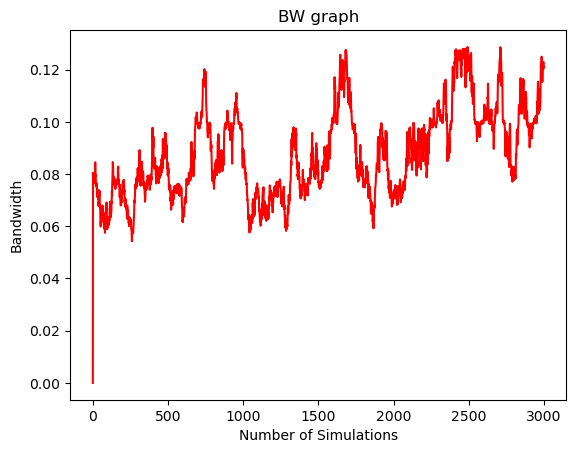

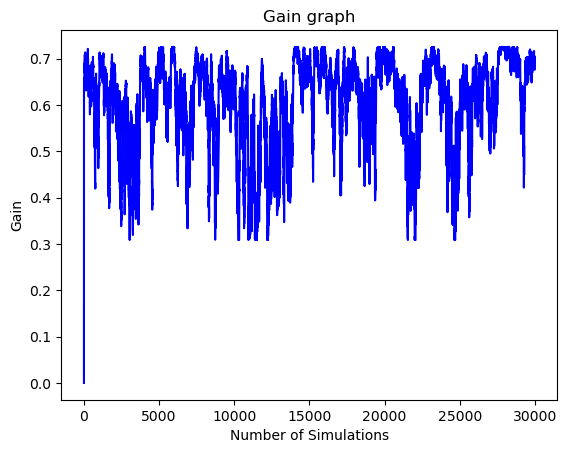

In [23]:
x = np.arange(0, len(env.bw[0:3000] ))
y=env.bw[0:3000] 
 
# plotting
plt.title("BW graph")
plt.xlabel("Number of Simulations")
plt.ylabel("Bandwidth")
plt.plot(x, y, color ="red")
plt.show()
x = np.arange(0, len(env.bw ))
y=env.bw 
 
# plotting
x = np.arange(0, len(env.bw ))
y=env.gain
 
# plotting
plt.title("Gain graph")
plt.xlabel("Number of Simulations")
plt.ylabel("Gain")
plt.plot(x, y, color ="b")